Aynur Rahimova

**Evaluating the Impact of Semiconductor Adoption and Technological Change on Occupational Shifts and Workforce Displacement Across Major Industries**

##### **Notebook"EDA and Feature Engineering"** (part 2)

* The 3 datasets are individually preprocessed (cleaning, duplicates, missing values etc) and then merged

**Used datasets:**

* **UN Comtrade database → Semiconductor adoption**:
https://comtradeplus.un.org/TradeFlow 

* **ILOSTAT Data Explorer – Employment by Occupation**:
https://rshiny.ilo.org/dataexplorer9/

* **Research and development expenditure(R&D) (% of GDP) indicator**:
https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS?end=2023&start=2000

**Imports**

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt,textwrap
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter,MaxNLocator, EngFormatter,  LogLocator, NullFormatter, MultipleLocator
from matplotlib.offsetbox import TextArea, AnnotationBbox, AnchoredText
from matplotlib.lines import Line2D
import matplotlib.patheffects as pe
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerBase
from matplotlib.gridspec import GridSpec
from matplotlib.axes import Axes
from matplotlib import colors as mcolors
from matplotlib.colors import TwoSlopeNorm, to_rgb
from textwrap import wrap, shorten
import textwrap
from IPython.display import display, Markdown
import os, json
from math import ceil
import category_encoders as ce
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import re

A left join was initially used, but it did not lead to good model performance. Therefore, an inner join was chosen for the final modeling to ensure better data consistency and model quality.

**"df_ml_inner_join" dataset  will be used in this notebook**

df_ml_inner_join - the final, cleaned and merged dataset

### **EDA**

In [ ]:
path_inner = "../Data/Processed/df_ml_inner_join.csv"
df_ml_inner = pd.read_csv(path_inner)

In [12]:
df_ml = df_ml_inner.copy()  # to avoid modifying the DataFrame df_ml_inner

In [52]:
df_ml.head()  # to check the first few rows of the dataframe

Year     Country Trade_Flow_Type Partner_Code  \
0  2000  Azerbaijan          Import           H1   
1  2000  Azerbaijan          Import           H1   
2  2000  Azerbaijan          Import           H1   
3  2000  Azerbaijan          Import           H1   
4  2000  Azerbaijan          Import           H1   

                                      Commodity_Type  \
0  Diodes, transistors, similar semiconductor dev...   
1  Diodes, transistors, similar semiconductor dev...   
2  Diodes, transistors, similar semiconductor dev...   
3  Diodes, transistors, similar semiconductor dev...   
4  Diodes, transistors, similar semiconductor dev...   

   Alternative_Quantity_Value  Net_Weight_Estimated  Gross_Weight_Estimated  \
0                       124.0                   0.0                 21496.0   
1                       124.0                   0.0                 21496.0   
2                       124.0                   0.0                 21496.0   
3                       124.0                   0.0                 21496.0   
4                       124.0                   0.0                 21496.0   

   Trade_Valuation_Source_Code  Legacy_Estimation_Method  \
0                            2                     False   
1                            2                     False   
2                            2                     False   
3                            2                     False   
4                            2                     False   

   Officially_Reported_by_Country  Trade_Value_Is_Estimated  \
0                           False                      True   
1                           False                      True   
2                           False                      True   
3                           False                      True   
4                           False                      True   

   Alt_Quantity_Is_Estimated  Net_Weight_Is_Estimated  \
0                       True                    False   
1                       True                    False   
2                       True                    False   
3                       True                    False   
4                       True                    False   

   Gross_Weight_Is_Estimated  Trade_Value_usd  RD_Expenditure_GDP_Percent  \
0                       True          21496.0                       0.336   
1                       True          21496.0                       0.336   
2                       True          21496.0                       0.336   
3                       True          21496.0                       0.336   
4                       True          21496.0                       0.336   

  Gender                                         Occupation  Employment_Count  
0  Total                    Occupation (Skill level): Total          3855.500  
1  Total  Occupation (Skill level): Skill levels 3 and 4...           794.233  
2  Total   Occupation (Skill level): Skill level 2 ~ medium          1869.918  
3  Total      Occupation (Skill level): Skill level 1 ~ low          1187.494  
4  Total  Occupation (Skill level): Not elsewhere classi...             3.856

In [13]:
df_ml.info()  # only 2 numeric columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218333 entries, 0 to 218332
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            218333 non-null  int64  
 1   Country                         218333 non-null  object 
 2   Trade_Flow_Type                 218333 non-null  object 
 3   Partner_Code                    218333 non-null  object 
 4   Commodity_Type                  218333 non-null  object 
 5   Alternative_Quantity_Value      205353 non-null  float64
 6   Net_Weight_Estimated            218333 non-null  float64
 7   Gross_Weight_Estimated          218333 non-null  float64
 8   Trade_Valuation_Source_Code     218333 non-null  int64  
 9   Legacy_Estimation_Method        218333 non-null  bool   
 10  Officially_Reported_by_Country  218333 non-null  bool   
 11  Trade_Value_Is_Estimated        218333 non-null  bool   
 12  Alt_Quantity_Is_

In [54]:
df_ml.nunique() # the column Net_Weight_Is_Estimated has the 1 unique value

Year                                 24
Country                             131
Trade_Flow_Type                       2
Partner_Code                          7
Commodity_Type                        5
Alternative_Quantity_Value         2295
Net_Weight_Estimated                 55
Gross_Weight_Estimated             1688
Trade_Valuation_Source_Code           3
Legacy_Estimation_Method              2
Officially_Reported_by_Country        2
Trade_Value_Is_Estimated              2
Alt_Quantity_Is_Estimated             2
Net_Weight_Is_Estimated               1
Gross_Weight_Is_Estimated             2
Trade_Value_usd                    4593
RD_Expenditure_GDP_Percent         1140
Gender                                3
Occupation                           38
Employment_Count                  55399
dtype: int64

In [55]:
# to check unique values in the Net_Weight_Is_Estimated column

df_ml.Net_Weight_Is_Estimated.unique()     # Every Net_Weight_Estimated value in the df_ml dataset is not estimated — they are officially reported values.
                                            #  Previously added this column is a flag to track whether the net weight value was estimated (due to lack of official reporting). 
                                            # Later, when only countries with complete, trusted data (df_final_ml) were merged and filtered,
                                            # the rows where Net_Weight_Is_Estimated == True were excluded.
                                            # So, this column is not needed anymore and can be dropped.

# to drop the Net_Weight_Is_Estimated column

array([False])

In [14]:
df_ml.drop(columns=['Net_Weight_Is_Estimated'], inplace=True)  

df_ml.shape   # 1 column ('Net_Weight_Is_Estimated') is dropped

(218333, 19)

To understand data distribution - extreme values, spread of values...- 'describe' will be applied 

In [57]:
# to get a concise summary of the DataFrame with descriptive statistics

df_ml.describe().T.style.background_gradient(cmap="Purples_r")

**Defining the target variable**

Two variables are being considered as potential target variables for the model:

"Employment_Count" and "Employment_Growth" (Percentage Change in Employment).

"Employment_Count" predicts static employment levels.

"Employment_Growth"(derived target) enables the model to detect trends in occupational shifts — such as workforce expansion, decline, or displacement.

For the goal of my project "Employment_Growth" is the best candidat.


If Employment_Growth is negative for an occupation - It may reflect displacement or reduced demand.

If it's positive in one and negative in another - That signals occupational shifts.

So, aggregated **Employment_Growth** by occupation can serve as a proxy for measuring occupational shifts and workforce displacement.

In [15]:
# creating a new column for the percentage change in employment count by country and occupation as a target variable for modeling

df_ml = df_ml.sort_values(["Country", "Occupation", "Year"])
df_ml["Employment_Growth"] = df_ml.groupby(["Country", "Occupation"])["Employment_Count"].pct_change()

In [16]:
df_ml.shape  # 1 column ('Employment_Growth') is added , now the DataFrame has 20 columns

(218333, 20)

In [17]:
df_ml = df_ml.replace([np.inf, -np.inf], np.nan)        # Replace infinite values with NaN to avoid issues in further analysis
df_ml = df_ml.dropna(subset=['Employment_Growth'])

In [18]:
df_ml.shape

(214691, 20)

In [62]:
# to check for NaN values in the Employment_Growth column

df_ml.Employment_Growth.isna().sum()         # Missing values in the Employment_Growth column are expected, 
                                            # as it is a percentage change calculated based on the previous row's Employment_Count value.

0

In [19]:
df_ml.reset_index(drop=True, inplace=True)  # Reset index after dropping rows with NaN values in Employment_Growth column

In [64]:
df_ml.isna().sum()  # 'Alternative_Quantity_Value' has 12592, 'RD_Expenditure_GDP_Percent' - 48648 missing values. Other features have no missing values.

Year                                  0
Country                               0
Trade_Flow_Type                       0
Partner_Code                          0
Commodity_Type                        0
Alternative_Quantity_Value        12592
Net_Weight_Estimated                  0
Gross_Weight_Estimated                0
Trade_Valuation_Source_Code           0
Legacy_Estimation_Method              0
Officially_Reported_by_Country        0
Trade_Value_Is_Estimated              0
Alt_Quantity_Is_Estimated             0
Gross_Weight_Is_Estimated             0
Trade_Value_usd                       0
RD_Expenditure_GDP_Percent        48648
Gender                                0
Occupation                            0
Employment_Count                      0
Employment_Growth                     0
dtype: int64

In [20]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214691 entries, 0 to 214690
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            214691 non-null  int64  
 1   Country                         214691 non-null  object 
 2   Trade_Flow_Type                 214691 non-null  object 
 3   Partner_Code                    214691 non-null  object 
 4   Commodity_Type                  214691 non-null  object 
 5   Alternative_Quantity_Value      202099 non-null  float64
 6   Net_Weight_Estimated            214691 non-null  float64
 7   Gross_Weight_Estimated          214691 non-null  float64
 8   Trade_Valuation_Source_Code     214691 non-null  int64  
 9   Legacy_Estimation_Method        214691 non-null  bool   
 10  Officially_Reported_by_Country  214691 non-null  bool   
 11  Trade_Value_Is_Estimated        214691 non-null  bool   
 12  Alt_Quantity_Is_

In [21]:
# Plot style configuration for all charts

sns.set_style("whitegrid")
mpl.rcParams.update({
    "figure.figsize": (7, 3.5), 
    "figure.dpi": 140,
    "axes.titlesize": 10, 
    "axes.labelsize": 10,
    "axes.titleweight":"bold",
    "xtick.labelsize": 7, 
    "ytick.labelsize": 7,
    # --- Tick marks ---
    "xtick.bottom": True,
    "xtick.top": False,
    "ytick.left": True,
    "ytick.right": False,
    "xtick.direction": "inout",
    "ytick.direction": "inout",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.major.width": 1,
    "ytick.major.width": 1,
    "xtick.color": "#555",
    "ytick.color": "#555",
    "grid.linestyle": "--",
    "axes.edgecolor":"#D3D3D3",
    "axes.linewidth":0.3,
    "figure.facecolor": "white",
    "axes.titleweight":"bold",
    "axes.grid": True,
    "axes.grid.axis": "x",
    "grid.color": "#CBD3D8",
    "grid.linestyle": "--",
    "grid.linewidth": 0.15,
    "legend.frameon":True,
    "legend.framealpha": 0.9,
    "axes.axisbelow": True
})
plt.show()

In [22]:
# color set for visualizations

TITLE_CLR     = "#2B2B2B"  # strong but not black
SUBTITLE_CLR  = "#666666"  # medium contrast, elegant
AXIS_TEXT_CLR = "#595959"  # matches main chart labels
FOOTNOTE_CLR  = "#777777"  # lighter for low emphasis

**Visualization: Missing Values Percentage per Feature**

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\498717179.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\498717179.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(


Text(0.02, -0.06, 'Notes: Percentages show the share of missing values in each feature • Numbers in parentheses indicate the count of missing observations')

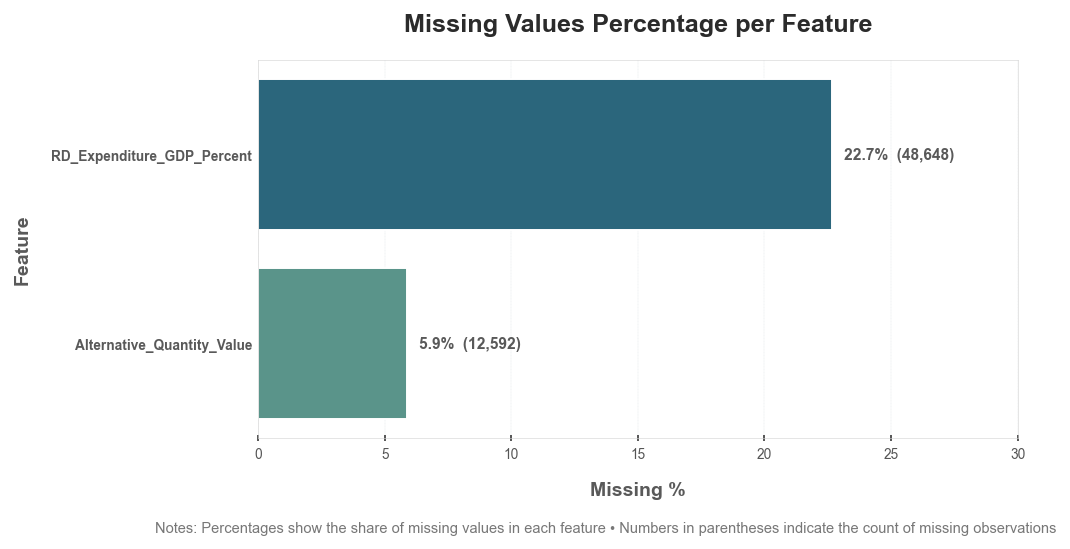

In [71]:
# === missing-value KPI for dataset ===
missing_pct = df_ml.isna().mean().sort_values(ascending=False) * 100
missing_pct = missing_pct[missing_pct > 0]
missing_cnt = df_ml.isna().sum().loc[missing_pct.index]

# === plot ===
fig, ax = plt.subplots()
sns.barplot(
    x=missing_pct.values,
    y=missing_pct.index,
    ax=ax,
    palette="crest_r"  
)

ax.set_title("Missing Values Percentage per Feature", fontsize = 13, color = TITLE_CLR, pad=15)
ax.set_xlabel("Missing %",  labelpad=10, fontweight="semibold", color = AXIS_TEXT_CLR)
ax.set_ylabel("Feature", labelpad=10, fontweight="semibold", color = AXIS_TEXT_CLR)
# === y tick label styling ===
ax.set_yticklabels(
    ax.get_yticklabels(), color=AXIS_TEXT_CLR, fontweight="semibold"
    )
ax.tick_params(axis='y', pad=3, length=0)  # pad = space from bars, length=0 hides ticks

ax.set_xlim(0, 30)
ax.set_xticks(np.arange(0, 31, 5))

# === KPI labels ===
for patch, col in zip(ax.patches, missing_pct.index):
    x = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2
    ax.text(
        x + 0.5, y, 
        f"{x:.1f}%  ({int(missing_cnt[col]):,})",
        va="center", fontsize=8, color=AXIS_TEXT_CLR, fontweight="semibold"
    )

plt.figtext(
    0.02, -0.06,
    "Notes: Percentages show the share of missing values in each feature • Numbers in parentheses indicate the count of missing observations",
    ha="left", va="top", fontsize=7.5, color=FOOTNOTE_CLR, linespacing=1.5)

**Visualization: Frequency Summary for categorical features** (barcharts and exported table)

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1006002577.py:38: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  keep_mask &= ~df[c].astype(str).str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1006002577.py:38: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  keep_mask &= ~df[c].astype(str).str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1006002577.py:38: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  keep_mask &= ~df[c].astype(str).str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1006002577.py:38: UserWarning: This patter

✅ Full frequency tables exported to 'EDA_Frequency_Summary.xlsx'


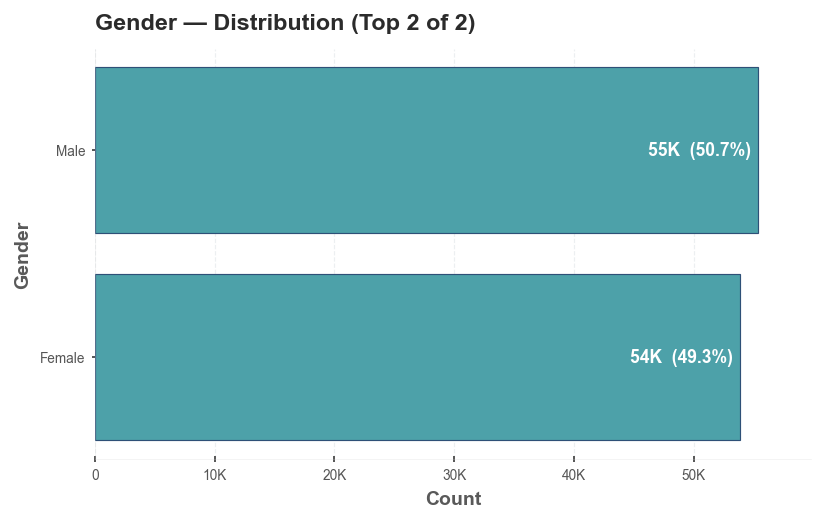

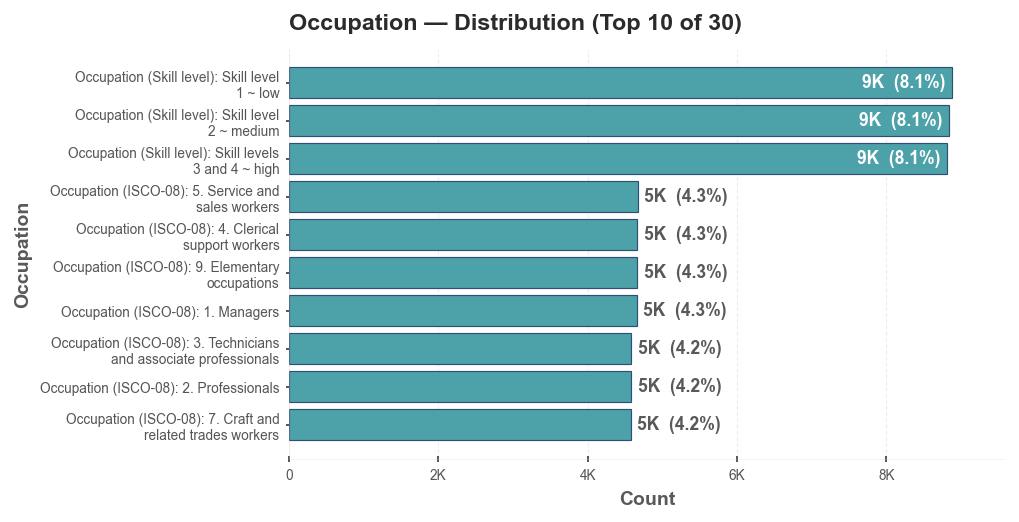

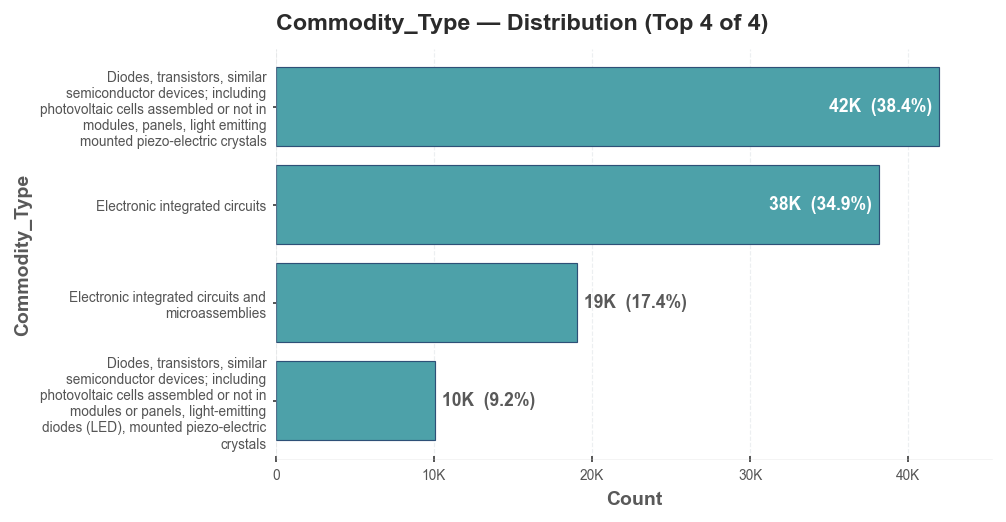

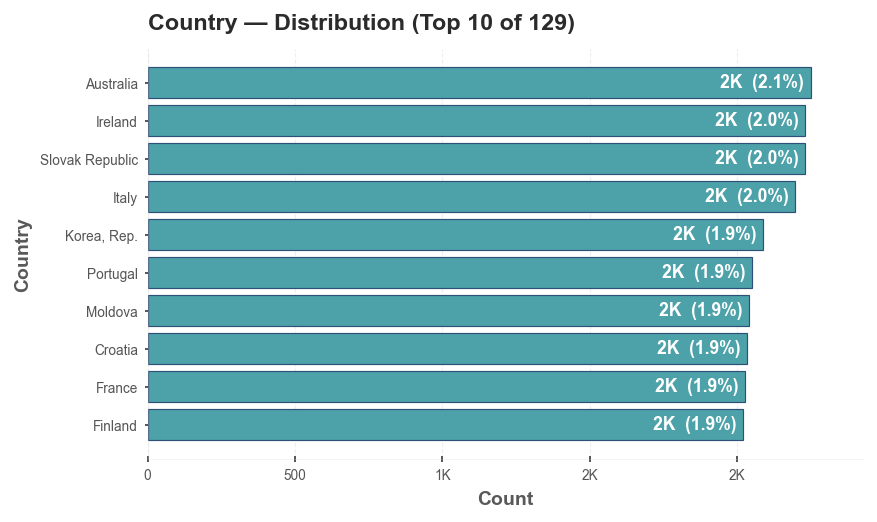

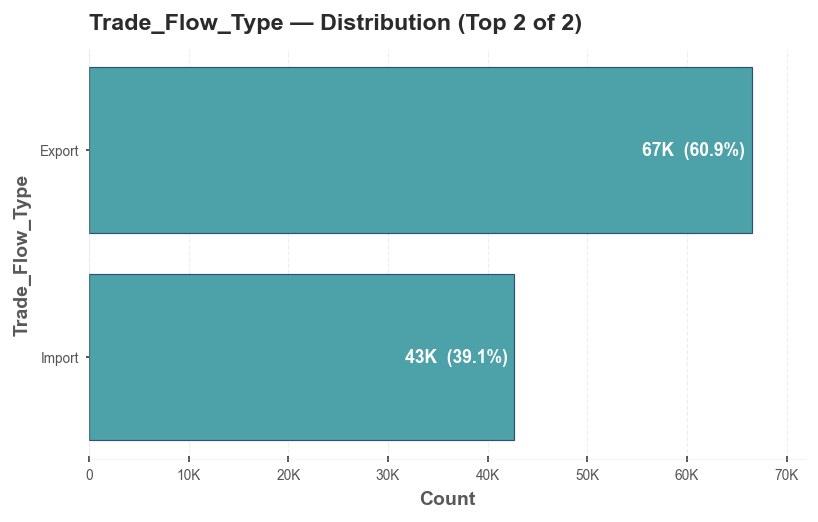

In [72]:
# =============== Frequency Summary (KPI bar charts + Excel export) ===============

# --- keywords to drop from charts (kept in export) ---
AGG_KEYWORDS = [
    "total", "all",
    "not elsewhere classified", "nec",
    "unspecified", "unknown",
    "other", "others"
]

# ---------- helpers ----------

def _abbr(n: float) -> str:
    n = float(n)
    if n >= 1_000_000_000: return f"{n/1_000_000_000:.2f}B"
    if n >= 1_000_000:     return f"{n/1_000_000:.2f}M"
    if n >= 1_000:        return f"{n/1_000:.0f}K"
    return f"{int(n):,}"

def _k_formatter(x, pos):
    if x >= 1_000_000_000: return f"{x/1_000_000_000:.1f}B"
    if x >= 1_000_000:     return f"{x/1_000_000:.1f}M"
    if x >= 1_000:         return f"{x/1_000:.0f}K"   # <- use K starting at 1,000
    return f"{int(x):,}"

def clean_categoricals_for_charts(df: pd.DataFrame, cols, keywords=None) -> pd.DataFrame:
    """Return a copy with aggregate labels removed in the given categorical columns (for plotting)."""
    if keywords is None:
        keywords = AGG_KEYWORDS
    if cols is None or len(cols) == 0:
        return df.copy()

    keep_mask = pd.Series(True, index=df.index)
    pattern = r"\b(" + "|".join(re.escape(k) for k in keywords) + r")\b"

    for c in cols:
        if c in df.columns and df[c].dtype.name in ("object", "category"):
            keep_mask &= ~df[c].astype(str).str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)

    return df[keep_mask].copy()

# ---------- main function ----------
def summarize_frequencies(
    df: pd.DataFrame,
    cat_cols=None,
    top_n: int = 10,
    export_path: str = "EDA_Frequency_Summary.xlsx",
    bar_color: str = "#4DA1A9",
    edge_color: str = "#2E5077",
    abbreviate: bool = True,
    drop_aggregate_in_charts: bool = True,
):
    """
    Notebook:
        - For each categorical column, show a horizontal bar chart with KPI labels "Count (Pct%)".
        - If unique categories <= 10 (e.g., Gender), show all; otherwise show Top-N (default 10).
        - Bars use compact K/M/B ticks and inside/outside labels automatically.

    Export:
        - Writes FULL frequency tables (Count + Percentage) for each column to Excel (one sheet per column).
      - Export is based on the *same data used in charts* (i.e., with aggregate labels removed if drop_aggregate_in_charts=True).

    Parameters:
        cat_cols: list of categorical columns (auto-detects object/category if None)
        :    number of categories to show when unique > 10
        export_path: Excel file path for full tables
        bar_color, edge_color: styling
        abbreviate: use K/M/B abbreviations in labels
        drop_aggregate_in_charts: remove "Total/All/Other/Unknown/NEC" rows from charts & export
    """
    assert isinstance(df, pd.DataFrame) and len(df) > 0, "df is empty or not a DataFrame."

    # auto-detect categorical columns if none provided
    if cat_cols is None:
        cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
    if not cat_cols:
        print("No categorical columns to summarize.")
        return

    # clean for charts/export (drop aggregate labels if requested)
    df_plot = clean_categoricals_for_charts(df, cat_cols if drop_aggregate_in_charts else [], keywords=AGG_KEYWORDS)

    # collect full tables for export
    summary_tables = {}

    for col in cat_cols:
        if col not in df_plot.columns:
            print(f"⚠️ Skipping '{col}' — not found in DataFrame.")
            continue

        # full frequency + %
        freq = df_plot[col].value_counts(dropna=False)
        if freq.empty:
            print(f"⚠️ '{col}' has no values to plot.")
            continue
        pct = (freq / len(df_plot)) * 100
        full_table = pd.DataFrame({"Count": freq, "Percentage": pct.round(2)})

        # save for export
        summary_tables[col] = full_table.copy()

        # decide how many to show
        n_unique = df_plot[col].nunique(dropna=False)
        show_n = n_unique if n_unique <= 10 else int(top_n)

        # top-N for chart (descending pick -> ascending draw)
        chart_data = (
            full_table.sort_values("Count", ascending=False)
                        .head(show_n)
                        .sort_values("Count", ascending=True)
        )

        # ---- refined plot ----
        # display(Markdown(f"### 🔹 {col} — Distribution (Top {show_n} of {n_unique})"))

        fig, ax = plt.subplots(figsize=(6.6, 3.8))
        y_labels = chart_data.index.astype(str)
        x_vals   = chart_data["Count"].values
    
        max_chars = 38  # tune this
        y_labels_wrapped = [
            "\n".join(wrap(lbl, max_chars)) for lbl in chart_data.index.astype(str)
        ]


        bars = ax.barh(
            y_labels_wrapped,
            x_vals,
            color=bar_color,
            edgecolor=edge_color,
            linewidth=0.6
        )

        # axes & style
        ax.set_title(f"{col} — Distribution (Top {show_n} of {n_unique})", loc="left", pad=10, fontweight="bold", fontsize=12, color=TITLE_CLR )
        ax.set_xlabel("Count", color = AXIS_TEXT_CLR, weight="semibold")
        ax.set_ylabel(col, color = AXIS_TEXT_CLR, weight="semibold")
        ax.grid(axis="x", linestyle="--", linewidth=0.6, alpha=0.35)
        for spine in ("top", "right"):
            ax.spines[spine].set_visible(False)
        ax.spines["left"].set_alpha(0.4)
        ax.spines["bottom"].set_alpha(0.4)
        ax.xaxis.set_major_formatter(FuncFormatter(_k_formatter))

        # KPI labels
        max_x = x_vals.max()
        max_x = x_vals.max()
        ax.set_xlim(0, max_x * 1.08)   # small headroom for labels
        offset = max(1, max_x * 0.01)

        for bar, (_, row) in zip(bars, chart_data.iterrows()):
            count = int(row["Count"])
            pct_v = float(row["Percentage"])
            text_count = _abbr(count) if abbreviate else f"{count:,}"
            text = f"{text_count}  ({pct_v:.1f}%)"

            x = bar.get_width()
            y = bar.get_y() + bar.get_height()/2

            # inside if bar is long enough; else outside
            if x > 0.60 * max_x:
                ax.text(x - offset, y, text, va="center", ha="right", weight="bold", fontsize=9, color="white")
            else:
                ax.text(x + offset, y, text, va="center", ha="left", weight="bold",  fontsize=9, color=AXIS_TEXT_CLR)

    # ---- export FULL tables ----
    with pd.ExcelWriter(export_path) as writer:
        for col, table in summary_tables.items():
            table.to_excel(writer, sheet_name=col[:31])
    print(f"✅ Full frequency tables exported to '{export_path}'")


# ================= Example usage =================
# 1) Explicit list of categorical columns:
cat_cols = ["Gender", "Occupation", "Commodity_Type", "Country", "Trade_Flow_Type"]
summarize_frequencies(df_ml, cat_cols=cat_cols, top_n=10, export_path="EDA_Frequency_Summary.xlsx")

**Continuous Feature Analysis**

In [23]:
# Row features
numeric_cols = [
    'Alternative_Quantity_Value',
    'Net_Weight_Estimated',
    'Gross_Weight_Estimated',
    'Trade_Value_usd',
    'RD_Expenditure_GDP_Percent',
    'Employment_Growth'
]

**Visualization: Distribution of Row Numerical features**

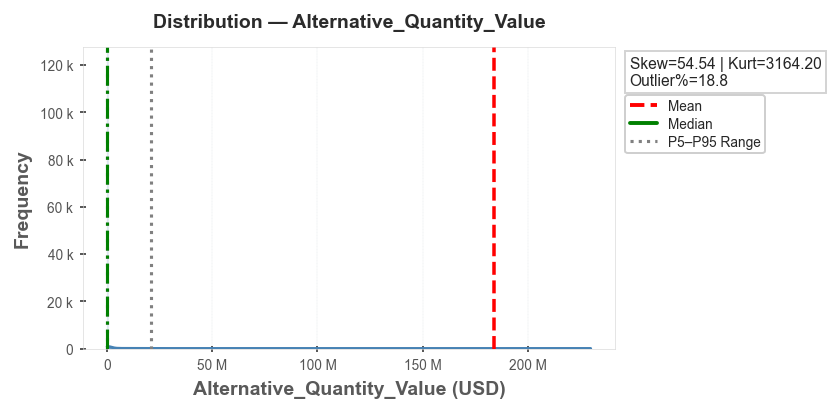

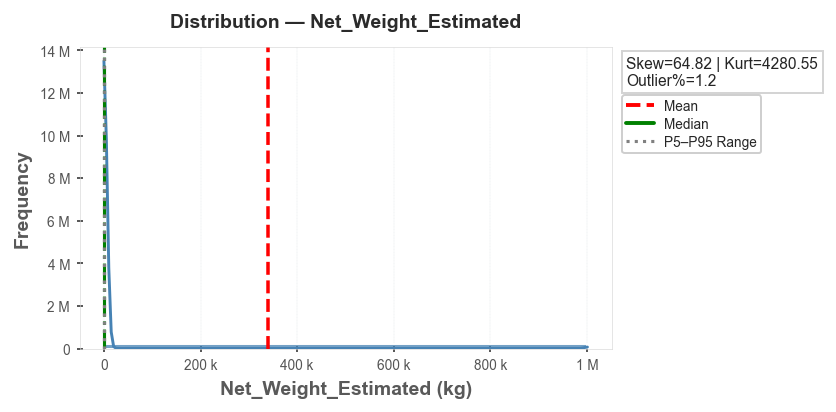

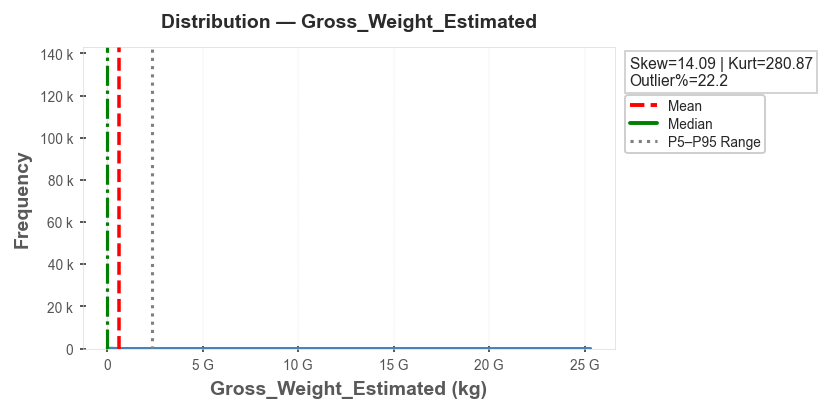

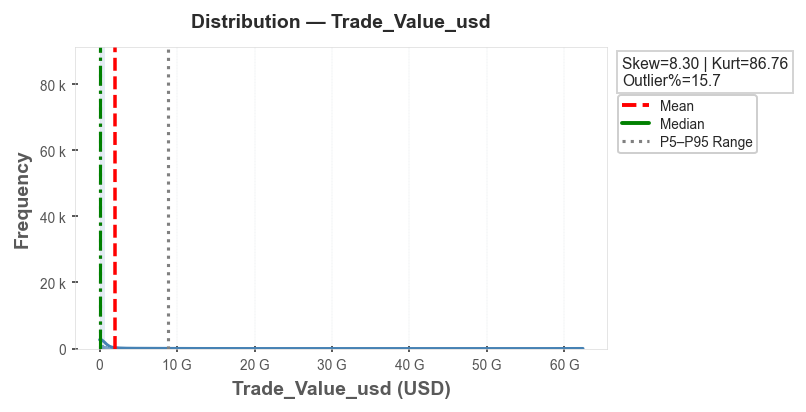

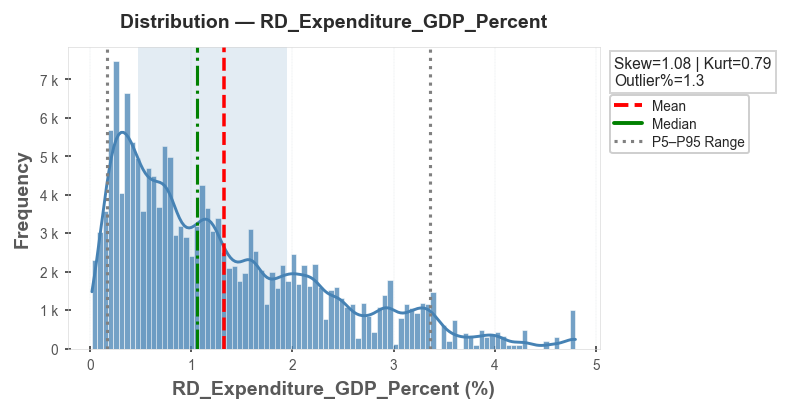

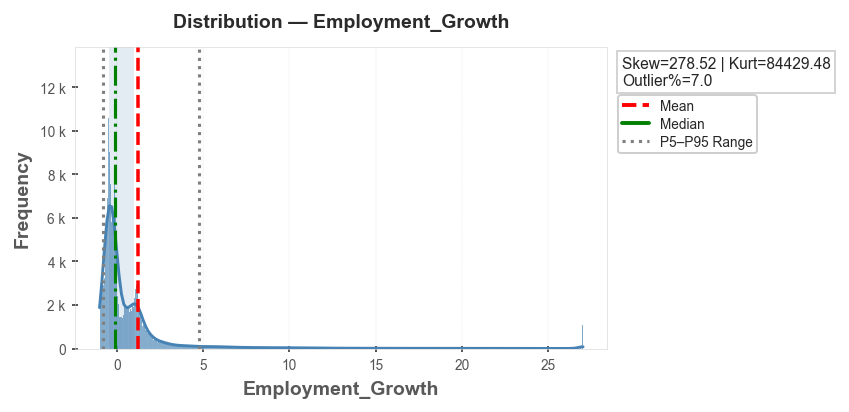

Feature          Mean        Median           Std  \
0  Alternative_Quantity_Value  1.840695e+08  9.700000e+01  7.755564e+09   
1        Net_Weight_Estimated  3.404824e+05  0.000000e+00  1.551402e+07   
2      Gross_Weight_Estimated  6.278202e+08  0.000000e+00  3.764595e+09   
3             Trade_Value_usd  2.027466e+09  6.220312e+07  7.994458e+09   
4  RD_Expenditure_GDP_Percent  1.323000e+00  1.052000e+00  1.043000e+00   
5           Employment_Growth  1.207000e+00 -1.220000e-01  5.196600e+01   

      Skew       Kurt  Outlier%        P5           P95  
0   54.538   3164.201    18.801     0.000  2.088072e+07  
1   64.824   4280.553     1.157     0.000  0.000000e+00  
2   14.095    280.874    22.162     0.000  2.360984e+09  
3    8.295     86.757    15.681  1943.000  8.844572e+09  
4    1.076      0.794     1.301     0.171  3.360000e+00  
5  278.524  84429.479     7.026    -0.811  4.765000e+00

In [75]:
# =============== Distribution Summary (KPI + histogram) ===============
def dist_raw_only(
    df: pd.DataFrame,
    col: str,
    unit_label: str | None = None,
    outdir: str = "eda_figures_raw",
    dpi: int = 240,
    winsor_upper: float = 0.995,
):
    os.makedirs(outdir, exist_ok=True)

    s = pd.to_numeric(df[col], errors="coerce").dropna().astype(float)
    if s.empty:
        print(f"[{col}] no numeric data.")
        return None, None

    # Winsorize upper tail for readability
    x = s.to_numpy()
    hi = np.quantile(x, winsor_upper)
    x_plot = np.clip(x, None, hi)

    # KPIs
    q1, q3 = np.quantile(x, [0.25, 0.75]); iqr = q3 - q1
    lo_iqr, hi_iqr = q1 - 1.5*iqr, q3 + 1.5*iqr
    kpi = dict(
        mean=x.mean(),
        median=np.median(x),
        std=x.std(ddof=1),
        skew=pd.Series(x).skew(),
        kurt=pd.Series(x).kurtosis(),
        p5=np.quantile(x, .05),
        p95=np.quantile(x, .95),
        q1=q1, q3=q3,
        outlier_pct=((x < lo_iqr) | (x > hi_iqr)).mean()*100,
    )

    # Figure (reserve right margin for outside items)
    fig, ax = plt.subplots(figsize=(5.8, 2.8))
    fig.subplots_adjust(right=0.78)

    # Bins with built-in FD rule
    bins = np.histogram_bin_edges(x_plot, bins="fd")
    sns.histplot(x_plot, bins=bins, kde=True, color="steelblue", alpha=0.75, ax=ax)

    # IQR band & reference lines
    ax.axvspan(kpi["q1"], kpi["q3"], color="steelblue", alpha=0.15, lw=0)
    for v, c, ls in [(kpi["p5"], "grey", ":"), (kpi["median"], "green", "-."), (kpi["p95"], "grey", ":")]:
        ax.axvline(v, color=c, linestyle=ls, lw=1.6)
    ax.axvline(kpi["mean"], color="red", linestyle="--", lw=1.8)

    # Titles & labels
    ax.set_title(f"Distribution — {col}", fontweight="bold", color=TITLE_CLR, pad=10)
    ax.set_xlabel(f"{col}" + (f" ({unit_label})" if unit_label else ""), color=AXIS_TEXT_CLR, weight="semibold")
    ax.set_ylabel("Frequency", color=AXIS_TEXT_CLR, weight="semibold")

    # Ready-made SI formatters -> K/M/B on BOTH axes
    ax.xaxis.set_major_formatter(EngFormatter(places=0))   # e.g., 12.3 k, 1.2 M
    ax.yaxis.set_major_formatter(EngFormatter(places=0))

    # KPI box OUTSIDE (top-right) using AnchoredText
    kpi_txt = f"Skew={kpi['skew']:.2f} | Kurt={kpi['kurt']:.2f}\nOutlier%={kpi['outlier_pct']:.1f}"
    at = AnchoredText(kpi_txt, loc="upper left", prop={"size":8}, frameon=True, pad=0.3,
                    bbox_to_anchor=(1.01, 1.0), bbox_transform=ax.transAxes, borderpad=0.3)
    ax.add_artist(at)
    at.patch.set_edgecolor("#D3D3D3")   # frame (border) color

    # Mean/Median legend OUTSIDE right under the box
    handles = [
        Line2D([0], [0], color="red",   linestyle="--", lw=2, label="Mean"),
        Line2D([0], [0], color="green", linestyle="-", lw=2, label="Median"),
        Line2D([0], [0], color="grey",  linestyle=":", lw=1.6, label="P5–P95 Range")
    ]
    ax.legend(handles=handles, loc="upper left", bbox_to_anchor=(1.02, 0.84),
            frameon=True, fancybox=True, framealpha=0.95, borderaxespad=0, labelspacing=0.3, borderpad=0.3, fontsize = 7)

    plt.show()

    row = {
        "Feature": col,
        "Mean": kpi["mean"], "Median": kpi["median"], "Std": kpi["std"],
        "Skew": kpi["skew"], "Kurt": kpi["kurt"], "Outlier%": kpi["outlier_pct"],
        "P5": kpi["p5"], "P95": kpi["p95"]
    }
    return fig, pd.DataFrame([row]).round(3)

# Units per numeric feature
units_map = {
    "Alternative_Quantity_Value": "USD",
    "Trade_Value_usd": "USD",
    "Net_Weight_Estimated": "kg",
    "Gross_Weight_Estimated": "kg",
    "RD_Expenditure_GDP_Percent": "%"             
}

raw_kpis = []
for f in numeric_cols:
    unit = units_map.get(f, None)  # fallback: no unit if not mapped
    _, row = dist_raw_only(df_ml, f, unit_label=unit)
    if row is not None:
        raw_kpis.append(row)

raw_kpi_table = pd.concat(raw_kpis, ignore_index=True)
display(raw_kpi_table)

**📊 Narrative Captions (Raw Distributions)**

Trade_Value_usd
“Trade values are extremely right-skewed (skew=8.3, kurt=86.8), with ~15.7% outliers, showing dominance of a few very large transactions.”

Alternative_Quantity_Value
“Alternative quantities are highly skewed (skew=54.5) with heavy tails (kurt=3164), where a small number of records drive extreme values.”

Net_Weight_Estimated
“Net weight is extremely right-skewed (skew=64.8, kurt=4280), with many outliers indicating large imbalance in trade records.”

Gross_Weight_Estimated
“Gross weight shows strong skew (14.1) and heavy tails (kurt=281), with ~22% outliers concentrated in the upper tail.”

RD_Expenditure_GDP_Percent
“R&D spending is moderately skewed (1.08) with very low kurtosis (0.79), indicating a fairly balanced distribution across countries.”

Employment_Growth
“Employment growth has extreme skew (278.5) and kurtosis (84,429), revealing highly volatile values with heavy tails.”

**Visualization: Boxplots of Row Numerical Features**

Boxplots are plotted to provide a clear visual overview of data dispersion and anomalies — highlighting medians, spread, and potential outliers.

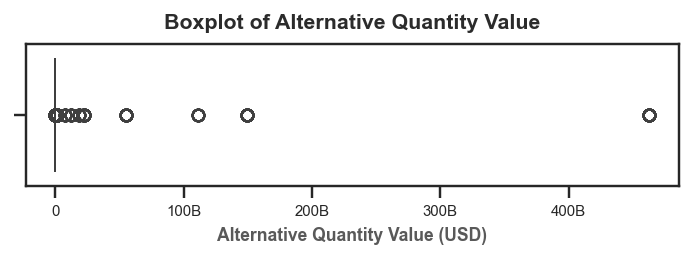

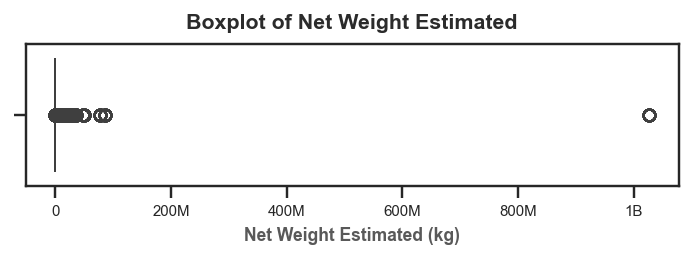

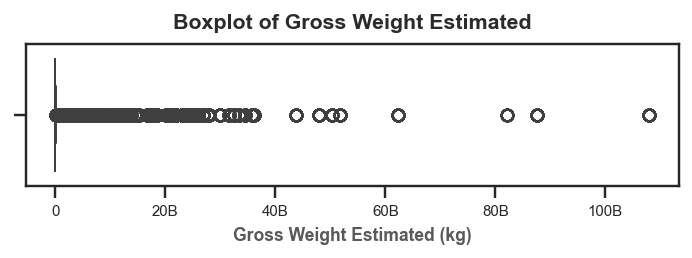

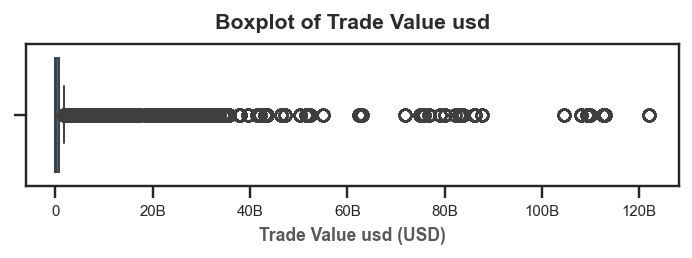

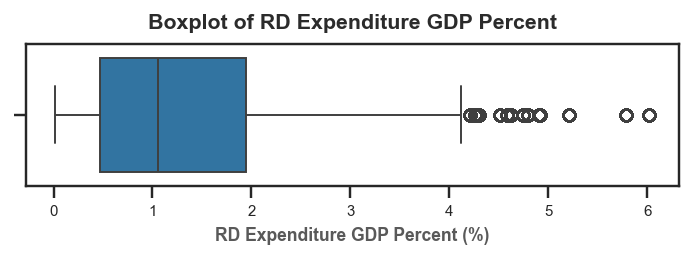

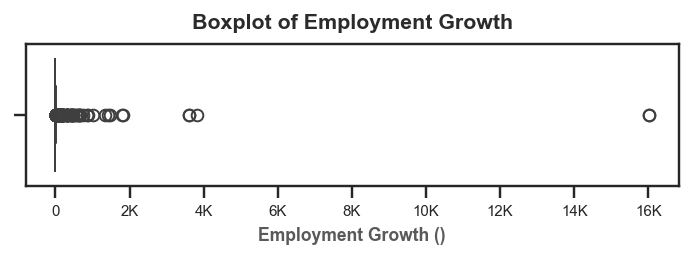

In [76]:
#===Boxplots of Row Numerical Features===

# --- Define units (customize freely for your dataset) ---
units = {
    "Alternative_Quantity_Value": "USD",
    "Net_Weight_Estimated": "kg",
    "Gross_Weight_Estimated": "kg",
    "Trade_Value_usd": "USD",
    "RD_Expenditure_GDP_Percent": "%"
}

# --- Human-friendly tick formatter (K, M, B) ---
def human_fmt(x, pos):
    if x == 0:
        return "0"
    elif abs(x) >= 1e9:
        return f"{x/1e9:.0f}B"
    elif abs(x) >= 1e6:
        return f"{x/1e6:.0f}M"
    elif abs(x) >= 1e3:
        return f"{x/1e3:.0f}K"
    else:
        return f"{x:.0f}"

# --- Visual style ---
sns.set(style="ticks", palette="muted", font_scale=0.7)

# --- Plot loop ---
for col in numeric_cols:
    plt.figure(figsize=(5, 1.9))
    ax = sns.boxplot(x=df_ml[col], color="#1f77b4")
    
    # Title & labels
    pretty_name = col.replace("_", " ")
    unit_label = units.get(col, "")
    plt.title(f"Boxplot of {pretty_name}", fontsize=11, fontweight="bold", color = TITLE_CLR, pad=8)
    plt.xlabel(f"{pretty_name} ({unit_label})", fontsize=9, color = AXIS_TEXT_CLR, weight = "semibold")

    # Apply formatter except for percentage features
    if "%" not in unit_label:
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(human_fmt))

    plt.tight_layout()

* The Z-score will be applied to detect and remove outliers. Afterward, boxplots of numerical features without outliers will be plotted to reveal the true data distribution without distortion from anomalies.

In [77]:
#====Applying Z-score to remove outliers====

from scipy.stats import zscore 

z_scores = np.abs(zscore(df_ml[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)
print(f"Numnber of outliers: {outliers.sum()} van {len(df_ml)} ({outliers.mean()*100:.2f}%)")

Numnber of outliers: 5884 van 214691 (2.74%)


In [78]:
# dataset without outliers
df_ml_no_outliers= df_ml[~outliers].copy()
print(f"Rows without outliers: {len(df_ml_no_outliers)}")

Rows without outliers: 208807


**Visualization: Boxplots of numerical features without outliers**

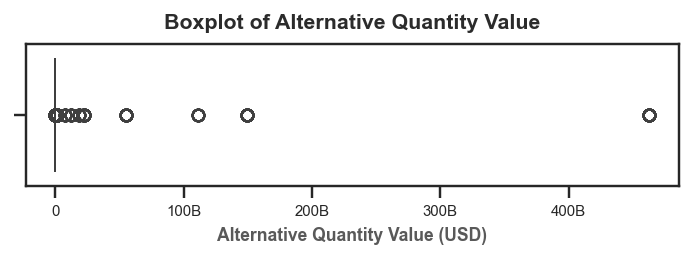

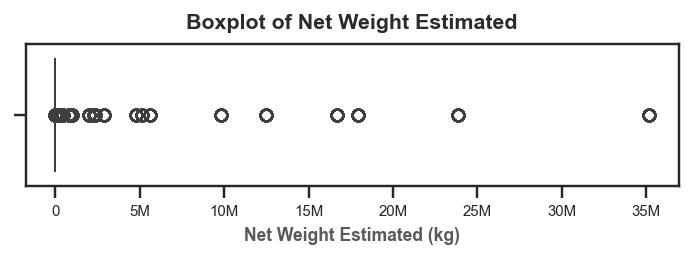

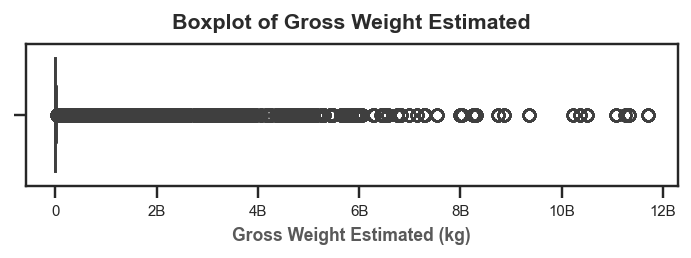

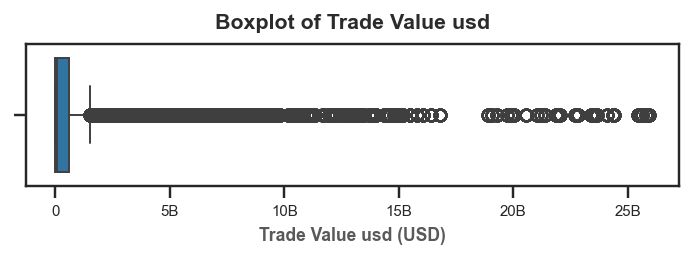

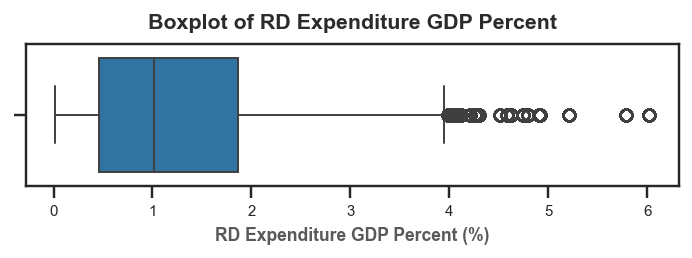

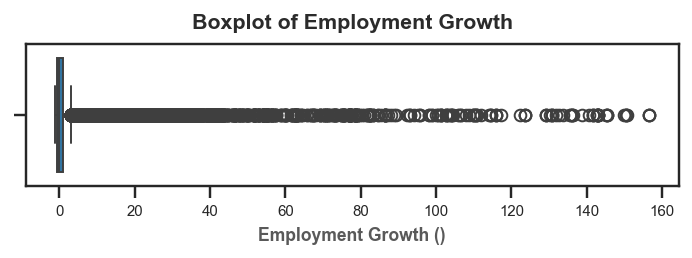

In [79]:
# ====Boxplots of numerical features without outliers====

# --- Define units ---
units = {
    "Alternative_Quantity_Value": "USD",
    "Net_Weight_Estimated": "kg",
    "Gross_Weight_Estimated": "kg",
    "Trade_Value_usd": "USD",
    "RD_Expenditure_GDP_Percent": "%"
}

# --- Human-friendly tick formatter (K, M, B) ---
def human_fmt(x, pos):
    if x == 0:
        return "0"
    elif abs(x) >= 1e9:
        return f"{x/1e9:.0f}B"
    elif abs(x) >= 1e6:
        return f"{x/1e6:.0f}M"
    elif abs(x) >= 1e3:
        return f"{x/1e3:.0f}K"
    else:
        return f"{x:.0f}"

# --- Visual style ---
sns.set(style="ticks", palette="muted", font_scale=0.7)

# --- Plot loop ---
for col in numeric_cols:
    plt.figure(figsize=(5, 1.9))
    ax = sns.boxplot(x=df_ml_no_outliers[col], color="#1f77b4")

    # Title & labels
    pretty_name = col.replace("_", " ")
    unit_label = units.get(col, "")
    plt.title(f"Boxplot of {pretty_name}", fontsize=11, fontweight="bold", color = TITLE_CLR, pad=8)
    plt.xlabel(f"{pretty_name} ({unit_label})", fontsize=9, color = AXIS_TEXT_CLR, weight = "semibold")

    # Apply formatter except for percentage features
    if "%" not in unit_label:
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(human_fmt))

    plt.tight_layout()

**Log-transformation of skewed numerical features**

Will be applied log1p or signed log1p transformation to highly skewed numerical features such as Alternative_Quantity_Value, Trade_Value_usd, Net_Weight_Estimated, Gross_Weight_Estimated and Employment_Growth. 

This helps compress extreme outliers, stabilize variance, and improve model performance.

In [24]:
# Log-transformation of numerical skewed features

features_to_log = [
    'Trade_Value_usd',
    'Alternative_Quantity_Value',
    'Net_Weight_Estimated',
    'Gross_Weight_Estimated',
    'Employment_Growth',
    'RD_Expenditure_GDP_Percent'
]

# Apply log1p transformation 

for col in features_to_log:
    if col in df_ml.columns:
        df_ml[f'log_{col}'] = np.log1p(df_ml[col])  # to avoid log(0) issues

c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


RuntimeWarning appears because the Employment_Growth column likely contains -1 values, which result from .pct_change() when the previous value is zero. 

To get detailed information about "Employment_Growth" values the number of negative, positive, zero will be counted.

In [82]:
# Count of negative, zero, and positive values
negative_count = (df_ml['Employment_Growth'] < 0).sum()
zero_count     = (df_ml['Employment_Growth'] == 0).sum()
positive_count = (df_ml['Employment_Growth'] > 0).sum()
nan_count      = df_ml['Employment_Growth'].isna().sum()
total_count    = len(df_ml['Employment_Growth'])

print("Total values:", total_count)
print("Negative values:", negative_count, f"({negative_count/total_count:.2%})")
print("Zero values:", zero_count, f"({zero_count/total_count:.2%})")
print("Positive values:", positive_count, f"({positive_count/total_count:.2%})")
print("Missing (NaN):", nan_count, f"({nan_count/total_count:.2%})")


Total values: 214691
Negative values: 123478 (57.51%)
Zero values: 1073 (0.50%)
Positive values: 90140 (41.99%)
Missing (NaN): 0 (0.00%)


<Axes: title={'center': 'Employment Growth Distribution'}, xlabel='Employment_Growth'>

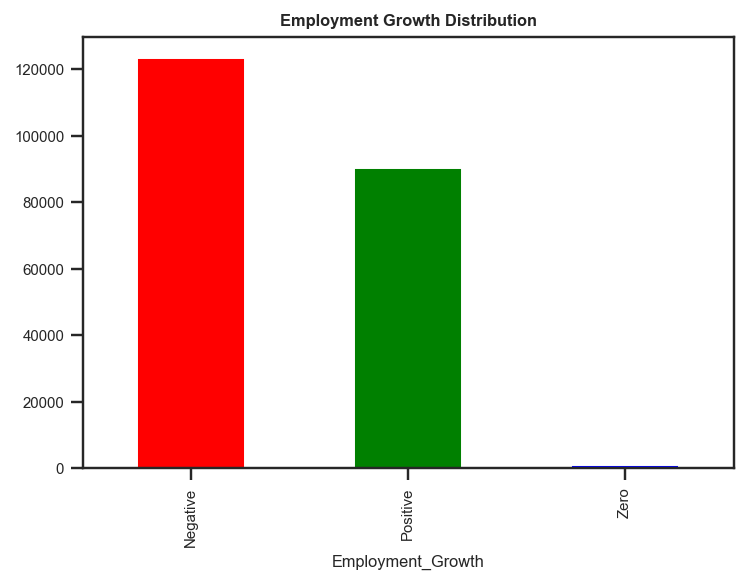

In [83]:
df_ml['Employment_Growth'].apply(
    lambda x: 'Negative' if x < 0 else 'Zero' if x == 0 else 'Positive'
).value_counts().plot(kind='bar', color=['red', 'green', 'blue'], figsize=(6, 4), title='Employment Growth Distribution')

Employment Growth Distribution Summary:

Negative values: 123478 (57.51%) → Indicates declines in employment, signaling workforce displacement or automation effects. The majority being negative suggests widespread labor contraction in certain occupations or countries.

Zero values: 1073 (0.50%) → Represents stable employment with no measurable change.

Positive values: 90140 (41.99%) → Reflects growth in employment, suggesting emerging roles or expansion in technology-intensive sectors.

Missing values: 0 → Full data coverage for this feature.

The skew toward negative values reveals systemic employment decline — likely linked to technological disruption or shifts in industrial demand due to semiconductor adoption.

log_Employment_Growth will be used as target to:

- Reduce big differences in employment changes, so the model isn’t thrown off by extreme values

- Help the model understand patterns better by making the data more even

- Work well when employment growth values are very uneven or skewed

In [25]:
# "signed log1p" will be used instead of "log1p" to log-transform "Employment_Growth", since it can accommodate negative and zero values, which log1p cannot handle

df_ml['log_Employment_Growth'] = np.sign(df_ml['Employment_Growth']) * np.log1p(np.abs(df_ml['Employment_Growth']))

In [26]:
df_ml.columns  # added log-scaled columns to the DataFrame: 
                # 'log_Trade_Value_usd', 'log_Alternative_Quantity_Value', 'log_Net_Weight_Estimated', 'log_Gross_Weight_Estimated', 'log_Employment_Growth'

Index(['Year', 'Country', 'Trade_Flow_Type', 'Partner_Code', 'Commodity_Type',
       'Alternative_Quantity_Value', 'Net_Weight_Estimated',
       'Gross_Weight_Estimated', 'Trade_Valuation_Source_Code',
       'Legacy_Estimation_Method', 'Officially_Reported_by_Country',
       'Trade_Value_Is_Estimated', 'Alt_Quantity_Is_Estimated',
       'Gross_Weight_Is_Estimated', 'Trade_Value_usd',
       'RD_Expenditure_GDP_Percent', 'Gender', 'Occupation',
       'Employment_Count', 'Employment_Growth', 'log_Trade_Value_usd',
       'log_Alternative_Quantity_Value', 'log_Net_Weight_Estimated',
       'log_Gross_Weight_Estimated', 'log_Employment_Growth',
       'log_RD_Expenditure_GDP_Percent'],
      dtype='object')

In [27]:
# plot log scaled features
numeric_cols_log = [
    'log_Alternative_Quantity_Value',
    'log_Net_Weight_Estimated',
    'log_Gross_Weight_Estimated',
    'log_Trade_Value_usd',
    'log_Employment_Growth',
    'log_RD_Expenditure_GDP_Percent'
]

**Visualization: Distribution of Numerical Features (Raw vs Log-Transformed)** (KPI Table included)

* **EngFormatter used**: To improve readability of numerical scales by displaying values with clear, human-friendly engineering prefixes (**K - thousands, M - Millions, G - Billions**) 

Feature    Mean (Raw)  Mean (Log)  Median (Raw)  \
0  Alternative_Quantity_Value  1.840695e+08       6.571  9.700000e+01   
1        Net_Weight_Estimated  3.404824e+05       0.128  0.000000e+00   
2      Gross_Weight_Estimated  6.278202e+08       7.045  0.000000e+00   
3             Trade_Value_usd  2.027466e+09      16.820  6.220312e+07   
4  RD_Expenditure_GDP_Percent  1.323000e+00       0.751  1.052000e+00   
5           Employment_Growth  1.207000e+00       0.802 -1.220000e-01   

   Median (Log)     Std (Raw)  Std (Log)  Skew (Raw)  Skew (Log)  Kurt (Raw)  \
0         4.585  7.755564e+09      6.848      54.538       0.309    3164.201   
1         0.000  1.551402e+07      1.336      64.824      11.315    4280.553   
2         0.000  3.764595e+09      9.015      14.095       0.585     280.874   
3        17.946  7.994458e+09      5.068       8.295      -1.256      86.757   
4         0.719  1.043000e+00      0.421       1.076       0.321       0.794   
5         0.630  5.196600e+01      0.573     278.524       2.139   84429.479   

   Kurt (Log)  Outlier% (Raw)  Outlier% (Log)  P5 (Raw)     P95 (Raw)  \
0      -1.572          18.801           0.000     0.000  2.088072e+07   
1     132.189           1.157           1.157     0.000  0.000000e+00   
2      -1.496          22.162           0.000     0.000  2.360984e+09   
3       1.830          15.681           3.393  1943.000  8.844572e+09   
4      -0.841           1.301           0.000     0.171  3.360000e+00   
5       8.316           7.026           3.954    -0.811  4.765000e+00   

   P5 (Log)  P95 (Log)  
0     0.000     16.854  
1     0.000      0.000  
2     0.000     21.582  
3     7.573     22.903  
4     0.158      1.472  
5     0.173      1.912

Text(0.1, -0.04, 'Note: Log transformation compresses extreme values and normalizes skewed distributions, enhancing interpretability of variable spread and central tendency across scales.')

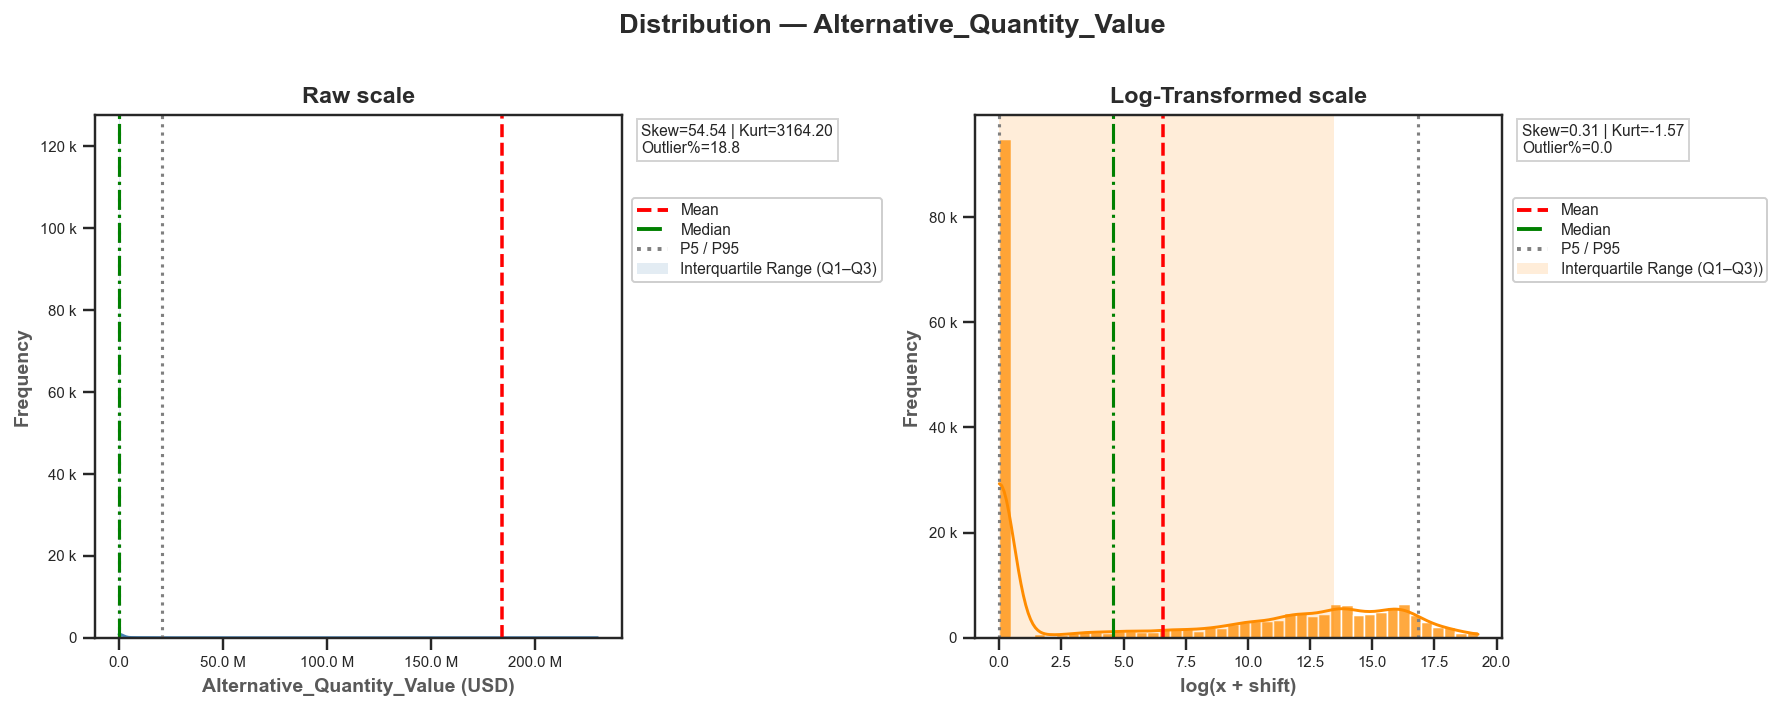

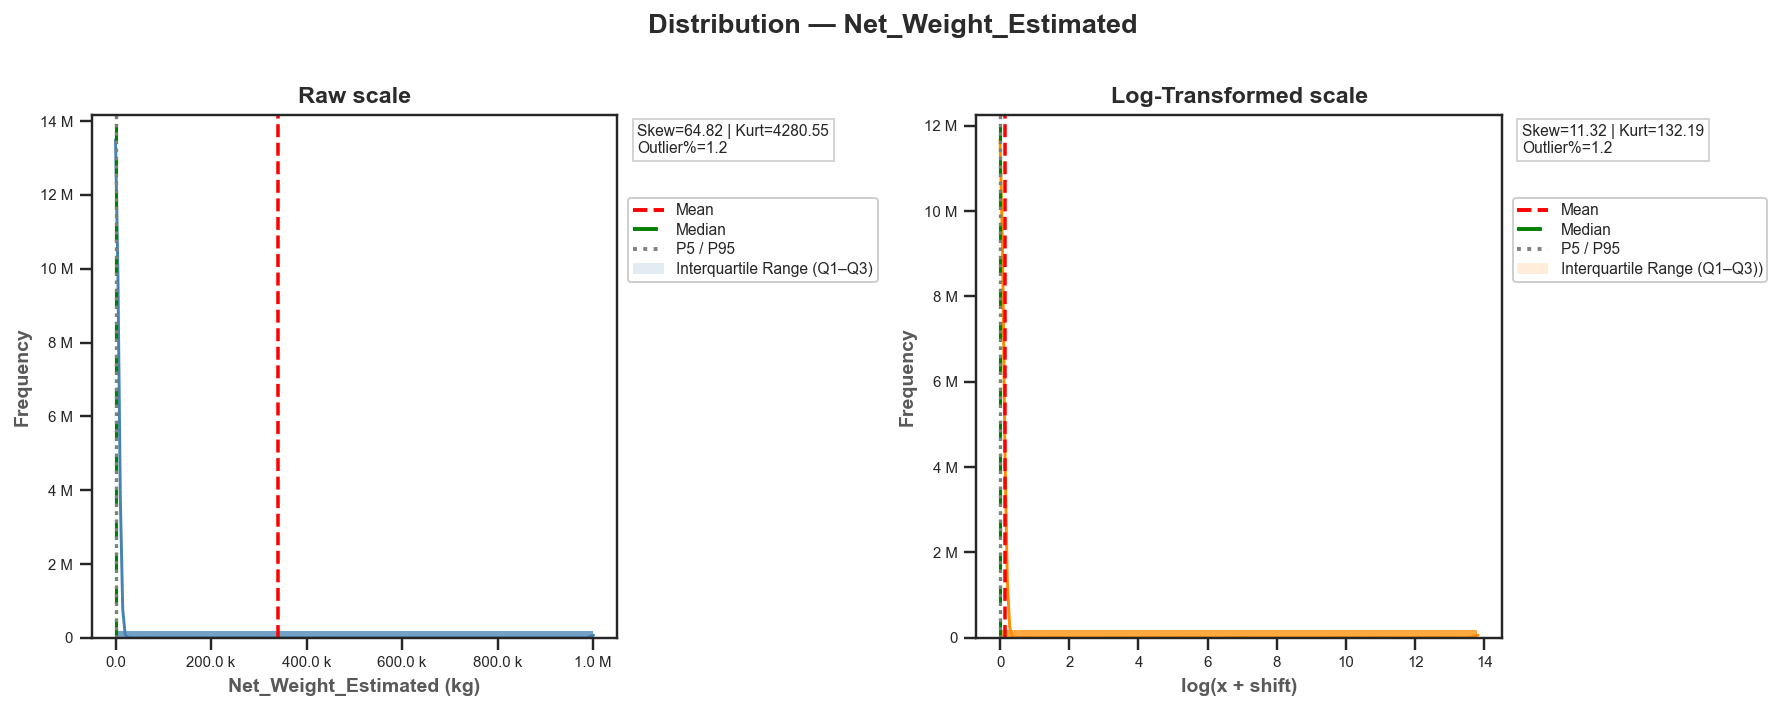

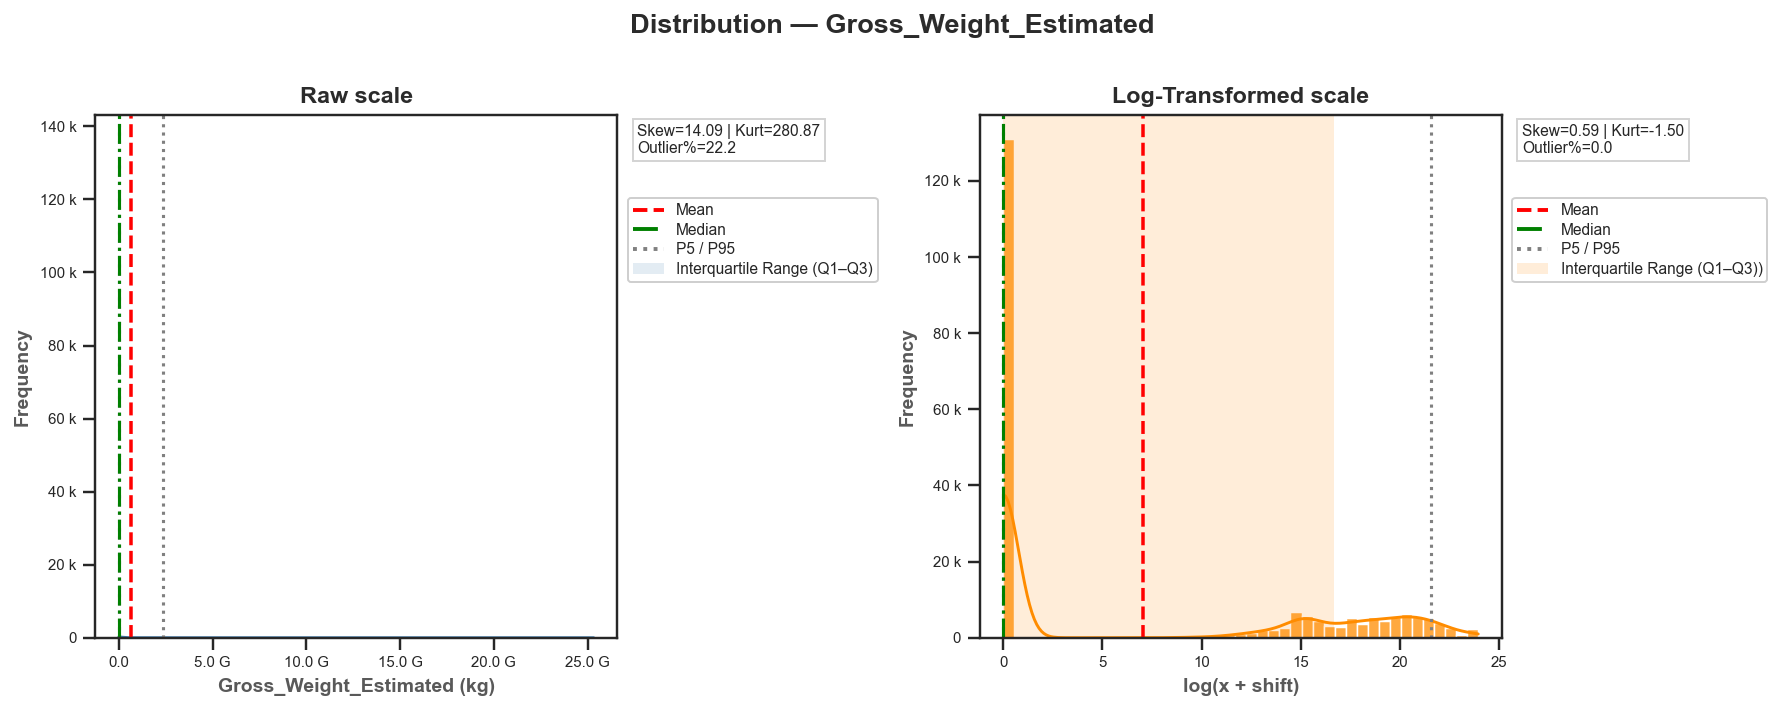

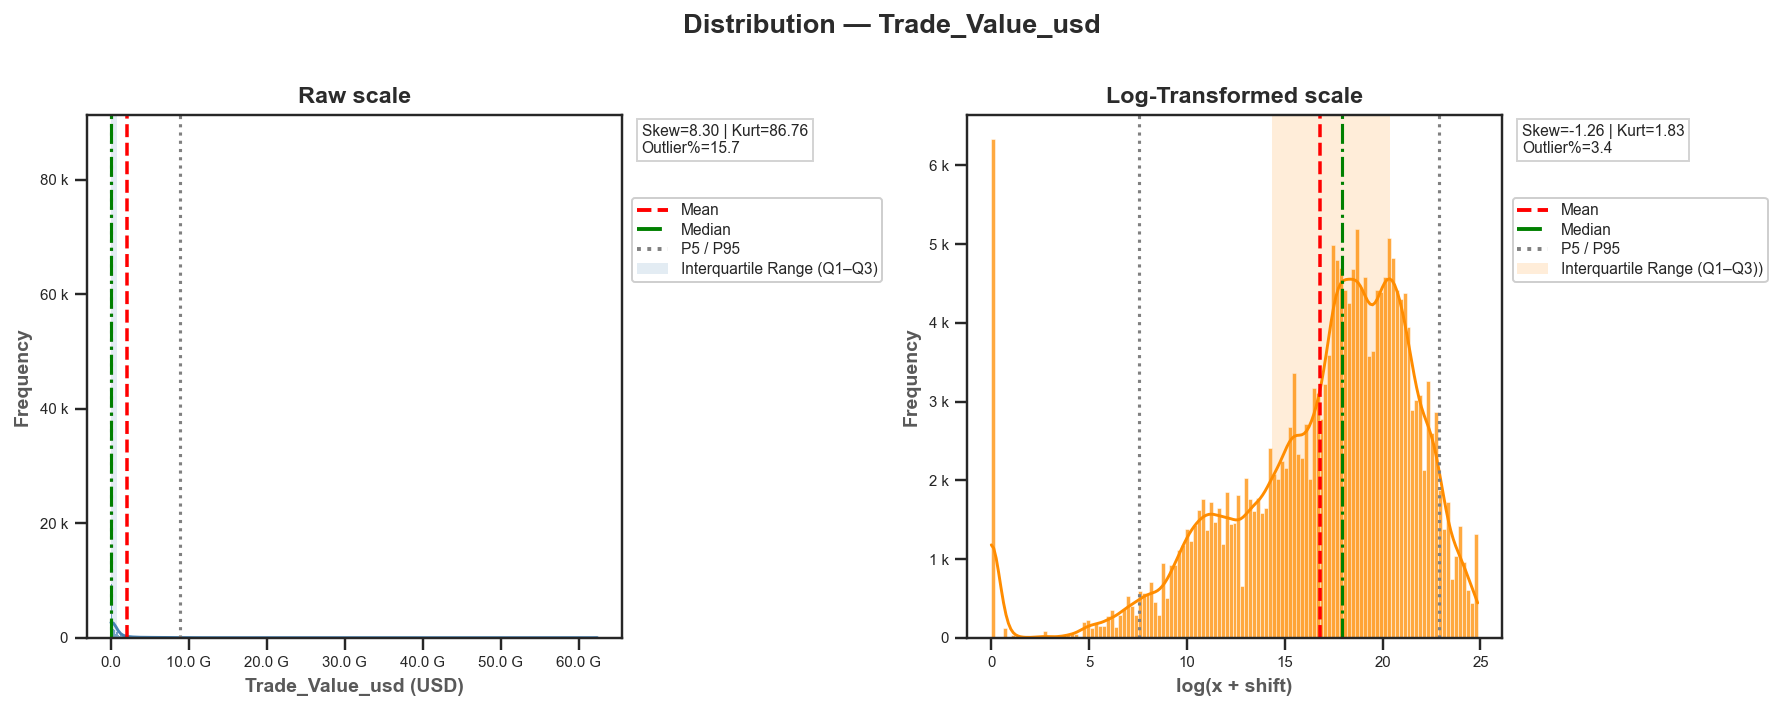

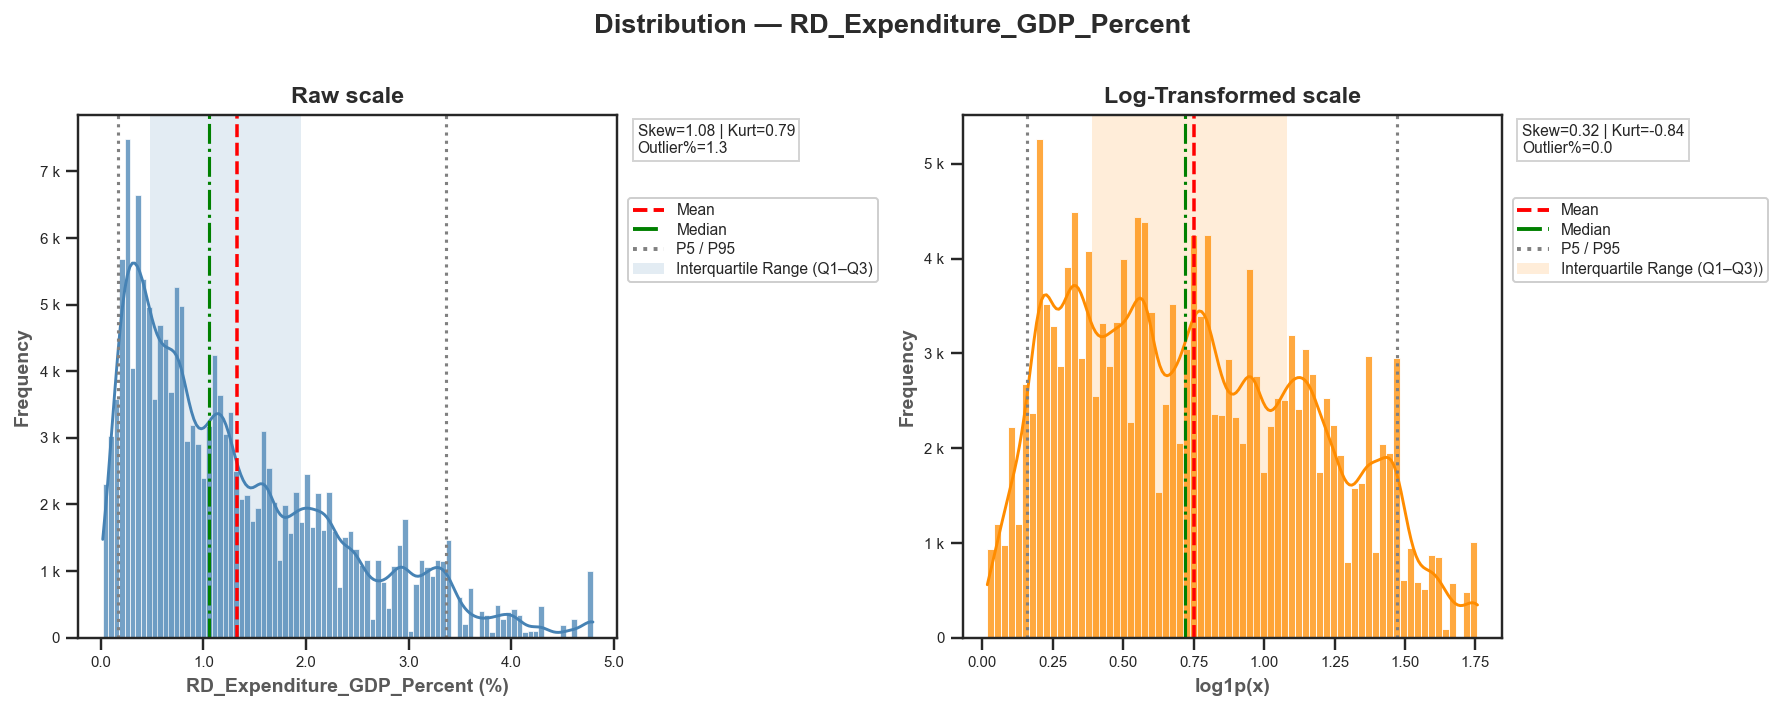

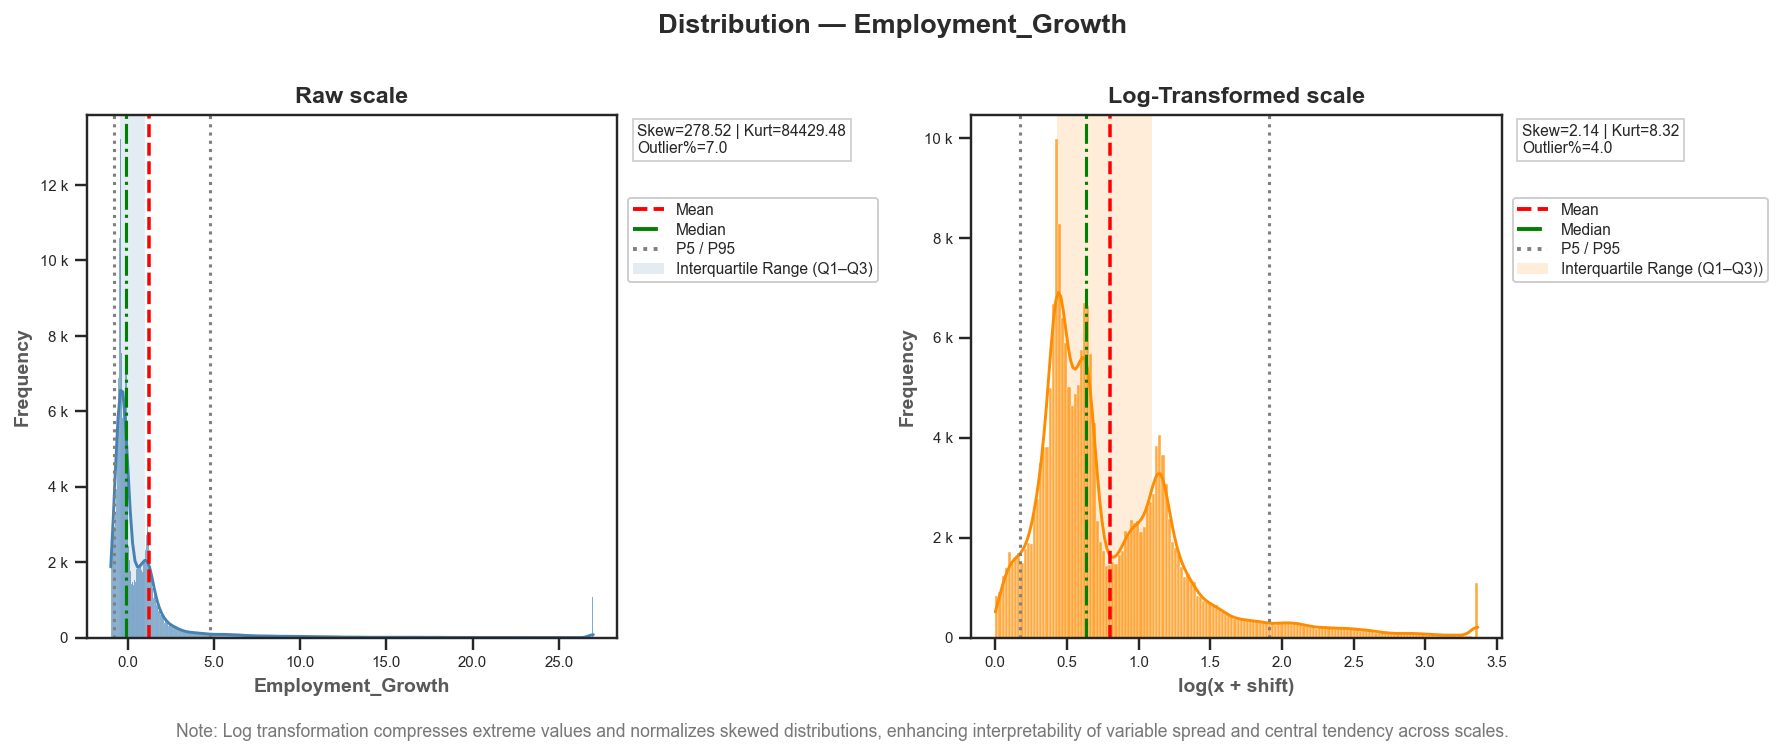

In [87]:
def dist_raw_vs_log(
    df: pd.DataFrame,
    col: str,
    unit_label: str | None = None,   
    winsor_upper: float = 0.995,
    footnote: str | None = None         
):
    """
    Side-by-side RAW vs LOG histograms with KDE, IQR band, P5/Median/P95/Mean lines,
    EngFormatter ticks (K/M/G), outside KPI boxes, and a bottom footnote.
    """
    s = pd.to_numeric(df[col], errors="coerce").dropna().astype(float)
    if s.empty:
        print(f"[{col}] no numeric data.")
        return None, None

    x_raw = s.to_numpy()
    shift = (1 - x_raw.min() + 1e-9) if np.any(x_raw <= 0) else 0.0
    x_log = np.log1p(x_raw) if shift == 0 else np.log(x_raw + shift)

    def _kpis(a: np.ndarray):
        ss = pd.Series(a)
        q1, q3 = ss.quantile([.25, .75]); iqr = q3 - q1
        lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
        return dict(
            mean=float(ss.mean()),
            median=float(ss.median()),
            std=float(ss.std(ddof=1)),
            skew=float(ss.skew()),
            kurt=float(ss.kurtosis()),
            p5=float(ss.quantile(.05)),
            p95=float(ss.quantile(.95)),
            q1=float(q1), q3=float(q3),
            outlier_pct=float(((ss < lo) | (ss > hi)).mean()*100)
        )

    k_raw, k_log = _kpis(x_raw), _kpis(x_log)

    def _wins(a, upper=0.995):
        hi = np.quantile(a, upper)
        return np.clip(a, None, hi)

    rplot, lplot = _wins(x_raw, winsor_upper), _wins(x_log, winsor_upper)

    fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.9))
    fig.subplots_adjust(left=0.06, right=0.94, wspace=0.28)

    # ---------- RAW ----------
    bins = np.histogram_bin_edges(rplot, bins="fd")
    sns.histplot(rplot, bins=bins, kde=True, color="steelblue", alpha=.75, ax=axes[0])

    axes[0].axvspan(k_raw["q1"], k_raw["q3"], color="steelblue", alpha=.15, lw=0)
    for v, c, ls in [(k_raw["p5"], "grey", ":"), (k_raw["median"], "green", "-."), (k_raw["p95"], "grey", ":")]:
        axes[0].axvline(v, color=c, linestyle=ls, lw=1.6)
    axes[0].axvline(k_raw["mean"], color="red", linestyle="--", lw=1.8)

    axes[0].set_title("Raw scale", fontweight="bold", color=TITLE_CLR, fontsize = 12)
    axes[0].set_xlabel(f"{col}" + (f" ({unit_label})" if unit_label else ""), color=AXIS_TEXT_CLR, weight="semibold", fontsize = 10)
    axes[0].set_ylabel("Frequency", color=AXIS_TEXT_CLR, weight="semibold", fontsize = 10)
    axes[0].xaxis.set_major_formatter(EngFormatter(places=1)) # unit=(unit_label or ""), sep=" ")
    axes[0].yaxis.set_major_formatter(EngFormatter(places=0))

    raw_txt = f"Skew={k_raw['skew']:.2f} | Kurt={k_raw['kurt']:.2f}\nOutlier%={k_raw['outlier_pct']:.1f}"
    at_raw = AnchoredText(raw_txt, loc="upper left", prop={"size":8}, frameon=True, pad=0.3,
                        bbox_to_anchor=(1.02, 1.0), bbox_transform=axes[0].transAxes, borderpad=0.3)
    axes[0].add_artist(at_raw); at_raw.patch.set_edgecolor("#D3D3D3")

    # Legend with IQR band included
    raw_handles = [
        Line2D([0], [0], color="red",   linestyle="--", lw=2, label="Mean"),
        Line2D([0], [0], color="green", linestyle="-.", lw=2, label="Median"),
        Line2D([0], [0], color="grey", linestyle=":", lw=2, label="P5 / P95"),
        Patch(facecolor="steelblue", alpha=0.15, edgecolor="none", label="Interquartile Range (Q1–Q3)")
    ]
    axes[0].legend(handles=raw_handles, loc="upper left", bbox_to_anchor=(1.02, 0.84),
                frameon=True, fancybox=True, framealpha=0.95, borderaxespad=0,
                labelspacing=0.3, borderpad=0.3, fontsize=8)

    # ---------- LOG ----------
    bins = np.histogram_bin_edges(lplot, bins="fd")
    sns.histplot(lplot, bins=bins, kde=True, color="darkorange", alpha=.75, ax=axes[1])

    axes[1].axvspan(k_log["q1"], k_log["q3"], color="darkorange", alpha=.15, lw=0)
    for v, c, ls in [(k_log["p5"], "grey", ":"), (k_log["median"], "green", "-."), (k_log["p95"], "grey", ":")]:
        axes[1].axvline(v, color=c, linestyle=ls, lw=1.6)
    axes[1].axvline(k_log["mean"], color="red", linestyle="--", lw=1.8)

    axes[1].set_title("Log-Transformed scale", fontweight="bold", color=TITLE_CLR, fontsize = 12)
    axes[1].set_xlabel("log1p(x)" if shift == 0 else "log(x + shift)", color=AXIS_TEXT_CLR, weight="semibold", fontsize = 10)
    axes[1].set_ylabel("Frequency", color=AXIS_TEXT_CLR, weight="semibold", fontsize = 10)
    axes[1].yaxis.set_major_formatter(EngFormatter(places=0))

    log_txt = f"Skew={k_log['skew']:.2f} | Kurt={k_log['kurt']:.2f}\nOutlier%={k_log['outlier_pct']:.1f}"
    at_log = AnchoredText(log_txt, loc="upper left", prop={"size":8}, frameon=True, pad=0.3,
                        bbox_to_anchor=(1.02, 1.0), bbox_transform=axes[1].transAxes, borderpad=0.3)
    axes[1].add_artist(at_log); at_log.patch.set_edgecolor("#D3D3D3")

    log_handles = [
        Line2D([0], [0], color="red",   linestyle="--", lw=2, label="Mean"),
        Line2D([0], [0], color="green", linestyle="-.", lw=2, label="Median"),
        Line2D([0], [0], color="grey", linestyle=":", lw=2, label="P5 / P95"),
        Patch(facecolor="darkorange", alpha=0.15, edgecolor="none", label="Interquartile Range (Q1–Q3))")
    ]
    axes[1].legend(handles=log_handles, loc="upper left", bbox_to_anchor=(1.02, 0.84),
                frameon=True, fancybox=True, framealpha=0.95, borderaxespad=0,
                labelspacing=0.3, borderpad=0.3, fontsize=8)

    # Title & footnote
    plt.suptitle(f"Distribution — {col}", y=1.02, fontsize=14, weight="bold", color=TITLE_CLR)
    plt.tight_layout()

    # KPI comparison row
    kpi = pd.DataFrame([{
        "Feature": col,
        "Mean (Raw)": k_raw["mean"],     "Mean (Log)": k_log["mean"],
        "Median (Raw)": k_raw["median"], "Median (Log)": k_log["median"],
        "Std (Raw)": k_raw["std"],       "Std (Log)": k_log["std"],
        "Skew (Raw)": k_raw["skew"],     "Skew (Log)": k_log["skew"],
        "Kurt (Raw)": k_raw["kurt"],     "Kurt (Log)": k_log["kurt"],
        "Outlier% (Raw)": k_raw["outlier_pct"], "Outlier% (Log)": k_log["outlier_pct"],
        "P5 (Raw)": k_raw["p5"], "P95 (Raw)": k_raw["p95"],
        "P5 (Log)": k_log["p5"], "P95 (Log)": k_log["p95"]
    }]).round(3)

    return fig, kpi

kpi_rows = []
for f in numeric_cols:
    unit = units_map.get(f)
    _, row = dist_raw_vs_log(df_ml, f, unit_label=unit)
    if row is not None:
        kpi_rows.append(row)

kpi_compare = pd.concat(kpi_rows, ignore_index=True)
display(kpi_compare)

# 🔹 Add a single common footnote below all figures
plt.figtext(
    0.1, -0.04,
    "Note: Log transformation compresses extreme values and normalizes skewed distributions, "
    "enhancing interpretability of variable spread and central tendency across scales.",
    ha="left", va="bottom", fontsize=9, color=FOOTNOTE_CLR
)

**Tech-leading countries are selected for all visualizations because of their strong roles in global technology and innovation, characterized by advanced industrial capacity, high R&D investment, and significant semiconductor adoption. Focusing on these economies helps capture key patterns in technology-driven transformation and employment dynamics worldwide**

**Pairplot of Log - Transformed Numerical Features**

* Will be examined pairwise feature relationships for the top tech-leader economies (covering >80% of global trade). This avoids clutter and makes the patterns 
  
  interpretable. 

In [88]:
# ---------- Pairplot (6 features together, top countries) ----------
sns.set_theme(style="whitegrid", context="notebook", font_scale=0.8)


def pairplot_top_countries_6(
    df: pd.DataFrame,
    cols: list[str],
    top_countries: list[str],
    per_country: int = 900,          # lower sample to keep a 6x6 grid readable
    height: float = 1.9,             # per-axes size (6 features ⇒ many panels)
    corner: bool = True,             # lower triangle only (much cleaner)
    palette: str = "Set1",
    title: str | None = "Pairplot — Top 10 Countries (log features, 6 vars)",
):
    
    # 1) Filter to top countries
    df_top = df[df["Country"].isin(top_countries)].copy()

    # 2) Stratified subsample for readability
    df_sampled = (
        df_top.groupby("Country", group_keys=False)
            .apply(lambda g: g.sample(n=min(len(g), per_country), random_state=42))
            .reset_index(drop=True)
    )

    # 3) Rename columns for cleaner labels
    rename_map = {
    "log_Alternative_Quantity_Value": "Alt. Quantity (log)",
    "log_Net_Weight_Estimated": "Net Weight (log)",
    "log_Gross_Weight_Estimated": "Gross Weight (log)",
    "log_Trade_Value_usd": "Trade Value (log)",
    "log_Employment_Growth": "Employment Growth (log)",
    "log_RD_Expenditure_GDP_Percent": "R&D % GDP (log)"
}
    df_sampled = df_sampled.rename(columns=rename_map)
    
    # 4) Build pairplot
    display_cols = [rename_map.get(c, c) for c in cols]
    use_cols = display_cols + ["Country"]
    colors = sns.color_palette("colorblind", n_colors=len(top_countries))
    g = sns.pairplot(
        df_sampled[use_cols].dropna(),
        vars=display_cols,
        hue="Country",
        corner=corner,
        palette=colors,
        diag_kind="kde",
        plot_kws={"alpha": 0.30, "s": 10, "edgecolor": "none"},
        diag_kws={"fill": True, "alpha": 0.90, "linewidth": 1.0},
        height=height
    )

    # cosmetics
    
    for ax in g.axes.flatten():
        if ax is not None:
            ax.tick_params(labelsize=8, length = 3, direction = "out")
            
            ax.grid(visible=False, which="major", axis="both")
            ax.tick_params(bottom=True, left=True)  # re-enable tick lines

            # 🔹 Make axis labels bold
            if ax.get_xlabel():
                ax.set_xlabel(ax.get_xlabel(), fontweight="semibold", fontsize=9, color = AXIS_TEXT_CLR)
            if ax.get_ylabel():
                ax.set_ylabel(ax.get_ylabel(), fontweight="semibold", fontsize=9, color = AXIS_TEXT_CLR)
            
    # move legend outside (right)
    # --- put this after sns.pairplot(...) and after your cosmetics on axes ---

# Make a bright legend (independent of point alpha)
    if g._legend is not None:
        # grab current legend labels, then remove the seaborn-made legend
        labels = [t.get_text() for t in g._legend.texts]
        g._legend.remove()
    
        # choose a bright palette (tweak as you like: "tab20", "Set2", "bright", etc.)
        bright = sns.color_palette("tab20", n_colors=len(labels))
    
        # build proxy handles with full opacity
        handles = [
            Line2D([0], [0], marker='o', linestyle='',
                markersize=7, markerfacecolor=bright[i],
                markeredgecolor=bright[i])
            for i in range(len(labels))
        ]
    
        # add a new figure-level legend
        leg = g.fig.legend(
            handles, labels, title="Country",
            loc="center left", bbox_to_anchor=(0.72, 0.7),
            frameon=True
        )
        leg.get_frame().set_alpha(0.9)
        leg.get_frame().set_edgecolor("#CCCCCC")
        for txt in leg.get_texts():
            txt.set_fontsize(7)
                      
                        
    # 2) give the figure extra right margin so the legend fits
    g.fig.subplots_adjust(right=0.92, top=0.92)     # tweak as needed

    if title:
        plt.suptitle(title, y=0.97, fontsize=14, fontweight="bold")

    return g

In [89]:
top_countries = ['China', 'Korea, Rep.', 'United States of America', 'United Kingdom', 'Japan', 'Israel', 'Germany', 'India', 'Netherlands',
                    'Singapore', 'France', 'Switzerland', 'Canada', 'Ireland', 'Sweden','Finland', 'Italy', 'Australia', 'Austria', 'Belgium', 'Denmark', 'Norway', 'Spain']

* To avoid overplotting, I show only the lower triangle with transparent points and KDE diagonals. This balances detail and clarity.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\2524159494.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=min(len(g), per_country), random_state=42))


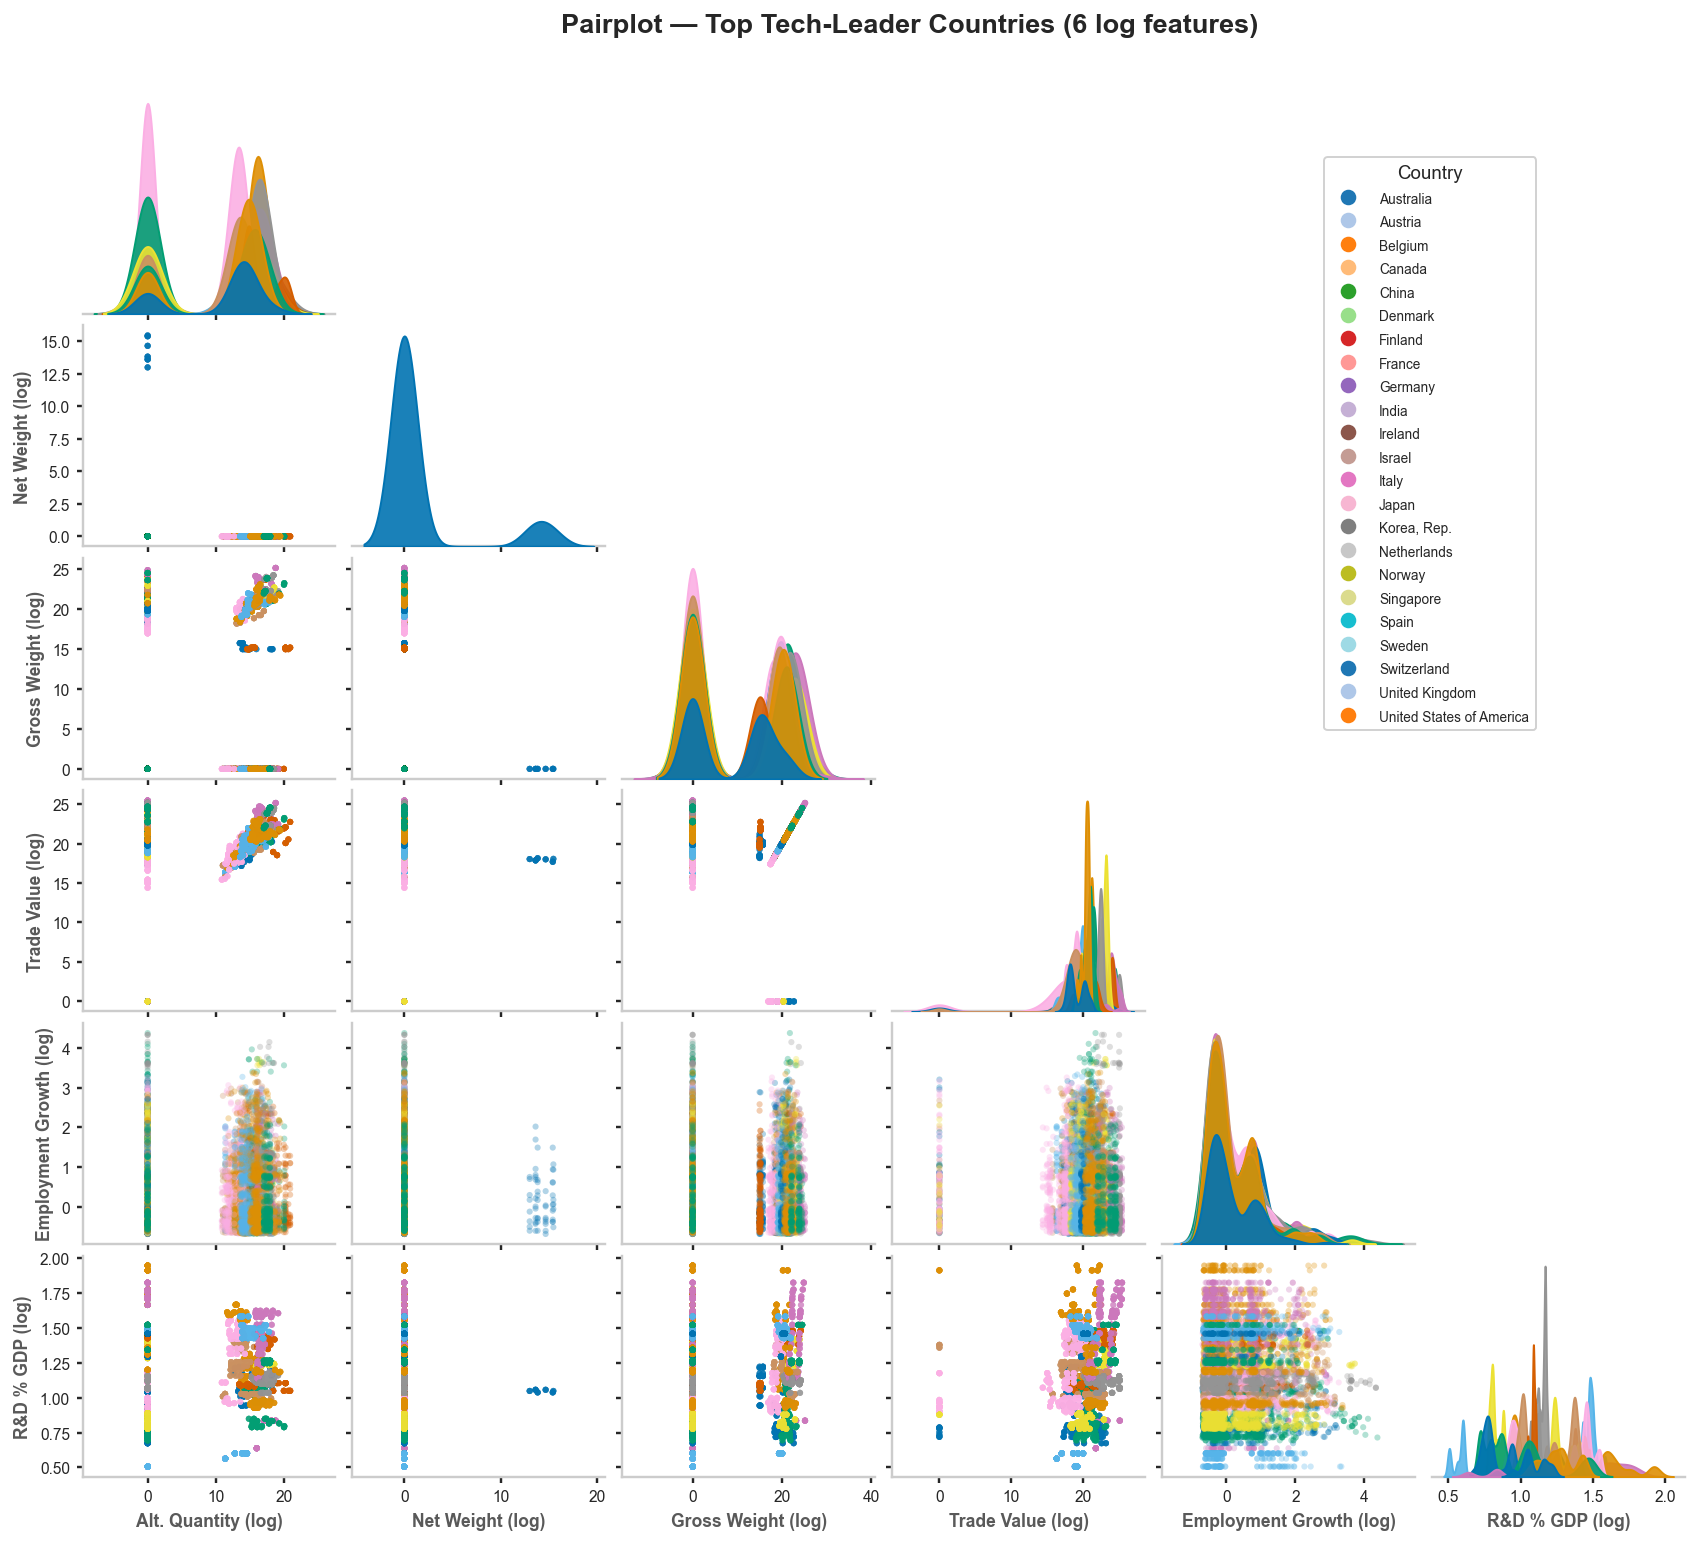

In [90]:

pairplot_top_countries_6(
    df=df_ml,
    cols=numeric_cols_log,
    top_countries=top_countries,
    per_country=900,       # tweak 600–1200 if you want lighter/heavier
    height=1.9,
    corner=True,
    palette="Set2",
    title="Pairplot — Top Tech-Leader Countries (6 log features)"
)

Trade Value, Gross Weight, Net Weight, and Alternative Quantity show strong positive associations across the top countries (dense lower-triangle bands), while Employment Growth is largely uncorrelated with trade/weight metrics; R&D % of GDP relates only weakly to trade.

Country clusters are clearly separated in both distributions and pairwise relations: China/USA/Japan occupy the highest trade–weight region, whereas Singapore/Netherlands cluster lower with tighter spreads—highlighting structural differences between major semiconductor economies.

In [28]:
# =============== Country Abbreviations ===============
# will be used when there is not enough spacing in the figure

COUNTRY_ABBR = {
    "Singapore": "SGP",
    "Korea, Rep.": "S. KOREA",
    "United States of America": "USA",
    "Philippines": "PHL",
    "Germany": "DEU",
    "China": "CHN",
    "Japan": "JPN",
    "India": "IND",
    "Netherlands": "NLD",
    "United Kingdom": "UK",
    "United Arab Emirates": "UAE",
    "Korea, Dem. People's Rep.": "N. Korea",
    "Russian Federation": "Russia",
    "Congo, Dem. Rep.": "DRC",
    "Congo, Rep.": "Congo",
    "Czech Republic": "Czechia",
    "Brunei Darussalam": "Brunei D.",
    "North Macedonia": "N.Macedonia"
}

In [29]:
country_rename = {"Korea, Rep.": "S.Korea", "United States of America": "USA", "United Kingdom": "UK"}

**Helpers** (run once)

In [30]:
# Helpers
# --------------------------------------------------------
# Compact / $T formatter (use for ticks AND annotations)
# --------------------------------------------------------
def fmt_trillions(x, _pos=None):
    
    return f"${x:.2f}T"

def fmt_trillions_1_dec(x, _pos=None):
    
    return f"${x:.1f}T"

def fmt_trillions_no_decimal(x, _pos=None):
    
    return f"${x:.0f}T"


# --------------------------------------------------------
# Nice log ticks in trillions
# --------------------------------------------------------
def nice_log_ticks_bil(vmin: float, vmax: float, target: int = 6) -> list[float]:
    if vmin <= 0 or vmax <= 0 or vmin >= vmax:
        return []
    bases = np.array([1.0, 2.0, 5.0])
    kmin = int(np.floor(np.log10(vmin)))
    kmax = int(np.ceil(np.log10(vmax)))
    cand = np.concatenate([bases * (10.0 ** k) for k in range(kmin - 1, kmax + 1)])
    ticks = cand[(cand >= vmin) & (cand <= vmax)]
    if ticks.size > target * 2:
        step = int(np.ceil(ticks.size / target))
        ticks = ticks[::step]
    return ticks.tolist()

# --------------------------------------------------------
# KPIs per group (vectorized)
# --------------------------------------------------------
def compute_kpis(
    df: pd.DataFrame, x: str, y: str, group: str | None = None, baseline_year: int | None = None
) -> pd.DataFrame:
    if group is None:
        df = df.assign(_grp="All"); group = "_grp"

    d = df.dropna(subset=[x, y]).sort_values([group, x]).reset_index(drop=True)
    if d.empty:
        cols = [group, "Min Year", "Min (T)", "Max Year", "Max (T)", "Δ (T)", "x-fold",
                "CAGR min→max (%)", "Latest Year", "Latest (T)", "YoY Δ (T)", "Δ since baseline (T)"]
        return pd.DataFrame(columns=cols)

    g = d.groupby(group, sort=False)
    idx_min, idx_max, idx_latest = g[y].idxmin(), g[y].idxmax(), g[x].idxmax()

    min_df = d.loc[idx_min,    [group, x, y]].rename(columns={x: "Min Year",    y: "Min (T)"})
    max_df = d.loc[idx_max,    [group, x, y]].rename(columns={x: "Max Year",    y: "Max (T)"})
    lat_df = d.loc[idx_latest, [group, x, y]].rename(columns={x: "Latest Year", y: "Latest (T)"})

    yoy = (g.apply(lambda t: t.set_index(x)[y].diff().iloc[-1] if len(t) > 1 else np.nan)
            .rename("YoY Δ (T)").reset_index())

    out = (min_df.merge(max_df, on=group)
                .merge(lat_df, on=group)
                .merge(yoy, on=group))

    out["Δ (T)"]  = out["Max (T)"] - out["Min (T)"]
    out["x-fold"] = np.where(out["Min (T)"] > 0, out["Max (T)"] / out["Min (T)"], np.nan)

    years = (out["Max Year"] - out["Min Year"]).clip(lower=1)
    out["CAGR min→max (%)"] = np.where(out["Min (T)"] > 0,
                                       ((out["Max (T)"] / out["Min (T)"]) ** (1 / years) - 1) * 100,
                                    np.nan)

    if baseline_year is not None:
        base = d[d[x] == baseline_year][[group, y]].rename(columns={y: "Baseline (T)"})
        out = out.merge(base, on=group, how="left")
        out["Δ since baseline (T)"] = out["Latest (T)"] - out["Baseline (T)"]
    else:
        out["Δ since baseline (T)"] = np.nan

    cols = [group, "Min Year", "Min (T)", "Max Year", "Max (T)", "Δ (T)", "x-fold",
            "CAGR min→max (%)", "Latest Year", "Latest (T)", "YoY Δ (T)", "Δ since baseline (T)"]
    return out[cols].reset_index(drop=True)

# --------------------------------------------------------

# --------------------------------------------------------
# Min/Max annotator (transparent boxes + anti-overlap for MAX)
# --------------------------------------------------------
from matplotlib import colors as mcolors

def _rgba(color, alpha):
    """Return RGBA tuple for given color + alpha transparency."""
    return mcolors.to_rgba(color, alpha)

# --------------------------------------------------------
# Min/Max annotator (colored transparent boxes per country)
# --------------------------------------------------------
def annotate_min_max(
    ax: Axes, df: pd.DataFrame,
    x: str, y: str, group: str,
    color_map: dict | None = None,          # {country: color}
    min_color: str = "#d9534f",
    max_color: str = "#2ca02c",
    size: int = 80, text_fs: float = 7.5,
    min_offset: tuple[int, int] = (-8, -4),
    max_offset: tuple[int, int] = (5, -10),
    show_country: bool = True,
    abbrev_map: dict | None = None,
    box_alpha: float = 0.5,                # transparency of box
    stack_step_pts: int = 16,              # vertical step between stacked boxes
    x_step_pts: int = 18,                  # horizontal step
    alternate: bool = True,   
):
    """
    Annotates min & max value per group on a time series chart.
    Automatically staggers overlapping max labels, and
    colors each box with the country's line color.
    """
    if abbrev_map is None:
        abbrev_map = {}

    stack_idx: dict[int, int] = {}  # to track number of labels per year

    for g, t in df.dropna(subset=[x, y]).groupby(group):
        t = t.sort_values(x)
        if t.empty:
            continue

        rmin, rmax = t.loc[t[y].idxmin()], t.loc[t[y].idxmax()]
        short = (abbrev_map.get(g, g[:3].upper()) + " ") if show_country else ""

        #Marker dots
        ax.scatter([rmin[x]], [rmin[y]], s=size, color=min_color, edgecolor="white", lw=1, zorder=5)
        ax.scatter([rmax[x]], [rmax[y]], s=size, color=max_color, edgecolor="white", lw=1, zorder=5)

        #Determine box color (same as line color if available)
        bc = color_map.get(g, "#555") if isinstance(color_map, dict) else "#555"
        bbox_kw = dict(boxstyle="round,pad=0.25", ec=bc, fc=_rgba(bc, box_alpha), lw=1)

        #=== MIN label ===
        ax.annotate(
            f"{short}min {fmt_trillions(rmin[y])}",
            xy=(rmin[x], rmin[y]), xytext=min_offset, textcoords="offset points",
            ha="right", va="top", fontsize=text_fs, bbox=bbox_kw, zorder = 20
        )

        #=== MAX label ===
        yr = int(rmax[x])
        bump = stack_idx.get(yr, 0)
        stack_idx[yr] = bump + 1
        sign = 1 if (not alternate or bump % 2 == 0) else -1
        x_shift = max_offset[0] + bump * x_step_pts
        y_shift = max_offset[1] + sign * bump * stack_step_pts

        ax.annotate(
            f"{short}max {fmt_trillions(rmax[y])}",
            xy=(rmax[x], rmax[y]),
            xytext=(x_shift, y_shift),
            textcoords="offset points",
            ha="left", va="bottom", fontsize=text_fs, bbox=bbox_kw, zorder = 20
        )

**Visualization: Semiconductor Trade Value Over Time (By Flow Type)** (KPI Table included)

* **Purpose:**

    This visual illustrates how global semiconductor exports and imports have evolved over time, highlighting key growth patterns, turning points, and trade imbalances.

    By showing min/max values and performance indicators (Δ, x-fold, CAGR, YoY), it provides a clear overview of the scale, direction, and momentum of trade flows.

* **Methodology:** 

    Trade records are **aggregated by year and flow type** (Export/Import) to obtain **annual world totals**.  For all **KPI calculations** used **row Value_Trade_USD** and values are converted from **USD to trillions** and visualizied on **linear axis**.  **Two time-series lines** were drawn—one per flow—using a fixed, **contrasting color palette**.  Each flow line includes **Min/Max annotations** with **colored markers and labels** to make turning points explicit. Biennial x-ticks were set for legibility. A subtle **shaded band** marks 2020–2021 to contextualize the **pandemic period**. A **KPI table** was computed (min/max, absolute change, x-fold, CAGR, latest value, YoY, and change since 2019) to quantify the patterns seen in the chart.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15000\2538706330.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yoy = (g.apply(lambda t: t.set_index(x)[y].diff().iloc[-1] if len(t) > 1 else np.nan)


Export: min $5.9T in 2001; max $23.8T in 2022; Δ +17.9T; x4.06; CAGR +6.90%
Import: min $2.0T in 2020; max $20.3T in 2022; Δ +18.3T; x9.95; CAGR +215.41%


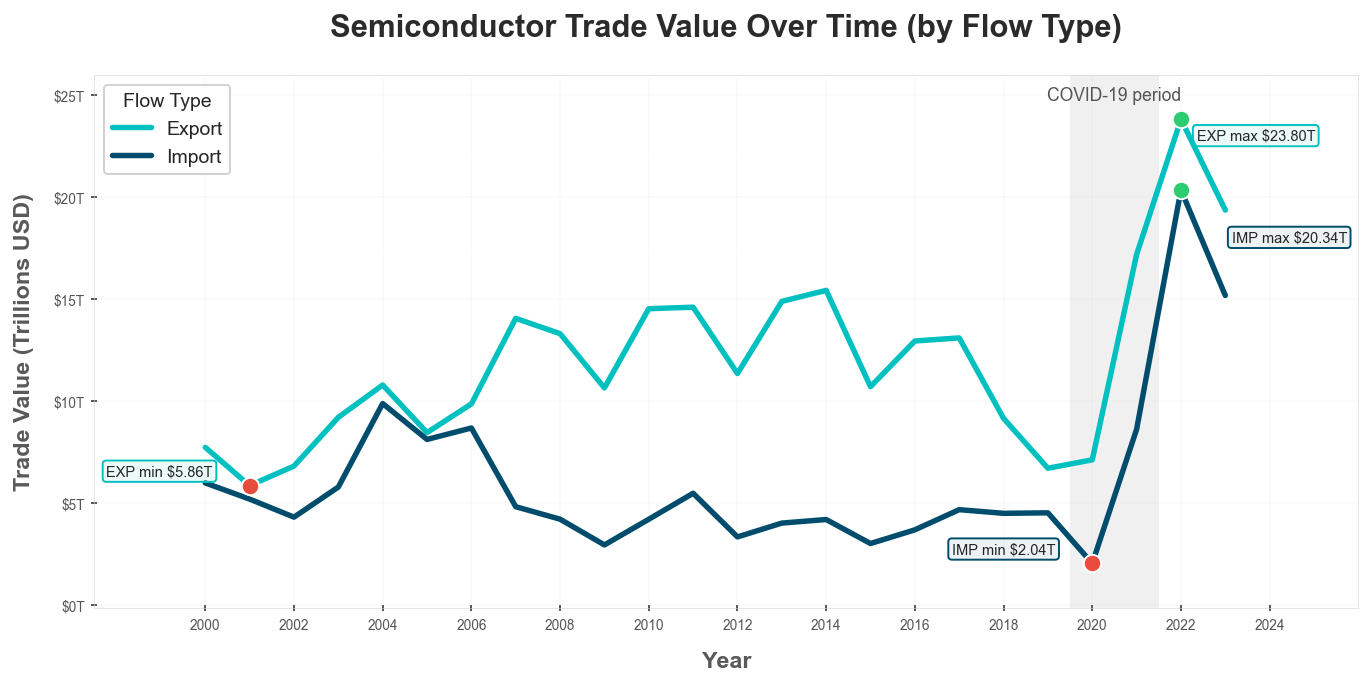

In [31]:
# build the yearly world totals (raw USD → $T)
# --------------------------------------------------------

# ---------------------config-----------------------------
FLOW_COLORS = {"Export": "#00C0C0", "Import": "#004C6D"}   # cyan / navy

pat = r"(?i)semiconductor|integrated circuit|ic"
flows = ["Export","Import"]                         # keep your order

trade = (df_ml[df_ml["Commodity_Type"].str.contains(pat, na=False)]
        .groupby(["Year","Trade_Flow_Type"], as_index=False)["Trade_Value_usd"].sum())
trade["Value_T"] = trade["Trade_Value_usd"]/1e12
trade = trade[trade["Trade_Flow_Type"].isin(flows)].rename(columns={"Trade_Flow_Type":"Flow"})

# plot
fig, ax = plt.subplots(figsize=(10,5))
for f in flows:
    s = trade[trade["Flow"]==f].sort_values("Year")
    ax.plot(s["Year"], s["Value_T"], lw=2.8, color=FLOW_COLORS[f], label=f)

ax.autoscale(enable=True, axis='y', tight=False)
ax.margins(y=0.1)   # adds 10% headroom automatically
ax.grid(True, which="major", axis="y", linestyle="--", linewidth=0.15, alpha=0.6)

# annotate min & max per flow  (requires annotate_min_max helper from earlier)
# annotate_min_max(ax, trade, x="Year", y="Value_B", group="Flow", color_map=FLOW_COLORS)
annotate_min_max(
    ax, trade, x="Year", y="Value_T", group="Flow",
    color_map=FLOW_COLORS,
    min_color="#e74c3c",   # red
    max_color="#2ecc71",   # green
    box_alpha = 0.07,
    max_offset=(8, -12), 
    min_offset=(-19,11)      
)

# arrange xticks labels
ax.set_xlim(trade["Year"].min() - 2.5, trade["Year"].max() + 3)
ax.set_xticks(np.arange(trade["Year"].min(), trade["Year"].max() + 3, 2))

# styling
ax.set_title("Semiconductor Trade Value Over Time (by Flow Type)", loc="center", pad=20, fontsize=16, color = TITLE_CLR)
ax.set_xlabel("Year", fontsize=12, labelpad=10, fontweight="bold", color = AXIS_TEXT_CLR)
ax.set_ylabel("Trade Value (Trillions USD)", fontsize=12, labelpad=10, fontweight="bold", color = AXIS_TEXT_CLR)
ax.yaxis.set_major_formatter(FuncFormatter(fmt_trillions_no_decimal))
ax.legend(title="Flow Type", loc="upper left")

# subtle covid band (behind lines)
start, end = 2020, 2021
if trade['Year'].min() <= start <= trade['Year'].max():
    ax.axvspan(start-0.5, end+0.5, color="#000", alpha=0.06, lw=0, zorder=0)
    ax.text((start+end)/2, 0.98, "COVID-19 period",
            transform=ax.get_xaxis_transform(), ha="center", va="top",
            fontsize=9, color="#555")


plt.tight_layout()

# KPI table (includes min/max, Δ, x-fold, CAGR, latest, YoY, since 2019)
kpis = compute_kpis(trade, x="Year", y="Value_T", group="Flow", baseline_year=2019)
try:
    display(kpis.style.format({
        "Min (T)":"{:,.1f}","Max (T)":"{:,.1f}","Δ (T)":"{:+,.1f}",
        "x-fold":"{:,.2f}","CAGR min→max (%)":"{:+.2f}",
        "Latest (T)":"{:,.1f}","YoY Δ (T)":"{:+,.1f}","Δ since baseline (T)":"{:+,.1f}"
    }))
except Exception:
    print(kpis)

# concise summary lines
for _, r in kpis.iterrows():
    flow_name = r.get("Flow", r.get("Trade_Flow_Type", "Flow"))
    print(
        f"{flow_name}: min ${r['Min (T)']:.1f}T in {int(r['Min Year'])}; "
        f"max ${r['Max (T)']:.1f}T in {int(r['Max Year'])}; "
        f"Δ {r['Δ (T)']:+.1f}T; x{r['x-fold']:.2f}; CAGR {r['CAGR min→max (%)']:+.2f}%"
    )

* **Methodology:** 

    The **same** visualization as above plotting **Log-Transformed data on linear axis**. **Annotations** show **real USD trillions**. 

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\2538706330.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yoy = (g.apply(lambda t: t.set_index(x)[y].diff().iloc[-1] if len(t) > 1 else np.nan)


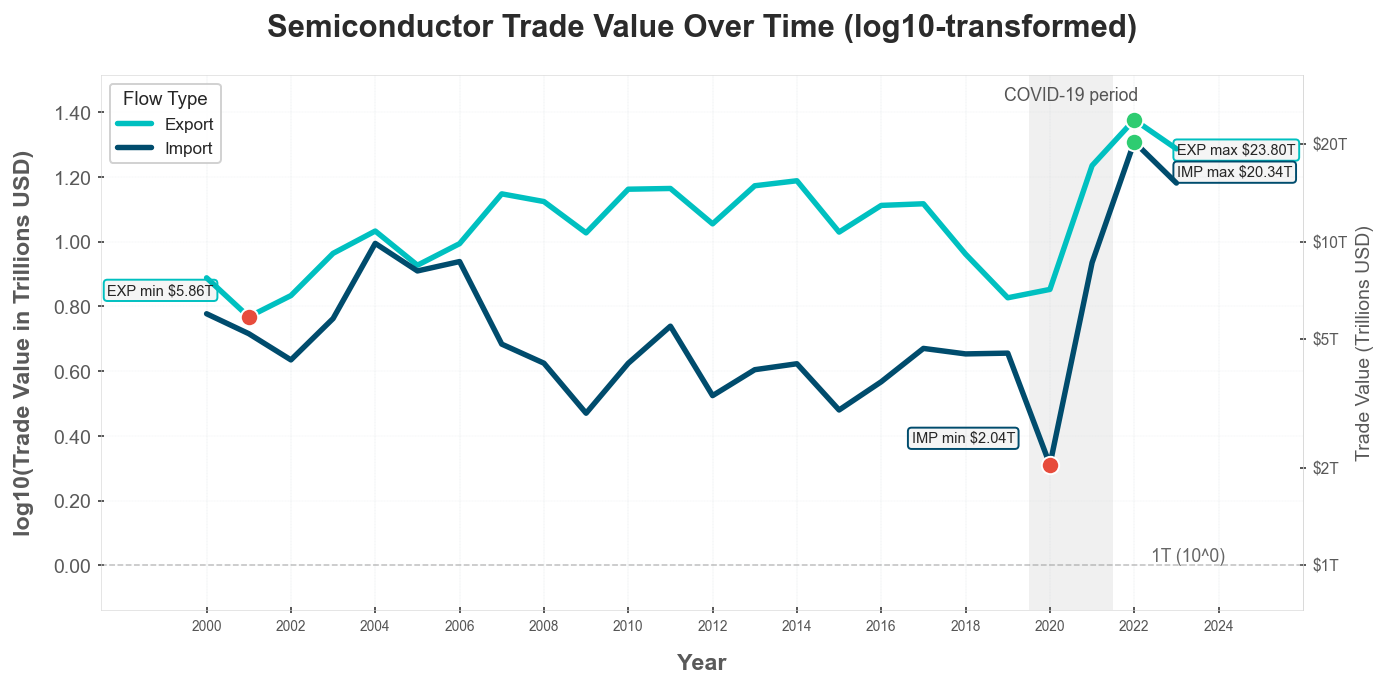

In [112]:
# --------------------------------------------------------
# Yearly World Totals — log10-transformed plot on linear axis
# (KPIs computed from RAW trillions, same ETL as code 1)
# --------------------------------------------------------
# ---------- Config ----------
FLOW_COLORS = {"Export": "#00C0C0", "Import": "#004C6D"}   # cyan / navy
TITLE_CLR    = globals().get("TITLE_CLR", "black")
AXIS_TEXT_CLR= globals().get("AXIS_TEXT_CLR", "black")

# IMPORTANT: use the SAME pattern as your code 1
pat   = r"(?i)semiconductor|integrated circuit|ic"
flows = ["Export","Import"]

# ---------- ETL (identical to code 1) ----------
trade = (df_ml[df_ml["Commodity_Type"].str.contains(pat, na=False)]
            .groupby(["Year","Trade_Flow_Type"], as_index=False)["Trade_Value_usd"].sum())
trade["Value_T"] = trade["Trade_Value_usd"]/1e12
trade = (trade[trade["Trade_Flow_Type"].isin(flows)]
            .rename(columns={"Trade_Flow_Type":"Flow"})
            .sort_values(["Flow","Year"])
            .reset_index(drop=True))

# ---------- Log-transform ONLY for plotting ----------
eps = 1e-12
trade["log_Value_T"] = np.log10(np.clip(trade["Value_T"], eps, None))

# ---------- Plot (linear y with log values) ----------
fig, ax = plt.subplots(figsize=(10,5))
for f in flows:
    s = trade[trade["Flow"]==f]
    ax.plot(s["Year"], s["log_Value_T"], lw=2.8, color=FLOW_COLORS[f], label=f)

# Left y: show log10 values (include 0 = 1T benchmark)
ymin = float(np.floor(trade["log_Value_T"].min()))
ymax = float(np.ceil(trade["log_Value_T"].max()))
ticks_left = np.arange(ymin, ymax+1e-9, 0.2)
ticks_left = sorted(set(np.append(ticks_left, 0.0)))  # ensure 1T
ax.set_yticks(ticks_left)
ax.set_yticklabels([f"{t:.2f}" for t in ticks_left], fontsize=10, color=AXIS_TEXT_CLR)

# 1T benchmark line + label
ax.axhline(0.0, color="#888", ls="--", lw=0.8, alpha=0.5)
ax.text(ax.get_xlim()[1], 0.0, "1T (10^0)", va="bottom", ha="right", fontsize=9, color="#666")

# Optional right y-axis: real trillions for readability
ax.autoscale(enable=True, axis='y', tight=False)
ax.margins(y=0.1)   # adds 10% headroom automatically

def ylog_to_T(y):  return 10.0**y
def T_to_ylog(T):  return np.log10(np.clip(T, eps, None))
sec = ax.secondary_yaxis('right', functions=(ylog_to_T, T_to_ylog))
sec.set_ylabel("Trade Value (Trillions USD)", color=AXIS_TEXT_CLR)

real_min, real_max = 10**ymin, 10**ymax
cands = np.array([0.2, 0.5, 1, 2, 5, 10, 20, 50])
ticks_right = cands[(cands >= real_min*0.98) & (cands <= real_max*1.02)]
if ticks_right.size:
    sec.set_yticks(ticks_right)
    sec.set_yticklabels([f"${v:.0f}T" if v>=1 else f"${v:.1f}T" for v in ticks_right],
                        fontsize=8, color=AXIS_TEXT_CLR)

# Axis cosmetics
ax.margins(y=0.10)
ax.grid(True, which="major", axis="y", linestyle="--", linewidth=0.15, alpha=0.6)
ax.set_xlim(trade["Year"].min() - 2.5, trade["Year"].max() + 3)
ax.set_xticks(np.arange(trade["Year"].min(), trade["Year"].max() + 3, 2))

# Titles/labels
ax.set_title("Semiconductor Trade Value Over Time (log10-transformed)",
                loc="center", pad=20, fontsize=16, color=TITLE_CLR)
ax.set_xlabel("Year", fontsize=12, labelpad=10, fontweight="bold", color=AXIS_TEXT_CLR)
ax.set_ylabel("log10(Trade Value in Trillions USD)", fontsize=12, labelpad=10,
                fontweight="bold", color=AXIS_TEXT_CLR)

# Min/Max annotations — show TRUE values; position with log-values
def fmt_trillions(v):  return f"${v:.2f}T"

for f, s in trade.groupby("Flow"):
    s = s.sort_values("Year")
    rmin = s.loc[s["Value_T"].idxmin()]
    rmax = s.loc[s["Value_T"].idxmax()]

    ax.scatter([rmin["Year"]], [rmin["log_Value_T"]], s=80, color="#e74c3c",
                edgecolor="white", lw=1, zorder=5)
    ax.scatter([rmax["Year"]], [rmax["log_Value_T"]], s=80, color="#2ecc71",
                edgecolor="white", lw=1, zorder=5)

    ax.annotate(f"{f[:3].upper()} min {fmt_trillions(rmin['Value_T'])}",
                xy=(rmin["Year"], rmin["log_Value_T"]),
                xytext=(-18, 10), textcoords="offset points",
                ha="right", va="bottom",
                bbox=dict(boxstyle="round,pad=0.25",
                            ec=FLOW_COLORS[f], fc=(0,0,0,0.04), lw=1),
                fontsize=7.5)
    ax.annotate(f"{f[:3].upper()} max {fmt_trillions(rmax['Value_T'])}",
                xy=(rmax["Year"], rmax["log_Value_T"]),
                xytext=(22, -12), textcoords="offset points",
                ha="left", va="top",
                bbox=dict(boxstyle="round,pad=0.25",
                            ec=FLOW_COLORS[f], fc=(0,0,0,0.04), lw=1),
                fontsize=7.5)

ax.legend(title="Flow Type", loc="upper left")

# COVID shading (same logic)
start, end = 2020, 2021
if trade["Year"].min() <= start <= trade["Year"].max():
    ax.axvspan(start-0.5, end+0.5, color="#000", alpha=0.06, lw=0, zorder=0)
    ax.text((start+end)/2, 0.98, "COVID-19 period",
            transform=ax.get_xaxis_transform(), ha="center", va="top",
            fontsize=9, color="#555")

plt.tight_layout()

# ---------- KPIs from RAW Value_T (will match code 1) ----------
kpis = compute_kpis(trade, x="Year", y="Value_T", group="Flow", baseline_year=2019)
try:
    display(kpis.style.format({
        "Min (T)":"{:,.1f}","Max (T)":"{:,.1f}","Δ (T)":"{:+,.1f}",
        "x-fold":"{:,.2f}","CAGR min→max (%)":"{:+.2f}",
        "Latest (T)":"{:,.1f}","YoY Δ (T)":"{:+,.1f}",
        "Δ since baseline (T)":"{:+,.1f}"
    }))
except Exception:
    print(kpis)

* **log(0) is undefined**, so there is no meaningful transformed value that maps to zero. Plotting **row data** on log-scaled axis tick **0 will not be shown**

**Visualization: Global Semiconductor Exports**/Import

* **Purpose:**

   These 2 charts "Global Semiconductor Exports(Imports)" examines the long-term export(import) trends of the world’s leading semiconductor-exporting countries, showing how their trade performance and growth trajectories have evolved. It provides a clear view of which countries dominate global semiconductor exports(imports) and how their relative positions have shifted over the years.

* **Methodology:**

    The data were **aggregated by country and year**. For all **KPI calculations** used **row Value_Trade_USD** and converted from **USD to trillions** and visualizied on **log-scaled y axis**. The top four exporting countries were selected based on their **3-year average** export values (2021–2023) to highlight consistent leaders rather than short-term fluctuations. Each country’s trend was smoothed using a **3-year moving average** and displayed on a **logarithmic scale** to better show differences in magnitude. **Min and max points** were annotated to highlight each  country’s **lowest and highest** export years.  

(<Figure size 2030x700 with 1 Axes>,
 <Axes: title={'center': 'Global Semiconductor Exports'}, xlabel='Year', ylabel='Trade value (current USD, trillions, log scale)'>)

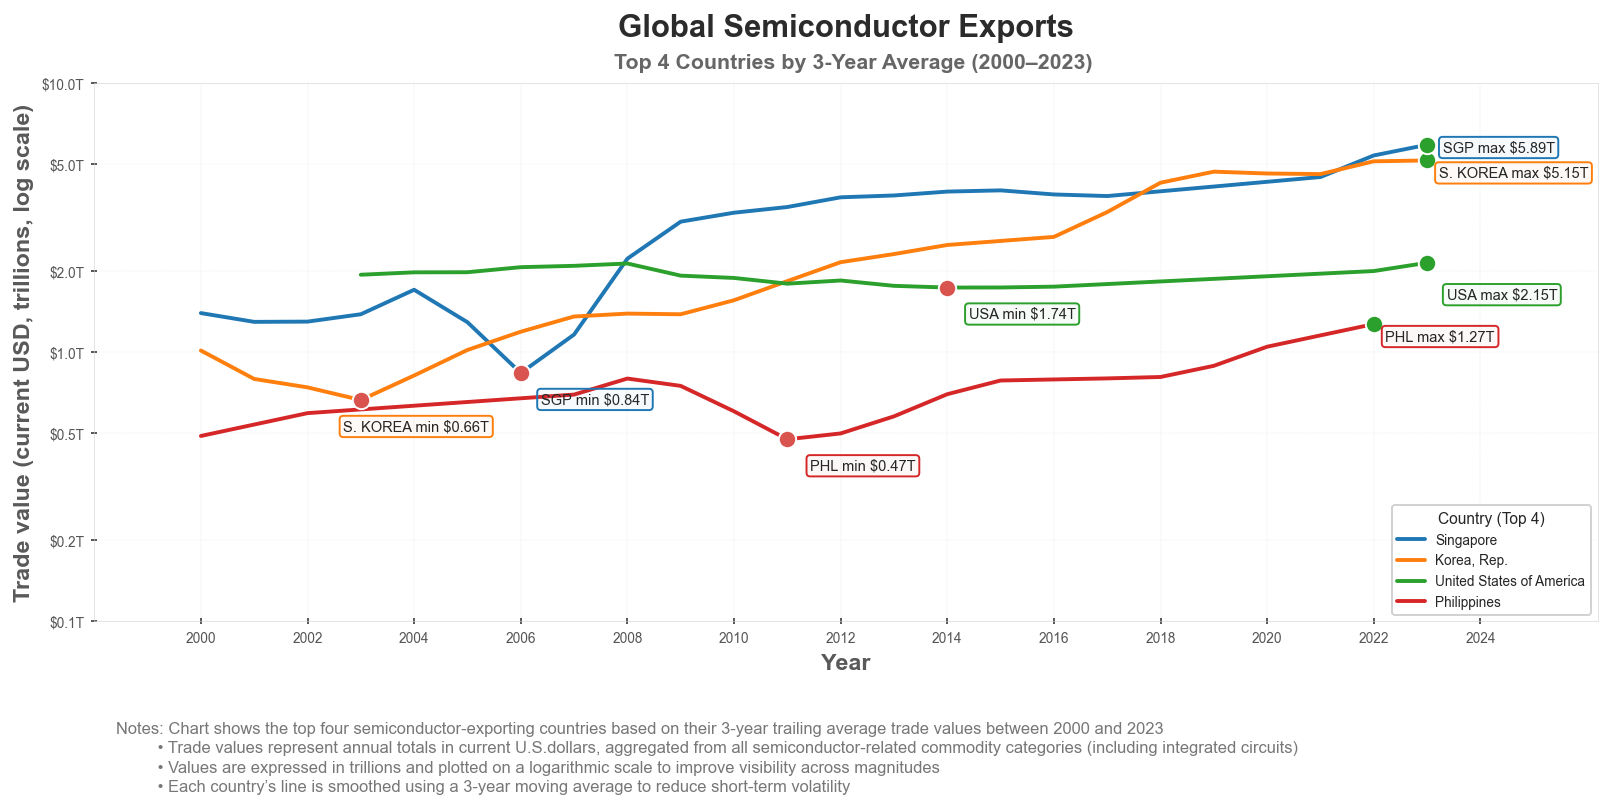

In [121]:
# --------------------------------------------------------
# Main plot (Top semiconductor exporters, full history)
# --------------------------------------------------------
def plot_top_exporters_timeseries(
    df_ml: pd.DataFrame,
    flow: str = "Export",
    top_n: int = 4,
    trailing_years: int = 3,
    smooth_rolling: int | None = 3,
    yscale: str = "log",
    figsize=(14.5, 5),
    add_minmax: bool = True,
):
    # === filter & aggregate to trillions ===
    pat = "(?i)semiconductor|integrated circuit|ic"
    need = ["Year","Country","Commodity_Type","Trade_Flow_Type","Trade_Value_usd"]
    d = (
        df_ml[need].dropna(subset=["Year","Country"])
        .query("Trade_Flow_Type == @flow")
        .query("Commodity_Type.str.contains(@pat)", engine="python")
        .assign(Year=lambda x: x["Year"].astype(int))
    )
    agg = (
        d.groupby(["Country","Year"], as_index=False)["Trade_Value_usd"]
        .sum().rename(columns={"Trade_Value_usd":"USD"})
    )
    agg["T"] = agg["USD"] / 1e12

    # === pick top by trailing average ===
    last_year = int(agg["Year"].max())
    win = range(last_year - trailing_years + 1, last_year + 1)
    top = (
        agg[agg["Year"].isin(win)]
        .groupby("Country", as_index=False)["T"].mean()
        .sort_values("T", ascending=False)
        .head(top_n)["Country"].tolist()
    )

    long = agg[agg["Country"].isin(top)].sort_values(["Country","Year"]).copy()

    # optional smoothing
    ycol = "T"
    if smooth_rolling and smooth_rolling > 1:
        long["T_smooth"] = (
            long.groupby("Country")["T"]
                .transform(lambda s: s.rolling(smooth_rolling, min_periods=1).mean())
        )
        ycol = "T_smooth"

    # === plot ===
    fig, ax = plt.subplots(figsize=figsize)
    palette = sns.color_palette("tab10", n_colors=len(top))
    country_colors = {}

    for c, col in zip(top, palette):
        g = long[long["Country"] == c]
        ax.plot(g["Year"], g[ycol], lw=2, label=c, color=col)
        country_colors[c] = col  # keep for annotation box colors

    # axes
    if yscale.lower() == "log":
        ax.set_yscale("log")
        ax.set_ylabel("Trade value (current USD, trillions, log scale)", fontsize = 12, color = AXIS_TEXT_CLR, weight = "semibold")
    else:
        ax.set_ylabel("Trade value (current USD)")
    ax.set_xlabel("Year", fontsize = 12, color = AXIS_TEXT_CLR, weight = "semibold")

    # X ticks & limits
    xmin, xmax = int(long["Year"].min()), int(long["Year"].max())
    xmax_display = max(xmax, 2024)
    ax.set_xlim(xmin - 2, xmax_display + 2.2)  # headroom to the right
    ax.set_xticks(np.arange(xmin, xmax_display + 1, 2))
            
    # Y ticks & limits
    # --- Y ticks & limits (evenly spaced in log space) ---
    ydat = long[ycol].replace(0, np.nan).dropna()
    from matplotlib.ticker import LogLocator, FuncFormatter

    ax.set_yscale("log")
    lo, hi = 0.1, 10.0                 # or compute bounds
    ax.set_ylim(lo, hi)
    
    # majors at 1–2–5 within each decade; no minor ticks
    ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0, 2.0, 5.0)))
    ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=()))
    ax.yaxis.set_major_formatter(FuncFormatter(fmt_trillions_1_dec))
    ax.grid(True, which="major", axis="y", linestyle="--", linewidth=0.15, alpha=0.6)
                                                                                                    
    # title, legend
    ax.set_title(f"Global Semiconductor {flow}s", fontsize=16, pad=24, weight="bold", color = TITLE_CLR)
    ax.text(
        0.505, 1.02,
        f"Top {top_n} Countries by {trailing_years}-Year Average (2000–2023)",
        fontsize=11, color=SUBTITLE_CLR, ha="center", va="bottom", weight = "semibold",
        transform=ax.transAxes
    )
    ax.set_axisbelow(True)
    ax.legend(title="Country (Top 4)",  bbox_to_anchor=(1.0, 0.0), loc="lower right", fontsize=7, title_fontsize=8)

    # annotations (colored, transparent, staggered)
    if add_minmax:
        annotate_min_max(
            ax=ax,
            df=long.rename(columns={"T": "T_raw"}).assign(T=long[ycol]),
            x="Year", y="T", group="Country",
            color_map=country_colors,       # <-- match box colors to lines
            abbrev_map=COUNTRY_ABBR, show_country=True,
            box_alpha=0.03,                 # transparency
            stack_step_pts=-5,              # vertical spacing between stacked boxes
            x_step_pts=2,                  # horizontal spacing
            alternate=True,                 # alternate up/down when stacking
            max_offset=(6, -10), 
            min_offset=(66, -10)
        )

    palette = sns.color_palette("tab10", n_colors=len(top))
    country_colors = dict(zip(top, palette))

    footnote_flow = flow.lower()  # "import" or "export"
    fig.text(
        0.06, -0.04,
        f"Notes: Chart shows the top four semiconductor-{footnote_flow}ing countries based on their 3-year trailing "
        "average trade values between 2000 and 2023\n"
        "         • Trade values represent annual totals in current U.S.dollars, aggregated from all semiconductor-related " \
        "commodity categories (including integrated circuits)\n "
        "        • Values are expressed in trillions and plotted on a logarithmic scale to improve visibility across magnitudes\n "
        "        • Each country’s line is smoothed using a 3-year moving average to reduce short-term volatility",
        ha="left", va="top", fontsize=8.5, color=FOOTNOTE_CLR, linespacing = 1.35, wrap=True
    )                    

    fig.tight_layout(rect=(0, 0, 0.80, 1))
    return fig, ax

# call
plot_top_exporters_timeseries(
    df_ml, 
    flow="Export", 
    top_n=4, 
    trailing_years=3,
    smooth_rolling=3, 
    yscale="log", 
    add_minmax=True
)

**Visualization: Global Semiconductor Imports**

* **The same methodology as for figure above. Used flow type "Import"**

(<Figure size 2030x700 with 1 Axes>,
 <Axes: title={'center': 'Global Semiconductor Imports'}, xlabel='Year', ylabel='Trade value (current USD, trillions, log scale)'>)

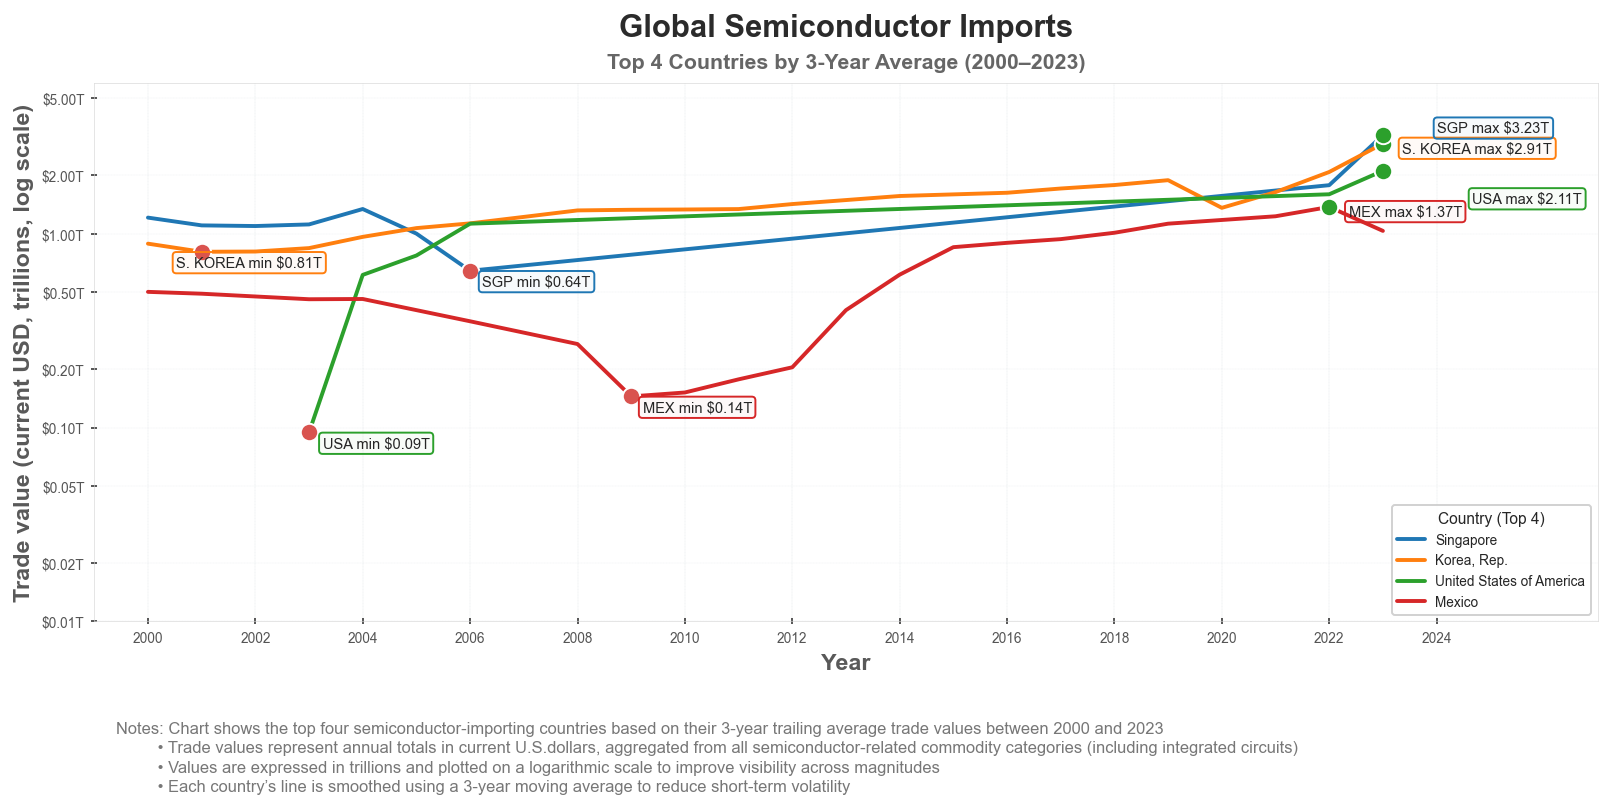

In [124]:
# --------------------------------------------------------
# Main plot (Top semiconductor importers, full history)
# --------------------------------------------------------
def plot_top_importers_timeseries(
    df_ml: pd.DataFrame,
    flow: str = "Import",
    top_n: int = 4,
    trailing_years: int = 3,
    smooth_rolling: int | None = 3,
    yscale: str = "log",
    figsize=(14.5, 5),
    add_minmax: bool = True,
):
    # === Filter to semiconductor-related commodities ===
    pat = "(?i)semiconductor|integrated circuit|ic"
    need = ["Year", "Country", "Commodity_Type", "Trade_Flow_Type", "Trade_Value_usd"]
    d = (
        df_ml[need].dropna(subset=["Year", "Country"])
        .query("Trade_Flow_Type == @flow")
        .query("Commodity_Type.str.contains(@pat)", engine="python")
        .assign(Year=lambda x: x["Year"].astype(int))
    )

    # === Aggregate to billions ===
    agg = (
        d.groupby(["Country", "Year"], as_index=False)["Trade_Value_usd"]
        .sum()
        .rename(columns={"Trade_Value_usd": "USD"})
    )
    agg["T"] = agg["USD"] / 1e12

    # === Identify Top N importers by trailing average ===
    last_year = int(agg["Year"].max())
    win = range(last_year - trailing_years + 1, last_year + 1)
    top = (
        agg[agg["Year"].isin(win)]
        .groupby("Country", as_index=False)["T"]
        .mean()
        .sort_values("T", ascending=False)
        .head(top_n)["Country"]
        .tolist()
    )

    long = agg[agg["Country"].isin(top)].sort_values(["Country", "Year"]).copy()

    # Optional smoothing (rolling average)
    ycol = "T"
    if smooth_rolling and smooth_rolling > 1:
        long["T_smooth"] = (
            long.groupby("Country")["T"]
            .transform(lambda s: s.rolling(smooth_rolling, min_periods=1).mean())
        )
        ycol = "T_smooth"

    # === Plot setup ===
    fig, ax = plt.subplots(figsize=figsize)
    palette = sns.color_palette("tab10", n_colors=len(top))
    country_colors = {}

    for c, col in zip(top, palette):
        g = long[long["Country"] == c]
        ax.plot(g["Year"], g[ycol], lw=2, label=c, color=col)
        country_colors[c] = col  # store for annotations

    # === Axis settings ===
    if yscale.lower() == "log":
        ax.set_yscale("log")
        ax.set_ylabel("Trade value (current USD, trillions, log scale)", fontsize = 12, color = AXIS_TEXT_CLR, weight = "semibold")
    else:
        ax.set_ylabel("Trade value (current USD)")
    ax.set_xlabel("Year", fontsize = 12, color = AXIS_TEXT_CLR, weight = "semibold")
    
    #X ticks & limits
    # xmin, xmax = int(long["Year"].min()), int(long["Year"].max())
    # xmax_display = max(xmax, 2024)
    # ax.set_xlim(xmin - 1, xmax_display + 2.2)  # headroom to the right
    # ax.set_xticks(np.arange(xmin, xmax_display + 5, 2))

    # --- X ticks & limits: every 2 yrs, last tick = 2024 ---
    xmin = int(long["Year"].min())
    xmax = int(long["Year"].max())

    last_tick = 2024
    # first even tick ≥ xmin (keeps a clean 2-year cadence)
    start_tick = int(np.ceil(xmin / 2.0) * 2)

    ticks = np.arange(start_tick, last_tick + 1, 2, dtype=int)
    ax.set_xticks(ticks)

    # give a little headroom to the right for labels/annotations
    ax.set_xlim(xmin - 1, last_tick + 3.0)

    
    # Y ticks & limits
    # --- Y ticks & limits (evenly spaced in log space) ---
    ydat = long[ycol].replace(0, np.nan).dropna()
    ax.set_yscale("log")
    lo, hi = 0.01, 6.0                 # or compute bounds
    ax.set_ylim(lo, hi)
    ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0, 2.0, 5.0)))
    ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=()))
    ax.yaxis.set_major_formatter(FuncFormatter(fmt_trillions))
    ax.grid(True, which="major", axis="y", linestyle="--", linewidth=0.15, alpha=0.6)
    # ===Title, legend, grid ===
    ax.set_title(f"Global Semiconductor {flow}s", fontsize=16, pad=24, weight="bold", color = TITLE_CLR)
    ax.text(
        0.5, 1.02,
        f"Top {top_n} Countries by {trailing_years}-Year Average (2000–2023)",
        fontsize=11, color=SUBTITLE_CLR, ha="center", va="bottom", weight = "semibold",
        transform=ax.transAxes
    )
    ax.set_axisbelow(True)
    ax.legend(
        title="Country (Top 4)", bbox_to_anchor=(1.0, 0.0), loc="lower right", fontsize=7, title_fontsize=8)

    # === Add Min/Max annotations ===
    if add_minmax:
        annotate_min_max(
            ax=ax,
            df=long.rename(columns={"T": "T_raw"}).assign(T=long[ycol]),
            x="Year", y="T", group="Country",
            color_map=country_colors,
            abbrev_map=COUNTRY_ABBR,
            show_country=True,
            box_alpha=0.03,       # transparency
            stack_step_pts=-6,    # vertical spacing
            x_step_pts=18,        # horizontal spacing
            max_offset=(10, -6), 
            min_offset=(62, -2), #-12
            alternate=True,
        )

    footnote_flow = flow.lower()  # "import" or "export"
    fig.text(
        0.06, -0.04,
        f"Notes: Chart shows the top four semiconductor-{footnote_flow}ing countries based on their 3-year trailing "
        "average trade values between 2000 and 2023\n"
        "         • Trade values represent annual totals in current U.S.dollars, aggregated from all semiconductor-related " \
        "commodity categories (including integrated circuits)\n "
        "        • Values are expressed in trillions and plotted on a logarithmic scale to improve visibility across magnitudes\n "
        "        • Each country’s line is smoothed using a 3-year moving average to reduce short-term volatility",
        ha="left", va="top", fontsize=8.5, color=FOOTNOTE_CLR, linespacing = 1.35, wrap=True
    )

    fig.tight_layout(rect=(0, 0, 0.80, 1))
    return fig, ax


# === Call ===
plot_top_importers_timeseries(
    df_ml,
    flow="Import",
    top_n=4,
    trailing_years=3,
    smooth_rolling=3,
    yscale="log",
    add_minmax=True
)

**Visualization: Global Semiconductor Exports/Imports/Trade by Flow Type** (Complementary for the visualization above)

* **Purpose:**
    
    These charts highlight the world’s top semiconductor traders, showing which countries lead in exports, imports, and overall trade. They give a clear snapshot of global trade patterns and the key players driving the semiconductor market. Real values are plotted on a logarithmic scale to improve visibility across magnitudes.

    P.S. The **preceding visualizations** illustrate **smoothed temporal trends**, whereas the **following ones** highlight cross-country **magnitude and ranking differences**.

* **Methodology:**

    Trade data were **aggregated by country × year × flow** (Export/Import). Values were converted from **USD to trillions**. For all **KPI calculations** used **row Value_Trade_USD**.  Countries were ranked using a **3-year trailing** window ending in the latest year: in **single mode**, the top-10 is selected per flow; in **grouped mode**, the top-10 is selected across both flows by the **window mean**. Bars are plotted on a **logarithmic x-axis** to compare very different magnitudes, with shared x-limits for the separate Export/Import charts. Each bar carries a **KPI label** (formatted as $T). In the **grouped chart, a total per country** (Import+Export) is shown in a white badge at the row’s right. 

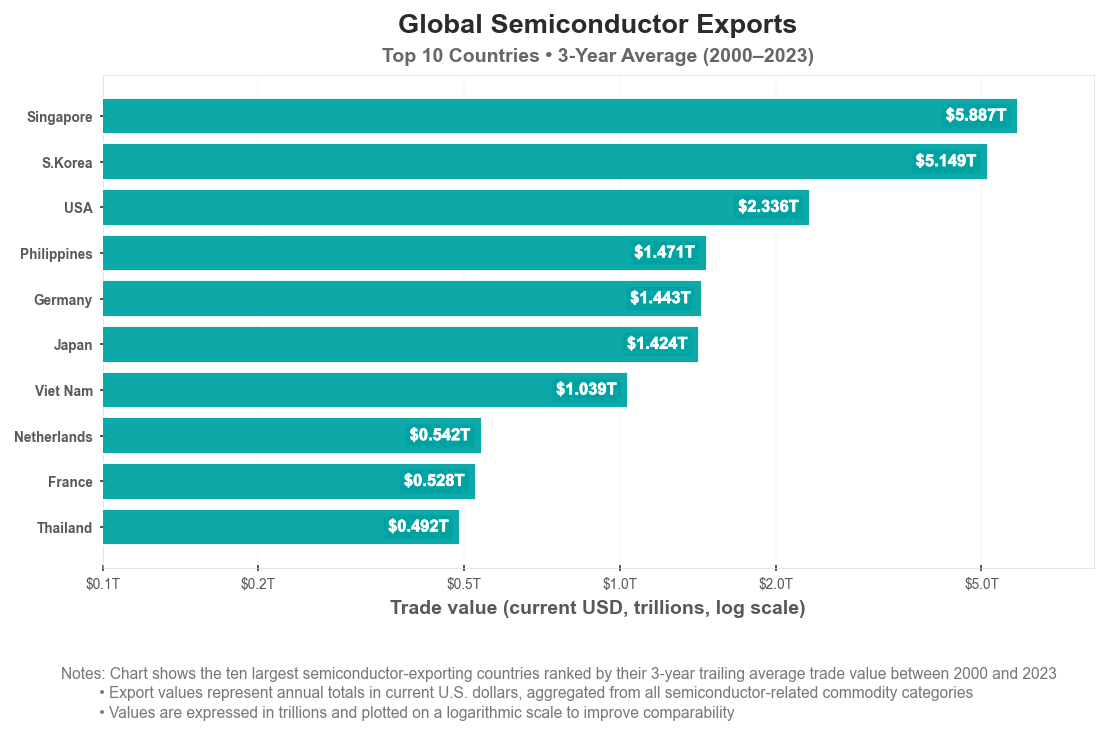

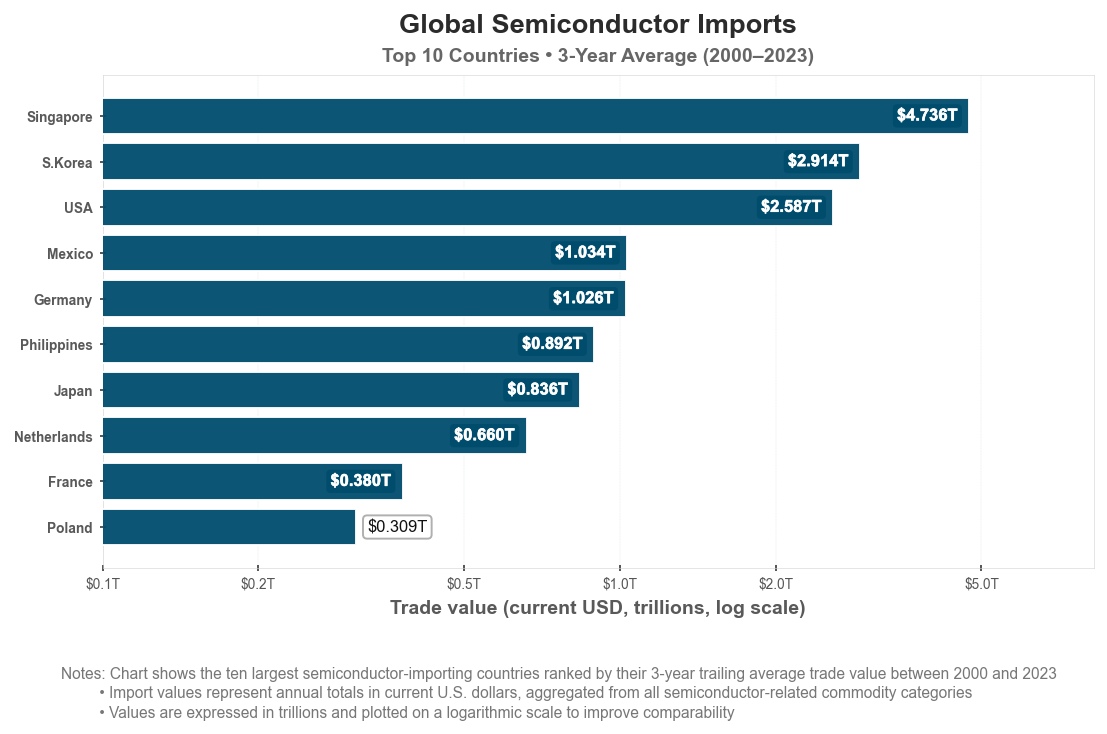

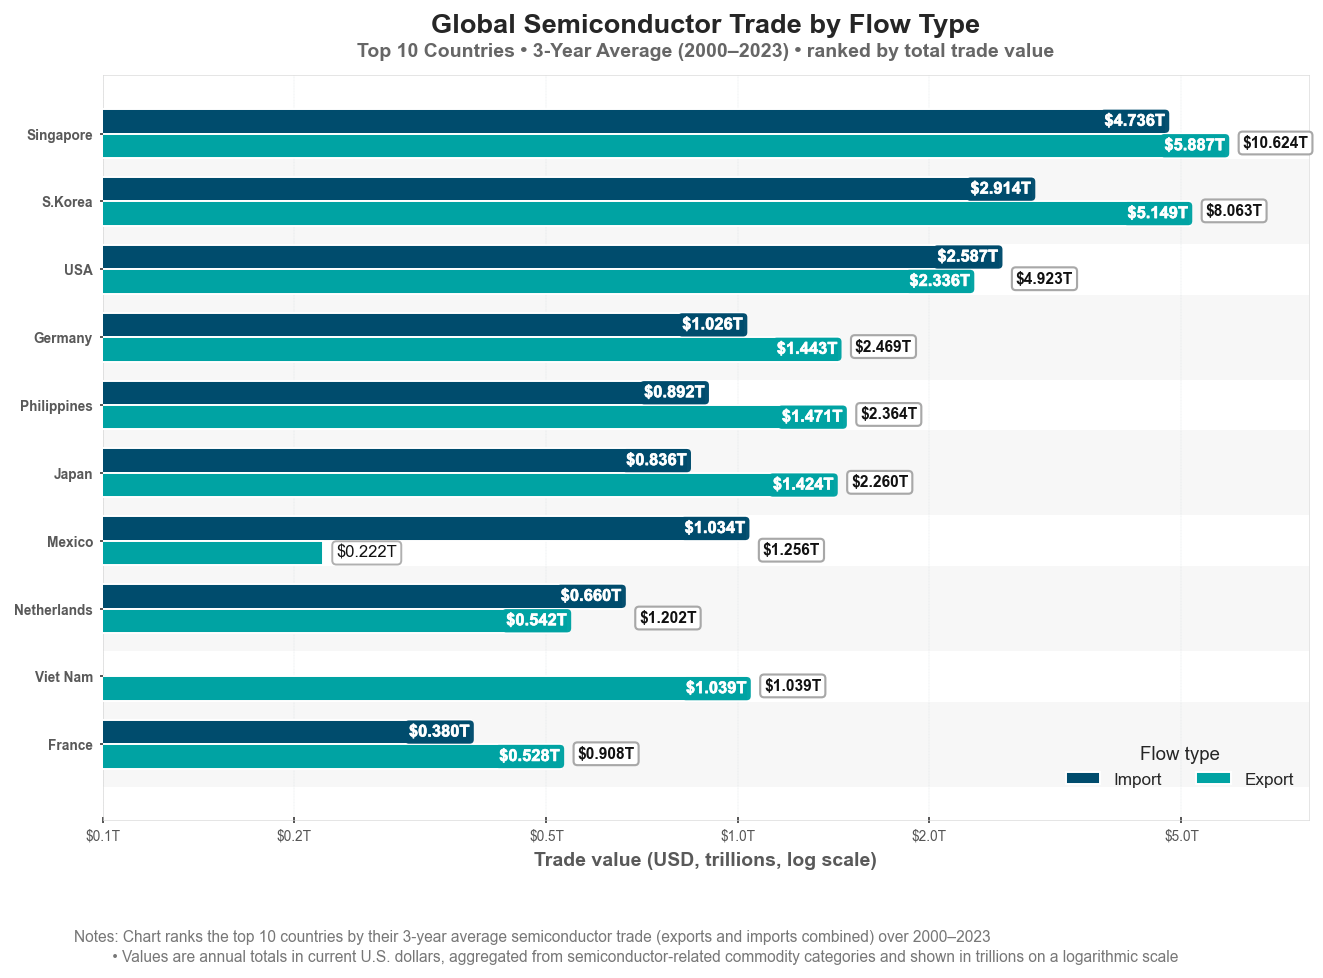

In [126]:
# ---------- Unified Top-N semiconductor trade bars (single + grouped) ----------

# Your helpers assumed to exist:
# - fmt_trillions(x, _pos=None)
# - nice_log_ticks_bil(vmin, vmax, target=6)

# ---- Config ----
FLOW_COLORS = {"Export": "#00A3A3", "Import": "#004C6D"}   # cyan #00C0C0"/ navy 
RANK_TRAILING_YEARS_DEFAULT = 3
TOP_N_DEFAULT = 10

def fmt_trillions_2dec(x, _pos=None):    
    return f"${x:.3f}T"


# ---------- ETL shared ----------
def _prep_agg(df_ml: pd.DataFrame, flows=("Export", "Import"), country_rename: dict | None = None):
    need = ["Year","Country","Commodity_Type","Trade_Flow_Type","Trade_Value_usd"]
    df = df_ml[need].dropna(subset=["Year","Country"]).copy()
    df["Year"] = df["Year"].astype(int)
    if country_rename:
        df["Country"] = df["Country"].replace(country_rename)
    df = df[df["Trade_Flow_Type"].isin(flows)]

    agg = (df.groupby(["Country","Year","Trade_Flow_Type"], as_index=False)["Trade_Value_usd"]
            .sum()
            .rename(columns={"Trade_Value_usd":"USD"}))
    agg["T"] = agg["USD"] / 1e12  # trillions
    last_year = int(agg["Year"].max())
    return agg, last_year


def _shared_xlim(values_t: np.ndarray, headroom=1.4, floor=1e-2):
    v = values_t[values_t > 0]
    if v.size == 0:
        return (floor, 1.0)
    return (max(floor, float(v.min()) * 0.85), float(v.max()) * headroom)


# ---------- Label helpers ----------
def _inside_pill(ax, x, y, text, fc, pad=2.0, fs=8.5):
    """White text on a rounded pill in the given color (for inside-bar KPI)."""
    ax.text(
        x, y, text,
        va="center", ha="right",
        color="white", fontsize=fs, zorder=5, weight = "bold",
        path_effects=[
            pe.Stroke(linewidth=0.3, foreground='white', alpha=1),
            pe.Normal()
        ],
        bbox=dict(boxstyle="round,pad=0.25", fc=fc, ec="none", alpha=0.98)
    )

def _outside_box(ax, x, y, text, fs=8.5):
    """Black text in a white rounded box (for short bars / totals)."""
    ax.text(
        x, y, text,
        va="center", ha="left",
        color="#111", fontsize=fs, zorder=6,
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="#B0B0B0", lw=1.0)
    )


# ---------- Main entry ----------
def plot_trade_bars(
    df_ml: pd.DataFrame,
    mode: str = "single",                   # "single" or "grouped"
    flows: tuple[str, ...] = ("Export","Import"),
    top_n: int = TOP_N_DEFAULT,
    trailing_years: int = RANK_TRAILING_YEARS_DEFAULT,
    window_stat: str = "mean",             # only used in grouped: "mean" or "sum"
    country_rename: dict | None = None,
):
    """
    mode="single": two separate charts (Export, Import) with shared x-limits.
        - KPI labels inside the bars (flip outside if bar too short).
    mode="grouped": one chart with Import & Export per row.
        - Alternating row bands.
        - KPI inside if long; outside if short.
        - Total value on the right in a bold white rounded box.
    Returns:
        single -> dict {flow: (fig, ax)}
        grouped -> (fig, ax)
    """
    # Prep
    agg, last_year = _prep_agg(df_ml, flows=flows, country_rename=country_rename)
    win = list(range(last_year - trailing_years + 1, last_year + 1))

    # -------------------- SINGLE MODE --------------------
    if mode == "single":
        per_flow = {}
        xvals_for_share = []

        for flow in flows:
            w = agg[(agg["Trade_Flow_Type"] == flow) & (agg["Year"].isin(win))]
            top_tbl = (w.groupby("Country", as_index=False)["T"].mean()
                        .sort_values("T", ascending=False)
                        .head(top_n)
                        .reset_index(drop=True))
            per_flow[flow] = top_tbl
            if not top_tbl.empty:
                xvals_for_share.append(top_tbl["T"].to_numpy())

        xlim = _shared_xlim(np.concatenate(xvals_for_share)) if xvals_for_share else (1e-2, 1.0)

        figs = {}
        for flow in flows:
            top_tbl = per_flow[flow]
            vals = top_tbl["T"].to_numpy()
            countries = top_tbl["Country"].to_numpy()
            y = np.arange(len(top_tbl))
            color = FLOW_COLORS.get(flow, "#888")

            fig, ax = plt.subplots(figsize=(8.0, 4.6))

            # bars
            ax.barh(y, vals, color=color, alpha=0.95, zorder=3)

            # y-axis
            ax.set_yticks(y)
            ax.set_yticklabels(countries, color = AXIS_TEXT_CLR, weight = "semibold")
            ax.invert_yaxis()

            # x-axis (log + ticks)
            # --- X-axis (log scale + extended tick coverage) ---
            ax.set_xscale("log")
            left  = 0.1                                # force coverage of 0.1 & 0.2
            right = max(xlim[1], top_tbl["T"].max()*1.35)
            ax.set_xlim(left, right)
            #ax.set_xlim(*xlim)

            # ✅ Formatter for currency in trillions
            ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_trillions_1_dec))
            # ✅ Major ticks every 1–2–5 per decade (covers 0.1, 0.2, 0.5, 1, 2, 5, 10…)
            ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0, 2.0, 5.0)))
            ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=[]))  # no minor ticks
            ax.set_axisbelow(True)            
                                                                                                
            # KPI labels: inside by default; flip outside if too short
            # Heuristic on log scale: consider "short" if < ~28% of the row max (or < ~1.15*left)
            row_max = vals.max() if vals.size else 0
            short_cut = max(row_max * 0.07, xlim[0] * 1.15)

            for yi, v in zip(y, vals):
                if v <= short_cut:
                    # outside (white box) just to the right of the bar end
                    _outside_box(ax, v * 1.05, yi, fmt_trillions_2dec(v))
                else:
                    # inside pill, aligned near end of the bar
                    _inside_pill(ax, v * 0.95, yi, fmt_trillions_2dec(v), fc=color)

            # titles
            ax.set_title(
                f"Global Semiconductor {flow}s", color = TITLE_CLR,
                fontsize=14, pad=22
            )
            ax.text(
                0.5, 1.02, f"Top {top_n} Countries • {trailing_years}-Year Average (2000–{last_year})",
                transform=ax.transAxes, fontsize=10, color=SUBTITLE_CLR, weight = "semibold", ha="center", va="bottom"
            )
            ax.set_xlabel("Trade value (current USD, trillions, log scale)", color = AXIS_TEXT_CLR, weight = "semibold")

            # inside the SINGLE-MODE loop, right before fig.tight_layout()

            footnote_role = "exporting" if flow == "Export" else "importing"
            footnote_text = (
                f"Notes: Chart shows the ten largest semiconductor-{footnote_role} countries ranked by their "
                f"{trailing_years}-year trailing average trade value between 2000 and {last_year}\n"
                f"         • {flow} values represent annual totals in current U.S. dollars, aggregated from all "
                "semiconductor-related commodity categories\n"
                "         • Values are expressed in trillions and plotted on a logarithmic scale to improve comparability"
                )

            fig.text(
                0.06, -0.045,
                footnote_text,
                ha="left", va="top",
                fontsize=8,
                color=FOOTNOTE_CLR,
                linespacing=1.35,
                wrap=True)
                                                                    
            fig.tight_layout()
            figs[flow] = (fig, ax)

        return figs

    # -------------------- GROUPED MODE --------------------
    elif mode == "grouped":
        # build ranking by window stat across both flows
        w = agg[agg["Year"].isin(win)].copy()
        if window_stat == "sum":
            rank_tbl = w.groupby("Country", as_index=False)["T"].sum()
            subtitle = f"{trailing_years}-yr total thru {last_year} • current USD • ranked by total sum"
        else:
            rank_tbl = w.groupby("Country", as_index=False)["T"].mean()
            subtitle = f"{trailing_years}-yr avg at {last_year} • current USD • ranked by total mean"

        top_countries = (rank_tbl.sort_values("T", ascending=False)
                                .head(top_n)["Country"].tolist())
        dat = w[w["Country"].isin(top_countries)].copy()

        plot_tbl = (dat.groupby(["Country","Trade_Flow_Type"], as_index=False)["T"]
                        .agg(window_stat))

        # order rows by total, desc
        order = (plot_tbl.groupby("Country", as_index=False)["T"].sum()
                        .sort_values("T", ascending=False)["Country"].tolist())
        plot_tbl["Country"] = pd.Categorical(plot_tbl["Country"], categories=order, ordered=True)
        plot_tbl = plot_tbl.sort_values(["Country","Trade_Flow_Type"])

        # wide for side-by-side bars
        wide = (plot_tbl.pivot(index="Country", columns="Trade_Flow_Type", values="T")
                        .fillna(0.0))
        wide = wide[[f for f in flows if f in wide.columns]]  # keep requested order

        # figure
        fig, ax = plt.subplots(figsize=(9.6, 6.4))
        fig.subplots_adjust(top=0.85)

        countries = list(wide.index)
        y = np.arange(len(countries))
        nF = len(wide.columns)
        bar_h = 0.36
        offsets = np.linspace(-bar_h*(nF-1)/2, bar_h*(nF-1)/2, nF)

        # row bands (alternating)
        band_span = bar_h * 1.7
        for i, yi in enumerate(y):
            if i % 2 == 1:
                ax.axhspan(yi - band_span, yi + band_span, color="#F7F7F7", zorder=0)

        # bars
        bars_by_flow = {}
        for i, f in enumerate(wide.columns):
            widths = wide[f].to_numpy()
            bars = ax.barh(y + offsets[i], widths, height=bar_h,
                            label=f, color=FLOW_COLORS.get(f, "#888"), zorder=3)
            bars_by_flow[f] = bars

        # y labels & order
        ax.set_yticks(y)
        ax.set_yticklabels(countries, color = AXIS_TEXT_CLR, weight = "semibold")
        ax.invert_yaxis()

        # x axis limits & ticks
        all_vals = wide.values.flatten()
        all_vals = all_vals[all_vals > 0]
        left, right = _shared_xlim(all_vals, headroom=1.35, floor=1e-2)

        ax.set_xscale("log")
        # --- X axis (log + 1–2–5 ticks) ---
        ax.set_xscale("log")
        
        vals = wide.values.ravel()
        vals = vals[vals > 0]
        if vals.size:
            left  = 0.1                     # keep the 0.1–0.2 decade visible
            right = float(vals.max()) * 1.35
        else:
            left, right = 0.1, 1.0          # fallback
        
        ax.set_xlim(left, right)
        
        # 1–2–5 majors each decade; no minors
        ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0, 2.0, 5.0)))
        ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=()))
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_trillions_1_dec))
        ax.set_axisbelow(True)

        # KPI labels on each bar (inside if long, outside if short)
        row_max = wide.max(axis=1).to_numpy()
        for idx, rmax in enumerate(row_max):
            short_cut = max(rmax * 0.28, left * 1.15)  # auto-flips small bars (e.g., Mexico/Poland)
            for f in wide.columns:
                rect = bars_by_flow[f][idx]
                v = rect.get_width()
                if v <= 0:
                    continue
                if v <= short_cut:
                    _outside_box(ax, v * 1.05, rect.get_y() + rect.get_height()/2, fmt_trillions_2dec(v))
                else:
                    _inside_pill(ax, v * 0.995, rect.get_y() + rect.get_height()/2,
                                fmt_trillions_2dec(v), fc=FLOW_COLORS.get(f, "#888"))

        # Totals (always) as bold white rounded boxes slightly below the row center
        totals = wide.sum(axis=1).to_numpy()
        for yi, tot, rmax in zip(y, totals, row_max):
            x_text = max(rmax * 1.06, left * 1.25)
            ax.text(
                x_text, yi + 0.14, fmt_trillions_2dec(tot),
                va="center", ha="left", fontsize=8, color="#111", weight="bold", zorder=6,
                bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="#A8A8A8", lw=1.1)
            )

        # titles / legend
        ax.set_title(f"Global Semiconductor Trade by Flow Type",
                    loc="center", fontsize=14, pad=22)
        ax.text(
                0.5, 1.02, f"Top {top_n} Countries • {trailing_years}-Year Average (2000–{last_year}) • ranked by total trade value",
                transform=ax.transAxes, fontsize=10, color=SUBTITLE_CLR, weight = "semibold", ha="center", va="bottom"
                )
        ax.set_xlabel("Trade value (USD, trillions, log scale)", color = AXIS_TEXT_CLR, weight = "semibold")
        ax.legend(title="Flow type", ncol=len(wide.columns), frameon=False,
                loc="upper right", bbox_to_anchor=(1, 0.12))
        
        group_footnote = (
                        f"Notes: Chart ranks the top {top_n} countries by their {trailing_years}-year average "
                        f"semiconductor trade (exports and imports combined) over 2000–{last_year}\n"
                        "         • Values are annual totals in current U.S. dollars, aggregated from semiconductor-related commodity "
                        "categories and shown in trillions on a logarithmic scale"
                        )
        fig.text(0.06, -0.045, group_footnote,
            ha="left", va="top", fontsize=8, color=FOOTNOTE_CLR, linespacing=1.35, wrap=True)


        plt.tight_layout()
        return fig, ax

    else:
        raise ValueError("mode must be 'single' or 'grouped'.")


# ----------------- How to call -----------------
# 1) Separate charts (shared x-axis), KPI pills inside (flip outside if too short)
figs = plot_trade_bars(df_ml, mode="single",
                    flows=("Export","Import"),
                        top_n=10, trailing_years=3,
                        country_rename={"Korea, Rep.": "S.Korea",
                                        "United States of America": "USA"})

# 2) Grouped chart with row bands and total KPI boxes
fig, ax = plot_trade_bars(df_ml, mode="grouped",
                        flows=("Import","Export"),
                        top_n=10, trailing_years=3, window_stat="mean",
                        country_rename={"Korea, Rep.": "S.Korea",
                "United States of America": "USA"})                     

* **For the visualizations, occupation groups will be used to provide a clearer, more structured comparison across segments of the workforce**

In [32]:
# Group occupations

Occupation_Group_Order = [
    "Managers",
    "Professionals",
    "Technicians",
    "Clerical",
    "Service & Sales",
    "Skilled Agri & Fishery",
    "Craft & Trades",
    "Plant & Machine",
    "Elementary",
    "Armed Forces",
    # non-ISCO extras
    "Skill Level 1 (low)",
    "Skill Level 2 (medium)",
    "Skill Levels 3–4 (high)",
    "Total",
    "Unspecified",
]

def _family_of(s: str) -> str:
    """
    Map raw 'Occupation' labels (mixed ISCO-08/88/68 and Skill-level totals)
    to consistent occupation families.
    """
    s = (s or "").strip().lower()

    if not s:
        return "Unspecified"

    # --- quick exits for 'total' and 'nec' ---
    if re.search(r'\btotal\b', s):
        return "Total"
    if re.search(r'\bnot elsewhere classified\b|\bnec\b|\bx\.\s*not elsewhere classified\b', s):
        return "Unspecified"

    # --- Armed Forces (ISCO 0) ---
    if re.search(r'\barmed forces\b|\bisco-(?:08|88)\):\s*0\.', s):
        return "Armed Forces"

    # --- Managers (ISCO 1) ---
    if re.search(r'\bmanagers?\b|\blegislators.*managers\b|\bisco-(?:08|88)\):\s*1\.', s):
        return "Managers"

    # --- Professionals (ISCO 2) ---
    # include ISCO-68 “Professional, technical and related workers” in Professionals bucket
    if re.search(r'\bprofessionals?\b|\bisco-(?:08|88)\):\s*2\.|\bprofessional,\s*technical\b', s):
        return "Professionals"

    # --- Technicians & Associate Professionals (ISCO 3) ---
    if re.search(r'\btechnicians?\b|associate professionals?|\bisco-(?:08|88)\):\s*3\.', s):
        return "Technicians"

    # --- Clerical (ISCO 4) ---
    if re.search(r'\bclerical support workers?\b|\bclerks?\b|\bisco-(?:08|88)\):\s*4\.|\badministrative and managerial workers\b', s):
        return "Clerical"

    # --- Service & Sales (ISCO 5) ---
    if re.search(r'\bservice.*sales\b|\bservice workers\b.*shop.*market.*sales\b|\bsales workers\b|\bisco-(?:08|88)\):\s*5\.', s):
        return "Service & Sales"

    # --- Skilled Agriculture, Forestry & Fishery (ISCO 6) ---
    if re.search(r'\bskilled agricultural.*forestry.*fishery\b|\bskilled agricultural and fishery\b|\bisco-(?:08|88)\):\s*6\.|\bagriculture, animal husbandry.*fisher', s):
        return "Skilled Agri & Fishery"

    # --- Craft & Related Trades (ISCO 7) ---
    if re.search(r'\bcraft.*related trades\b|\bisco-(?:08|88)\):\s*7\.', s):
        return "Craft & Trades"

    # --- Plant & Machine Operators & Assemblers (ISCO 8) ---
    if re.search(r'\bplant.*machine operators?.*assemblers?\b|\bisco-(?:08|88)\):\s*8\.|\bproduction and related workers, transport equipment operators and labourers\b', s):
        return "Plant & Machine"

    # --- Elementary (ISCO 9) ---
    if re.search(r'\belementary occupations?\b|\bisco-(?:08|88)\):\s*9\.', s):
        return "Elementary"

    # --- Skill-level aggregates (keep but mark as skill-based) ---
    if re.search(r'\bskill level\b', s):
        if re.search(r'level\s*1|low', s):
            return "Skill Level 1 (low)"
        if re.search(r'level\s*2|medium', s):
            return "Skill Level 2 (medium)"
        if re.search(r'levels?\s*3.*4|high', s):
            return "Skill Levels 3–4 (high)"
        return "Unspecified"

    return "Unspecified"


# Apply mapper

df_ml["Occupation_Group"] = df_ml["Occupation"].apply(_family_of)

# (optional) make it ordered for nicer plots/tables
df_ml["Occupation_Group"] = pd.Categorical(df_ml["Occupation_Group"], categories=Occupation_Group_Order, ordered=True)

# Quick sanity check
display(df_ml["Occupation_Group"].value_counts(dropna=False))


Occupation_Group
Total                      27822
Professionals              26777
Unspecified                16884
Skill Level 1 (low)        13838
Skill Level 2 (medium)     13777
Clerical                   13736
Skill Levels 3–4 (high)    13732
Service & Sales            13657
Elementary                 13580
Managers                   13543
Skilled Agri & Fishery     13399
Craft & Trades             13362
Plant & Machine            13357
Armed Forces                7227
Technicians                    0
Name: count, dtype: int64

In [33]:
# Create new column "Occupation_Group"
mask_keep = ~df_ml["Occupation_Group"].isin(["Total", "Unspecified"])
df_ml = df_ml.loc[mask_keep].copy()
df_ml.reset_index(drop=True, inplace=True)
df_ml.columns

Index(['Year', 'Country', 'Trade_Flow_Type', 'Partner_Code', 'Commodity_Type',
       'Alternative_Quantity_Value', 'Net_Weight_Estimated',
       'Gross_Weight_Estimated', 'Trade_Valuation_Source_Code',
       'Legacy_Estimation_Method', 'Officially_Reported_by_Country',
       'Trade_Value_Is_Estimated', 'Alt_Quantity_Is_Estimated',
       'Gross_Weight_Is_Estimated', 'Trade_Value_usd',
       'RD_Expenditure_GDP_Percent', 'Gender', 'Occupation',
       'Employment_Count', 'Employment_Growth', 'log_Trade_Value_usd',
       'log_Alternative_Quantity_Value', 'log_Net_Weight_Estimated',
       'log_Gross_Weight_Estimated', 'log_Employment_Growth',
       'log_RD_Expenditure_GDP_Percent', 'Occupation_Group'],
      dtype='object')

In [34]:
df_ml.info()  # confirm creating a new column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169985 entries, 0 to 169984
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Year                            169985 non-null  int64   
 1   Country                         169985 non-null  object  
 2   Trade_Flow_Type                 169985 non-null  object  
 3   Partner_Code                    169985 non-null  object  
 4   Commodity_Type                  169985 non-null  object  
 5   Alternative_Quantity_Value      160043 non-null  float64 
 6   Net_Weight_Estimated            169985 non-null  float64 
 7   Gross_Weight_Estimated          169985 non-null  float64 
 8   Trade_Valuation_Source_Code     169985 non-null  int64   
 9   Legacy_Estimation_Method        169985 non-null  bool    
 10  Officially_Reported_by_Country  169985 non-null  bool    
 11  Trade_Value_Is_Estimated        169985 non-null  bool    
 12  Al

0) One-time prep (run first)

In [35]:
# create temporarily(just for visualizations) column "Employment_Growth_pp" (percentage)

df0 = df_ml.copy()

# 2) ---------- build employment growth in PERCENTAGE POINTS ----------
# we prefer to compute it here so it's definitely sorted and in the right unit
# try to group by Country + Occupation if you have that;
# otherwise fall back to Country + Occupation_Group
if "Occupation" in df0.columns:
    growth_group_keys = ["Country", "Occupation"]
else:
    growth_group_keys = ["Country", "Occupation_Group"]

df0 = df0.sort_values(growth_group_keys + ["Year"])
df0["Employment_Growth_pp"] = (
    df0
    .groupby(growth_group_keys)["Employment_Count"]
    .pct_change()
    .mul(100)  # fraction → percentage points
    .replace([np.inf, -np.inf], np.nan)
)
df0.reset_index(drop=True, inplace=True)

In [36]:
# will be used for visuals
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169985 entries, 0 to 169984
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Year                            169985 non-null  int64   
 1   Country                         169985 non-null  object  
 2   Trade_Flow_Type                 169985 non-null  object  
 3   Partner_Code                    169985 non-null  object  
 4   Commodity_Type                  169985 non-null  object  
 5   Alternative_Quantity_Value      160043 non-null  float64 
 6   Net_Weight_Estimated            169985 non-null  float64 
 7   Gross_Weight_Estimated          169985 non-null  float64 
 8   Trade_Valuation_Source_Code     169985 non-null  int64   
 9   Legacy_Estimation_Method        169985 non-null  bool    
 10  Officially_Reported_by_Country  169985 non-null  bool    
 11  Trade_Value_Is_Estimated        169985 non-null  bool    
 12  Al

**Feature Engineering: "adoption_z" and "emp_g"**

* **Purpose:**

    Prepare a country–year–occupation panel that links semiconductor import–driven adoption shocks to employment growth (by occupation/gender), ready for event-study/DID or regression analysis using a consistent, scale-free shock metric.

* **Methodology:**

    For each country–year, we aggregate imports and convert **values to trillions** for consistency. To build a comparable **adoption shock index**, we take **log(1 + imports)**, compute the **year-over-year change within each country**, and standardize it to a **z-score** (adoption_z). We then **merge this adoption metric** back to the micro panel (**occupation/gender rows**) and rename the outcome to **emp_g** (employment growth, **percentage points**). Finally, we keep only observations with both emp_g and adoption_z, yielding a tidy panel ready for event-study/DiD or regression linking import-driven adoption to employment growth. Configuration flags (min_obs_per_occ, shock_top_quantile) define later filtering and what counts as a “large” shock.

In [37]:
# Create "adoption_z" and "emp_g"
# ------------------- CONFIG -------------------
# country_rename 

# semi_keywords = ["semiconductor", "integrated circuit", "ic"]  # case-insensitive
min_obs_per_occ    = 25      # (you can still use this later for filters)
shock_top_quantile = 0.90    # adoption "shock" threshold for the event study
# ------------------------------------------------
# ---------- keep only columns we’ll use ----------
cols = ["Year", "Country", "Trade_Flow_Type", "Commodity_Type", "Trade_Value_usd", "RD_Expenditure_GDP_Percent",
        "Occupation_Group", "Gender", "Employment_Growth_pp"]
df = df0[cols].dropna(subset=["Year", "Country", "Occupation_Group", "Employment_Growth_pp"])
df["Year"] = df["Year"].astype(int)

# apply renames only if the dict exists in the namespace
if "country_rename" in globals():
    df["Country"] = df["Country"].replace(country_rename)

# 4) ---------- (optional) focus on semiconductors ----------
# if you want to narrow to semiconductor-ish commodity types, uncomment:
# pat = "|".join([f"(?i){k}" for k in semi_keywords])
# df = df[df["Commodity_Type"].str.contains(pat, na=False)]

# 5) ---------- ADOPTION MEASURE ----------
# Country–Year semiconductor IMPORTS = adoption proxy
imp = (
    df[df["Trade_Flow_Type"] == "Import"]
    .groupby(["Country", "Year"], as_index=False)["Trade_Value_usd"]
    .sum()
    .rename(columns={"Trade_Value_usd": "Imports_USD"})
)

# use **trillions** to stay consistent with all the other charts
imp["Imports_T"] = imp["Imports_USD"] / 1e12
imp = imp.sort_values(["Country", "Year"])

# log(1 + imports) so we can diff
imp["log_imp"] = np.log1p(imp["Imports_T"])

# YoY change in log imports, by country
imp["dlog_imp"] = imp.groupby("Country")["log_imp"].diff()

# within-country z-score of that YoY change
def _zseries(s: pd.Series) -> pd.Series:
    if len(s) <= 2 or s.std(ddof=1) == 0:
        return pd.Series(np.nan, index=s.index)
    return (s - s.mean()) / s.std(ddof=1)

imp["adoption_z"] = imp.groupby("Country")["dlog_imp"].transform(_zseries)

# 6) ---------- merge adoption back to the main (occupation) rows ----------
data = (
    df.merge(
        imp[["Country", "Year", "Imports_T", "adoption_z"]],
        on=["Country", "Year"],
        how="left",
    )
    .rename(columns={"Employment_Growth_pp": "emp_g"})
)

# 7) ---------- tidy ----------
# we need both the outcome (emp_g) and the adoption index
data = data.dropna(subset=["emp_g", "adoption_z"])

In [136]:
# 1️⃣ See which countries actually exist in "data"
sorted(data["Country"].unique())

['Albania',
 'Algeria',
 'Angola',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Barbados',
 'Belgium',
 'Belize',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Canada',
 'Chile',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kiribati',
 'Kyrgyz Republic',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Malta',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Netherlands',
 'New Zealand',
 'North Macedonia',
 'Norway',
 'Pakistan',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Rwanda',
 'S.Korea',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Afr

* The color palette (#4daf4a – **green**, #e41a1c – **red**) was chosen for its clarity and contrast, and will be used consistently to represent **growth** and **decline**, respectively.

**Visualization: Employment Growth by Occupation** (Descriptive)

* *Research Question:*

    **Do occupations tend to expand or contract during periods of high semiconductor adoption?**

* *Rationale*:

    This visualization clearly highlights shifts between contraction and expansion, providing a direct and interpretable view of how technological adoption impacts occupational growth.

* **Methodology:**

    We start from a tidy panel with Occupation_Group, employment growth (emp_g, pp), and the adoption index (adoption_z). Years are split into **low-adoption** (**bottom 25%** of adoption_z) and **high-adoption** (**top 25%**). For each occupation we compute the **average employment growth** in the two bins and the difference **Δ = High − Low**, keeping only occupations with enough data (**N ≥ 25 overall and ≥ 10 observations in each bin**). We then select the **top K positive** and **top K negative Δ** occupations for display. Finally, a dumbbell is drawn per occupation (low vs high dots, **connector colored by sign**), with positives arranged above, negatives below, and a zero line for reference.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\194926391.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lo = (low.groupby("Occupation_Group", as_index=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\194926391.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hi = (high.groupby("Occupation_Group", as_index=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\194926391.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

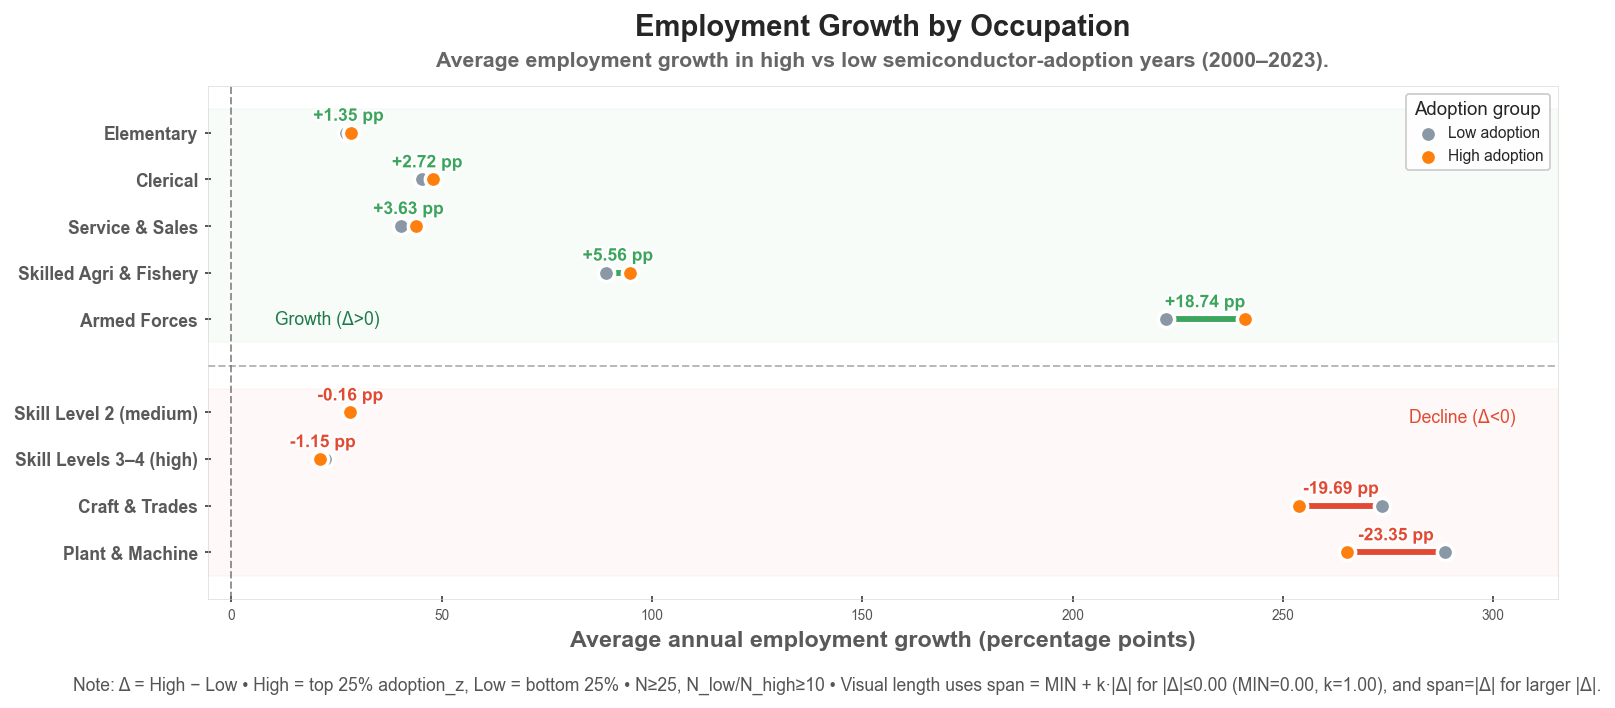

In [ ]:
# ============= Dumbbell Chart =============
# Expects a tidy DataFrame `data` with columns: Occupation_Group, emp_g, adoption_z

# ----------------------- Settings -----------------------
q_low, q_high      = 0.25, 0.75        # adoption cutoffs (bottom/top quartile)
min_obs_total      = 25                # min total obs per occupation
min_obs_each_side  = 10                # min obs in BOTH low & high bins
K_pos, K_neg       = 5, 5              # show top K positive Δ and top K negative Δ
wrap_width         = 42                # wrap long occupation names

# Proportional local zoom (piecewise linear)
MIN_SPAN_PP        = 0              # visible length when Δ≈0 (increase to separate more)
PIVOT_PP           = 0.001            # at this Δ, visual length equals true length (span = |Δ|)

# Visual style
COL_LOW, COL_HIGH  = "#8a97a5", "#ff7f0e"  
COL_POS, COL_NEG   = "#3BA55C", "#E24A33"
COL_BAND           = "#000000"
LINE_LW, HALO_ADD  = 3, 2.2
DOT_SIZE, EDGE_LW  = 70, 1.8
TXT_STROKE         = [pe.withStroke(linewidth=2.2, foreground="white")]

# ------------------- Aggregate: Low vs High -------------------
need_cols = ["Occupation_Group", "emp_g", "adoption_z"]
d = data[need_cols].dropna().copy()

low  = d[d["adoption_z"] <= d["adoption_z"].quantile(q_low)]
high = d[d["adoption_z"] >= d["adoption_z"].quantile(q_high)]

lo = (low.groupby("Occupation_Group", as_index=False)
        .agg(Low=("emp_g","mean"), N_low=("emp_g","size")))
hi = (high.groupby("Occupation_Group", as_index=False)
        .agg(High=("emp_g","mean"), N_high=("emp_g","size")))
cnt = d.groupby("Occupation_Group", as_index=False).size().rename(columns={"size":"N"})

cmp = (lo.merge(hi, on="Occupation_Group", how="inner")
        .merge(cnt, on="Occupation_Group", how="left"))

cmp = cmp[(cmp["N"]>=min_obs_total) & (cmp["N_low"]>=min_obs_each_side) & (cmp["N_high"]>=min_obs_each_side)]
cmp["Delta"] = cmp["High"] - cmp["Low"]

# pick Top K positive and Top K negative
pos = cmp[cmp["Delta"] > 0].sort_values("Delta", ascending=False).head(K_pos).copy()
neg = cmp[cmp["Delta"] < 0].sort_values("Delta", ascending=True ).head(K_neg).copy()
if pos.empty and neg.empty:
        raise ValueError("No occupations pass the filters. Relax thresholds or check the data.")

# ----------------------- Layout: positives above / negatives below -----------------------
n_pos, n_neg = len(pos), len(neg)
y_neg = list(range(n_neg))                          # 0..n_neg-1
y_pos = list(range(n_neg + 1, n_neg + 1 + n_pos))  # +1 gap row
neg["y"] = y_neg
pos["y"] = y_pos
plotdf = pd.concat([pos, neg], ignore_index=True)

def wrap(s): return "\n".join(textwrap.wrap(str(s), width=wrap_width))
ylabels = {r.y: wrap(r.Occupation_Group) for r in plotdf.itertuples()}

# ----------------------- Proportional local zoom mapping -----------------------
# Guard: ensure PIVOT > MIN_SPAN
if PIVOT_PP <= MIN_SPAN_PP:
        PIVOT_PP = float(MIN_SPAN_PP) + 1e-6

absd = plotdf["Delta"].abs().astype(float)
k = 1.0 - MIN_SPAN_PP / PIVOT_PP                       # slope for the small-delta region (0<k<1)

span = np.where(
        absd <= PIVOT_PP,
    MIN_SPAN_PP + k * absd,                            # linear in |Δ| → preserves proportions
        absd                                               # large deltas unchanged
)

mid  = (plotdf["High"] + plotdf["Low"]) / 2.0
plotdf["xLow"]  = np.where(plotdf["Delta"] >= 0, mid - span/2, mid + span/2)
plotdf["xHigh"] = np.where(plotdf["Delta"] >= 0, mid + span/2, mid - span/2)

# ------------------------- Plot -------------------------
fig, ax = plt.subplots(figsize=(12, 5.2))  


# section backgrounds + divider
if n_neg:
        ax.text(
        0.89, n_pos -4.3 + (n_neg/2),           # x in axes fraction via transform below
        "Decline (Δ<0)",
        transform=ax.get_yaxis_transform(), ha="left", va="bottom",
        fontsize=9, color=COL_NEG)
        ax.axhspan(-0.5, n_neg-0.5, color=COL_NEG, alpha=0.03, zorder=0)
if n_pos:
        ax.text(
        0.05, n_neg -1.7 + (n_pos/2),           # x in axes fraction via transform below
        "Growth (Δ>0)",
        transform=ax.get_yaxis_transform(), ha="left", va="bottom",
        fontsize=9, color="#1f7a4a")
        ax.axhspan(n_neg+0.5, n_neg+0.5+n_pos, color=COL_POS, alpha=0.03, zorder=0)

ax.axhline(n_neg+0.0, color="#888", lw=1, ls="--", alpha=0.6)
ax.grid(axis="x", alpha=0.25)
ax.set_axisbelow(True)

# connectors with white halo (always visible)
for _, r in plotdf.iterrows():
        col = COL_POS if r["Delta"] >= 0 else COL_NEG
        ax.plot([r["xLow"], r["xHigh"]], [r["y"], r["y"]],
                color=col, lw=LINE_LW, zorder=1, solid_capstyle="round",
                path_effects=[pe.Stroke(linewidth=LINE_LW + HALO_ADD, foreground="white"),
                        pe.Normal()])

# dots with white edges
ax.scatter(plotdf["xLow"],  plotdf["y"], color=COL_LOW,  s=DOT_SIZE,
        zorder=2, edgecolor="white", linewidth=EDGE_LW, label="Low adoption")
ax.scatter(plotdf["xHigh"], plotdf["y"], color=COL_HIGH, s=DOT_SIZE,
        zorder=2, edgecolor="white", linewidth=EDGE_LW, label="High adoption")

# Δ labels (real Δ values, placed at the stretched midpoint)
for _, r in plotdf.iterrows():
        midx = (r["xLow"] + r["xHigh"]) / 2
        col  = COL_POS if r["Delta"] >= 0 else COL_NEG
        ax.text(midx, r["y"] + 0.17, f"{r['Delta']:+.2f} pp",    # f"{r['Delta']:+.2f} pp" for 2 decimals
                ha="center", va="bottom", fontsize=9, color=col, fontweight="bold",
                path_effects=TXT_STROKE)

# y-axis labels
ax.set_yticks(sorted(ylabels))
ax.set_yticklabels([ylabels[i] for i in sorted(ylabels)], fontsize = 9, color = AXIS_TEXT_CLR, weight = "semibold")
ax.tick_params(axis="y")

# x-limits from stretched coords
xmin = float(min(plotdf["xLow"].min(),  plotdf["xHigh"].min()))
xmax = float(max(plotdf["xLow"].max(),  plotdf["xHigh"].max()))
ax.set_xlim(xmin - (xmax-xmin)*0.10, xmax + (xmax-xmin)*0.10)

# titles / legend / footnote
ax.set_xlabel("Average annual employment growth (percentage points)", color = AXIS_TEXT_CLR, fontsize = 12, weight = "semibold")
ax.set_title("Employment Growth by Occupation",
                loc="center", fontsize=15, fontweight="bold", pad = 26)
ax.text(
        0.5, 1.03, "Average employment growth in high vs low semiconductor-adoption years (2000–2023).",
        transform=ax.transAxes, fontsize=11, color=SUBTITLE_CLR, weight = "semibold", ha="center", va="bottom"
        )

ax.legend(title="Adoption group", frameon=True, handletextpad=0.3, fontsize=8, loc = 'upper right')
ax.axvline(0, color="#666", lw=1, ls="--", alpha=0.7)

ax.text(-0.1, -0.15,
        (f"Note: Δ = High − Low • High = top 25% adoption_z, Low = bottom 25% • N≥{min_obs_total}, "
        f"N_low/N_high≥{min_obs_each_side} • Visual length uses span = "
        f"MIN + k·|Δ| for |Δ|≤{PIVOT_PP:.2f} (MIN={MIN_SPAN_PP:.2f}, k={k:.2f}), "
        f"and span=|Δ| for larger |Δ|."),
        transform=ax.transAxes, ha="left", va="top", fontsize=9, color="#555")
ax.grid(alpha = 0)
plt.tight_layout()
# =========================================================================================


* **The visualization below presents the same chart above, with proportional local zoom to enhance visual clarity.**

* **Methodology:**

    This visualization **refines the earlier figure by improving scaling** and readability of employment-growth differences across occupations. While the first version effectively showed relative patterns between high and low semiconductor-adoption groups, smaller Δ (High–Low) values were visually understated. To make **small differences readable**, positions are mapped with a **proportional local zoom**: the connector length is MIN + k·|Δ| for small |Δ| and equals |Δ| for large |Δ|; the **numeric labels always show true Δ (pp)**. 

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\598824794.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lo = (low.groupby("Occupation_Group", as_index=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\598824794.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hi = (high.groupby("Occupation_Group", as_index=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\598824794.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

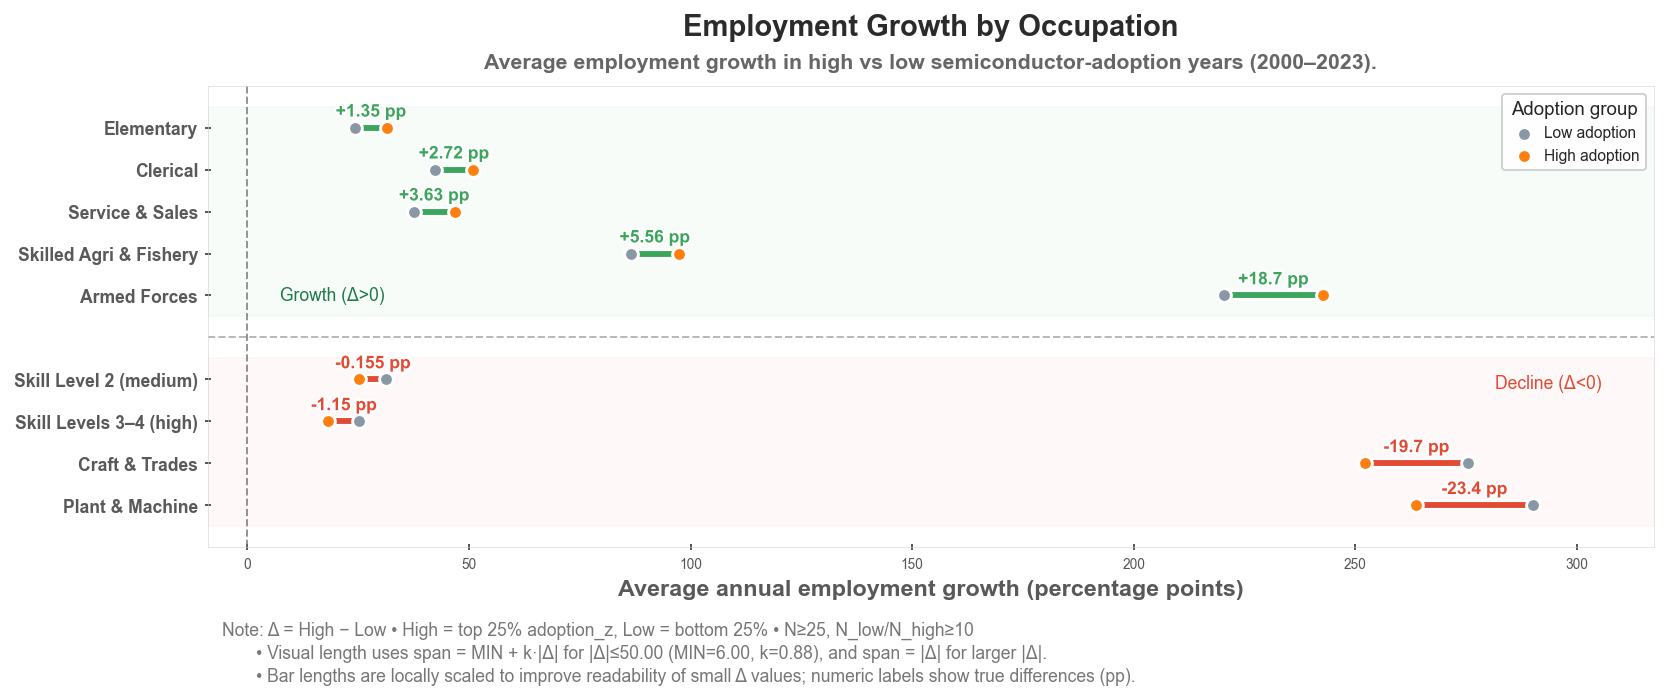

In [138]:
# ============= Dumbbell Chart with Proportional Local Zoom (piecewise linear) =============
# Expects a tidy DataFrame `data` with columns: Occupation_Group, emp_g, adoption_z

# ----------------------- Settings -----------------------
q_low, q_high      = 0.25, 0.75        # adoption cutoffs (bottom/top quartile)
min_obs_total      = 25                # min total obs per occupation
min_obs_each_side  = 10                # min obs in BOTH low & high bins
K_pos, K_neg       = 5, 5              # show top K positive Δ and top K negative Δ
wrap_width         = 42                # wrap long occupation names

# Proportional local zoom (piecewise linear)
MIN_SPAN_PP        = 6             # visible length when Δ≈0 (increase to separate more)
PIVOT_PP           = 50              # at this Δ, visual length equals true length (span = |Δ|)

# Visual style
COL_LOW, COL_HIGH  = "#8a97a5", "#ff7f0e"  
COL_POS, COL_NEG   = "#3BA55C", "#E24A33"
COL_BAND           = "#000000"
LINE_LW, HALO_ADD  = 3, 2.2
DOT_SIZE, EDGE_LW  = 50, 1.5
TXT_STROKE         = [pe.withStroke(linewidth=2.2, foreground="white")]

# ------------------- Aggregate: Low vs High -------------------
need_cols = ["Occupation_Group", "emp_g", "adoption_z"]
d = data[need_cols].dropna().copy()

low  = d[d["adoption_z"] <= d["adoption_z"].quantile(q_low)]
high = d[d["adoption_z"] >= d["adoption_z"].quantile(q_high)]

lo = (low.groupby("Occupation_Group", as_index=False)
        .agg(Low=("emp_g","mean"), N_low=("emp_g","size")))
hi = (high.groupby("Occupation_Group", as_index=False)
        .agg(High=("emp_g","mean"), N_high=("emp_g","size")))
cnt = d.groupby("Occupation_Group", as_index=False).size().rename(columns={"size":"N"})

cmp = (lo.merge(hi, on="Occupation_Group", how="inner")
        .merge(cnt, on="Occupation_Group", how="left"))

cmp = cmp[(cmp["N"]>=min_obs_total) & (cmp["N_low"]>=min_obs_each_side) & (cmp["N_high"]>=min_obs_each_side)]
cmp["Delta"] = cmp["High"] - cmp["Low"]

# pick Top K positive and Top K negative
pos = cmp[cmp["Delta"] > 0].sort_values("Delta", ascending=False).head(K_pos).copy()
neg = cmp[cmp["Delta"] < 0].sort_values("Delta", ascending=True ).head(K_neg).copy()
if pos.empty and neg.empty:
        raise ValueError("No occupations pass the filters. Relax thresholds or check the data.")

# ----------------------- Layout: positives above / negatives below -----------------------
n_pos, n_neg = len(pos), len(neg)
y_neg = list(range(n_neg))                          # 0..n_neg-1
y_pos = list(range(n_neg + 1, n_neg + 1 + n_pos))  # +1 gap row
neg["y"] = y_neg
pos["y"] = y_pos
plotdf = pd.concat([pos, neg], ignore_index=True)

def wrap(s): return "\n".join(textwrap.wrap(str(s), width=wrap_width))
ylabels = {r.y: wrap(r.Occupation_Group) for r in plotdf.itertuples()}

# ----------------------- Proportional local zoom mapping -----------------------
# Guard: ensure PIVOT > MIN_SPAN
if PIVOT_PP <= MIN_SPAN_PP:
        PIVOT_PP = float(MIN_SPAN_PP) + 1e-6

absd = plotdf["Delta"].abs().astype(float)
k = 1.0 - MIN_SPAN_PP / PIVOT_PP                       # slope for the small-delta region (0<k<1)

span = np.where(
        absd <= PIVOT_PP,
    MIN_SPAN_PP + k * absd,                            # linear in |Δ| → preserves proportions
        absd                                               # large deltas unchanged
)

mid  = (plotdf["High"] + plotdf["Low"]) / 2.0
plotdf["xLow"]  = np.where(plotdf["Delta"] >= 0, mid - span/2, mid + span/2)
plotdf["xHigh"] = np.where(plotdf["Delta"] >= 0, mid + span/2, mid - span/2)

# ------------------------- Plot -------------------------
fig, ax = plt.subplots(figsize=(12, 5.2))  


# section backgrounds + divider
if n_neg:
        ax.text(
        0.89,  n_pos -4.3 + (n_neg/2),           # x in axes fraction via transform below
        "Decline (Δ<0)",
        transform=ax.get_yaxis_transform(), ha="left", va="bottom",
        fontsize=9, color=COL_NEG)
        ax.axhspan(-0.5, n_neg-0.5, color=COL_NEG, alpha=0.03, zorder=0)
if n_pos:
        ax.text(
        0.05, n_neg -1.7 + (n_pos/2),           # x in axes fraction via transform below
        "Growth (Δ>0)",
        transform=ax.get_yaxis_transform(), ha="left", va="bottom",
        fontsize=9, color="#1f7a4a")
        ax.axhspan(n_neg+0.5, n_neg+0.5+n_pos, color=COL_POS, alpha=0.03, zorder=0)

ax.axhline(n_neg+0.0, color="#888", lw=1, ls="--", alpha=0.6)
ax.grid(axis="x", alpha=0.25)
ax.set_axisbelow(True)

# connectors with white halo (always visible)
for _, r in plotdf.iterrows():
        col = COL_POS if r["Delta"] >= 0 else COL_NEG
        ax.plot([r["xLow"], r["xHigh"]], [r["y"], r["y"]],
                color=col, lw=LINE_LW, zorder=1, solid_capstyle="round",
                path_effects=[pe.Stroke(linewidth=LINE_LW + HALO_ADD, foreground="white"),
                        pe.Normal()])

# dots with white edges
ax.scatter(plotdf["xLow"],  plotdf["y"], color=COL_LOW,  s=DOT_SIZE,
        zorder=2, edgecolor="white", linewidth=EDGE_LW, label="Low adoption")
ax.scatter(plotdf["xHigh"], plotdf["y"], color=COL_HIGH, s=DOT_SIZE,
        zorder=2, edgecolor="white", linewidth=EDGE_LW, label="High adoption")

# Δ labels (real Δ values, placed at the stretched midpoint)
for _, r in plotdf.iterrows():
        midx = (r["xLow"] + r["xHigh"]) / 2
        col  = COL_POS if r["Delta"] >= 0 else COL_NEG
        ax.text(midx, r["y"] + 0.17, f"{r['Delta']:+.3} pp",    
                ha="center", va="bottom", fontsize=9, color=col, fontweight="bold",
                path_effects=TXT_STROKE)

# y-axis labels
ax.set_yticks(sorted(ylabels))
ax.set_yticklabels([ylabels[i] for i in sorted(ylabels)], color = AXIS_TEXT_CLR, weight =  "semibold", fontsize = 9)

# x-limits from stretched coords
xmin = float(min(plotdf["xLow"].min(),  plotdf["xHigh"].min()))
xmax = float(max(plotdf["xLow"].max(),  plotdf["xHigh"].max()))
ax.set_xlim(xmin - (xmax-xmin)*0.10, xmax + (xmax-xmin)*0.10)

# titles / legend / footnote
ax.set_xlabel("Average annual employment growth (percentage points)", weight = "semibold", color = AXIS_TEXT_CLR, fontsize = 12)
ax.set_title("Employment Growth by Occupation",
                loc="center", fontsize=15, fontweight="bold", color = TITLE_CLR, pad = 26)
ax.text(
        0.5, 1.03, "Average employment growth in high vs low semiconductor-adoption years (2000–2023).",
        transform=ax.transAxes, fontsize=11, color= SUBTITLE_CLR, weight = "semibold", ha="center", va="bottom"
        )

ax.legend(title="Adoption group", frameon=True, handletextpad=0.3, fontsize=8, loc = 'upper right')
ax.axvline(0, color="#666", lw=1, ls="--", alpha=0.7)
ax.text(
        0.01, -0.16,
        (
        f"Note: Δ = High − Low • High = top 25% adoption_z, Low = bottom 25% • "
        f"N≥{min_obs_total}, N_low/N_high≥{min_obs_each_side}\n"
        f"       • Visual length uses span = MIN + k·|Δ| for |Δ|≤{PIVOT_PP:.2f} "
        f"(MIN={MIN_SPAN_PP:.2f}, k={k:.2f}), and span = |Δ| for larger |Δ|.\n"
        "       • Bar lengths are locally scaled to improve readability of small Δ values; "
        "numeric labels show true differences (pp)."
        ),
        transform=ax.transAxes, ha="left", va="top", fontsize=9, color=FOOTNOTE_CLR, linespacing=1.35
)

ax.grid(alpha = 0)
plt.tight_layout()

**Visualization: Occupations Most Sensitive to Semiconductor Adoption** (Analytical)

* *Research Question:*

    **Which occupations are most sensitive to semiconductor adoption?**

* *Rationale:*

    This question investigates how employment in different occupations responds to shifts in semiconductor adoption intensity. By estimating occupation-specific elasticities (β) from within-group regressions of employment growth on adoption, the analysis identifies which jobs are most exposed to technological displacement (negative β) and which benefit through complementary effects (positive β).

- **Methodology:**

    We estimate, for each occupation, how employment growth responds to semiconductor adoption. Start with rows that have both employment growth (emp_g) and the adoption index (adoption_z). Keep occupations with at **least N ≥ 25 observations** and **non-zero variance in adoption_z**. For each occupation separately, compute the **OLS slope β from the within-occupation regression emp_g ~ 1 + adoption_z**; this is the change in percentage-point employment growth for a 1-σ higher adoption. Quantify **uncertainty** by **bootstrapping the slope β 1,000 times** per occupation and taking the 2.5–97.5% percentiles as a **95% CI**. Rank occupations by |β| and take the top 8 positive and top 8 negative responses.
    Plot a lollipop for each occupation: a CI segment (grey), a stick from 0 to β (green for positive, red for negative), and a dot at β; highlight the top-3 magnitudes in each direction with tinting and larger markers, and annotate values. Axes are centered at zero to separate complements (β>0) from displacement risk (β<0); notes document the sample filter and bootstrap procedure.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\584192062.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(OCC_COL, group_keys=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\584192062.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occ, dsub in df.groupby(OCC_COL, sort=False):
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\584192062.py:163: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing 

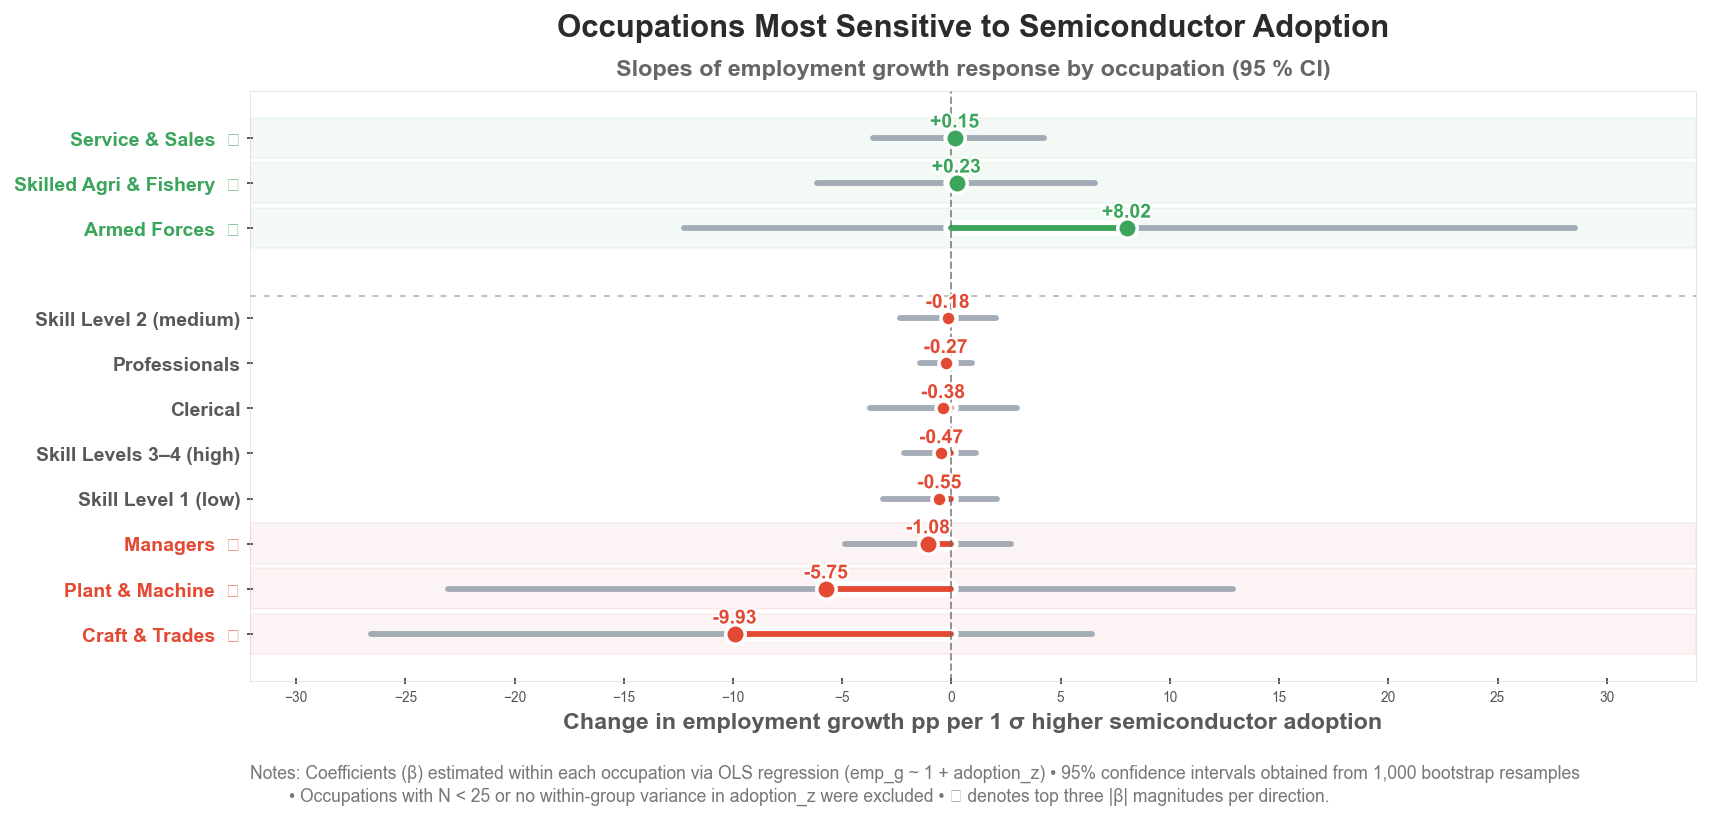

In [141]:
# ====================== Sensitivity to Adoption (ranked slopes + CI) ======================

# Helpers: def _ols_slope, def _boot_slope_ci

# ------------------------- Config -------------------------
OCC_COL            = "Occupation_Group"
MIN_OBS_PER_OCC    = 25
N_BOOT             = 1000
SEED               = 42
TOP_POS, TOP_NEG   = 8, 8            # show this many most + / −
TOP3_HIGHLIGHT     = 3               # how many to bold/highlight in each direction
LABEL_WRAP         = 40

COL_POS, COL_NEG   = "#3BA55C", "#E24A33"   #2ca02c, d9534f
COL_CI             = "#9aa3af"
COL_HPOS, COL_HNEG = "#3BA55C", "#d9534f"   # highlight band tints, 2ca02c
DOT_SIZE, EDGE_LW  = 60, 1.8
DOT_SIZE_TOP3      = 100
LINE_LW, HALO_LW   = 3, 8 
TXT_STROKE         = [pe.withStroke(linewidth=2.0, foreground="white")]

# ---------------------- Helpers ---------------------------
def _ols_slope(x, y):
    x = np.asarray(x, float); y = np.asarray(y, float)
    n = x.size
    if n < 3: return np.nan
    sx2 = np.sum((x - x.mean())**2)
    if sx2 == 0: return np.nan
    return np.sum((x - x.mean()) * (y - y.mean())) / sx2

def _boot_slope_ci(df_sub, n_boot=N_BOOT, seed=SEED):
    x = df_sub["adoption_z"].to_numpy(float)
    y = df_sub["emp_g"].to_numpy(float)
    n = x.size
    if n < 3 or np.std(x, ddof=1) == 0:
        return np.nan, np.nan
    rng = np.random.default_rng(seed)
    betas = np.empty(n_boot)
    for b in range(n_boot):
        idx = rng.integers(0, n, size=n)
        betas[b] = _ols_slope(x[idx], y[idx])
    lo, hi = np.nanpercentile(betas, [2.5, 97.5])
    return float(lo), float(hi)

# ---------------------- Compute slopes --------------------
need = [OCC_COL, "emp_g", "adoption_z"]
df = data[need].dropna().copy()

# keep occupations with enough rows and non-constant adoption_z
df = (df.groupby(OCC_COL, group_keys=False)
        .filter(lambda d: len(d) >= MIN_OBS_PER_OCC and d["adoption_z"].std(ddof=1) > 0))

rows = []
for occ, dsub in df.groupby(OCC_COL, sort=False):
    n = int(len(dsub))
    beta = _ols_slope(dsub["adoption_z"], dsub["emp_g"])
    lo, hi = _boot_slope_ci(dsub)
    rows.append({"Occupation": occ, "beta": beta, "ci_lo": lo, "ci_hi": hi, "N": n})

sens = pd.DataFrame(rows).dropna(subset=["beta"])
if sens.empty:
    raise ValueError("No valid occupations after filtering (check MIN_OBS_PER_OCC or adoption_z variance).")

# rank by |β| and split by sign
sens = sens.assign(abs_beta=lambda s: s["beta"].abs())
pos = sens[sens["beta"] > 0].sort_values("abs_beta", ascending=False).head(TOP_POS).copy()
neg = sens[sens["beta"] < 0].sort_values("abs_beta", ascending=False).head(TOP_NEG).copy()

# layout: positives above, negatives below with a gap row
n_pos, n_neg = len(pos), len(neg)
pos["y"] = np.arange(n_pos) + (n_neg + 1)
neg["y"] = np.arange(n_neg)
plotdf = pd.concat([pos, neg], ignore_index=True)

# top-3 in each direction (for bolding/highlight)
top3_pos_y = set(pos.head(TOP3_HIGHLIGHT)["y"].tolist())
top3_neg_y = set(neg.head(TOP3_HIGHLIGHT)["y"].tolist())

# labels with N; add a star for top-3
def _lab(row):
    txt = "\n".join(wrap(str(row["Occupation"]), width=LABEL_WRAP))
    if row["y"] in top3_pos_y or row["y"] in top3_neg_y:
        txt += "  ★"
    return txt
plotdf["label"] = plotdf.apply(_lab, axis=1)

# ------------------------ Plot ---------------------------
fig, ax = plt.subplots(figsize=(12.3, 6), dpi=140)

# divider
if n_neg > 0:
    ax.axhline(n_neg - 0.5, color="#9aa3af", lw=1, ls=(0,(3,4)), alpha=0.7)

# subtle highlight bands for the top-3 rows
for y in sorted(top3_pos_y):
    ax.axhspan(y-0.45, y+0.45, color=COL_HPOS, alpha=0.06, zorder=0)
for y in sorted(top3_neg_y):
    ax.axhspan(y-0.45, y+0.45, color=COL_HNEG, alpha=0.06, zorder=0)

# CI segments
for _, r in plotdf.iterrows():
    ax.plot([r["ci_lo"], r["ci_hi"]], [r["y"], r["y"]],
            color=COL_CI, lw=3, alpha=0.9, solid_capstyle="round", zorder=1)

# lollipop sticks (0 → β) with white halo
for _, r in plotdf.iterrows():
    col = COL_POS if r["beta"] >= 0 else COL_NEG
    ax.plot([0, r["beta"]], [r["y"], r["y"]],
            color=col, lw=LINE_LW, solid_capstyle="round", zorder=2,
            path_effects=[pe.Stroke(linewidth=HALO_LW, foreground="white"), pe.Normal()])

# endpoint dots (bigger for top-3)
for _, r in plotdf.iterrows():
    col = COL_POS if r["beta"] >= 0 else COL_NEG
    size = DOT_SIZE_TOP3 if (r["y"] in top3_pos_y or r["y"] in top3_neg_y) else DOT_SIZE
    ax.scatter(r["beta"], r["y"], s=size, color=col, edgecolor="white",
                linewidth=EDGE_LW, zorder=3)

# value annotations
for _, r in plotdf.iterrows():
    col = COL_POS if r["beta"]>=0 else COL_NEG
    ax.text(r["beta"], r["y"] + 0.14, f"{r['beta']:+.2f}",
            ha="center", va="bottom", fontsize=10,
            color=col, weight="bold", path_effects=TXT_STROKE)

# axes, titles, cosmetics
ax.set_yticks(plotdf["y"])
ax.set_yticklabels(plotdf["label"], fontsize = 10, color = AXIS_TEXT_CLR, weight = "semibold")
# bold + color the top-3 tick labels
for lbl, y in zip(ax.get_yticklabels(), plotdf["y"]):
    if y in top3_pos_y:
        lbl.set_fontweight("bold"); lbl.set_color(COL_POS)
    elif y in top3_neg_y:
        lbl.set_fontweight("bold"); lbl.set_color(COL_NEG)

ax.set_xlabel("Change in employment growth pp per 1 σ higher semiconductor adoption", fontsize = 12, color = AXIS_TEXT_CLR, weight = "semibold")
ax.set_title("Occupations Most Sensitive to Semiconductor Adoption",
                        loc="center", fontsize=16,color = TITLE_CLR, fontweight="bold", pad = 28)
ax.text(
        0.5, 1.02, "Slopes of employment growth response by occupation (95 % CI)",
        transform=ax.transAxes, fontsize=12, color=SUBTITLE_CLR, weight = "semibold", ha="center", va="bottom"
        )
ax.axvline(0, color="#666", lw=1, ls="--", alpha=0.7)
ax.grid(alpha=0)

# x-limits
xmin = min(plotdf[["ci_lo","beta"]].min().min(), 0)
xmax = max(plotdf[["ci_hi","beta"]].max().max(), 0)
pad  = (xmax - xmin) * 0.10 if xmax > xmin else 0.2
ax.set_xlim(xmin - pad, xmax + pad)
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))

# footnote
ax.text(
    0, -0.14,
    "Notes: Coefficients (β) estimated within each occupation via OLS regression (emp_g ~ 1 + adoption_z)" 
    " • 95% confidence intervals obtained from 1,000 bootstrap resamples\n" 
    "        • Occupations with N < 25 or no within-group variance in adoption_z were excluded" 
    " • ★ denotes top three |β| magnitudes per direction.", 
    transform=ax.transAxes, ha='left', va='top',
    fontsize=9, color=FOOTNOTE_CLR, linespacing = 1.35, wrap=True
)
plt.tight_layout()

**Visualization: Gender Differences in Occupational Sensitivities to Semiconductor Adoption**

* *Research Question:* 

    **Does semiconductor adoption affect male and female employment differently within occupations?**

* *Rationale:*

    This question examines whether technological adoption amplifies or reduces gender disparities in occupational employment growth. By estimating separate sensitivity slopes (β) for males and females within each occupation, the analysis identifies where women benefit or face greater displacement risk, providing insight into workforce equity and inclusion in the context of technological change.

* **Methodology:**

    The dataset includes observations with both employment growth (emp_g) and adoption intensity (adoption_z), keeping only occupations with at least **40 total observations and 15 per gender**, and with non-zero variance in adoption. For each occupation, separate **within-occupation OLS regressions** were run for males and females following the model: emp_g ∼1+adoption z. Each estimated slope (β) represents the change in employment growth, in percentage points, for a one-standard-deviation (1-σ) increase in semiconductor adoption. Uncertainty in these estimates was assessed using **1,000 bootstrap resamples** per occupation to calculate **95% confidence intervals** for both male and female slopes. The **gender gap** in adoption sensitivity (Δ) was computed for each occupation and ranked by absolute magnitude to identify the top positive and negative differences. Results are visualized using a **dumbbell chart**, where male (grey) and female (orange) slopes are connected by a line showing Δ — green when women respond more positively, and red when men respond more. The **top three largest gaps** in each direction are emphasized with highlighted bands and bold labels. The chart is centered at zero, distinguishing occupations where **women are more positively affected (Δ > 0)** from those where **they face greater displacement risk (Δ < 0)** due to semiconductor adoption.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\836927843.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(OCC_COL, group_keys=False).filter(_ok_group)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\836927843.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occ, g in df.groupby(OCC_COL, sort=False):
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\836927843.py:207: UserWarning: Glyph 9744 (\N{BALLOT BOX}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9744 (\N{BALLOT 

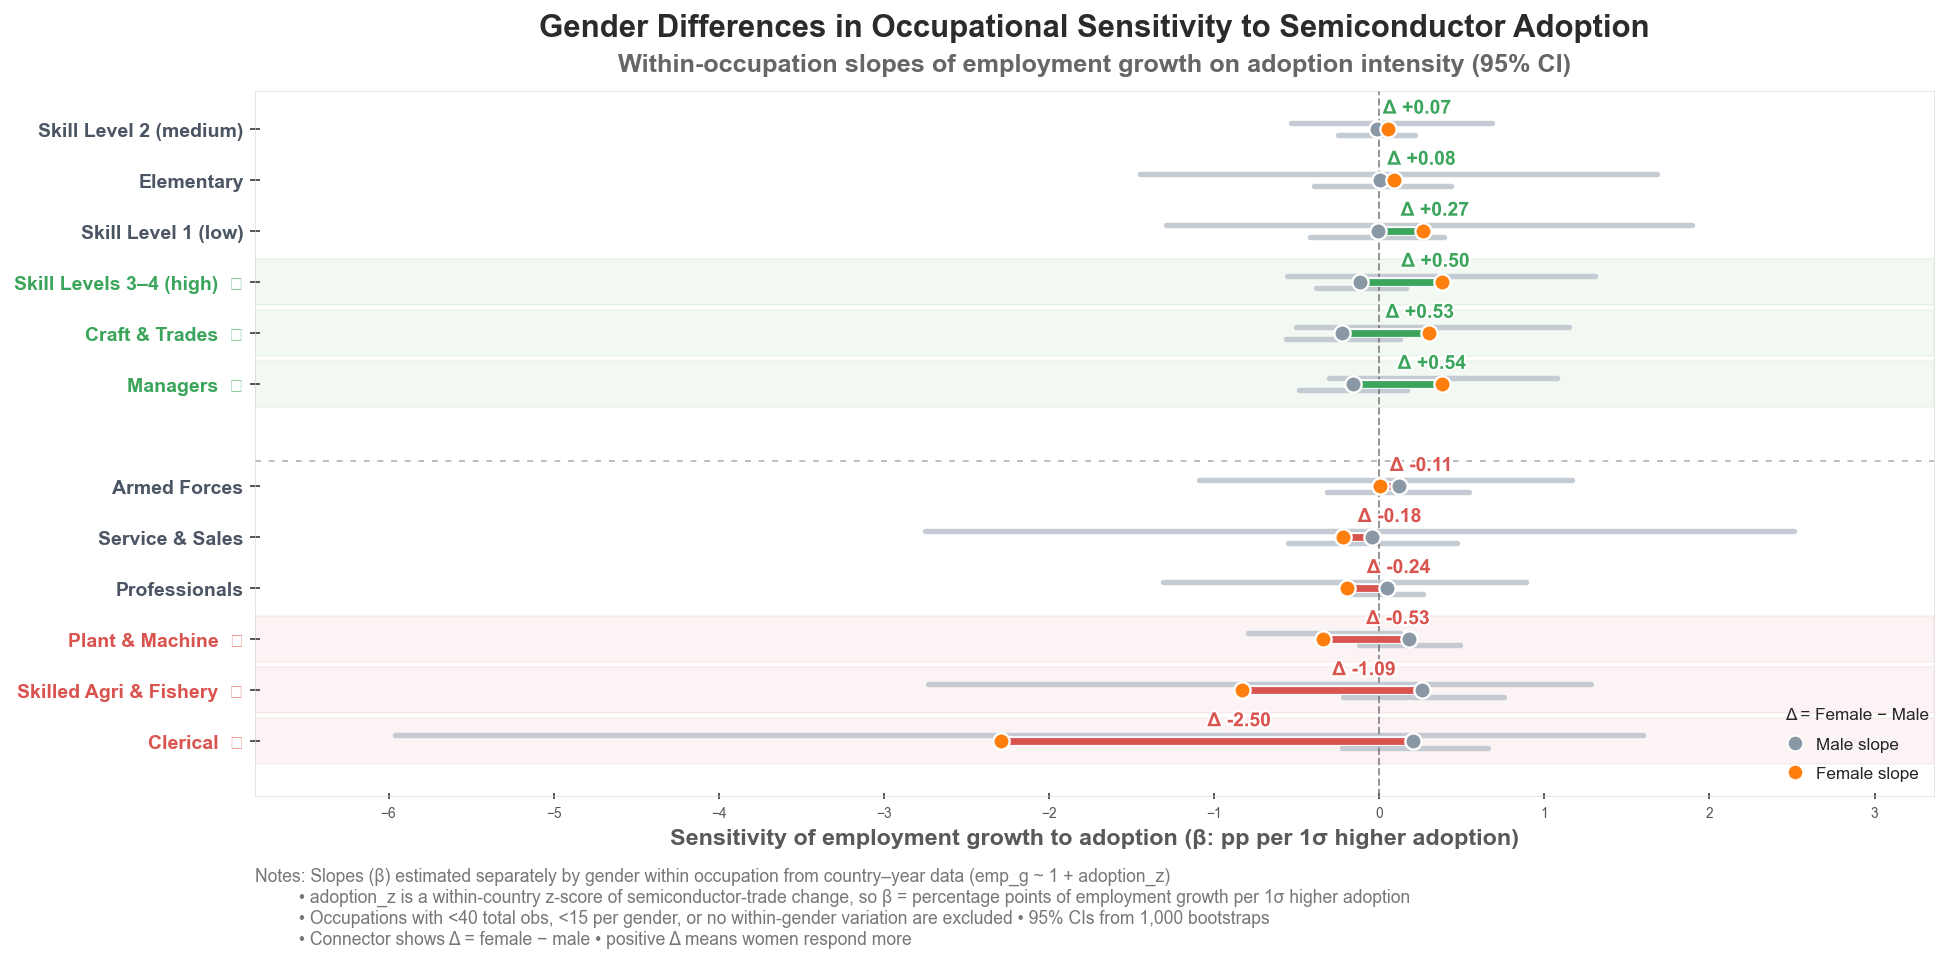

In [143]:
# ================== Gender differential in sensitivity to adoption — ranked style ==================
# Data needs: data[["Occupation_Group","Gender","emp_g","adoption_z"]]

# ----------------------- Config -----------------------
OCC_COL               = "Occupation_Group" 
MIN_OBS_TOTAL         = 40
MIN_OBS_EACH_GENDER   = 15
N_BOOT, SEED          = 1000, 42

TOP_POS, TOP_NEG      = 6, 6     # top K positive/negative gaps
TOP3_HIGHLIGHT        = 3
LABEL_WRAP            = 42

# colors
COL_MALE, COL_FEMALE  = "#8a97a5", "#ff7f0e"
COL_POS, COL_NEG      = "#3BA55C", "#d9534f"   # connector / Δ label color
COL_CI, COL_DIV       = "#bfc6cf", "#9aa3af"

DOT_SIZE, EDGE_LW     = 70, 1.2
LINE_LW, HALO_LW      = 3.5, 5.0
BAND_POS, BAND_NEG    = (0.06, "#2ca02c"), (0.06, "#d9534f")

# --------------------- Helpers ------------------------
def _boot_ci_slope(x, y, n_boot=N_BOOT, seed=SEED):
    x = np.asarray(x, float); y = np.asarray(y, float)
    n = len(x)
    if n < 3 or np.std(x, ddof=1) == 0: return np.nan, np.nan
    rng = np.random.default_rng(seed)
    betas = np.empty(n_boot)
    for b in range(n_boot):
        idx = rng.integers(0, n, size=n)
        betas[b] = _ols_slope(x[idx], y[idx])
    lo, hi = np.nanpercentile(betas, [2.5, 97.5])
    return float(lo), float(hi)

def _boot_ci_diff(d, n_boot=N_BOOT, seed=SEED):
    dF, dM = d[d["Gender"]=="Female"], d[d["Gender"]=="Male"]
    xF,yF = dF["adoption_z"].to_numpy(float), dF["emp_g"].to_numpy(float)
    xM,yM = dM["adoption_z"].to_numpy(float), dM["emp_g"].to_numpy(float)
    nF, nM = len(xF), len(xM)
    if nF<3 or nM<3 or xF.std(ddof=1)==0 or xM.std(ddof=1)==0: return np.nan, np.nan
    rng = np.random.default_rng(seed)
    gaps = np.empty(n_boot)
    for b in range(n_boot):
        iF = rng.integers(0, nF, size=nF); iM = rng.integers(0, nM, size=nM)
        gaps[b] = _ols_slope(xF[iF], yF[iF]) - _ols_slope(xM[iM], yM[iM])
    lo, hi = np.nanpercentile(gaps, [2.5, 97.5])
    return float(lo), float(hi)

# --------------------- Prep data -----------------------
need = [OCC_COL, "Gender", "emp_g", "adoption_z"]
df = data[need].dropna().copy()

# ✅ FIXED: use .str.strip(), not .strip()
df["Gender"] = df["Gender"].astype(str).str.strip().str.title()

# map common codes just in case
df["Gender"] = df["Gender"].replace({"F":"Female","M":"Male","Women":"Female","Men":"Male"})
df = df[df["Gender"].isin(["Female","Male"])]

def _ok_group(d):
    return (len(d) >= MIN_OBS_TOTAL
            and d["Gender"].value_counts().get("Female",0) >= MIN_OBS_EACH_GENDER
            and d["Gender"].value_counts().get("Male",0)   >= MIN_OBS_EACH_GENDER
            and d.loc[d["Gender"]=="Female","adoption_z"].std(ddof=1) > 0
            and d.loc[d["Gender"]=="Male","adoption_z"].std(ddof=1) > 0)

df = df.groupby(OCC_COL, group_keys=False).filter(_ok_group)

# --------------------- Compute per occupation -------------------
rows = []
for occ, g in df.groupby(OCC_COL, sort=False):
    dF, dM = g[g["Gender"]=="Female"], g[g["Gender"]=="Male"]
    bF, bM = _ols_slope(dF["adoption_z"], dF["emp_g"]), _ols_slope(dM["adoption_z"], dM["emp_g"])
    loF, hiF = _boot_ci_slope(dF["adoption_z"], dF["emp_g"])
    loM, hiM = _boot_ci_slope(dM["adoption_z"], dM["emp_g"])
    dlo, dhi = _boot_ci_diff(g)
    rows.append(dict(Occupation=occ, beta_F=bF, ciF_lo=loF, ciF_hi=hiF, N_F=len(dF),
                    beta_M=bM, ciM_lo=loM, ciM_hi=hiM, N_M=len(dM),
                    gap=bF-bM, gap_lo=dlo, gap_hi=dhi, N=len(g)))
res = pd.DataFrame(rows).dropna(subset=["beta_F","beta_M"])
if res.empty: raise ValueError("No valid occupations after filters.")

# split & rank by |gap|
res["abs_gap"] = res["gap"].abs()
pos = res[res["gap"]>0].sort_values("abs_gap", ascending=False)
neg = res[res["gap"]<0].sort_values("abs_gap", ascending=False)
pos = pos.head(TOP_POS) if TOP_POS is not None else pos
neg = neg.head(TOP_NEG) if TOP_NEG is not None else neg

# layout
n_pos, n_neg = len(pos), len(neg)
neg = neg.copy(); pos = pos.copy()
neg["y"] = np.arange(n_neg)
pos["y"] = np.arange(n_pos) + (n_neg + 1)
plotdf = pd.concat([pos, neg], ignore_index=True)

top3_pos_y = set(pos.head(min(TOP3_HIGHLIGHT, n_pos))["y"].tolist())
top3_neg_y = set(neg.head(min(TOP3_HIGHLIGHT, n_neg))["y"].tolist())

# labels
def _lab(r):
    s = "\n".join(wrap(str(r["Occupation"]), width=LABEL_WRAP))
    if r["y"] in top3_pos_y or r["y"] in top3_neg_y: s += "  ☐"
    return s
plotdf["label"] = plotdf.apply(_lab, axis=1)

# --------------------- Plot -----------------------------
fig, ax = plt.subplots(figsize=(14, 7), dpi=140)

# divider & highlight bands
if n_neg > 0:
    ax.axhline(n_neg-0.5, color=COL_DIV, lw=1, ls=(0,(3,4)), alpha=0.7, zorder=0)
for y in sorted(top3_pos_y): ax.axhspan(y-0.45, y+0.45, color=BAND_POS[1], alpha=BAND_POS[0], zorder=-1)
for y in sorted(top3_neg_y): ax.axhspan(y-0.45, y+0.45, color=BAND_NEG[1], alpha=BAND_NEG[0], zorder=-1)

# grid & zero
ax.axvline(0, color="#666", lw=1, ls="--", alpha=0.7); ax.grid(axis="x", alpha=0.25); ax.set_axisbelow(True)

# CIs
for _, r in plotdf.iterrows():
    ax.plot([r["ciM_lo"], r["ciM_hi"]], [r["y"]-0.12, r["y"]-0.12], color=COL_CI, lw=2.8, alpha=0.9, zorder=1, solid_capstyle="round")
    ax.plot([r["ciF_lo"], r["ciF_hi"]], [r["y"]+0.12, r["y"]+0.12], color=COL_CI, lw=2.8, alpha=0.9, zorder=1, solid_capstyle="round")

# connectors (Female–Male)
for _, r in plotdf.iterrows():
    col = COL_POS if r["gap"] >= 0 else COL_NEG
    ax.plot([r["beta_M"], r["beta_F"]], [r["y"], r["y"]], color=col, lw=LINE_LW, zorder=2,
            solid_capstyle="round", path_effects=[pe.Stroke(linewidth=HALO_LW, foreground="white"), pe.Normal()])

# dots
ax.scatter(plotdf["beta_M"], plotdf["y"], s=DOT_SIZE, color=COL_MALE, edgecolor="white", linewidth=EDGE_LW, zorder=3, label="Male slope")
ax.scatter(plotdf["beta_F"], plotdf["y"], s=DOT_SIZE, color=COL_FEMALE, edgecolor="white", linewidth=EDGE_LW, zorder=3, label="Female slope")

# Δ annotations
for _, r in plotdf.iterrows():
    midx = (r["beta_M"] + r["beta_F"]) / 2
    col  = COL_POS if r["gap"] >= 0 else COL_NEG
    ax.text(midx, r["y"] + 0.22, f"Δ {r['gap']:+.2f}",
            ha="left", va="bottom", fontsize=10, color=col, fontweight="bold",
            path_effects=[pe.withStroke(linewidth=2.0, foreground="white")])

# y ticks styling
ax.set_yticks(plotdf["y"]); ax.set_yticklabels(plotdf["label"], weight = "semibold", fontsize = 10)
for lbl, y in zip(ax.get_yticklabels(), plotdf["y"]):
    if (y in top3_pos_y) or (y in top3_neg_y):
        lbl.set_fontweight("bold")
        lbl.set_color(COL_POS if y in top3_pos_y else COL_NEG)
    else:
        lbl.set_color("#4B5563")   # ← your neutral color (dark gray, for example)
ax.tick_params(axis="y", length=5)

# titles
ax.set_xlabel("Sensitivity of employment growth to adoption (β: pp per 1σ higher adoption)", fontsize = 12, color = AXIS_TEXT_CLR, weight = "semibold")
ax.set_title("Gender Differences in Occupational Sensitivity to Semiconductor Adoption",
            loc="center", fontsize=16, color = TITLE_CLR, fontweight="bold", pad = 28)
ax.text(
        0.5, 1.02, "Within-occupation slopes of employment growth on adoption intensity (95% CI)",
        transform=ax.transAxes, fontsize=13, color=SUBTITLE_CLR, weight = "semibold", ha="center", va="bottom"
        )

# ---- Legend: Δ text in handle column (no overlap) ----
class TextHandle(Line2D):
    """An empty handle that stores the text we want to draw in the handle column."""
    def __init__(self, text):
        super().__init__([], [], linestyle='none')
        self._legend_text = text
    def get_label(self):             # keep label empty so Matplotlib won't draw it again
        return ""

class HandlerTextInHandle(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent,
                    width, height, fontsize, trans):
        t = plt.Text(xdescent, ydescent + height/2.0,
                    orig_handle._legend_text,
                    ha="left", va="center", fontsize=fontsize, transform=trans)
        return [t]

# proxy artists
h_delta = TextHandle("Δ = Female − Male")   # text-only row above the grey dot
h_male  = Line2D([], [], marker='o', markersize=8, linestyle='none',
                markerfacecolor=COL_MALE, markeredgecolor="white",
                label="Male slope")
h_fem   = Line2D([], [], marker='o', markersize=8, linestyle='none',
                markerfacecolor=COL_FEMALE, markeredgecolor="white",
                label="Female slope")

ax.legend(handles=[h_delta, h_male, h_fem],
        handler_map={TextHandle: HandlerTextInHandle()},
        frameon=False, loc="lower right",
        handlelength=1.2, handletextpad=0.6, labelspacing=0.8)

# x-limits
xmin = float(min(plotdf[["ciM_lo","ciF_lo","beta_M","beta_F"]].min()))
xmax = float(max(plotdf[["ciM_hi","ciF_hi","beta_M","beta_F"]].max()))
ax.set_xlim(xmin - (xmax-xmin)*0.10, xmax + (xmax-xmin)*0.10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# footnote
ax.text(0.0, -0.10,
        "Notes: Slopes (β) estimated separately by gender within occupation from country–year data (emp_g ~ 1 + adoption_z)\n"
        "         • adoption_z is a within-country z-score of semiconductor-trade change, so β = percentage points of employment growth per 1σ higher adoption \n"
        "         • Occupations with <40 total obs, <15 per gender, or no within-gender variation are excluded • 95% CIs from 1,000 bootstraps\n"
        "         • Connector shows Δ = female − male • positive Δ means women respond more",
            transform=ax.transAxes, ha="left", va="top", fontsize=9, color=FOOTNOTE_CLR)
ax.grid(alpha = 0)
plt.tight_layout()

* **The visualization below presents the same chart above, with confidence interval (CI) lines truncated to enhance visual clarity.**

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1048440620.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(OCC_COL, group_keys=False).filter(_ok_group)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1048440620.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occ, g in df.groupby(OCC_COL, sort=False):
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1048440620.py:216: UserWarning: Glyph 9744 (\N{BALLOT BOX}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9744 (\N{BALL

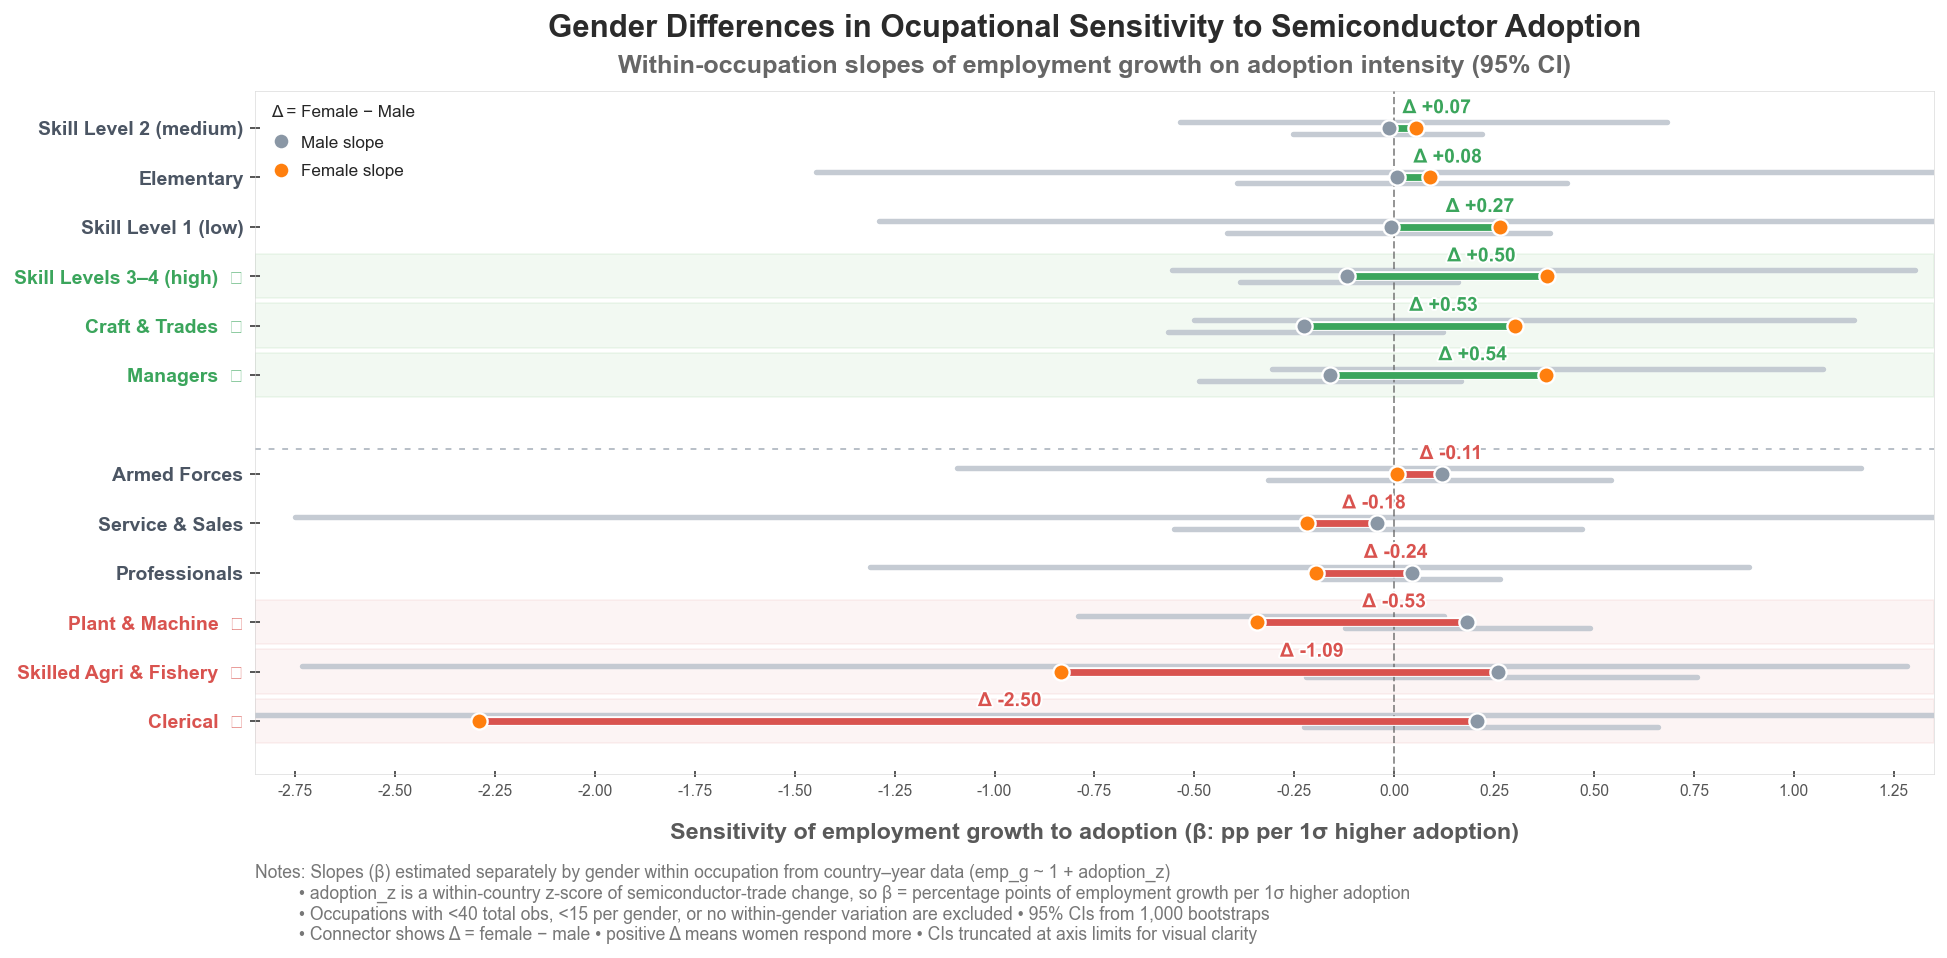

In [144]:
# ================== Gender differential in sensitivity to adoption — ranked style ==================
# Data needs: data[["Occupation_Group","Gender","emp_g","adoption_z"]]

# ----------------------- Config -----------------------
OCC_COL               = "Occupation_Group" 
MIN_OBS_TOTAL         = 40
MIN_OBS_EACH_GENDER   = 15
N_BOOT, SEED          = 1000, 42

TOP_POS, TOP_NEG      = 6, 6     # top K positive/negative gaps
TOP3_HIGHLIGHT        = 3
LABEL_WRAP            = 42

# colors
COL_MALE, COL_FEMALE  = "#8a97a5", "#ff7f0e"
COL_POS, COL_NEG      = "#3BA55C", "#d9534f"   # connector / Δ label color
COL_CI, COL_DIV       = "#bfc6cf", "#9aa3af"

DOT_SIZE, EDGE_LW     = 70, 1.2
LINE_LW, HALO_LW      = 3.5, 5.0
BAND_POS, BAND_NEG    = (0.06, "#2ca02c"), (0.06, "#d9534f")

# --------------------- Helpers ------------------------
def _boot_ci_slope(x, y, n_boot=N_BOOT, seed=SEED):
    x = np.asarray(x, float); y = np.asarray(y, float)
    n = len(x)
    if n < 3 or np.std(x, ddof=1) == 0: return np.nan, np.nan
    rng = np.random.default_rng(seed)
    betas = np.empty(n_boot)
    for b in range(n_boot):
        idx = rng.integers(0, n, size=n)
        betas[b] = _ols_slope(x[idx], y[idx])
    lo, hi = np.nanpercentile(betas, [2.5, 97.5])
    return float(lo), float(hi)

def _boot_ci_diff(d, n_boot=N_BOOT, seed=SEED):
    dF, dM = d[d["Gender"]=="Female"], d[d["Gender"]=="Male"]
    xF,yF = dF["adoption_z"].to_numpy(float), dF["emp_g"].to_numpy(float)
    xM,yM = dM["adoption_z"].to_numpy(float), dM["emp_g"].to_numpy(float)
    nF, nM = len(xF), len(xM)
    if nF<3 or nM<3 or xF.std(ddof=1)==0 or xM.std(ddof=1)==0: return np.nan, np.nan
    rng = np.random.default_rng(seed)
    gaps = np.empty(n_boot)
    for b in range(n_boot):
        iF = rng.integers(0, nF, size=nF); iM = rng.integers(0, nM, size=nM)
        gaps[b] = _ols_slope(xF[iF], yF[iF]) - _ols_slope(xM[iM], yM[iM])
    lo, hi = np.nanpercentile(gaps, [2.5, 97.5])
    return float(lo), float(hi)

# --------------------- Prep data -----------------------
need = [OCC_COL, "Gender", "emp_g", "adoption_z"]
df = data[need].dropna().copy()

# ✅ FIXED: use .str.strip(), not .strip()
df["Gender"] = df["Gender"].astype(str).str.strip().str.title()

# map common codes just in case
df["Gender"] = df["Gender"].replace({"F":"Female","M":"Male","Women":"Female","Men":"Male"})
df = df[df["Gender"].isin(["Female","Male"])]

def _ok_group(d):
    return (len(d) >= MIN_OBS_TOTAL
            and d["Gender"].value_counts().get("Female",0) >= MIN_OBS_EACH_GENDER
            and d["Gender"].value_counts().get("Male",0)   >= MIN_OBS_EACH_GENDER
            and d.loc[d["Gender"]=="Female","adoption_z"].std(ddof=1) > 0
            and d.loc[d["Gender"]=="Male","adoption_z"].std(ddof=1) > 0)

df = df.groupby(OCC_COL, group_keys=False).filter(_ok_group)

# --------------------- Compute per occupation -------------------
rows = []
for occ, g in df.groupby(OCC_COL, sort=False):
    dF, dM = g[g["Gender"]=="Female"], g[g["Gender"]=="Male"]
    bF, bM = _ols_slope(dF["adoption_z"], dF["emp_g"]), _ols_slope(dM["adoption_z"], dM["emp_g"])
    loF, hiF = _boot_ci_slope(dF["adoption_z"], dF["emp_g"])
    loM, hiM = _boot_ci_slope(dM["adoption_z"], dM["emp_g"])
    dlo, dhi = _boot_ci_diff(g)
    rows.append(dict(Occupation=occ, beta_F=bF, ciF_lo=loF, ciF_hi=hiF, N_F=len(dF),
                    beta_M=bM, ciM_lo=loM, ciM_hi=hiM, N_M=len(dM),
                    gap=bF-bM, gap_lo=dlo, gap_hi=dhi, N=len(g)))
res = pd.DataFrame(rows).dropna(subset=["beta_F","beta_M"])
if res.empty: raise ValueError("No valid occupations after filters.")

# split & rank by |gap|
res["abs_gap"] = res["gap"].abs()
pos = res[res["gap"]>0].sort_values("abs_gap", ascending=False)
neg = res[res["gap"]<0].sort_values("abs_gap", ascending=False)
pos = pos.head(TOP_POS) if TOP_POS is not None else pos
neg = neg.head(TOP_NEG) if TOP_NEG is not None else neg

# layout
n_pos, n_neg = len(pos), len(neg)
neg = neg.copy(); pos = pos.copy()
neg["y"] = np.arange(n_neg)
pos["y"] = np.arange(n_pos) + (n_neg + 1)
plotdf = pd.concat([pos, neg], ignore_index=True)

top3_pos_y = set(pos.head(min(TOP3_HIGHLIGHT, n_pos))["y"].tolist())
top3_neg_y = set(neg.head(min(TOP3_HIGHLIGHT, n_neg))["y"].tolist())

# labels
def _lab(r):
    s = "\n".join(wrap(str(r["Occupation"]), width=LABEL_WRAP))
    if r["y"] in top3_pos_y or r["y"] in top3_neg_y: s += "  ☐"
    return s
plotdf["label"] = plotdf.apply(_lab, axis=1)

# --------------------- Plot -----------------------------
fig, ax = plt.subplots(figsize=(14, 7), dpi=140)

# divider & highlight bands
if n_neg > 0:
    ax.axhline(n_neg-0.5, color=COL_DIV, lw=1, ls=(0,(3,4)), alpha=0.7, zorder=0)
for y in sorted(top3_pos_y): ax.axhspan(y-0.45, y+0.45, color=BAND_POS[1], alpha=BAND_POS[0], zorder=-1)
for y in sorted(top3_neg_y): ax.axhspan(y-0.45, y+0.45, color=BAND_NEG[1], alpha=BAND_NEG[0], zorder=-1)

# grid & zero
ax.axvline(0, color="#666", lw=1, ls="--", alpha=0.7); ax.grid(axis="x", alpha=0.25); ax.set_axisbelow(True)

# CIs
for _, r in plotdf.iterrows():
    ax.plot([r["ciM_lo"], r["ciM_hi"]], [r["y"]-0.12, r["y"]-0.12], color=COL_CI, lw=2.8, alpha=0.9, zorder=1, solid_capstyle="round")
    ax.plot([r["ciF_lo"], r["ciF_hi"]], [r["y"]+0.12, r["y"]+0.12], color=COL_CI, lw=2.8, alpha=0.9, zorder=1, solid_capstyle="round")

# connectors (Female–Male)
for _, r in plotdf.iterrows():
    col = COL_POS if r["gap"] >= 0 else COL_NEG
    ax.plot([r["beta_M"], r["beta_F"]], [r["y"], r["y"]], color=col, lw=LINE_LW, zorder=2,
            solid_capstyle="round", path_effects=[pe.Stroke(linewidth=HALO_LW, foreground="white"), pe.Normal()])

# dots
ax.scatter(plotdf["beta_M"], plotdf["y"], s=DOT_SIZE, color=COL_MALE, edgecolor="white", linewidth=EDGE_LW, zorder=3, label="Male slope")
ax.scatter(plotdf["beta_F"], plotdf["y"], s=DOT_SIZE, color=COL_FEMALE, edgecolor="white", linewidth=EDGE_LW, zorder=3, label="Female slope")

# Δ annotations
for _, r in plotdf.iterrows():
    midx = (r["beta_M"] + r["beta_F"]) / 2
    col  = COL_POS if r["gap"] >= 0 else COL_NEG
    ax.text(midx, r["y"] + 0.22, f"Δ {r['gap']:+.2f}",
            ha="left", va="bottom", fontsize=10, color=col, fontweight="bold",
            path_effects=[pe.withStroke(linewidth=2.0, foreground="white")])

# y ticks styling
ax.set_yticks(plotdf["y"]); ax.set_yticklabels(plotdf["label"], weight = "semibold", fontsize = 10)
for lbl, y in zip(ax.get_yticklabels(), plotdf["y"]):
    if (y in top3_pos_y) or (y in top3_neg_y):
        lbl.set_fontweight("bold")
        lbl.set_color(COL_POS if y in top3_pos_y else COL_NEG)
    else:
        lbl.set_color("#4B5563")   # ← your neutral color (dark gray, for example)
ax.tick_params(axis="y", length=5)

# titles
ax.set_xlabel("Sensitivity of employment growth to adoption (β: pp per 1σ higher adoption)", labelpad = 12, fontsize = 12, color = AXIS_TEXT_CLR, weight = "semibold")
ax.set_title("Gender Differences in Ocupational Sensitivity to Semiconductor Adoption",
            loc="center", fontsize=16, color = TITLE_CLR, fontweight="bold", pad = 28)
ax.text(
        0.5, 1.02, "Within-occupation slopes of employment growth on adoption intensity (95% CI)",
        transform=ax.transAxes, fontsize=13, color=SUBTITLE_CLR, weight = "semibold", ha="center", va="bottom"
        )

# ---- Legend: Δ text in handle column (no overlap) ----
class TextHandle(Line2D):
    """An empty handle that stores the text we want to draw in the handle column."""
    def __init__(self, text):
        super().__init__([], [], linestyle='none')
        self._legend_text = text
    def get_label(self):             # keep label empty so Matplotlib won't draw it again
        return ""

class HandlerTextInHandle(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent,
                    width, height, fontsize, trans):
        t = plt.Text(xdescent, ydescent + height/2.0,
                    orig_handle._legend_text,
                    ha="left", va="center", fontsize=fontsize, transform=trans)
        return [t]

# proxy artists
h_delta = TextHandle("Δ = Female − Male")   # text-only row above the grey dot
h_male  = Line2D([], [], marker='o', markersize=8, linestyle='none',
                markerfacecolor=COL_MALE, markeredgecolor="white",
                label="Male slope")
h_fem   = Line2D([], [], marker='o', markersize=8, linestyle='none',
                markerfacecolor=COL_FEMALE, markeredgecolor="white",
                label="Female slope")

ax.legend(handles=[h_delta, h_male, h_fem],
        handler_map={TextHandle: HandlerTextInHandle()},
        frameon=False, loc="upper left",
        handlelength=1.2, handletextpad=0.6, labelspacing=0.8)

# x-limits
xmin, xmax = -2.5, 1.0

# Add a little headroom (10% of the range)
pad = (xmax - xmin) * 0.10
ax.set_xlim(xmin - pad, xmax + pad)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))

# Optional: format tick labels to show two decimals (e.g., -2.50 → -2.5)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# Adjust tick parameters for clarity
ax.tick_params(axis='x', labelsize=8)


# footnote
ax.text(0.0, -0.13,
        "Notes: Slopes (β) estimated separately by gender within occupation from country–year data (emp_g ~ 1 + adoption_z)\n"
        "         • adoption_z is a within-country z-score of semiconductor-trade change, so β = percentage points of employment growth per 1σ higher adoption \n"
        "         • Occupations with <40 total obs, <15 per gender, or no within-gender variation are excluded • 95% CIs from 1,000 bootstraps\n"
        "         • Connector shows Δ = female − male • positive Δ means women respond more • CIs truncated at axis limits for visual clarity",
            transform=ax.transAxes, ha="left", va="top", fontsize=9, color=FOOTNOTE_CLR)
ax.grid(alpha = 0)
plt.tight_layout()

In [38]:
tech_countries = [
    'China', 'S.Korea', 'USA', 'UK', 'Japan', 'Israel', 'Germany', 'India', 'Netherlands',
    'Singapore', 'France', 'Switzerland', 'Canada', 'Ireland', 'Sweden',
    'Finland', 'Italy', 'Australia', 'Austria', 'Belgium', 'Denmark', 'Norway', 'Spain'
]

**Visualization: Concentration of Adoption Impacts Across Occupations - Tech-Leading Countries(Top 10)**

* *Research Question:*

    **Which country–occupation combinations experience the strongest employment gains or losses as semiconductor adoption increases?**

* *Rationale:*

    This visualization examines how semiconductor adoption influences employment across countries and occupations. The heatmap identifies where adoption is most strongly associated with workforce expansion or contraction, while the “top 10” rankings highlight the most significant positive and negative impacts. Together, they provide a clear view of global variation in technology-driven labor dynamics and inform targeted policy or research focus areas.

* **Methodology**

     Employment growth (**emp_g**) and adoption intensity (**adoption_z**) were **merged by country, year, and occupation**, retaining only pairs with at **least six valid years** and measurable **variation in adoption**. For each pair, a simple **OLS regression** emp_g∼1+adoption_z was estimated, where the coefficient β measures the percentage-point change in employment growth for a one–standard deviation increase in semiconductor adoption. The **heatmap** presents **β** values for the top ten countries and occupations **ranked by average** absolute sensitivity **∣β∣**, with red and blue shading denoting positive and negative effects. **Complementary bar charts** display the ten largest positive and negative sensitivities, highlighting the strongest employment responses.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\884216504.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(["Country",OCC_COL], group_keys=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\884216504.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (ct, occ), g in df.groupby(["Country", OCC_COL], sort=False):
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\884216504.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.055, 0.06, 0.995, 0.95])


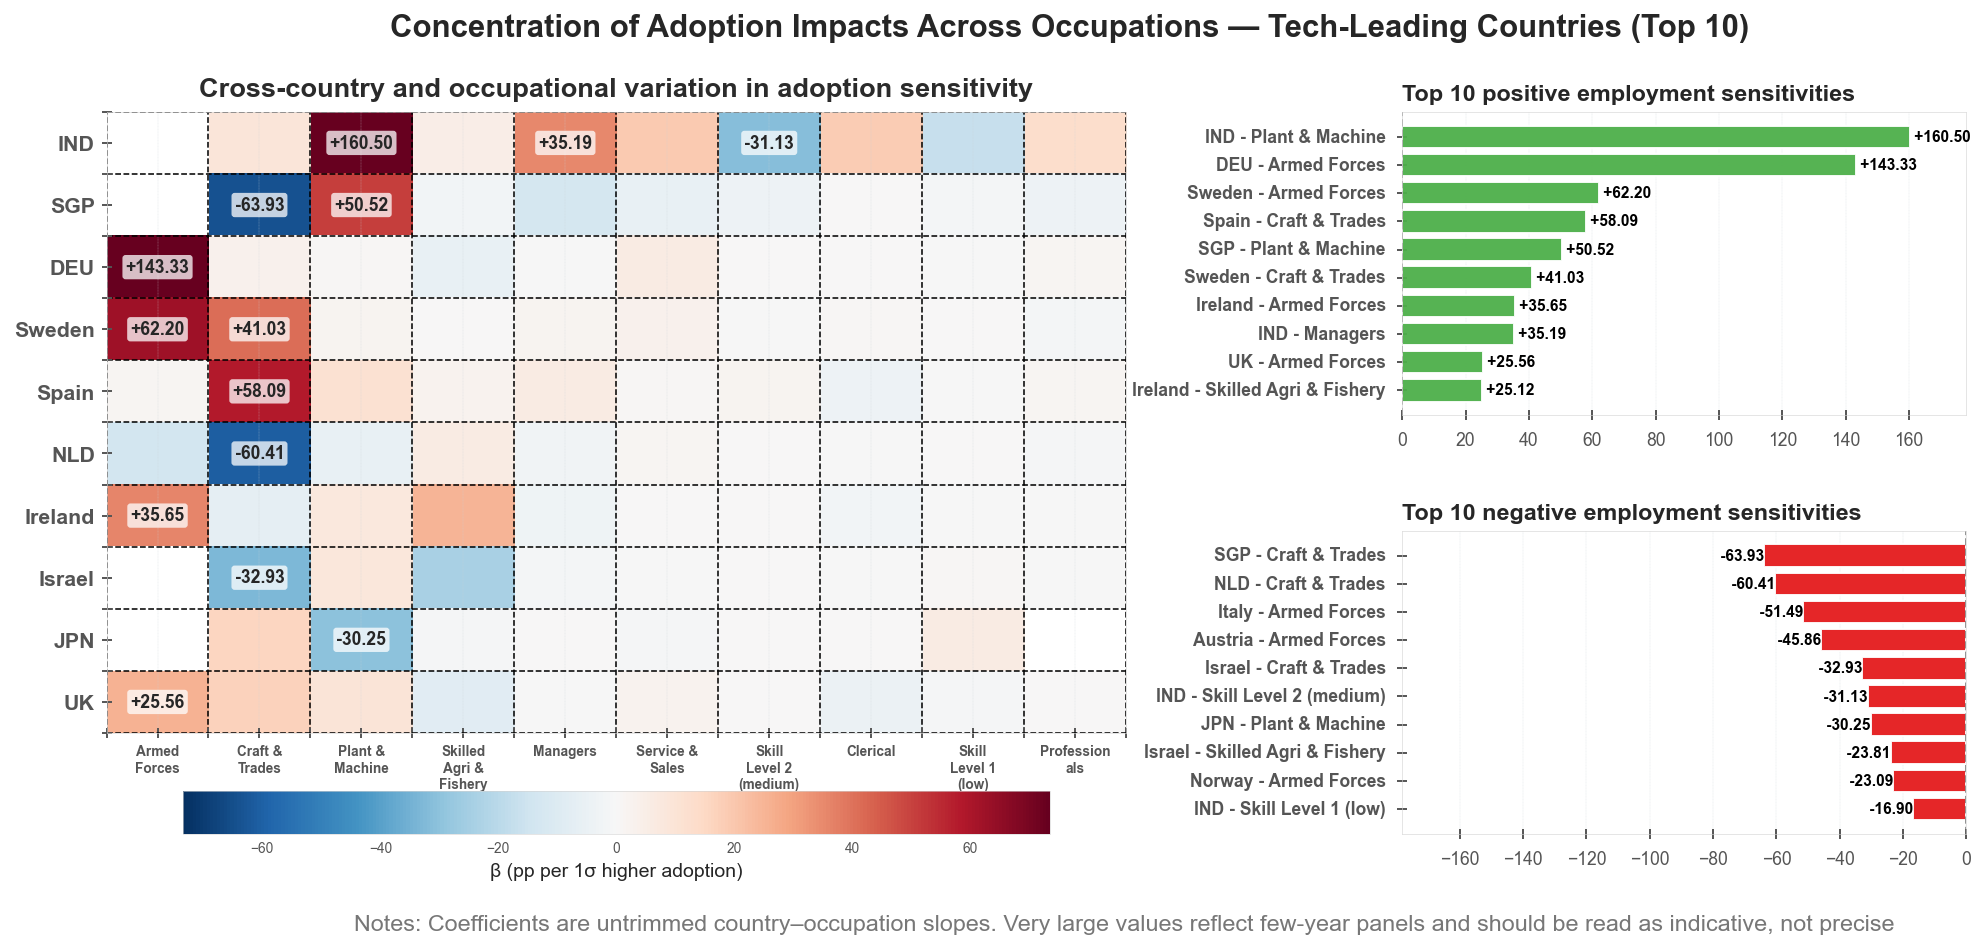

In [150]:
# ===== Concentration of impacts: ranked heatmap + extremes leaderboard (tech leaders; top 10) =====
OCC_COL = "Occupation_Group"

# input tech_countries 

# ---- config ----
MIN_YEARS_PER_CELL = 6
HEAT_COUNTRIES     = 10          # show top 10 countries
HEAT_OCCS          = 10
TOP_POS, TOP_NEG   = 10, 10
LABEL_WRAP_OCC     = 10
MAX_LABEL_LEN      = 48
COL_POS, COL_NEG   = "#4daf4a", "#e41a1c"

STOPWORDS = {
    "of","and","the","la","le","de","del","da","do","di","du","el","los","las","y",
    "republic","republica","democratic","democratique","federation","federal",
    "state","states","islamic","peoples","people"
}

def short_country(name: str) -> str:
    if not isinstance(name, str):
        return str(name)
    n = name.strip()
    if n in COUNTRY_ABBR:
        return COUNTRY_ABBR[n]
    words = [w for w in re.split(r"[^\w]+", n) if w]
    if len(words) <= 1:
        return n
    sig = [w for w in words if w.lower() not in STOPWORDS]
    if len(sig) >= 3:
        acro = "".join(w[0] for w in sig[:4]).upper()
        if 2 <= len(acro) <= 4:
            return acro
    return " ".join(words[:2])

def _ols_slope(x, y):
    x = np.asarray(x, float); y = np.asarray(y, float)
    if len(x) < 3: return np.nan
    sxx = ((x - x.mean())**2).sum()
    if sxx == 0: return np.nan
    return ((x - x.mean())*(y - y.mean())).sum()/sxx

# ---- build β by (country,occ) ----
need = ["Country","Year",OCC_COL,"adoption_z","emp_g"]
df = data[need].dropna().copy()

# NEW: keep only your tech-leading cohort
df = df[df["Country"].isin(tech_countries)].copy()

# keep cells with enough years and variation in adoption
df = (df.groupby(["Country",OCC_COL], group_keys=False)
        .filter(lambda g: len(g) >= MIN_YEARS_PER_CELL and g["adoption_z"].std(ddof=1) > 0))

rows=[]
for (ct, occ), g in df.groupby(["Country", OCC_COL], sort=False):
    rows.append({"Country":ct, "Occupation":occ, "beta":_ols_slope(g["adoption_z"], g["emp_g"]), "N":len(g)})
res = pd.DataFrame(rows).dropna(subset=["beta"])
if res.empty:
    raise ValueError("No valid cells after filtering.")

# ---- order for heatmap (Top 10 by mean |β| among tech leaders) ----
ct_order = (res.groupby("Country")["beta"]
            .apply(lambda s: s.abs().mean())
            .sort_values(ascending=False)
            .index.tolist()[:HEAT_COUNTRIES])                        

occ_order = (res[res["Country"].isin(ct_order)]
            .groupby("Occupation")["beta"]
            .apply(lambda s: s.abs().mean())
            .sort_values(ascending=False)
.index.tolist()[:HEAT_OCCS])

mat = (res[res["Country"].isin(ct_order) & res["Occupation"].isin(occ_order)]
        .pivot(index="Country", columns="Occupation", values="beta")
        .reindex(index=ct_order, columns=occ_order))

# extremes lists (within tech leaders only) 
res_tech = res[res["Country"].isin(tech_countries)].copy()
pos = res_tech.sort_values("beta", ascending=False).head(TOP_POS).copy()
neg = res_tech.sort_values("beta", ascending=True ).head(TOP_NEG).copy()

# ---- color scaling ----
vals = mat.to_numpy().ravel()
vmax = float(np.nanpercentile(np.abs(vals), 98)) if np.isfinite(vals).any() else 1.0
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0.0, vmax=vmax)

# -------- figure layout --------
fig = plt.figure(figsize=(16.2, 6.7), dpi=140)
gs  = GridSpec(nrows=1, ncols=2, width_ratios=[2.35, 1.30], wspace=0.22, figure=fig)
axH = fig.add_subplot(gs[0,0])

# ---- heatmap ----
im = axH.imshow(mat.to_numpy(), cmap="RdBu_r", norm=norm, aspect="auto")
axH.set_xticks(range(mat.shape[1]))
axH.set_xticklabels(["\n".join(wrap(c, width=LABEL_WRAP_OCC)) for c in mat.columns], rotation=0, ha="center", weight = "semibold")
axH.set_yticks(range(mat.shape[0]))
axH.set_yticklabels([short_country(c) for c in mat.index], weight = "semibold", fontsize = 11)
axH.set_title("Cross-country and occupational variation in adoption sensitivity",
            loc="center", fontsize=14, color = TITLE_CLR, fontweight="bold", pad=8)
axH.set_xticks(np.arange(-.5, mat.shape[1], 1), minor=True)
axH.set_yticks(np.arange(-.5, mat.shape[0], 1), minor=True)
axH.grid(which="minor", color=(0,0,0,0.08), linewidth=0.8)
axH.tick_params(which="both", length=5)

# annotate largest |β|
panel = (pd.DataFrame(mat.stack(), columns=["beta"]).reset_index()
        .rename(columns={"level_0":"Country","level_1":"Occupation"}).dropna())
if not panel.empty:
    ann = (panel.assign(absb=lambda s: s["beta"].abs())
                .sort_values("absb", ascending=False).head(14))
    for _, r in ann.iterrows():
        i = mat.index.get_loc(r["Country"]); j = mat.columns.get_loc(r["Occupation"])
        axH.text(j, i, f"{r['beta']:+.2f}", ha="center", va="center", fontsize=9, weight="semibold",
                bbox=dict(boxstyle="round,pad=0.18", fc="white", ec="none", alpha=0.75))

# colorbar
cbar = fig.colorbar(im, ax=axH, orientation="horizontal", pad=0.08, fraction=0.06)
cbar.set_label("β (pp per 1σ higher adoption)")
cbar.ax.tick_params(length=0)

# ---- extremes leaderboards (tech leaders only) ----
def one_line_label(country, occ, max_len=MAX_LABEL_LEN):
    s = f"{short_country(country)} - {occ}"
    return shorten(s, width=max_len, placeholder="…")

def draw_list(ax, df_list, title, color):
    labels = [one_line_label(c, o) for c, o in zip(df_list["Country"], df_list["Occupation"])]
    y = np.arange(len(df_list))[::-1]
    ax.barh(y, df_list["beta"], color=color, alpha=0.95)
    for yi, b in zip(y, df_list["beta"]):
        ax.text(b, yi, f" {b:+.2f}", va="center",
                ha="left" if b>=0 else "right", fontsize=8, weight="semibold", color="black")
    ax.set_yticks(y); ax.set_yticklabels(labels)
    for tick in ax.get_yticklabels():
        tick.set_ha("right"); tick.set_va("center"); tick.set_fontsize(9); tick.set_fontweight("semibold")

    ax.tick_params(axis="y", pad=6)
    ax.tick_params(axis="both", which="major", direction="inout", length=5, width=1, labelsize=9, pad=6)
    ax.axvline(0, color="#666", lw=1, ls="--", alpha=0.7)
    ax.set_title(title, fontsize=12, loc="left", fontweight="bold", pad=6)

gsR  = gs[0,1].subgridspec(2, 1, hspace=0.38)
axPos = fig.add_subplot(gsR[0,0])
axNeg = fig.add_subplot(gsR[1,0])

xmax_list = float(max(pos["beta"].max(), -neg["beta"].min()))
xpad = 0.11 * xmax_list if xmax_list > 0 else 0.2
axPos.set_xlim(0, xmax_list + xpad)
axNeg.set_xlim(-xmax_list - xpad, 0)

draw_list(axPos, pos, f"Top {TOP_POS} positive employment sensitivities", COL_POS)
draw_list(axNeg, neg.sort_values("beta"), f"Top {TOP_NEG} negative employment sensitivities", COL_NEG)

def nudge_right(ax, dx=0.045):
    pos_ = ax.get_position()
    ax.set_position([pos_.x0 + dx, pos_.y0, pos_.width, pos_.height])
nudge_right(axPos, dx=0.045)
nudge_right(axNeg, dx=0.045)

# titles / notes
fig.suptitle("Concentration of Adoption Impacts Across Occupations — Tech-Leading Countries (Top 10)",
            x=0.25, y=0.985, ha="left", fontsize=16, fontweight="bold")
# footnote
fig.text(0.055, -0.25,
        "Notes: Coefficients are untrimmed country–occupation slopes. Very large values reflect few-year panels and should be read as indicative, not precise",
            transform=ax.transAxes, ha="left", va="top", fontsize=12, color=FOOTNOTE_CLR)
fig.tight_layout(rect=[0.055, 0.06, 0.995, 0.95])

**Visualization: Employment Sensitivity to Semiconductor Adoption Across Countries**

* *Research Question:*

    **How does semiconductor adoption affect employment across different occupations within leading technology-driven countries?**

* *Rationale:*

    This visualization compares the sensitivity of occupational employment growth to semiconductor adoption across the top five technology-leading countries. It highlights which job categories experience the strongest employment expansion or contraction in response to technological advancement. The cross-country comparison helps reveal national differences in how technology adoption reshapes labor demand, offering insights into which sectors are most exposed to automation risks or positioned for growth in advanced economies

* **Methodology:**

    Employment growth (**emp_g**) and semiconductor adoption intensity (**adoption_z**) were **merged by country, year, and occupation**. To ensure reliability, only country–occupation pairs with at **least six years** of valid data and **nonzero variation in adoption** were included. For each country–occupation pair, a simple **OLS** regression was estimated: **emp_g∼1+adoption_z**. The resulting coefficient **β** measures the **percentage-point change** in employment growth **for a one–standard deviation increase** in semiconductor adoption. Each country’s occupations were **ranked** by the absolute value of β (**‖β‖**), identifying those most sensitive—either positively or negatively—to technological adoption. The top five occupations per country were visualized as horizontal bar charts, with **positive sensitivities** (employment expansion) shown in **green** and **negative sensitivities** (employment contraction) in **red**. All panels share a common symmetric x-axis scale, enabling direct cross-country comparison.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1707275119.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(["Country", OCC_COL], group_keys=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1707275119.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (c, o), g in df.groupby(["Country", OCC_COL], sort=False):


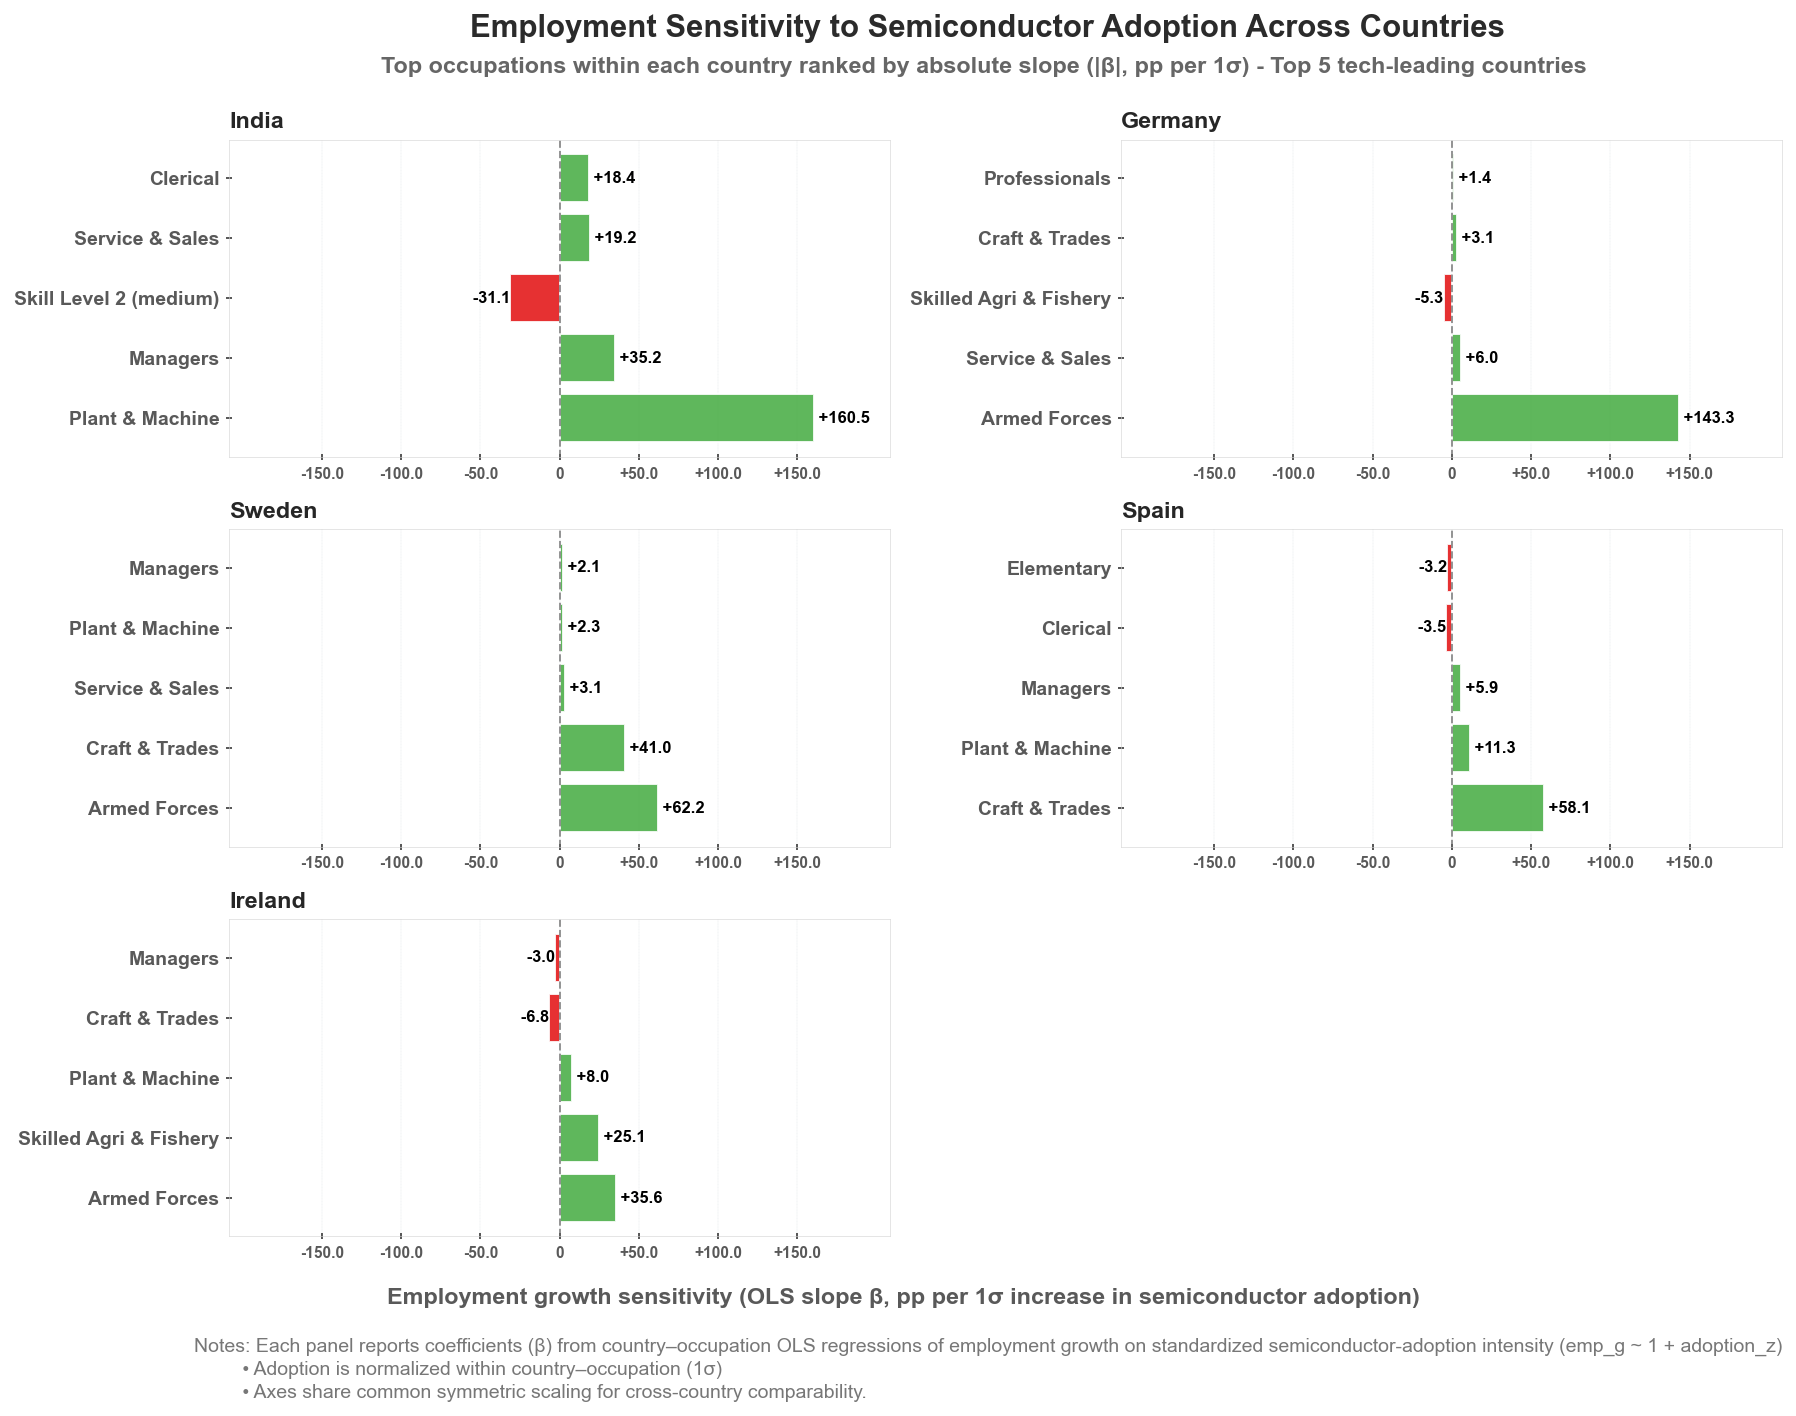

In [151]:
# ===== Country panels — Top-|β| occupations as bars (tech-leading Top 10, fixed order) =====
# Prereqs assumed: _ols_slope(...), and color constants TITLE_CLR, SUBTITLE_CLR
# ---------------- CONFIG ----------------
OCC_COL              = "Occupation_Group"
MIN_YEARS_PER_CELL   = 6
COUNTRIES_MAX        = 5           # show top 5 countries
TOP_OCC_PER_CT       = 5
LABEL_WRAP           = 22
ORDER_MODE           = "pos"       # 'pos' (mean β), 'abs' (mean |β|), 'neg' (mean β asc)

# Common tick template (we’ll reuse across all panels)
BASE_TICKS = np.array([-150, -100, -50, 0, 50, 100, 150], dtype=float)
def _tick_label(v):
    # 0, ±0.25, ±0.5 with 2 decimals; ±1, ±2 with 1 decimal
    if v == 0:
        return "0"
    return f"{v:+.2f}" if abs(v) < 1 else f"{v:+.1f}"

# ---------------- DATA PREP ----------------
df = data[["Country", "Year", OCC_COL, "adoption_z", "emp_g"]].dropna().copy()
df = df[df["Country"].isin(tech_countries)].copy()

# keep cells with enough years & nonzero adoption variation
df = (df.groupby(["Country", OCC_COL], group_keys=False)
        .filter(lambda g: len(g) >= MIN_YEARS_PER_CELL and g["adoption_z"].std(ddof=1) > 0))

# compute slope β per country × occupation
rows = []
for (c, o), g in df.groupby(["Country", OCC_COL], sort=False):
    rows.append({
        "Country": c,
        "Occupation": o,
        "beta": _ols_slope(g["adoption_z"], g["emp_g"]),
        "N": len(g),
    })
res = pd.DataFrame(rows).dropna(subset=["beta"])
if res.empty:
    raise ValueError("No valid cells after filtering.")

# ---------------- ORDER COUNTRIES ----------------
def _rank_countries(res_df, mode="pos"):
    grp = res_df.groupby("Country")["beta"]
    if mode == "pos":
        metric = grp.mean().sort_values(ascending=False)
    elif mode == "abs":
        metric = grp.apply(lambda s: s.abs().mean()).sort_values(ascending=False)
    elif mode == "neg":
        metric = grp.mean().sort_values(ascending=True)
    else:
        raise ValueError("ORDER_MODE must be 'pos', 'abs', or 'neg'.")
    return metric.index.tolist()

ct_order = [c for c in _rank_countries(res, ORDER_MODE) if c in tech_countries][:COUNTRIES_MAX]

# ---------------- SHARED LIMITS & TICKS ----------------
abs_global = float(np.abs(res["beta"]).max())
# symmetric headroom (20% of span) but never below ±2
lim = max(1.5, abs_global * 1.3) if abs_global > 0 else 1.5

# We will use the same limits for all panels so comparisons are fair
xlim_shared = (-lim, +lim)

# Use the full template of ticks; they’ll all be visible because lim >= 2
ticks_shared = BASE_TICKS
ticklabels_shared = [_tick_label(v) for v in ticks_shared]

# ---------------- FIGURE ----------------
n_ct  = len(ct_order)
ncols = 2
nrows = int(np.ceil(n_ct / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(6.8*ncols, 3.4*nrows), dpi=140, squeeze=False)

from textwrap import wrap

for ax, ct in zip(axs.flat, ct_order):
    sub = (res[res["Country"] == ct]
            .assign(absb=lambda s: s["beta"].abs())
            .sort_values("absb", ascending=False)
            .head(TOP_OCC_PER_CT))
    if sub.empty:
        ax.axis("off"); continue

    y        = np.arange(len(sub))
    ylabels  = ["\n".join(wrap(o, width=LABEL_WRAP)) for o in sub["Occupation"]]
    colors   = np.where(sub["beta"] >= 0, "#4daf4a", "#e41a1c")

    ax.barh(y, sub["beta"], color=colors, alpha=0.9)

    # numeric labels at bar ends (original β units)
    for yi, b in zip(y, sub["beta"]):
        ax.text(b, yi, f" {b:+.1f}", va="center",
                ha=("left" if b >= 0 else "right"),
                fontsize=8.5, color="black", weight="semibold")

    # axis + grid + titles
    ax.set_yticks(y)
    ax.set_yticklabels(ylabels, fontsize = 10, fontweight="semibold", color = AXIS_TEXT_CLR)
    ax.axvline(0, color="#666", lw=1, ls="--", alpha=0.7)

    # shared symmetric x-limits and fixed ticks (±2 always shown)
    ax.set_xlim(*xlim_shared)
    ax.set_xticks(ticks_shared)
    ax.set_xticklabels(ticklabels_shared, fontsize=8, color=AXIS_TEXT_CLR, fontweight="semibold")
    ax.grid(axis="x", which="minor", alpha=0.08)
    ax.set_title(ct, loc="left", fontsize=12, fontweight="bold")

# blank unused panels (if any)
for k in range(n_ct, nrows*ncols):
    axs.flat[k].axis("off")

# ---------------- TITLES / NOTES ----------------
fig.suptitle("Employment Sensitivity to Semiconductor Adoption Across Countries",
        x=0.3, y=0.97, fontsize=16, ha="left", fontweight="bold", color=TITLE_CLR)

# (Place your subtitle wherever you prefer; here is a common placement)
fig.text(0.57, 0.94,
        f"Top occupations within each country ranked by absolute slope (|β|, pp per 1σ)"
        f" - Top {COUNTRIES_MAX} tech-leading countries",
        ha="center", va="top", fontsize=12, color=SUBTITLE_CLR, weight="semibold", linespacing=1.6)
ax.set_xlabel("Employment growth sensitivity (OLS slope β, pp per 1σ increase in semiconductor adoption)",
            fontsize=12, labelpad=13.5, color=AXIS_TEXT_CLR, weight="semibold", x = 1.02)

fig.text(
    0.155, -0.002,
    "Notes: Each panel reports coefficients (β) from country–occupation OLS regressions of employment growth "
    "on standardized semiconductor-adoption intensity (emp_g ~ 1 + adoption_z)\n"
    "         • Adoption is normalized within country–occupation (1σ) \n"
    "         • Axes share common symmetric scaling for cross-country comparability.",
    ha="left", va="bottom", fontsize=10, color=FOOTNOTE_CLR, linespacing=1.35
)
fig.tight_layout(rect=[0.05, 0.05, 1, 0.95])

* *Rationale:*

    Same visualization as above, but bars share a common axis using a sign-preserving √ (square-root) transform to compress extreme values while preserving direction. This adjustment improves readability by allowing large and small sensitivities to be compared on the same scale without distorting the sign or relative magnitude of effects.

    P.S. For an analysis focused on variation across countries with a few very large effects, the signed–sqrt shared scale gives the cleanest, most informative view without 
    concealing the extremes. 

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\3632168124.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(["Country",OCC_COL], group_keys=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\3632168124.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (c,o), g in df.groupby(["Country",OCC_COL], sort=False):


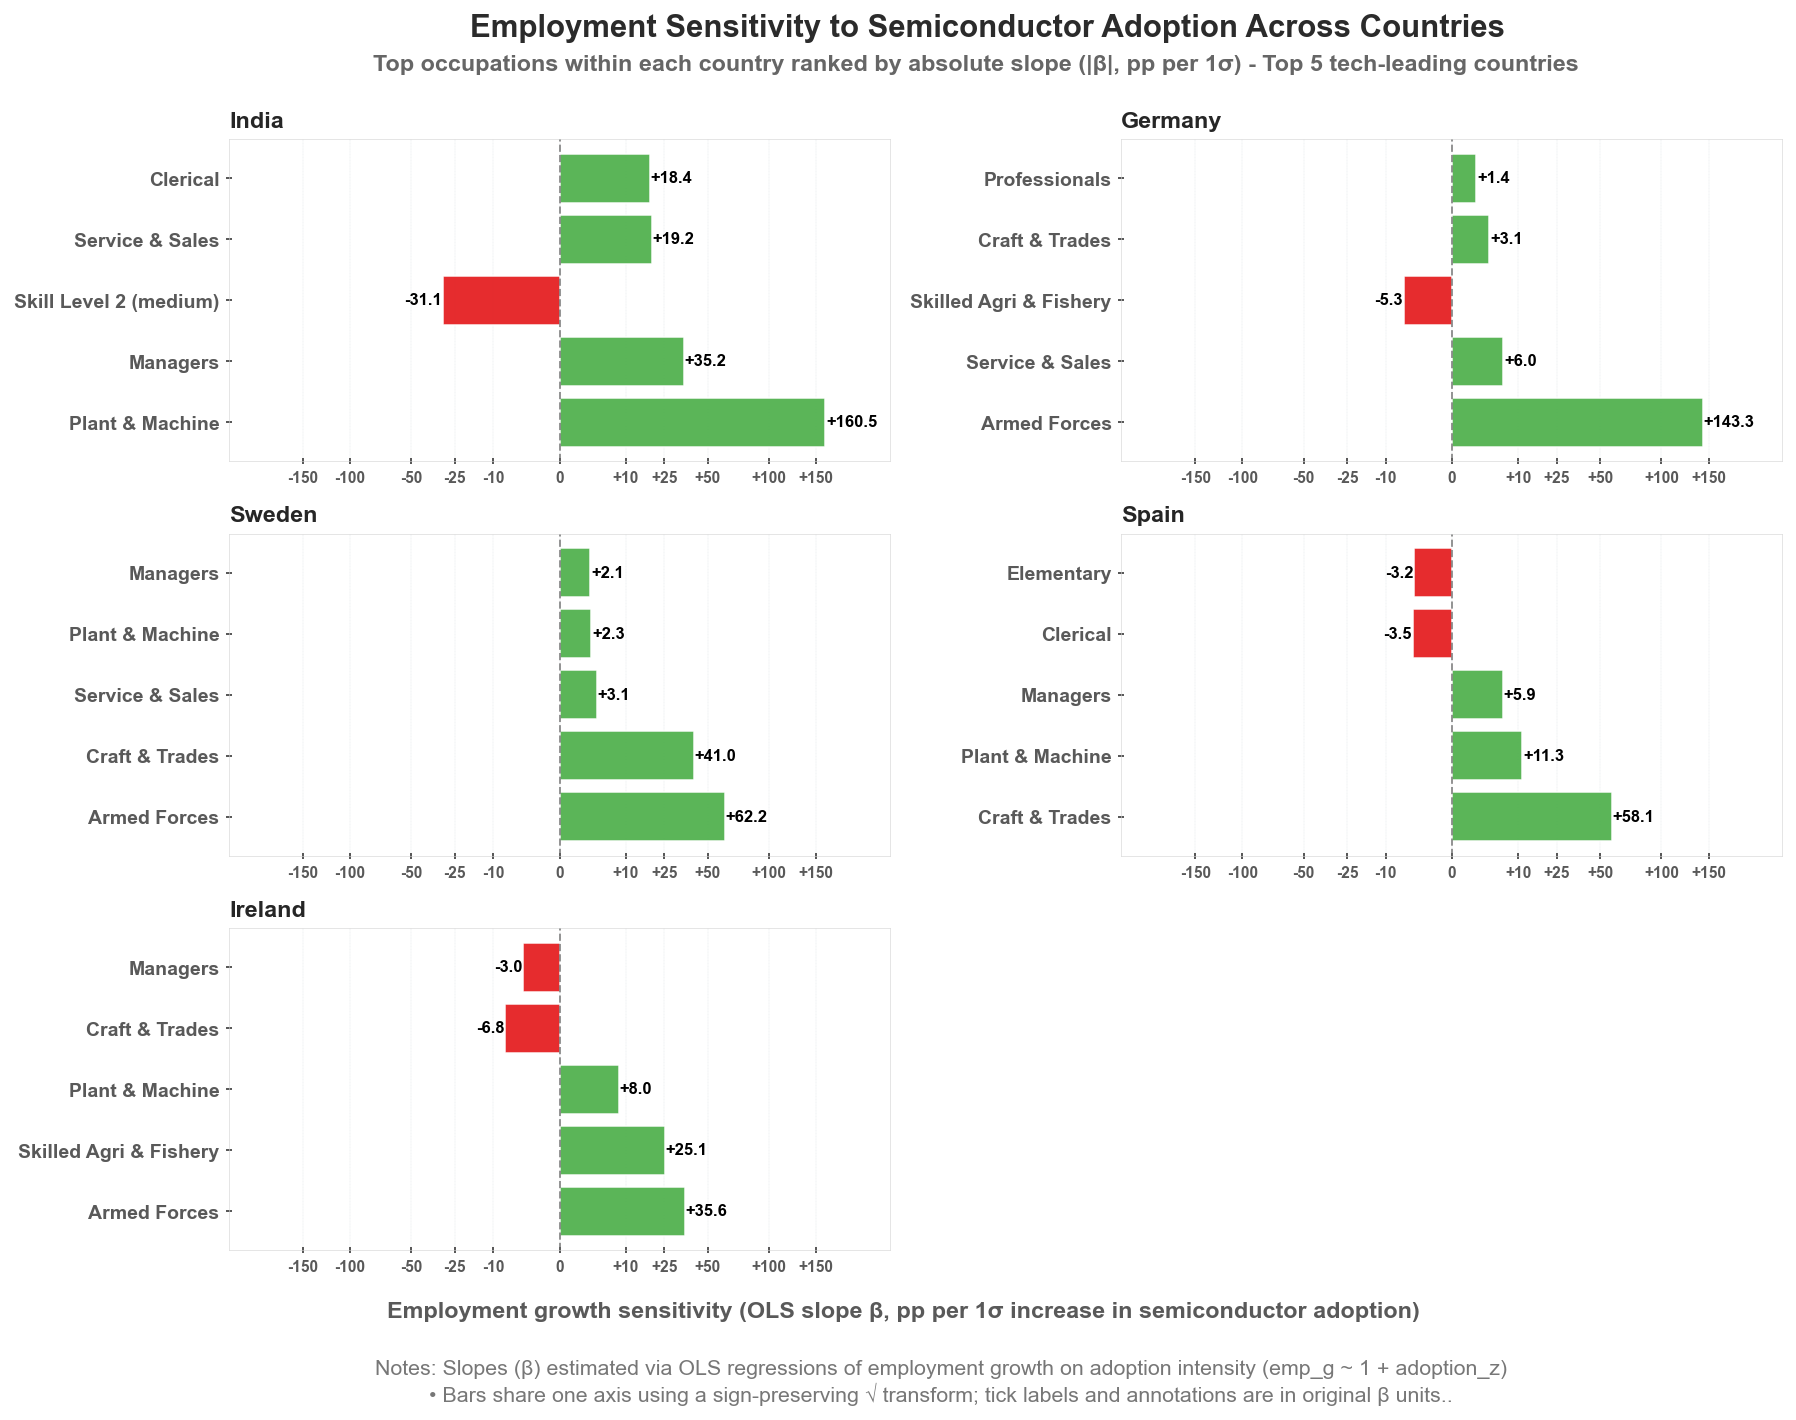

In [152]:
# ===== Country panels — Top-|β| occupations (Top 10 tech leaders; shared √ axis) =====
# Assumes _ols_slope(x, y) 

# ---- input ----
# tech_countries 

OCC_COL = "Occupation_Group"
MIN_YEARS_PER_CELL = 6
COUNTRIES_MAX   = 5        # << show Top 5
TOP_OCC_PER_CT  = 5
LABEL_WRAP      = 22
ORDER_MODE      = "pos"     # 'pos' (mean β), 'abs' (mean |β|), 'neg' (mean β asc)
TICK_COUNT      = 9
HEADROOM_FRAC   = 0.55

# --- transforms & helpers ---
def _sign_sqrt(x):
    x = np.asarray(x, float)
    return np.sign(x) * np.sqrt(np.abs(x))

def _rank_countries(res_df, mode="pos"):
    grp = res_df.groupby("Country")["beta"]
    if mode == "pos":
        metric = grp.mean().sort_values(ascending=False)
    elif mode == "abs":
        metric = grp.apply(lambda s: s.abs().mean()).sort_values(ascending=False)
    elif mode == "neg":
        metric = grp.mean().sort_values(ascending=True)
    else:
        raise ValueError("ORDER_MODE must be 'pos', 'abs', or 'neg'.")
    return metric.index.tolist()

# --- data prep (FILTER TO TECH COUNTRIES) ---
df = data[["Country","Year",OCC_COL,"adoption_z","emp_g"]].dropna().copy()
df = df[df["Country"].isin(tech_countries)].copy()

df = (df.groupby(["Country",OCC_COL], group_keys=False)
        .filter(lambda g: len(g) >= MIN_YEARS_PER_CELL and g["adoption_z"].std(ddof=1) > 0))

rows = []
for (c,o), g in df.groupby(["Country",OCC_COL], sort=False):
    rows.append({"Country": c, "Occupation": o,
                "beta": _ols_slope(g["adoption_z"], g["emp_g"]), "N": len(g)})
res = pd.DataFrame(rows).dropna(subset=["beta"])
if res.empty: raise ValueError("No valid cells after filtering.")

# --- pick Top 10 tech leaders by ORDER_MODE ---
ct_order = _rank_countries(res, ORDER_MODE)            # ranked list within tech_countries
ct_order = [c for c in ct_order if c in tech_countries][:COUNTRIES_MAX]

# --- shared axis (transform space) ---
global_min = float(res["beta"].min())
global_max = float(res["beta"].max())
# force symmetric range (balanced around zero)
limit = max(abs(global_min), abs(global_max)) * (1 + HEADROOM_FRAC)
tmin, tmax = -np.sqrt(limit), np.sqrt(limit)   # transform to sign-preserving sqrt space
beta_ticks = np.array([-150, -100, -50, -25, -10, 0, 10, 25, 50, 100, 150])   # fixed ticks
tick_positions = _sign_sqrt(beta_ticks)                            # positions (transform)

# --- figure ---
n_ct, ncols = len(ct_order), 2
nrows = int(np.ceil(n_ct / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(6.8*ncols, 3.4*nrows), dpi=140, squeeze=False)

for ax, ct in zip(axs.flat, ct_order):
    sub = (res[res["Country"]==ct]
            .assign(absb=lambda s: s["beta"].abs())
            .sort_values("absb", ascending=False)
            .head(TOP_OCC_PER_CT))
    if sub.empty: ax.axis("off"); continue

    y = np.arange(len(sub))
    ylabels = ["\n".join(wrap(o, width=LABEL_WRAP)) for o in sub["Occupation"]]
    betas   = sub["beta"].to_numpy()
    widths  = _sign_sqrt(betas)
    colors  = np.where(betas>=0, "#4daf4a", "#e41a1c")

    ax.barh(y, widths, color=colors, alpha=0.92, edgecolor="white", linewidth=0.8)

    # labels in ORIGINAL β
    dx = 0.0012 * (tmax - tmin)
    for yi, b, w in zip(y, betas, widths):
        ax.text(w + (dx if b>=0 else -dx), yi, f"{b:+.1f}",
                va="center", ha=("left" if b>=0 else "right"),
                fontsize=8.5, color="black", weight="semibold")

    ax.set_yticks(y); ax.set_yticklabels(ylabels, fontsize = 10, color = AXIS_TEXT_CLR, fontweight="semibold")
    ax.set_xlim(tmin, tmax)
    ax.axvline(0.0, color="#666", lw=1, ls="--", alpha=0.7)

    ax.set_xticks(tick_positions)
    ax.set_xticklabels(["0" if v==0 else (f"{v:+.0f}" if abs(v)>=1 else f"{v:+.2f}") for v in beta_ticks], fontsize=8, color=AXIS_TEXT_CLR, weight="semibold")
    ax.grid(axis="x", which="minor", alpha=0.08)
    ax.set_title(ct, loc="left", fontsize=12, fontweight="bold")

# blank unused panels
for k in range(n_ct, nrows*ncols):
    axs.flat[k].axis("off")

# --- titles / notes ---
fig.suptitle("Employment Sensitivity to Semiconductor Adoption Across Countries",
            x=0.3, y=0.98, ha="left", fontsize=16, fontweight="bold", color=TITLE_CLR)
fig.text(1.13, 1.2,
            "Top occupations within each country ranked by absolute slope (|β|, pp per 1σ)"
            " - Top 5 tech-leading countries",
            transform=axs.flat[0].transAxes, ha="center", va="bottom",
            fontsize=12, color=SUBTITLE_CLR, weight="semibold", linespacing=1.55)
ax.set_xlabel("Employment growth sensitivity (OLS slope β, pp per 1σ increase in semiconductor adoption)",
            fontsize=12, labelpad=13.5, color=AXIS_TEXT_CLR, weight="semibold", x = 1.02)
fig.text(0.25, 0.005,
            "Notes: Slopes (β) estimated via OLS regressions of employment growth on adoption intensity (emp_g ~ 1 + adoption_z)\n"
            "         • Bars share one axis using a sign-preserving √ transform; tick labels and annotations are in original β units..",
            ha="left", va="bottom", fontsize=11, color=FOOTNOTE_CLR)

fig.tight_layout(rect=[0.05, 0.05, 1, 0.96])

**Visualization: Employment Growth During High vs Low Semicondutor Adoption**

* *Research Question:*

    **Do countries experience faster employment growth during periods of high semiconductor adoption compared to periods of low adoption?**

* *Rationale:*

    This visualization compares average employment growth across years of high and low semiconductor adoption for leading technology economies. By contrasting country-level growth rates between these adoption phases, the analysis highlights whether technological diffusion aligns with labor expansion or contraction. The use of paired “high vs. low” comparisons provides a clear measure of sensitivity to adoption intensity, helping identify countries where semiconductor-driven transformation supports employment growth versus those where it coincides with workforce decline.

* **Methodology:**

    We restrict the dataset to tech-leading countries and valid country–year rows with employment growth (emp_g) and an adoption index (adoption_z). For each country–year we summarize **employment growth across occupations (median)** and keep years with at least 8 occupation rows. Within each country, **years are binned by adoption intensity** using the **within-country quartiles**: Low ≤ Q1 and High ≥ Q3; countries are retained only if each bin contains ≥4 years. For every country × bin we compute the **average employment growth and its uncertainty (±1.96×SE** across years when n≥3). We then form **Δ = High − Low** and keep the **Top 10 countries by |Δ|**. The chart plots a dumbbell per country: grey/orange points are Low/High bin means with whiskers for CIs, the connector is green if Δ>0 and red if Δ<0, background bands separate growth (Δ>0) from decline (Δ<0), and labels show Δ in percentage points along with sample sizes (nL, nH).

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1868192240.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cy = cy.groupby("Country", group_keys=False).apply(_bin_country)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1868192240.py:82: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tbl = cy.groupby(["Country","bin"]).apply(_agg).reset_index()


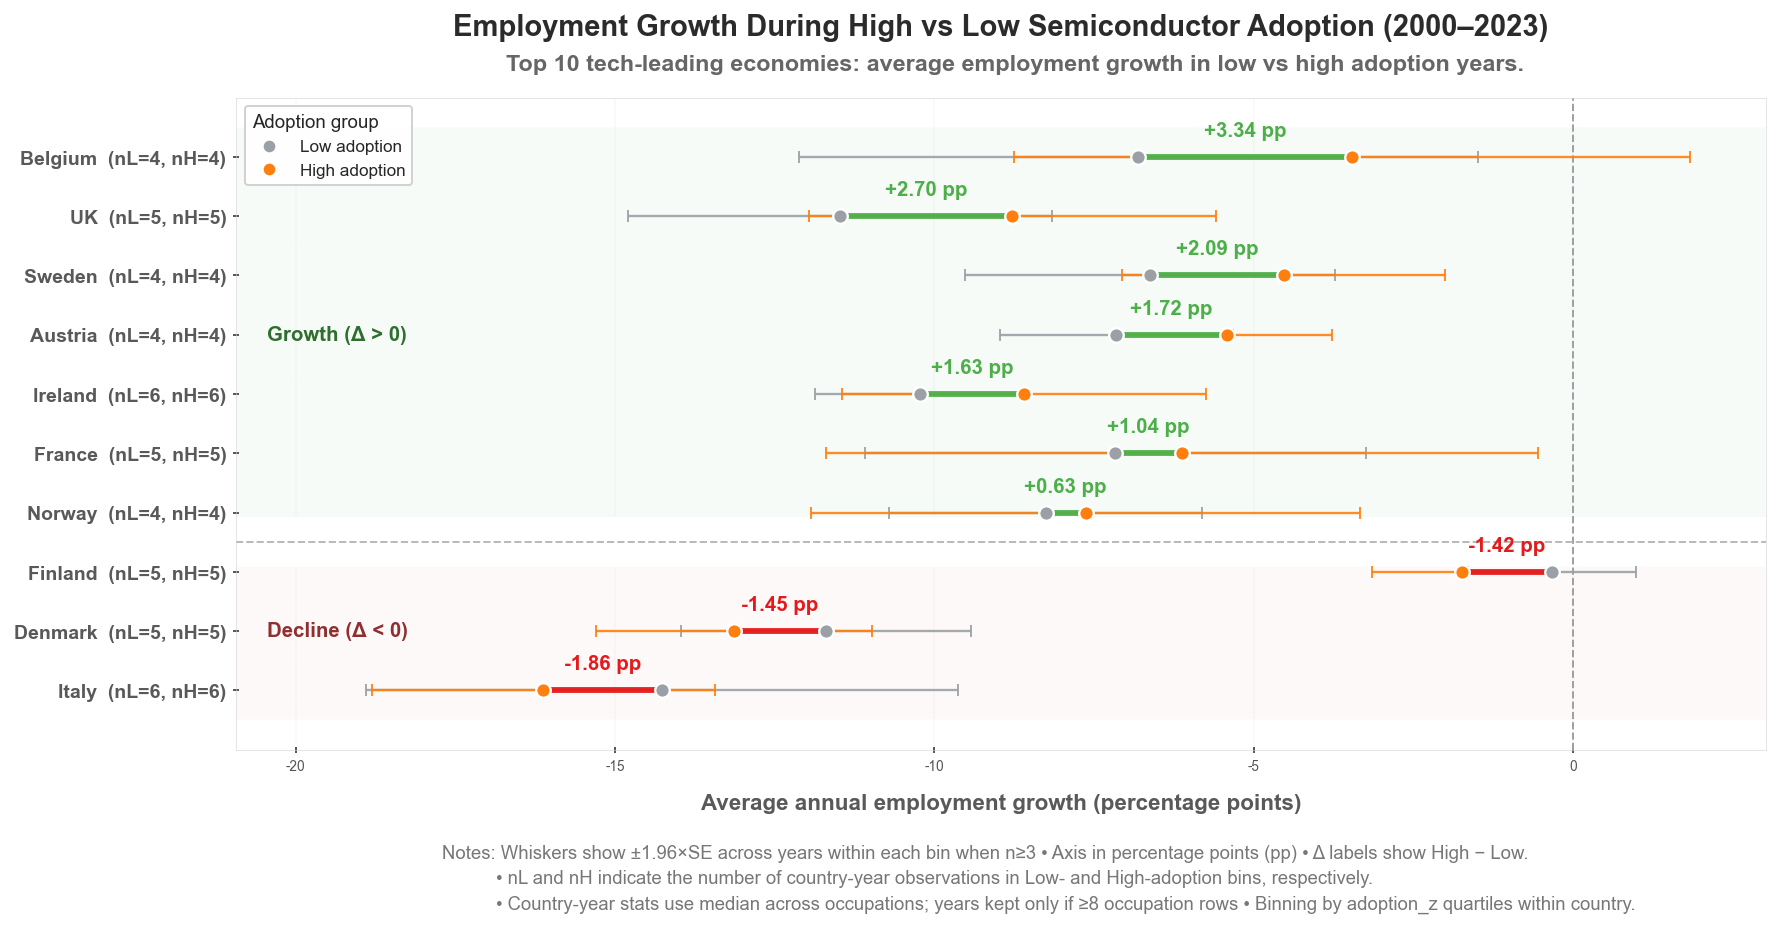

In [153]:
#==========import===============================
# tech_countries

# ================== SETTINGS ==================
LOW_Q, HIGH_Q       = 0.25, 0.75
MIN_ROWS_CY         = 8
MIN_YEARS_PER_BIN   = 4
TOP_N               = 10         # << show Top 10 only
USE_MEDIAN          = True
SHOW_CI             = True
CI_MIN_N            = 3
SHOW_COUNTS_IN_YLAB = True

# Colors
LOW_PT, HIGH_PT     = "#9aa0a6", "#ff7f0e"
POS_LINK, NEG_LINK  = "#4daf4a", "#e41a1c"
GROW_BG, DECL_BG    = "#eaf5ea", "#fdeeee"

# ---- USE YOUR TECH LIST ----
# expects 'tech_countries' to be defined earlier in your notebook
TECH_LEADERS = list(dict.fromkeys(tech_countries))  # de-dup, keep order

# ================== START FROM YOUR DATAFRAME ==================
_required = {"Country","Year","emp_g","adoption_z"}
if not _required.issubset(set(data.columns)):
    missing = _required - set(data.columns)
    raise ValueError(f"Missing required columns: {missing}")

d0 = (
    data.dropna(subset=["Country","Year","emp_g","adoption_z"])
        .assign(Year=lambda d: d["Year"].astype(int))
)

# Apply your renames if present
if "country_rename" in globals():
    d0["Country"] = d0["Country"].replace(country_rename)

# Keep only tech leaders
d0 = d0[d0["Country"].isin(TECH_LEADERS)].copy()
if d0.empty:
    raise ValueError("No rows after filtering to tech_countries. "
                    "Check names vs. your data (after renaming if any).")

# =========== COUNTRY–YEAR STATS ===========
cy = (d0.groupby(["Country","Year"])["emp_g"]
        .agg(med="median", avg="mean", n="size")
        .reset_index())
cy["eg"] = cy["med"] if USE_MEDIAN else cy["avg"]

# keep country–years w/ enough occupation rows
cy = cy[cy["n"] >= MIN_ROWS_CY].copy()

# adoption per country–year
adopt_cy = d0.groupby(["Country","Year"], as_index=False)["adoption_z"].mean()
cy = (cy.merge(adopt_cy, on=["Country","Year"], how="left")
        .dropna(subset=["adoption_z","eg"]))

# =========== BIN YEARS: LOW vs HIGH ===========
def _bin_country(g):
    lo = g["adoption_z"].quantile(LOW_Q)
    hi = g["adoption_z"].quantile(HIGH_Q)
    g["bin"] = np.where(g["adoption_z"] <= lo,  "Low adoption",
                np.where(g["adoption_z"] >= hi, "High adoption", np.nan))
    return g

cy = cy.groupby("Country", group_keys=False).apply(_bin_country)
cy = cy.dropna(subset=["bin"])

# require enough years in both bins
counts = cy.groupby(["Country","bin"])["Year"].size().unstack(fill_value=0)
keep = counts[(counts.get("Low adoption",0) >= MIN_YEARS_PER_BIN) &
            (counts.get("High adoption",0) >= MIN_YEARS_PER_BIN)].index
cy = cy[cy["Country"].isin(keep)].copy()

# =========== COUNTRY-LEVEL (mean across years) ===========
def _agg(d):
    m = d["eg"].mean()
    n = d["eg"].size
    se = d["eg"].std(ddof=1)/np.sqrt(n) if n > 1 else 0.0
    return pd.Series({"mean": m, "ci": 1.96*se, "n": n})

tbl = cy.groupby(["Country","bin"]).apply(_agg).reset_index()

wide = (tbl.pivot(index="Country", columns="bin", values=["mean","ci","n"])
        .sort_index(axis=1))
wide = wide.dropna(subset=[("mean","High adoption"), ("mean","Low adoption")])

# Δ and sample sizes
wide[("delta","Δ (pp)")] = wide[("mean","High adoption")] - wide[("mean","Low adoption")]

# ----- keep only Top 10 within tech_countries by |Δ| -----
if wide.empty:
    raise ValueError("No countries left after binning requirements.")
top_idx = (wide[("delta","Δ (pp)")].abs()
            .sort_values(ascending=False)
            .head(min(TOP_N, len(wide)))
            .index)
wide = wide.reindex(top_idx).sort_values(("delta","Δ (pp)"))

# tidy for plotting
plot = pd.DataFrame({
    "Country":   wide.index,
    "Low_mean":  wide[("mean","Low adoption")].to_numpy(),
    "Low_ci":    wide[("ci","Low adoption")].fillna(0).to_numpy()  if SHOW_CI else np.zeros(len(wide)),
    "Low_n":     wide[("n","Low adoption")].fillna(0).astype(int).to_numpy(),
    "High_mean": wide[("mean","High adoption")].to_numpy(),
    "High_ci":   wide[("ci","High adoption")].fillna(0).to_numpy() if SHOW_CI else np.zeros(len(wide)),
    "High_n":    wide[("n","High adoption")].fillna(0).astype(int).to_numpy(),
    "Delta":     wide[("delta","Δ (pp)")].to_numpy(),
}).reset_index(drop=True)

# ================== DUMBBELL PLOT ==================
def pp_tick(x, pos):  # decimal to percentage points
    return f"{x:.0f}"

neg   = plot.loc[plot["Delta"].lt(0)].copy()
pos   = plot.loc[plot["Delta"].ge(0)].copy()
plot2 = pd.concat([neg, pos], ignore_index=True)
n_neg = len(neg); n_pos = len(pos); n = len(plot2)

fig, ax = plt.subplots(figsize=(12.8, 6))

# bands
gap = 0.8
if n_neg > 0:
    ax.axhspan(-0.5, n_neg - 0.5 - gap/2, facecolor=DECL_BG, alpha=0.35, zorder=0)
if n_neg < n:
    ax.axhspan(n_neg - 0.5 + gap/2, n - 0.5, facecolor=GROW_BG, alpha=0.35, zorder=0)
if 0 < n_neg < n:
    ax.axhspan(n_neg - 0.5 - gap/2, n_neg - 0.5 + gap/2, facecolor="white", zorder=1)
    ax.axhline(n_neg - 0.5, color="#b9b9b9", lw=1, ls="--", zorder=2)

ax.axvline(0, color="#9aa0a6", lw=1, ls="--", zorder=1)

y = np.arange(n)
for yi, r in enumerate(plot2.itertuples(index=False)):
    lo, hi, dlt = float(r.Low_mean), float(r.High_mean), float(r.Delta)
    lci = float(getattr(r, "Low_ci", 0) or 0)
    hci = float(getattr(r, "High_ci", 0) or 0)
    nl  = int(getattr(r, "Low_n", 0) or 0)
    nh  = int(getattr(r, "High_n", 0) or 0)
    link_col = POS_LINK if dlt >= 0 else NEG_LINK

    if SHOW_CI and nl >= CI_MIN_N and lci > 0:
        ax.errorbar(lo, yi, xerr=lci, fmt='none', ecolor=LOW_PT,
                    elinewidth=1.2, capsize=3, alpha=0.9, zorder=3)
    if SHOW_CI and nh >= CI_MIN_N and hci > 0:
        ax.errorbar(hi, yi, xerr=hci, fmt='none', ecolor=HIGH_PT,
                    elinewidth=1.2, capsize=3, alpha=0.9, zorder=3)

    ax.hlines(yi, lo, hi, color=link_col, lw=3, zorder=3, alpha=0.95)
    ax.scatter(lo, yi, s=56, color=LOW_PT,  edgecolor="white", lw=1.2, zorder=4)
    ax.scatter(hi, yi, s=56, color=HIGH_PT, edgecolor="white", lw=1.2, zorder=4)

    x_mid = (lo + hi) / 2
    ax.text(x_mid, yi + 0.28, f"{dlt:+.2f} pp",
            ha="center", va="bottom", fontsize=10.5,
            color=link_col, weight="semibold")

ylabs = plot2["Country"].tolist()
if SHOW_COUNTS_IN_YLAB:
    ylabs = [f"{c}  (nL={nl}, nH={nh})" for c, nl, nh in
            zip(plot2["Country"], plot2["Low_n"], plot2["High_n"])]
ax.set_yticks(y)
ax.set_yticklabels(ylabs, color = AXIS_TEXT_CLR, weight = "semibold", fontsize= 10)

xmin, xmax = ax.get_xlim()
pad = 0.05   # 5% headroom
xmin_new = xmin - (abs(xmin) * pad)
xmax_new = xmax + (abs(xmax) * pad)
ax.set_xlim(xmin_new, xmax_new)
ax.xaxis.set_major_formatter(FuncFormatter(pp_tick))
ax.set_xlabel("Average annual employment growth (percentage points)", fontsize=11.5, color = AXIS_TEXT_CLR, labelpad=10, weight="semibold")

ax.set_title("Employment Growth During High vs Low Semiconductor Adoption (2000–2023)", fontsize = 15, color = TITLE_CLR, pad=32)
fig.text(0.57, 0.915,
        "Top 10 tech-leading economies: average employment growth in low vs high adoption years.",
        ha="center", va="center", fontsize=12, color = SUBTITLE_CLR, weight = "semibold")

# section labels
x0, x1 = ax.get_xlim()
xr = x1 - x0
label_x = x0 + 0.02 * xr
if n_neg > 0:
    ax.text(label_x, (n_neg - 1)/2, "Decline (Δ < 0)", color="#8f2f2f",
            fontsize=10.5, weight="semibold", va="center")
if n_neg < n:
    ax.text(label_x, n_neg + (n - n_neg - 1)/2, "Growth (Δ > 0)", color="#2e6e2e",
            fontsize=10.5, weight="semibold", va="center")

# legend
handles = [
    Line2D([0],[0], marker='o', color='none', markerfacecolor=LOW_PT,
            markeredgecolor="white", lw=0, markersize=7, label="Low adoption"),
    Line2D([0],[0], marker='o', color='none', markerfacecolor=HIGH_PT,
            markeredgecolor="white", lw=0, markersize=7, label="High adoption"),
]
leg = ax.legend(handles=handles, title="Adoption group", loc="upper left")
leg._legend_box.align = "left"


# Caption / notes
foot1 = (
    "Notes: Whiskers show ±1.96×SE across years within each bin when n≥{minn} "
    "• Axis in percentage points (pp) • Δ labels show High − Low. "
).format(minn=CI_MIN_N, stat=("median" if USE_MEDIAN else "mean"), minrows=MIN_ROWS_CY)

foot2 = (
        "• nL and nH indicate the number of country-year observations in Low- and High-adoption bins, respectively. "
).format(minn=CI_MIN_N, stat=("median" if USE_MEDIAN else "mean"), minrows=MIN_ROWS_CY)

foot3 = (
        "• Country-year stats use {stat} across occupations; years kept only if ≥{minrows} occupation rows "
    "• Binning by adoption_z quartiles within country."
).format(minn=CI_MIN_N, stat=("median" if USE_MEDIAN else "mean"), minrows=MIN_ROWS_CY)


fig.text(0.25, - 0.03, foot1, fontsize=9.5, color=FOOTNOTE_CLR, ha="left")

fig.text(0.28, - 0.06, foot2, fontsize=9.5, color=FOOTNOTE_CLR, ha="left")

fig.text(0.28, - 0.09, foot3, fontsize=9.5, color=FOOTNOTE_CLR, ha="left")

plt.tight_layout()

**Visualization: Semiconductor Adoption vs Employment Growth in Tech-Leading Economies (2000-2023)**

* *Research question:*

    **Do countries with the highest average semiconductor adoption also experience stronger employment growth?**

* *Rationale:*

    This figure ranks the top-adopting economies and places their long-run average employment growth (pp) beside their average adoption intensity (z-score). The split panels (independent scales) let compare adoption levels with labor outcomes without conflating units. The layout quickly reveals alignment or divergence—e.g., countries with high adoption but weak/negative growth—informing where complementary policies or structural factors may be driving different employment responses.

* **Methodology:**

    Country-level annual data on employment growth (**emp_g**) and semiconductor adoption intensity (**adoption_z**) were aggregated and standardized within each country as z-scores based on semiconductor import changes. For each tech-leading country, **long-run averages of both indicators** were computed, and the **top ten** countries with the **highest average adoption** levels were selected. The figure displays two horizontal bar panels: the left shows average employment growth (percentage points), highlighting contractions in red; the right shows average semiconductor adoption (z-scores) in green. **Independent scales** are used to account **for differing units**, and country ordering follows average adoption levels. Annotated bars and reference lines provide a clear comparison of technological diffusion and its long-term employment outcomes.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\4096240307.py:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(kpis_for_country)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\4096240307.py:161: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.08, 0.06, 1, 0.96])


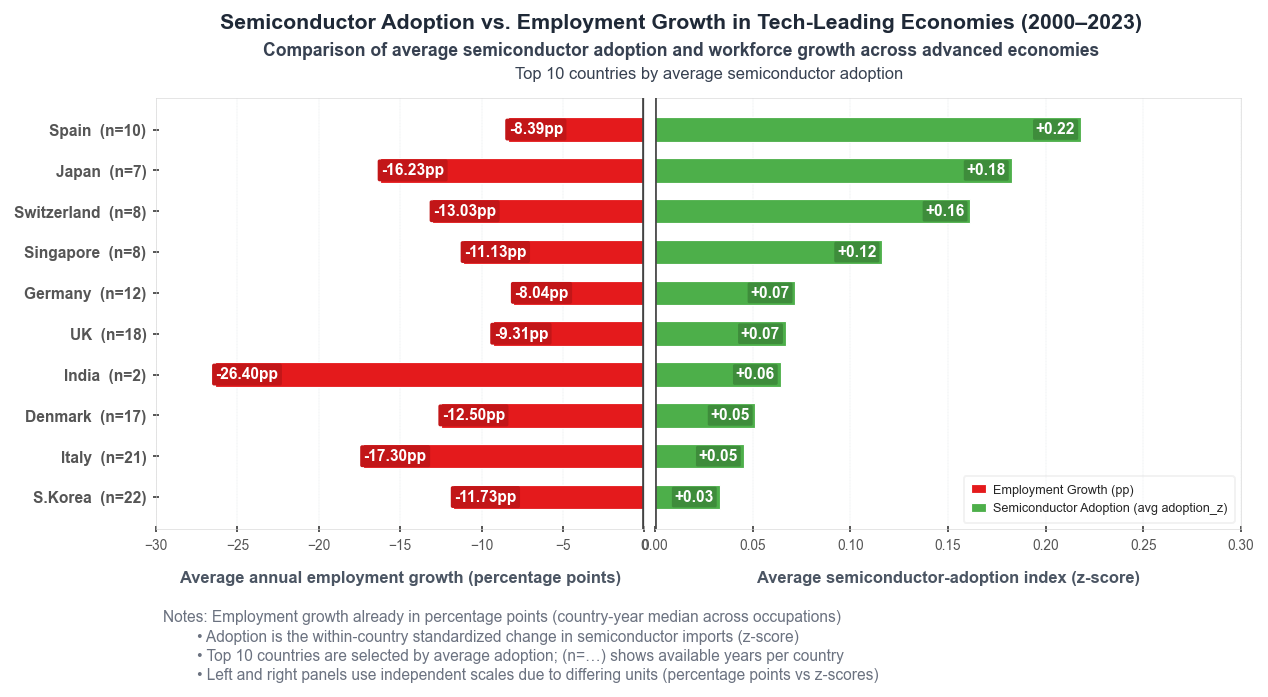

In [155]:
# ---------------------------------------------------------
# ASSUMPTIONS:
#   - data: columns [Country, Year, emp_g, adoption_z]
#   - tech_countries
# ---------------------------------------------------------
# --- COLORS & STYLE ---
TITLE_CLR     = "#1f2937"
SUBTITLE_CLR  = "#374151"
AXIS_TEXT_CLR = "#4b5563"
FOOTNOTE_CLR  = "#6b7280"

EMP_CLR   = "#e41a1c"   # red
ADOPT_CLR = "#4daf4a"   # green
ROW_BAND  = "#f3f6fb"

# --- CONFIG ---
use_median   = True
title_suffix = " (2000–2023)"

# --- POSITIONING CONSTANTS ---
EMP_PAD_IN   = 0.05
EMP_PAD_OUT  = 0.25
ADP_PAD_IN   = -0.023
ADP_MIN_BAR  = -0.002

# ---------------------------------------------------------
# Helper Functions
# ---------------------------------------------------------
def darken(c, factor=0.7):
    """Darken a given color slightly."""
    r, g, b = to_rgb(c)
    return (r * factor, g * factor, b * factor)

def kpis_for_country(g: pd.DataFrame) -> pd.Series:
    """Aggregate country-level KPIs."""
    agg = np.median if use_median else np.mean
    return pd.Series({
        "years_total": g["Year"].nunique(),
        "emp_overall": agg(g["emp_g"]) if len(g) else np.nan,
        "adoption_avg": g["adoption_z"].mean(),
    })

# ---------------------------------------------------------
# DATA
# ---------------------------------------------------------
df_scoped = data[data["Country"].isin(tech_countries)].copy()

kpis = (df_scoped.groupby("Country")
    .apply(kpis_for_country)
    .reset_index()
    .sort_values("adoption_avg", ascending=False)
    .head(10)
    .reset_index(drop=True))

countries  = kpis["Country"].to_numpy()
adopt_vals = kpis["adoption_avg"].to_numpy()
emp_vals   = kpis["emp_overall"].to_numpy()
years      = kpis["years_total"].to_numpy()
y          = np.arange(len(countries))

# ---------------------------------------------------------
# FIGURE LAYOUT
# ---------------------------------------------------------
fig, (ax_emp, ax_adopt) = plt.subplots(ncols=2, figsize=(10, 4), gridspec_kw={"width_ratios": [1.0, 1.2], "wspace": 0.02})
bar_h = 0.6

# ---------------------------------------------------------
# LEFT PANEL: EMPLOYMENT GROWTH
# ---------------------------------------------------------
ax_emp.barh(y, emp_vals, height=bar_h, color=EMP_CLR, edgecolor="white", linewidth=0.6, label="Employment Growth (pp)", zorder=2)

emp_min = float(np.nanmin(emp_vals))
emp_left = emp_min * 1.12
ax_emp.set_xlim(emp_left, 0.0)
ax_emp.axvline(0, color="#333", lw=1.1)

# X-axis formatting
left_floor = int(np.floor(emp_left / 5) * 5)
ax_emp.set_xticks(np.arange(left_floor, 1, 5))
ax_emp.set_xlabel("Average annual employment growth (percentage points)", fontsize=8.5, color=AXIS_TEXT_CLR, weight="semibold", labelpad=9)

# Y-labels with (n=years)
ax_emp.set_yticks(y)
ax_emp.set_yticklabels([f"{c}  (n={int(n)})" for c, n in zip(countries, years)], fontsize=8, fontweight="semibold")
ax_emp.invert_yaxis()
# 
# Pill label helper for employment bars
def add_emp_pill(x, y0, text):
    if x > -ADP_MIN_BAR:
        x_draw = x - EMP_PAD_OUT
    else:
        x_draw = x + EMP_PAD_IN
    ax_emp.text(
        x_draw, y0, text,
        ha="right" if x_draw < x else "left",
        va="center",
        fontsize=8,
        color="white",
        fontweight="semibold",
        bbox=dict(boxstyle="round,pad=0.22,rounding_size=0.12", fc=darken(EMP_CLR, 0.85), ec="none"), zorder=5)

for yi, v in zip(y, emp_vals):
    if np.isfinite(v):
        add_emp_pill(v, yi, f"{v:.2f}pp")

# ---------------------------------------------------------
# RIGHT PANEL: SEMICONDUCTOR ADOPTION
# ---------------------------------------------------------
ax_adopt.barh(y, adopt_vals, height=bar_h, color=ADOPT_CLR, edgecolor="white", linewidth=0.6, label="Semiconductor Adoption (avg adoption_z)", zorder=2)

# Match vertical range with left axis
ax_adopt.set_ylim(ax_emp.get_ylim())
ax_adopt.tick_params(axis="y", labelleft=False, length=0)

# Axis limits and labels
adopt_max = float(np.nanmax(adopt_vals)) if len(adopt_vals) else 0.25
ax_adopt.set_xlim(0, max(0.30, adopt_max * 1.35))
ax_adopt.set_xlabel("Average semiconductor-adoption index (z-score)", fontsize=8.5, color=AXIS_TEXT_CLR,  weight="semibold", labelpad=9)
ax_adopt.xaxis.set_major_locator(ticker.MultipleLocator(0.05))

# Pill labels for adoption bars
def add_adopt_pill(x, y0, text):
    if x < ADP_MIN_BAR:
        x_draw = x + ADP_MIN_BAR + 0.009
    else:
        x_draw = x + ADP_PAD_IN
    ax_adopt.text(x_draw, y0, text, ha="left", va="center", fontsize=8, color="white", fontweight="bold", 
                bbox=dict(boxstyle="round,pad=0.18,rounding_size=0.10", fc=darken(ADOPT_CLR, 0.80), ec="none"), zorder=5)
for yi, v in zip(y, adopt_vals):
    if np.isfinite(v):
        add_adopt_pill(v, yi, f"{v:+.2f}")
# ---------------------------------------------------------
# LEGEND (combined)
# ---------------------------------------------------------
h1, l1 = ax_emp.get_legend_handles_labels()
h2, l2 = ax_adopt.get_legend_handles_labels()
ax_adopt.legend(h1 + h2, l1 + l2, loc="lower right", fancybox=True, framealpha=0.25, borderpad=0.6, handlelength=1.2, handletextpad=0.5, fontsize=6.5)

# ---------------------------------------------------------
# TITLES
# ---------------------------------------------------------
fig.suptitle("Semiconductor Adoption vs. Employment Growth in Tech-Leading Economies" + title_suffix, fontsize=11, color=TITLE_CLR, fontweight="bold", y=1.03)
fig.text(0.5, 0.98, "Comparison of average semiconductor adoption and workforce growth across advanced economies",
    ha="center", va="top", fontsize=9, color=SUBTITLE_CLR, weight="semibold")
fig.text(0.52, 0.935, "Top 10 countries by average semiconductor adoption", ha="center", va="top", fontsize=8.5, color=SUBTITLE_CLR)
# ---------------------------------------------------------
# FOOTNOTE
# ---------------------------------------------------------
fig.text(0.13, -0.1,
    "Notes: Employment growth already in percentage points (country-year median across occupations)\n"
    "        • Adoption is the within-country standardized change in semiconductor imports (z-score)\n"
    "        • Top 10 countries are selected by average adoption; (n=…) shows available years per country\n"
    "        • Left and right panels use independent scales due to differing units (percentage points vs z-scores)",
    ha="left", va="center", fontsize=8, color=FOOTNOTE_CLR, linespacing=1.35)

# Reference zero lines
ax_emp.axvline(0, color="#444", lw=2.0, alpha=0.9, zorder=5)
ax_adopt.axvline(0, color="#444", lw=2.0, alpha=0.9, zorder=5)

# Layout
plt.tight_layout(rect=[0.08, 0.06, 1, 0.96])

In [39]:
tech_countries_canon = [
    'China', 'Korea, Rep.', 'United States of America', 'United Kingdom', 'Japan', 'Israel', 'Germany', 'India', 'Netherlands',
    'Singapore', 'France', 'Switzerland', 'Canada', 'Ireland', 'Sweden',
    'Finland', 'Italy', 'Australia', 'Austria', 'Belgium', 'Denmark', 'Norway', 'Spain'
]

**Visualization: R&D Investment and Employment Growth Across Tech-Leading Economies (2000-2023)**

* *Research Question:*

    **Do higher levels of R&D investment correspond to stronger employment growth?**

* *Rationale:*

    This visualization explores how national R&D intensity relates to long-run employment growth across tech-leading economies (2000–2023). By comparing countries’ median R&D expenditure (% of GDP) with their median employment growth, it assesses whether greater innovation investment supports stronger job creation. The regression line shows the overall trend, while color coding highlights countries performing above or below expectations, helping reveal where innovation-driven growth aligns—or diverges—from workforce expansion.

* **Methodology:**

     Country–year data for **R&D expenditure** (% of GDP) and **employment growth** (percentage-point change) are filtered to the period and **aggregated by country** using the **median**. Two datasets are built: (i) **all countries** (grey background bubbles) and (ii) a **tech-leading cohort** (colored foreground bubbles). If semiconductor-adoption data are available, **bubble sizes** are proportional to each country’s **average adoption** level; otherwise a fixed size is used. For the tech-leaders, a simple **OLS regression** is fit: **EmpGrowthc​=β0​+β1​R&Dc​+εc**​,and the **95% confidence band** around the fitted line is obtained via **2,000 bootstrap resamples** of countries (recording both fitted lines and slope distribution). Foreground bubbles are **colored by residuals** relative to the fitted line—**green** if a country’s growth is above the regression prediction, **red** if below—to highlight **over-/under-performance** given its R&D level. Vertical and horizontal dashed lines mark the **tech-leader medians** of R&D and employment growth, creating four labeled quadrants (low/high R&D × low/high growth). Axis limits and tick formatting are standardized; country labels are automatically nudged to reduce overlap. A **KPI** panel reports the **slope** (pp per +1% R&D), its **bootstrap CI, R², N**, and the **share of countries** in the high-R&D/high-growth quadrant.

     P.S. In applied economics and OECD-style data visualization, the **x-axis is typically anchored to the observed minimum** (around 0.5–5% for R&D), **not to zero**, when zero lies outside the meaningful data range. In this case (tech-leading countries) including 0 would waste axis space and distort scaling, since values cluster far from zero.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15000\1221967056.py:24: FutureWarning: The provided callable <function median at 0x0000022869A04C10> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  d_all.groupby("Country", as_index=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15000\1221967056.py:24: FutureWarning: The provided callable <function median at 0x0000022869A04C10> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  d_all.groupby("Country", as_index=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15000\1221967056.py:56: FutureWarning: The provided callable <function median at 0x0000022869A04C10> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To k

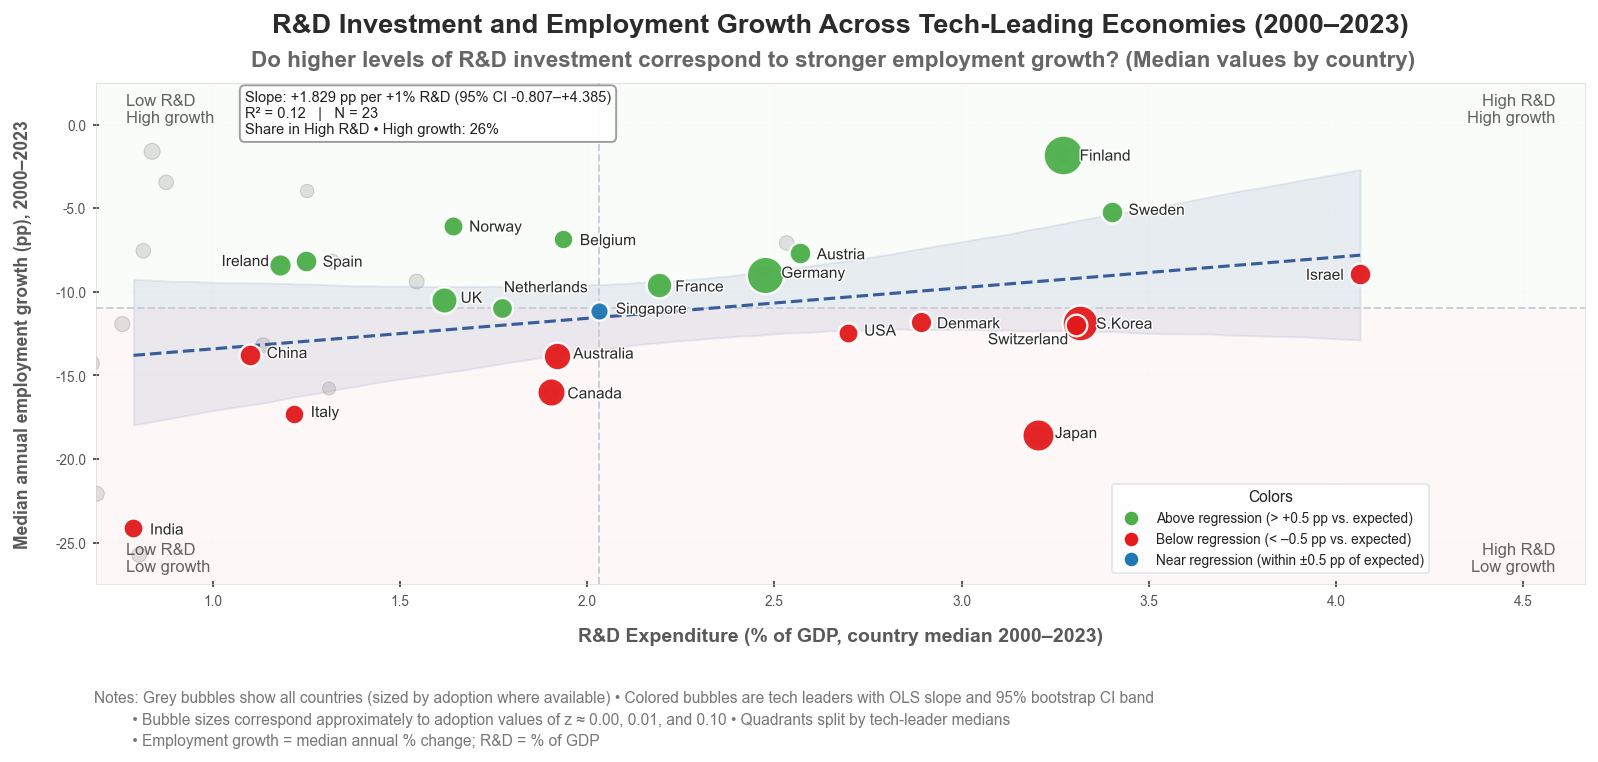

In [52]:
# ===================== 1) Inputs =====================
YEAR_START, YEAR_END = 2000, 2023
use_median = True
n_boot = 2000
title_suffix = globals().get("title_suffix", f" ({YEAR_START}–{YEAR_END})")
# ===================== 2) Data prep =====================
df = df0.copy()
# from here on we can rely on the pp column
need = ["Country", "Year", "RD_Expenditure_GDP_Percent", "Employment_Growth_pp"]
missing_cols = set(need) - set(df.columns)
if missing_cols:
    raise ValueError(f"Missing columns in df_ml: {missing_cols}")

agg = np.median if use_median else np.mean

# ----- all countries (background) -----
mask_all = df["Year"].between(YEAR_START, YEAR_END)
d_all = (
    df.loc[mask_all, need]
        .dropna(subset=["RD_Expenditure_GDP_Percent", "Employment_Growth_pp"])
        .copy()
)
all_summ = (
    d_all.groupby("Country", as_index=False)
            .agg(
                RD_pct=("RD_Expenditure_GDP_Percent", agg),
                Emp_g=("Employment_Growth_pp", agg),
            )
)

# optional background bubble sizing
sizes_bg = np.full(len(all_summ), 60.0)
if "data" in globals() and isinstance(data, pd.DataFrame) and "adoption_z" in data.columns:
    adop_all = (
        data[data["Year"].between(YEAR_START, YEAR_END)]
        .groupby("Country", as_index=False)["adoption_z"].mean()
        .rename(columns={"adoption_z": "Adopt_avg"})
    )
    all_summ = all_summ.merge(adop_all, on="Country", how="left")
    smin_bg, smax_bg = 18, 120
    a_bg = all_summ["Adopt_avg"].fillna(all_summ["Adopt_avg"].median())
    a_bg_norm = (a_bg - a_bg.min()) / (a_bg.max() - a_bg.min() + 1e-9)
    sizes_bg = smin_bg + a_bg_norm * (smax_bg - smin_bg)

# ----- tech-leading (foreground) -----
mask = (
    df["Country"].isin(tech_countries_canon)
    & df["Year"].between(YEAR_START, YEAR_END)
)
d = (
    df.loc[mask, need]
        .dropna(subset=["RD_Expenditure_GDP_Percent", "Employment_Growth_pp"])
        .copy()
)
summ = (
    d.groupby("Country", as_index=False)
        .agg(
            RD_pct=("RD_Expenditure_GDP_Percent", agg),
            Emp_g=("Employment_Growth_pp", agg),
        )
)
if summ.empty:
    raise ValueError("No tech-country rows to plot after filtering & NA removal.")

# foreground bubble sizes (adoption)
sizes = np.full(len(summ), 140.0)
size_key = None
if "data" in globals() and isinstance(data, pd.DataFrame) and "adoption_z" in data.columns:
    adop = (
        data[data["Country"].isin(tech_countries_canon)]
        .groupby("Country", as_index=False)["adoption_z"].mean()
        .rename(columns={"adoption_z": "Adopt_avg"})
    )
    summ = summ.merge(adop, on="Country", how="left")
    s_min, s_max = 90, 420
    a = summ["Adopt_avg"].fillna(summ["Adopt_avg"].median())
    a_norm = (a - a.min()) / (a.max() - a.min() + 1e-9)
    sizes = s_min + a_norm * (s_max - s_min)
    if a.notna().sum() >= 3:
        size_key = np.quantile(a.dropna(), [0.15, 0.5, 0.85])

summ = summ.sort_values("RD_pct").reset_index(drop=True)

# ===================== 3) Plot =====================
fig, ax = plt.subplots(figsize=(12, 5.6))

# background dots
ax.scatter(all_summ["RD_pct"], all_summ["Emp_g"], s=sizes_bg, c="#636363", alpha=0.18, edgecolors="#222222", linewidths=0.5, zorder=0.6)

# foreground colors
# ===== Foreground bubbles (use residual vs regression for color) =====

# 1) Arrays in *the same order* you will plot
xs = summ["RD_pct"].to_numpy()
ys = summ["Emp_g"].to_numpy()
sizes = np.asarray(sizes, float)  # your bubble sizes computed earlier

# 2) Fit regression (skip any NaNs just in case)
mask = np.isfinite(xs) & np.isfinite(ys)
b1, b0 = np.polyfit(xs[mask], ys[mask], 1)


# 3) Color by distance from regression line (with neutral band)
y_pred = b1 * xs + b0
resid = ys - y_pred               # residuals
thr = 0.5               # fixed ±0.5 pp threshold

colors = np.where(
    resid >  thr,  "#4daf4a",     # clearly above regression
    np.where(
        resid < -thr, "#e41a1c",  # clearly below regression
        "#1f78b4"                 # neutral: close to regression line
    )
).tolist()


# 4) Draw biggest first
order = np.argsort(sizes)
for k, i in enumerate(order[::-1]):
    z = 3.0 + k * 1e-3
    ax.scatter([xs[i]], [ys[i]],
                s=float(sizes[i]),
                c=[colors[i]],
                alpha=0.95,
                edgecolors="white", linewidths=1.2, zorder=z)

# ----- regression + bootstrap -----
x, y = summ["RD_pct"].values, summ["Emp_g"].values
b1, b0 = np.polyfit(x, y, 1)
xline = np.linspace(x.min(), x.max(), 200)
yline = b1 * xline + b0

rng = np.random.default_rng(42)
boot = np.empty((n_boot, len(xline)))
slopes = np.empty(n_boot)
for i in range(n_boot):
    idx = rng.choice(len(x), len(x), replace=True)
    bb1, bb0 = np.polyfit(x[idx], y[idx], 1)
    boot[i] = bb1 * xline + bb0
    slopes[i] = bb1
lo, hi = np.percentile(boot, [2.5, 97.5], axis=0)
slope_lo, slope_hi = np.percentile(slopes, [2.5, 97.5])

ax.plot(xline, yline, ls="--", lw=1.6, color="#2f5597", alpha=0.95, zorder=2)
ax.fill_between(xline, lo, hi, color="#7a92b8", alpha=0.15, zorder=1)

# ----- medians / quadrants -----
x_med, y_med = np.median(x), np.median(y)
ax.set_xlim(x.min() - 0.1, max(4.5, x.max() + 0.6))
ax.xaxis.set_major_locator(MultipleLocator(0.5))
# Manually fix y-axis range with headroom
ymin, ymax = -25, 0
headroom = (ymax - ymin) * 0.10   # 5% of range as visual space above 0
ax.set_ylim(ymin - headroom, ymax + headroom)
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_span = x_max - x_min
y_span = y_max - y_min
fy = (y_med - y_min) / (y_max - y_min)

ALPHA_Q = 0.03
ax.axvspan(x_min, x_med, ymin=fy, ymax=1, facecolor="#4daf4a", alpha=ALPHA_Q, zorder=0)
ax.axvspan(x_med, x_max, ymin=fy, ymax=1, facecolor="#4daf4a", alpha=ALPHA_Q, zorder=0)
ax.axvspan(x_min, x_med, ymin=0,  ymax=fy, facecolor="#e41a1c", alpha=ALPHA_Q, zorder=0)
ax.axvspan(x_med, x_max, ymin=0,  ymax=fy, facecolor="#e41a1c", alpha=ALPHA_Q, zorder=0)

ax.axvline(x_med, color="#c9cfd8", lw=1.0, ls="--", zorder=1)
ax.axhline(y_med, color="#c9cfd8", lw=1.0, ls="--", zorder=1)

# Corner labels
kw = dict(transform=ax.transAxes, fontsize=8.5, color="#2f2f2f", alpha=0.75)
ax.text(0.98, 0.98, "High R&D\nHigh growth", ha="right", va="top", **kw)
ax.text(0.02, 0.98, "Low R&D\nHigh growth",  ha="left",  va="top", **kw)
ax.text(0.98, 0.02, "High R&D\nLow growth",  ha="right", va="bottom", **kw)
ax.text(0.02, 0.02, "Low R&D\nLow growth",   ha="left",  va="bottom", **kw)

# ======= AUTO LABELS (no LABEL_OFFSETS) =======
# label offset = 1.5% of x-span, 0.6% of y-span
dx = 0.011 * x_span
dy = 0.006 * y_span

country_rename = globals().get("country_rename", {})
for idx, r in enumerate(summ.itertuples()):
    this_x = r.RD_pct
    this_y = r.Emp_g
    # manual fine-tuning for overlapping labels
    if r.Country == "Ireland":
        this_x += -0.2   # move right
        this_y += 0.28   # move up/down
    if r.Country == "Switzerland":
        this_x += -0.28   # move right
        this_y += -0.99  # move up/down
    if r.Country == "Netherlands":
        this_x += -0.04   # move right
        this_y += 1.13  # move up/down
    label = country_rename.get(r.Country, r.Country)

    # if point is very close to right edge -> put label on the left
    if this_x > x_max - 0.25 * x_span:
        x_text = this_x - dx
        ha = "right"
    else:
        x_text = this_x + dx
        ha = "left"

    # tiny vertical staggering to avoid perfect stacking
    y_text = this_y + ((idx % 2) - 0.5) * dy

    t = ax.text(x_text, y_text, label, fontsize=8, ha=ha, va="center", color="#2b2b2b", zorder=4)
    # white halo so it stays readable over bubbles
    t.set_path_effects([pe.withStroke(linewidth=1.4, foreground="white", alpha=1.0)])

# KPI box
yhat = b1 * x + b0
r2 = 1 - np.sum((y - yhat)**2) / np.sum((y - y.mean())**2)
share_hi_hi = np.mean((summ["RD_pct"] >= x_med) & (summ["Emp_g"] >= y_med)) * 100
kpi_text = (
    f"Slope: {b1:+.3f} pp per +1% R&D (95% CI {slope_lo:+.3f}–{slope_hi:+.3f})\n"
    f"R² = {r2:.2f}   |   N = {len(summ)}\n"
    f"Share in High R&D • High growth: {share_hi_hi:.0f}%"
)
ax.text(
    0.1, 0.985, kpi_text, transform=ax.transAxes, ha="left", va="top", fontsize=7.5, color="#222",
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="#999", alpha=0.95),
    zorder=5,
)

# axis formats
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, _: f"{v:.1f}"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"{v:.1f}"))
ax.grid(True, linestyle=":", alpha=0.35, zorder=0)

# titles
ax.set_title(
    "R&D Investment and Employment Growth Across Tech-Leading Economies" + title_suffix,
    fontsize=14, pad=26, color=TITLE_CLR,
)
plt.figtext(
    0.52, 0.825, "Do higher levels of R&D investment correspond to stronger employment growth? (Median values by country)",
    ha="center", fontsize=11.5, color=SUBTITLE_CLR, weight="semibold")
ax.set_xlabel(
    f"R&D Expenditure (% of GDP, country median {YEAR_START}–{YEAR_END})",
    fontsize=10., color=AXIS_TEXT_CLR, weight="semibold", labelpad=10)
ax.set_ylabel(
    f"Median annual employment growth (pp), {YEAR_START}–{YEAR_END}",
    fontsize=9., color=AXIS_TEXT_CLR, weight="semibold", labelpad=12)

labels = [
    "Above regression (> +0.5 pp vs. expected)",
    "Below regression (< –0.5 pp vs. expected)",
    "Near regression (within ±0.5 pp of expected)"
]
handles = [
    Line2D([0],[0], marker='o', color='none',
            markerfacecolor="#4daf4a", markeredgecolor="white",
            markersize=8, label=labels[0]),
    Line2D([0],[0], marker='o', color='none',
            markerfacecolor="#e41a1c", markeredgecolor="white",
            markersize=8, label=labels[1]),
    Line2D([0],[0], marker='o', color='none',
            markerfacecolor="#1f78b4", markeredgecolor="white",
            markersize=8, label=labels[2]),
]
# optional adoption legend
leg2 = ax.legend(handles, labels, title="Colors", loc="lower right",
        frameon=True, framealpha=0.9, fontsize=7, title_fontsize=8, bbox_to_anchor=(0.9, 0.01))
leg2.get_frame().set_edgecolor("#e5e7eb")
ax.add_artist(leg2)

# Footnote
plt.figtext(0.08, -0.04,
            "Notes: Grey bubbles show all countries (sized by adoption where available) "
            "• Colored bubbles are tech leaders with OLS slope and 95% bootstrap CI band\n"
            "         • Bubble sizes correspond approximately to adoption values of z ≈ 0.00, 0.01, and 0.10"
            " • Quadrants split by tech-leader medians\n"
            "         • Employment growth = median annual % change; R&D = % of GDP",
                        ha="left", fontsize=8, color=FOOTNOTE_CLR, linespacing=1.5)
plt.tight_layout(rect=[0.02, 0.06, 0.98, 0.92])

**Visualization: Leading Economies: Employment Growth vs R&D Investment(2000-2023)** (barchart)

* *Research question:*

    Among top R&D economies, how does sustained employment growth compare with the level of R&D investment (2000–2023)? Where do high R&D and job growth align, and where do they diverge?

* *Rationale*

    This figure compares each country’s median employment growth and R&D spending (% of GDP) side by side to reveal where innovation investment aligns—or diverges—from job expansion. The common ordering and OECD benchmark highlight economies with high R&D but weak growth versus those achieving both strong R&D and employment gains, helping assess whether innovation translates into broader labor-market benefits.

* **Methodology:**

    We compare countries’ **median annual employment growth** (percentage-point change per year) with their **median R&D expenditure (% of GDP)** over 2000–2023. Starting from country–year data, we restrict to a canon of tech-leading economies, keep only countries with **≥10 valid years**, and compute country medians for Employment_Growth_pp and RD_Expenditure_GDP_Percent. We then **rank countries by median R&D** and display the **top 10**.The figure uses **two aligned horizontal bar panels** that share the same country order: Left panel: employment growth bars extend **left**, labeled in **pp**; a zero line marks no growth. Right panel: R&D bars extend **right**, labeled in **%**; a dashed vertical line marks the **OECD reference (≈2.5%)**. Country labels include **(n=years)** to indicate data coverage. **Each panel** uses its **own axis scale** (pp vs. %), so bar lengths are not comparable across panels—only within each panel. Value “pills” on or beside bars annotate exact medians, emphasizing where **innovation spending aligns with** or **diverges** from employment performance.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1168861884.py:29: FutureWarning: The provided callable <function median at 0x00000195A4DE4C10> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  d.groupby("Country", as_index=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1168861884.py:29: FutureWarning: The provided callable <function median at 0x00000195A4DE4C10> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  d.groupby("Country", as_index=False)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\1168861884.py:178: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.03, 0.06, 0.97, 0.93])


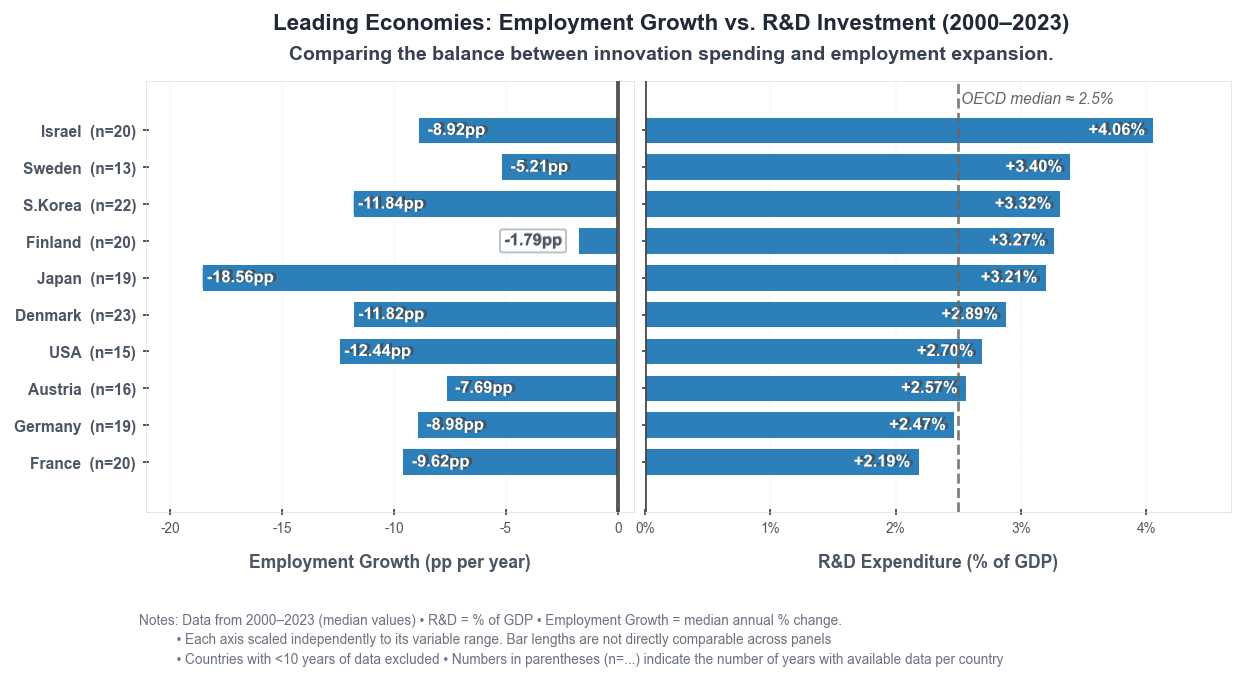

In [159]:
# ---------------- Inputs ----------------
# tech_countries_canon
# country_rename used for display names
# uses df, containig Employmrnt_Growth_pp

YEAR_START, YEAR_END = 2000, 2023
use_median = True   # False -> mean
MIN_YEARS = 10      # minimum number of years required per country

# Reference line value for R&D panel
OECD_RD_MEDIAN = 2.5  # ~OECD median R&D % of GDP

# --------------- Prep -------------------
df = df0.copy()
needed = ["Country", "Year", "RD_Expenditure_GDP_Percent", "Employment_Growth_pp"]
missing = set(needed) - set(df.columns)
assert not missing, f"Missing columns: {missing}"

mask = df["Country"].isin(tech_countries_canon) & df["Year"].between(YEAR_START, YEAR_END)
d = df.loc[mask, needed].dropna(subset=["RD_Expenditure_GDP_Percent", "Employment_Growth_pp"]).copy()

# --- Apply minimum years filter before aggregation ---
valid_countries = d.groupby("Country")["Year"].nunique()
valid_countries = valid_countries[valid_countries >= MIN_YEARS].index
d = d[d["Country"].isin(valid_countries)].copy()

agg = np.median if use_median else np.mean
summ = (
    d.groupby("Country", as_index=False)
     .agg(RD_pct=("RD_Expenditure_GDP_Percent", agg),
          Emp_g=("Employment_Growth_pp", agg))
)

# -------- TOP-10 filter (by highest median R&D % of GDP) --------
TOP_N   = 10
RANK_BY = "RD_pct"  # change to "Emp_g" if you prefer to rank by growth
summ = summ.sort_values(RANK_BY, ascending=False).head(TOP_N).copy()
# keep only the Top-10 rows in the raw data too (for n= counts)
d = d[d["Country"].isin(summ["Country"])].copy()
# final plotting order (so bars read top→bottom nicely)
summ = summ.sort_values("RD_pct", ascending=False).reset_index(drop=True)
# ---------------------------------------------------------------

# ✅ Apply display names
summ["Country_disp"] = summ["Country"].map(country_rename).fillna(summ["Country"])

countries = summ["Country_disp"].values
rd_vals   = summ["RD_pct"].values
emp_vals  = summ["Emp_g"].values
y = np.arange(len(countries))

# ---- sample size (years) aligned to plotting order ----
sample_sizes = (
    d.groupby("Country")["Year"].nunique()
     .reindex(summ["Country"])
     .fillna(0).astype(int).to_list()
)

# --------------- Plot: two aligned panels -------------------
fig, (axL, axR) = plt.subplots(
    ncols=2, sharey=True, figsize=(10, 4),
    gridspec_kw={"width_ratios": [1.0, 1.2], "wspace": 0.02}
)

# Colors (consistent with your design)
BASE_CLR = "#2c7fb8"     # blue

# Assign one color to all countries
bar_colors_emp = [BASE_CLR] * len(summ)
bar_colors_rd  = [BASE_CLR] * len(summ)

# ---------------- helpers: label styles ----------------
def inside_pill(ax, x, y, text, fc):
    t = ax.text(
        x, y, text, va="center", ha="center", color="white",
        fontsize=8.5, fontweight="extra bold",
        bbox=dict(boxstyle="round,pad=0.24,rounding_size=0.12", fc=fc, ec="none", alpha=0.95),
    )
    t.set_path_effects([pe.SimplePatchShadow(offset=(1.7, 0.5), alpha=0.95), pe.Normal()])

def outside_box(ax, x, y, text):
    t = ax.text(
        x, y, text, va="center", ha="center", color=AXIS_TEXT_CLR,
        fontsize=8.5, fontweight="extra bold",
        bbox=dict(boxstyle="round,pad=0.24,rounding_size=0.12", fc="white", ec="#b7c0c7", lw=1),
    )
    t.set_path_effects([pe.SimplePatchShadow(offset=(0.5, 0.5), alpha=0.35), pe.Normal()])

def place_kpis_for_panel(ax, vals, colors, bars_go_right=True,
                         unit="%",                      # ← NEW: unit suffix
                         frac_for_inside=0.28, min_abs_for_inside=0.06,
                         pad_in=0.012, pad_out=0.015):
    vals = np.asarray(vals)
    max_abs = np.nanmax(np.abs(vals)) if len(vals) else 1.0
    short_cut = max(max_abs * frac_for_inside, min_abs_for_inside)
    for yi, (v, c) in enumerate(zip(vals, colors)):
        if not np.isfinite(v) or v == 0:
            continue
        text = f"{v:+.2f}{unit}"          # ← uses unit for the KPI text
        long_enough = abs(v) >= short_cut
        if bars_go_right:
            x = v - pad_in if long_enough else v + pad_out
            if long_enough:
                inside_pill(ax, x, yi, text, c)
            else:
                outside_box(ax, x, yi, text)
        else:
            x = v + pad_in if long_enough else v - pad_out
            if long_enough:
                inside_pill(ax, x, yi, text, c)
            else:
                outside_box(ax, x, yi, text)

# --- Left panel: Employment Growth (own scale; bars go LEFT) ---
axL.barh(y, emp_vals, color=bar_colors_emp, edgecolor="white", height=0.75)
axL.set_yticks(y)
axL.set_yticklabels([f"{c}  (n={n})" for c, n in zip(countries, sample_sizes)],
                    color=AXIS_TEXT_CLR, fontsize=8, weight="semibold")
axL.invert_yaxis()

def pos_zero_formatter(x, pos):
    if abs(x) < 1e-6: x = 0
    return f"{x:.0f}"

axL.set_xlabel("Employment Growth (pp per year)",  # ← updated label
               color=AXIS_TEXT_CLR, weight="semibold", fontsize=9, labelpad=9)
axL.xaxis.set_major_formatter(FuncFormatter(pos_zero_formatter))
# axL.xaxis.set_major_locator(MultipleLocator(5))
axL.tick_params(axis="x", labelsize=7)
axL.margins(y=0.10)

xmin_emp = np.nanmin(emp_vals) if len(emp_vals) else -0.3
xmax_emp = np.nanmax(emp_vals) if len(emp_vals) else 0.2
rng_emp  = (xmax_emp - xmin_emp) if xmax_emp > xmin_emp else 0.3
axL.set_xlim(xmin_emp - rng_emp*0.15, xmax_emp + rng_emp*0.15)
axL.set_xticks(np.arange(-20, 5, 5))

# ← LEFT: use pp in KPI pills
place_kpis_for_panel(axL, emp_vals, bar_colors_emp,
                    bars_go_right=False, unit="pp",
                    frac_for_inside=0.22, min_abs_for_inside=0.05,
                    pad_in=1.7, pad_out=2)

# --- Right panel: R&D (% of GDP) (own scale; bars go RIGHT) ---
axR.barh(y, rd_vals, color=bar_colors_rd, edgecolor="white", height=0.75)
axR.set_xlabel("R&D Expenditure (% of GDP)",  # simplified label
            color=AXIS_TEXT_CLR, weight="semibold", fontsize=9, labelpad=9)
axR.xaxis.set_major_formatter(FuncFormatter(lambda v, p: f"{v:.0f}%"))  # show % ticks if desired
axR.xaxis.set_major_locator(MultipleLocator(1))
axR.tick_params(axis="x", labelsize=7)
xmax_rd = np.nanmax(rd_vals) if len(rd_vals) else 5.0
axR.set_xlim(0, xmax_rd * 1.15)
axR.margins(y=0.10)

# ← RIGHT: use % in KPI pills
place_kpis_for_panel(axR, rd_vals, bar_colors_rd,
                    bars_go_right=True, unit="%",
                    frac_for_inside=0.1, min_abs_for_inside=0.3,
                    pad_in=0.3, pad_out=0.02)

fig.suptitle("Leading Economies: Employment Growth vs. R&D Investment (2000–2023)",
            y=1, color=TITLE_CLR, weight="bold")
plt.figtext(0.5, 0.918, "Comparing the balance between innovation spending and employment expansion.",
            ha="center", fontsize=10, color=SUBTITLE_CLR, weight="semibold")
plt.figtext(0.12, -0.16,
            "Notes: Data from 2000–2023 (median values) • R&D = % of GDP • Employment Growth = median annual % change.\n"
            "          • Each axis scaled independently to its variable range. Bar lengths are not directly comparable across panels\n"
            "          • Countries with <10 years of data excluded • Numbers in parentheses (n=...) indicate the number of years with available data per country",
            ha="left", fontsize=7, color=FOOTNOTE_CLR, linespacing=1.5)

# zero lines & reference
axL.axvline(0, color="#444", lw=2.0, alpha=0.9, zorder=5)
axR.axvline(0, color="#444", lw=2.0, alpha=0.9, zorder=5)
axR.axvline(OECD_RD_MEDIAN, color="#666", lw=1.4, ls="--", alpha=0.85, zorder=4)
axR.text(OECD_RD_MEDIAN + 0.02, -0.85, "OECD median ≈ 2.5%",
        color="#666", fontsize=8, va="center", ha="left", style="italic")

plt.tight_layout(rect=[0.03, 0.06, 0.97, 0.93])


**Visualization: Employment Growth Around Semiconductor Adoption Shocks**

* *Research question:*

    **How does employment growth change before and after a country–occupation’s first semiconductor-adoption shock in tech-leading economies?**

* *Rationale:*

    This visualization explores how employment growth responds to major shifts in semiconductor adoption across tech-leading economies. By aligning countries around the timing of their first adoption shock, it reveals whether technological breakthroughs are followed by sustained job gains or short-term disruptions. The pattern of changes before and after the shock helps identify if adoption tends to stimulate labor demand or if adjustment frictions temporarily slow employment growth.

* **Methodology:**

    This chart estimates how **employment growth changes** before and after the **first major semiconductor-adoption shock** in each tech-leading country (2000–2023). We start from country–year–occupation data with **employment growth** (emp_g, pp) and **adoption intensity** (adoption_z), keeping only tech-leaders and non-missing values. **Shock identification**. For each country we **average adoption_z** by year, compute the **within-country change Δ**. The **shock year (τ = 0**) is the **first year where Δ** is at/**above the 90th-percentile** jump (primary rule). If no such jump exists, we use the first year the level of adoption_z crosses its 90th percentile (fallback). **Event time (τ)** is defined as the **number of years from the shock year**, keeping τ∈{−3,−2,−1,+1,+2,+3}. For each country–occupation unit, **employment growth** (emp_g) is measured **relative to the pre-shock baseline (τ = −1)**. Countries are included only if they have at least one pre- and one post-shock observation and three distinct τ points. Points show the mean change in employment growth (pp) relative to the pre-shock year (τ = −1); vertical line marks τ = 0. Pre-period estimates near zero indicate limited pre-trends, while post-period levels trace the timing and magnitude of employment responses following adoption shocks.

    P.S. Event-study visuals are designed to communicate **dynamics and causal timing**, not absolute performance indicators. So **KPIs will not be shown** on the visual.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\4110732139.py:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shock_years = (ad.groupby("Country").apply(find_shock_year)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\4110732139.py:91: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(ok_coverage)


[Audit] Countries kept (event-time rule): ['Australia', 'Austria', 'Belgium', 'Canada', 'France', 'Germany', 'Ireland', 'Italy', 'Norway', 'S.Korea', 'Spain', 'Sweden', 'UK']
[Audit] Countries dropped (insufficient τ coverage): ['Denmark', 'Finland', 'India', 'Japan', 'Netherlands', 'Singapore', 'Switzerland', 'USA']


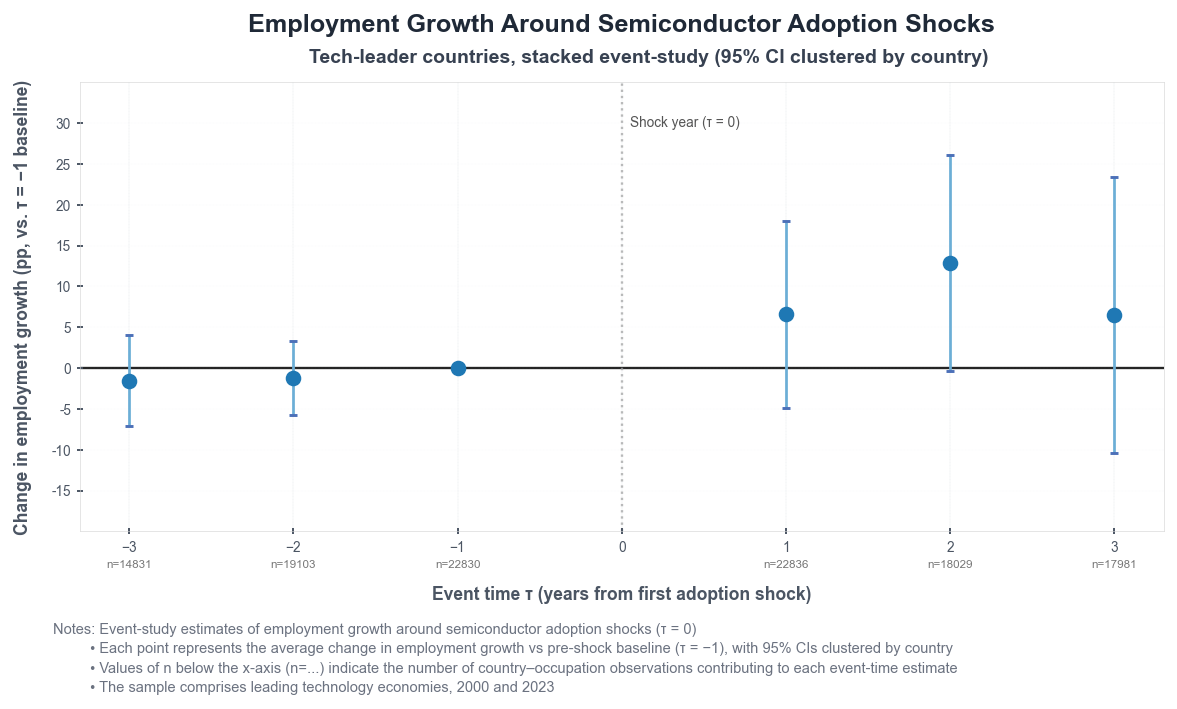

tau          mean            lo            hi        n
0   -3 -1.539620e+00 -7.098031e+00  4.018791e+00  14831.0
1   -2 -1.246010e+00 -5.756678e+00  3.264658e+00  19103.0
2   -1 -5.439946e-18 -2.334521e-16  2.225722e-16  22830.0
3    1  6.595720e+00 -4.829604e+00  1.802104e+01  22836.0
4    2  1.290393e+01 -3.279190e-01  2.613577e+01  18029.0
5    3  6.496144e+00 -1.042202e+01  2.341431e+01  17981.0

In [160]:
tech_countries = [
    'China', 'S.Korea', 'USA', 'UK', 'Japan', 'Israel', 'Germany', 'India', 'Netherlands',
    'Singapore', 'France', 'Switzerland', 'Canada', 'Ireland', 'Sweden',
    'Finland', 'Italy', 'Australia', 'Austria', 'Belgium', 'Denmark', 'Norway', 'Spain'
]
YEAR_START, YEAR_END = 2000, 2023

# Shock detection thresholds (country-specific)
JUMP_QUANTILE  = 0.90   # first year where Δ adoption_z is in top 10% (primary rule)
LEVEL_QUANTILE = 0.90   # fallback: first year adoption_z crosses its 90th pct level

# Event window (τ=0 excluded by design; we compare to τ = −1)
TARGET_WINDOW = 3       # keep τ in [-3, -2, -1, +1, +2, +3]

# Inference & sample composition
USE_CLUSTERED_SE   = True     # clustered 95% CIs by Country
USE_BALANCED_PANEL = False    # units must appear at EVERY τ in window (usually False)

# Event-time coverage rule (replaces rigid min-years gate)
PRE_SET   = {-2, -1}          # at least one pre (τ=-1 required anyway)
POST_SET  = {+1, +2, +3}      # at least one post
MIN_TAUS_PER_COUNTRY = 3      # at least this many distinct τ points in window

# Expected columns in `data`
need = {"Country", "Year", "Occupation_Group", "adoption_z", "emp_g"}
missing = need - set(data.columns)
assert not missing, f"`data` is missing: {missing}"

# =========================================================
# 1) SCOPE & CLEAN
# =========================================================
df11 = (data.loc[
            data["Country"].isin(tech_countries) & data["Year"].between(YEAR_START, YEAR_END),
            ["Country","Year","Occupation_Group","adoption_z","emp_g"]
        ]
        .dropna(subset=["adoption_z","emp_g"])
        .copy())
df11["Year"] = df11["Year"].astype(int)

# =========================================================
# 2) SHOCK YEAR PER COUNTRY
# =========================================================
ad = (df11.groupby(["Country","Year"], as_index=False)["adoption_z"]
        .mean()
        .sort_values(["Country","Year"]))
ad["d_adopt"] = ad.groupby("Country")["adoption_z"].diff()

def find_shock_year(sub: pd.DataFrame) -> int | float:
    sub = sub.sort_values("Year")
    # Primary: big within-country jump
    if sub["d_adopt"].notna().any():
        thr_jump = sub["d_adopt"].quantile(JUMP_QUANTILE)
        cand = sub.loc[sub["d_adopt"] >= thr_jump, "Year"]
        if len(cand):
            return int(cand.min())
    # Fallback: first crossing of high adoption level
    thr_level = sub["adoption_z"].quantile(LEVEL_QUANTILE)
    cand = sub.loc[sub["adoption_z"] >= thr_level, "Year"]
    return int(cand.min()) if len(cand) else np.nan

shock_years = (ad.groupby("Country").apply(find_shock_year)
            .rename("shock_year").reset_index())

# =========================================================
# 3) EVENT TIME & WINDOW
# =========================================================
df = df11.merge(shock_years, on="Country", how="left")
df = df[np.isfinite(df["shock_year"])].copy()
df["tau"] = (df["Year"] - df["shock_year"]).astype(int)

tau_min = max(-TARGET_WINDOW, df["tau"].min())
tau_max = min(TARGET_WINDOW, df["tau"].max())
window_taus = [t for t in range(tau_min, tau_max + 1) if t != 0]

# keep only the window (drop τ=0 by construction)
df = df[df["tau"].isin(window_taus)].copy()

# =========================================================
# 4) EVENT-TIME COVERAGE FILTER (KEY CHANGE)
#    Keep countries with: baseline τ=-1, ≥1 pre, ≥1 post, and ≥3 distinct τs
# =========================================================
def ok_coverage(sub: pd.DataFrame) -> bool:
    taus = set(sub["tau"].unique())
    has_baseline = (-1 in taus)
    has_pre  = len(taus & PRE_SET)  >= 1
    has_post = len(taus & POST_SET) >= 1
    enough_points = (len(taus) >= MIN_TAUS_PER_COUNTRY)
    return has_baseline and has_pre and has_post and enough_points

good_countries = (df.groupby("Country")
                    .apply(ok_coverage)
                    .pipe(lambda s: s[s].index))

# Audit: who’s in / out
kept_countries    = sorted(good_countries)
dropped_countries = sorted(set(df["Country"].unique()) - set(good_countries))
print("[Audit] Countries kept (event-time rule):", kept_countries)
print("[Audit] Countries dropped (insufficient τ coverage):", dropped_countries)

# keep only countries that pass the event-time coverage rule
df = df[df["Country"].isin(good_countries)].copy()

# =========================================================
# 5) WITHIN-UNIT Δ VS BASELINE τ = −1
# =========================================================
unit_id = ["Country","Occupation_Group"]

# Require a baseline observation for the unit
has_base = df.loc[df["tau"] == -1, unit_id].drop_duplicates()
df = df.merge(has_base.assign(has_base=1), on=unit_id, how="inner")

# Optional balanced panel (usually keep False)
if USE_BALANCED_PANEL:
    counts = df.groupby(unit_id)["tau"].nunique()
    balanced_units = counts[counts == len(window_taus)].index
    df = df.set_index(unit_id).loc[balanced_units].reset_index()

# Compute baseline and deltas
base = (df[df["tau"] == -1][unit_id + ["emp_g"]]
        .rename(columns={"emp_g":"emp_base"}))
df = df.merge(base, on=unit_id, how="left")
df["delta_emp"] = df["emp_g"] - df["emp_base"]

# =========================================================
# 6) AGGREGATION & CIs
# =========================================================
def mean_ci_simple(x: pd.Series) -> pd.Series:
    """Unclustered mean and normal-approx 95% CI across units."""
    x = x.dropna().values
    n = len(x)
    if n == 0:
        return pd.Series({"mean": np.nan, "lo": np.nan, "hi": np.nan, "n": 0})
    m  = float(np.mean(x))
    se = float(np.std(x, ddof=1) / np.sqrt(n)) if n > 1 else 0.0
    lo, hi = m - 1.96*se, m + 1.96*se
    return pd.Series({"mean": m, "lo": lo, "hi": hi, "n": n})

def mean_ci_clustered(df_tau: pd.DataFrame) -> pd.Series:
    """
    Cluster-robust (by Country) CI:
    - Collapse to country means of delta_emp.
    - CI from cross-country SE (normal approx).
    """
    by_c = (df_tau.groupby("Country")["delta_emp"].mean().dropna())
    n_c = len(by_c)
    if n_c == 0:
        return pd.Series({"mean": np.nan, "lo": np.nan, "hi": np.nan, "n": 0})
    m  = float(by_c.mean())
    se = float(by_c.std(ddof=1) / np.sqrt(n_c)) if n_c > 1 else 0.0
    lo, hi = m - 1.96*se, m + 1.96*se
    # n is total unit obs at this tau (not cluster count)
    return pd.Series({"mean": m, "lo": lo, "hi": hi, "n": int(df_tau["delta_emp"].notna().sum())})

# Build event-study table
rows = []
for t in sorted(window_taus):
    dft = df[df["tau"] == t]
    if USE_CLUSTERED_SE:
        rows.append(mean_ci_clustered(dft).to_dict() | {"tau": t})
    else:
        rows.append(mean_ci_simple(dft["delta_emp"]).to_dict() | {"tau": t})
es = pd.DataFrame(rows).sort_values("tau")

# =========================================================
# 7) PLOT (safe error bars)
# =========================================================
if es["n"].fillna(0).sum() == 0:
    fig, ax = plt.subplots(figsize=(6, 1)); ax.axis("off")
    ax.text(0.01, 0.5,
            "No units have both a baseline (τ = −1) and other event-time observations\n"
            "in the requested window. Relax the window or thresholds.",
            va="center")
    plt.show()
else:
    # safe error-bar arrays (no negatives / NaNs)
    es_plot = es.copy()
    for c in ["mean", "lo", "hi"]:
        es_plot[c] = pd.to_numeric(es_plot[c], errors="coerce")

    mask = es_plot[["mean","lo","hi"]].notna().all(axis=1)
    yerr_lo = (es_plot.loc[mask, "mean"] - es_plot.loc[mask, "lo"]).astype(float).clip(lower=0.0).values
    yerr_hi = (es_plot.loc[mask, "hi"]   - es_plot.loc[mask, "mean"]).astype(float).clip(lower=0.0).values
    yerr = np.vstack([yerr_lo, yerr_hi])

    fig, ax = plt.subplots(figsize=(8.5, 4.5))
    ax.axhline(0, color="#222222", linewidth=1.2, zorder=0)          # baseline 0
    ax.axvline(0, color="#999999", linestyle=":", linewidth=1.2,     # event time line
                alpha=0.7, zorder=0)
    ax.text(0.05, 30, "Shock year (τ = 0)", fontsize=7, color="#555", va="center")


    # error bars (only where CI available)
    errlines = ax.errorbar(
        es_plot.loc[mask, "tau"].values,
        es_plot.loc[mask, "mean"].values,
        yerr=yerr,
        fmt="o",
        markersize=7,
        linewidth=1.3,
        capsize=2,
        ecolor="#6baed6",      # light blue CI stem
        mec="#1f78b4",         # edge color of marker
        mfc="#1f78b4",         # fill color of marker
        color="#1f78b4",       # mean point color
        elinewidth=1.4,
        capthick=1.5,          # makes caps (edges) slightly bolder
        zorder=3
    )

    for cap in errlines[1]:         # index 1 returns capline collection
        cap.set_color("#4c70b8")    # darker edge color
        cap.set_linewidth(1.2)

    # dots without CI (if any)
    if (~mask).any():
        ax.scatter(
            es_plot.loc[~mask, "tau"].values,
            es_plot.loc[~mask, "mean"].values,
            s=28, color="#1f78b4", zorder=3
        )

    # x-axis ticks
    xticks = sorted(es_plot["tau"].unique().tolist() + [0])
    ax.set_xticks(xticks)
    ax.set_xlabel("Event time τ (years from first adoption shock)", fontsize = 9, labelpad=16, weight="semibold", color=AXIS_TEXT_CLR)
    ax.tick_params(axis="x", labelsize=7, pad=3, colors=AXIS_TEXT_CLR)

    # y-axis ticks
    ax.set_ylabel("Change in employment growth (pp, vs. τ = −1 baseline)", fontsize = 9, labelpad=10, weight="semibold", color=AXIS_TEXT_CLR)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: f"{v:.0f}"))
    ax.tick_params(axis="y", labelsize=7, pad=3, colors=AXIS_TEXT_CLR)

    # n labels under x-axis
    ymin, ymax = ax.get_ylim()
    pad = (ymax - ymin) * 0.28
    for x, n in zip(es_plot["tau"], es_plot["n"]):
        ax.text(x, ymin - pad, f"n={int(n)}", ha="center", va="top", fontsize=6, color="#777")

    title  = "Employment Growth Around Semiconductor Adoption Shocks"
    subtitle = "Tech-leader countries, stacked event-study (95% CI clustered by country)"
    ax.set_title(title, pad=26, color=TITLE_CLR, fontsize=13, ha = "center")
    plt.figtext(0.55, 0.89, subtitle, ha="center", fontsize=10, color=SUBTITLE_CLR, weight="semibold")

    plt.figtext(
    0.05, -0.1,
    "Notes: Event-study estimates of employment growth around semiconductor adoption shocks (τ = 0) \n"
    "         • Each point represents the average change in employment growth vs pre-shock baseline (τ = −1), "
    "with 95% CIs clustered by country\n "
    "        • Values of n below the x-axis (n=...) indicate the number of country–occupation observations contributing to each event-time estimate\n"
    "         • The sample comprises leading technology economies, 2000 and 2023",
    ha="left", fontsize=7.5, color=FOOTNOTE_CLR, wrap=True, linespacing=1.5
)
    
    ax.set_ylim(-20, 35)
    ax.set_yticks(np.arange(-15, 31, 5))  # ticks every 5 pp
    ax.grid(axis="y", linestyle=":", alpha=0.35)

    plt.tight_layout()
    plt.show()

    # Optional: tidy table for inspection
    display(es_plot[["tau","mean","lo","hi","n"]].reset_index(drop=True))

The relationship between Employment Growth and Alternative Quantity Value is visualized to capture the effects of unreported or indirect semiconductor trade activity. This helps reveal how informal or less-documented technology adoption may influence workforce changes beyond officially measured trade flows.

**Visualization: Which Industries are Most Sensitive to Alternative Semiconductor Quantity?**

* *Research Question:*

    **Which Industries are Most Sensitive to Alternative Semiconductor Quantity?**

* *Rationale:*

    This visualization links employment growth to the alternative semiconductor quantity index, capturing indirect or unreported trade activity. It highlights how informal technology adoption may influence workforce changes beyond officially recorded flows.

**Methodology:**

This chart estimates how **employment growth** varies with changes in the **alternative semiconductor quantity index** across industries. Using **within-industry OLS regressions**, employment growth (in percentage points) is regressed on a **standardized version of log alternative semiconductor quantity (z-score)**.

To ensure robustness, only industries with at **least 25 observations** and **nonzero variance in adoption** are included. For each industry, **1,000 bootstrap resamples** generate **95% confidence intervals** for the OLS slope, representing the **change in employment growth per one-standard-deviation (1σ)** increase in semiconductor adoption.

Industries are **ordered by estimated effect size**. Positive coefficients (**green**) indicate **faster employment growth** associated with semiconductor adoption, while negative coefficients (**red**) suggest potential **job displacement or automation effects**. The **top three** positive and negative industries are **highlighted** for emphasis.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\3626161861.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_sd = df.groupby(IND_COL)[XCOL_LOG].transform(lambda s: s.std(ddof=1))
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\3626161861.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["_adopt_z"] = df.groupby(IND_COL)[XCOL_LOG].transform(
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\3626161861.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True 

Included industries: 12  |  Total rows: 157,724
Plotted industries: 12


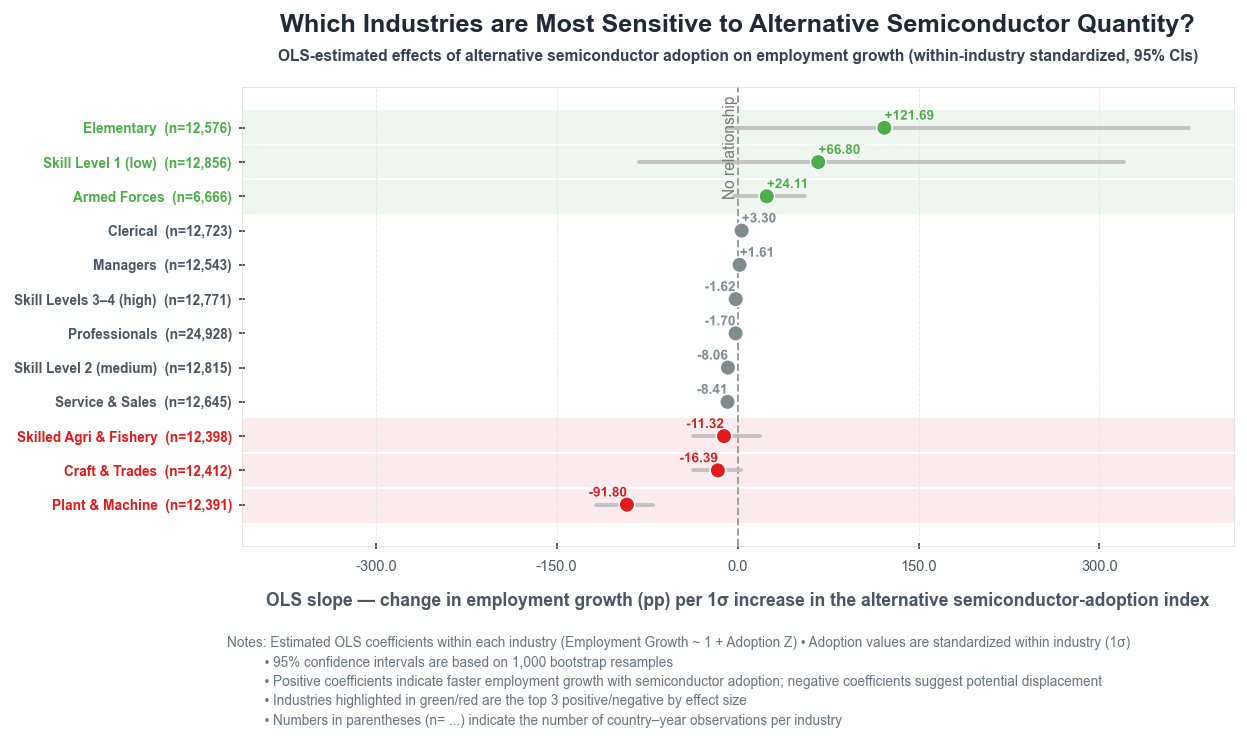

In [161]:
# ============================================
# KPI-style sensitivity chart (auto-scaled, refined)
# Question: "Do industries with greater alternative semiconductor quantity
#            experience different rates of employment growth?"
# Requires df_ml with:
#   - Occupation_Group
#   - Employment_Growth  (percentage points)
#   - log_Alternative_Quantity_Value  (log adoption proxy)
# ============================================

# ---------------- CONFIG ----------------
IND_COL   = "Occupation_Group"
YCOL      = "Employment_Growth_pp"
XCOL_LOG  = "log_Alternative_Quantity_Value"

MIN_N     = 25          # minimum rows per industry
N_BOOT    = 1000        # bootstrap resamples
TOP_K     = 3           # highlight top/bottom industries by effect size

# Colors
POS_COLOR = "#4daf4a"   # green
NEG_COLOR = "#e41a1c"   # red
NEU_COLOR = "#7f8c8d"   # neutral dot color
CI_COLOR  = "#bdbdbd"   # CI line color

# Row highlight bands (for top/bottom industries)
POS_ROW_BAND = "#edf7f0"   # light green for top positives
NEG_ROW_BAND = "#fbebee"   # light red for top negatives

# Optional: color y-axis labels only for highlighted rows
COLOR_YLABELS = True

# ---------------- Helpers ----------------
def _blocks_from_indices(idxs):
    """Group sorted integer indices into contiguous (start, end) blocks inclusive."""
    if not idxs:
        return []
    idxs = sorted(idxs)
    blocks = []
    start = prev = idxs[0]
    for i in idxs[1:]:
        if i == prev + 1:
            prev = i
            continue
        blocks.append((start, prev))
        start = prev = i
    blocks.append((start, prev))
    return blocks


def bootstrap_slope(y, x, n_boot=N_BOOT, rng=None):
    """
    Bootstrap OLS slope for y ~ 1 + x. Returns (beta_mean, (lo95, hi95)).
    Uses slope = cov(x, y) / var(x).
    """
    if rng is None:
        rng = np.random.default_rng(123)
    n = len(y)
    b = np.empty(n_boot, dtype=float)
    for i in range(n_boot):
        idx = rng.integers(0, n, n)        # resample with replacement
        yy, xx = y[idx], x[idx]
        vx = np.var(xx, ddof=1)
        b[i] = np.nan if (vx == 0 or np.isnan(vx)) else np.cov(xx, yy, ddof=1)[0, 1] / vx
    b = b[np.isfinite(b)]
    if b.size == 0:
        return np.nan, (np.nan, np.nan)
    return float(np.mean(b)), (np.percentile(b, 2.5), np.percentile(b, 97.5))


# ---------------- DATA PREP ----------------
df = (
    df0[[IND_COL, YCOL, XCOL_LOG]]
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
    .copy()
)

# Require nonzero variance in the raw adoption proxy
raw_sd = df.groupby(IND_COL)[XCOL_LOG].transform(lambda s: s.std(ddof=1))
df = df[raw_sd > 0].copy()

# Standardize adoption within industry (z-score)
df["_adopt_z"] = df.groupby(IND_COL)[XCOL_LOG].transform(
    lambda s: (s - s.mean()) / s.std(ddof=1)
)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=["_adopt_z", YCOL])

# Filter for sample size and nonzero variance
counts = (
    df.groupby(IND_COL)
        .agg(n=(YCOL, "size"), xstd=("_adopt_z", "std"))
        .reset_index()
)
keep = counts[(counts["n"] >= MIN_N) & (counts["xstd"] > 0)][IND_COL]
df = df[df[IND_COL].isin(keep)].copy()

print(f"Included industries: {df[IND_COL].nunique()}  |  Total rows: {len(df):,}")
if df[IND_COL].nunique() == 0:
    raise ValueError("No valid industries after filtering. Check MIN_N and data coverage.")

# ---------------- STATS ----------------
rows, rng = [], np.random.default_rng(2024)

for g, d in df.groupby(IND_COL, sort=False):
    y = d[YCOL].to_numpy(float)
    x = d["_adopt_z"].to_numpy(float)

    if (len(y) < MIN_N) or (np.nanstd(x) == 0) or np.isnan(x).all() or np.isnan(y).all():
        continue

    beta, (lo, hi) = bootstrap_slope(y, x, N_BOOT, rng)
    if np.isfinite(beta) and np.isfinite(lo) and np.isfinite(hi):
        rows.append({"industry": g, "beta": beta, "lo": lo, "hi": hi, "n": len(d)})

slopes = pd.DataFrame(rows)
if slopes.empty:
    raise ValueError("No valid slope estimates produced. Try lowering MIN_N or checking input data.")

slopes = slopes.replace([np.inf, -np.inf], np.nan).dropna(subset=["beta", "lo", "hi"]).reset_index(drop=True)
slopes = slopes.sort_values("beta").reset_index(drop=True)

print(f"Plotted industries: {len(slopes)}")

# Highlight top positive/negative effects
slopes["color"] = NEU_COLOR
slopes.loc[slopes.nlargest(TOP_K, "beta").index, "color"] = POS_COLOR
slopes.loc[slopes.nsmallest(TOP_K, "beta").index, "color"] = NEG_COLOR

# Indices of rows to band
top_pos_idx = sorted(slopes.nlargest(TOP_K, "beta").index.tolist())
top_neg_idx = sorted(slopes.nsmallest(TOP_K, "beta").index.tolist())
pos_blocks = _blocks_from_indices(top_pos_idx)
neg_blocks = _blocks_from_indices(top_neg_idx)

# Labels
slopes["label"] = slopes["beta"].apply(lambda b: f"{'+' if b>=0 else ''}{b:.2f}")
slopes["ytick"] = slopes.apply(lambda r: f"{r['industry']}  (n={r['n']:,})", axis=1)

# ---------------- AXIS AUTO-SCALE ----------------
xmin_data = float(slopes["lo"].min())
xmax_data = float(slopes["hi"].max())
max_abs = max(abs(xmin_data), abs(xmax_data), 0.05)
pad = 0.10
half = max_abs * (1 + pad)
tick = 0.05
BAND_HALF = np.ceil(half / tick) * tick
XLIM = (-BAND_HALF, BAND_HALF)

# ---------------- PLOT ----------------
fig, ax = plt.subplots(figsize=(9, 5))
def _draw_band_with_stripes(a, b, color):
    # main band rectangle
    ax.axhspan(a - 0.5, b + 0.5, color=color, zorder=0.2)
    # white stripes at row boundaries inside this band
    for j in range(a, b):                          # boundaries j+0.5
        ax.axhline(j + 0.5, color="white", lw=1.0, alpha=0.9, zorder=0.25)

for a, b in pos_blocks:
    _draw_band_with_stripes(a, b, POS_ROW_BAND)
for a, b in neg_blocks:
    _draw_band_with_stripes(a, b, NEG_ROW_BAND)

# Zero line
ax.axvline(0, ls="--", lw=1, color="#9e9e9e", zorder=1)
ax.text(0.005, 0.98, "No relationship", transform=ax.get_xaxis_transform(),
        rotation=90, va="top", ha="right", color="#777", fontsize=8)

# Confidence intervals + points
ypos = np.arange(len(slopes))
ax.hlines(y=ypos, xmin=slopes["lo"], xmax=slopes["hi"],
        color=CI_COLOR, lw=2, alpha=0.9, zorder=2, capstyle="round")
ax.scatter(slopes["beta"], ypos, s=64, c=slopes["color"],
        edgecolor="white", linewidth=0.8, zorder=3)

# KPI labels (with white halo)
y_shift, x_shift = 0.15, 0.09
left_margin, right_margin = XLIM[0] + 0.01, XLIM[1] - 0.01
for i, r in slopes.iterrows():
    dx = 0.01 if r["beta"] >= 0 else -0.01
    x_lbl = np.clip(r["beta"] + dx, left_margin, right_margin)
    ha = "left" if r["beta"] >= 0 else "right"
    ax.text(x_lbl + x_shift, i + y_shift, r["label"], va="bottom", ha=ha,
            fontsize=7, color=r["color"], fontweight="semibold",
            path_effects=[pe.withStroke(linewidth=0.9, foreground="white", alpha=1)],
            zorder=5)

# --- Y-axis ticks ---
ax.set_yticks(ypos)
ax.set_yticklabels(slopes["ytick"], fontsize=7, color=AXIS_TEXT_CLR, weight="semibold")

# Optionally recolor highlighted labels
if COLOR_YLABELS:
    for i, label in enumerate(ax.get_yticklabels()):
        if i in top_pos_idx:
            label.set_color(POS_COLOR)
            label.set_weight("bold")
        elif i in top_neg_idx:
            label.set_color(NEG_COLOR)
            label.set_weight("bold")

HEADROOM = 1.2
ax.set_ylim(-HEADROOM, (len(slopes) - 1) + HEADROOM)

# --- X-axis ---
ax.set_xlim(*XLIM)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.1f}"))
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
ax.tick_params(axis='x', labelsize=7.5, pad=6, colors=AXIS_TEXT_CLR)

ax.set_xlabel("OLS slope — change in employment growth (pp) per 1σ increase in the alternative semiconductor-adoption index",
            fontsize=9, color=AXIS_TEXT_CLR, weight="semibold", labelpad=9)

# --- Titles ---
plt.suptitle("Which Industries are Most Sensitive to Alternative Semiconductor Quantity?",
            x=0.59, y=0.9, color=TITLE_CLR, fontsize=13, weight="bold")
ax.set_title("OLS-estimated effects of alternative semiconductor adoption on employment growth (within-industry standardized, 95% CIs)",
            fontsize=8, color=SUBTITLE_CLR, pad=13)

# --- Footnote ---
foot = ("Notes: Estimated OLS coefficients within each industry (Employment Growth ~ 1 + Adoption Z) • "
        "Adoption values are standardized within industry (1σ)\n"
        "          • 95% confidence intervals are based on 1,000 bootstrap resamples\n"
        "          • Positive coefficients indicate faster employment growth with semiconductor adoption; "
        "negative coefficients suggest potential displacement\n"
        "          • Industries highlighted in green/red are the top 3 positive/negative by effect size\n"
        "          • Numbers in parentheses (n= ...) indicate the number of country–year observations per industry")
plt.figtext(0.185, -0.12, foot, ha="left", va="bottom", fontsize=7,
            color=FOOTNOTE_CLR, linespacing=1.5)

# --- Final styling ---
ax.grid(axis="x", lw=0.5, color="#ddd", alpha=0.6)

plt.tight_layout(rect=[0, 0.02, 1, 0.94])

* **The visualization below presents the same chart, with confidence interval (CI) lines truncated to enhance visual clarity.**

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\3661185768.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_sd = df.groupby(IND_COL)[XCOL_LOG].transform(lambda s: s.std(ddof=1))
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\3661185768.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["_adopt_z"] = df.groupby(IND_COL)[XCOL_LOG].transform(
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\3661185768.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True 

Included industries: 12  |  Total rows: 157,724
Plotted industries: 12


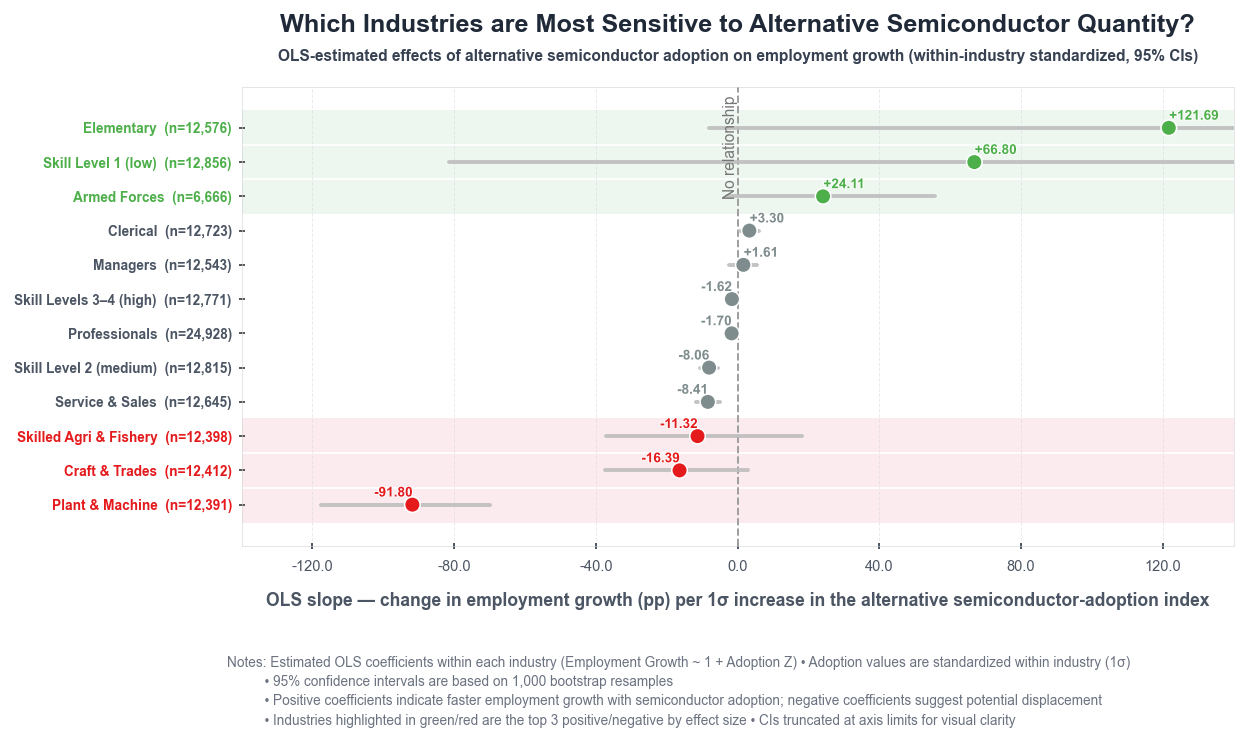

In [163]:
# ============================================
# KPI-style sensitivity chart (auto-scaled, refined)
# Question: "Do industries with greater alternative semiconductor quantity
#            experience different rates of employment growth?"
# Requires df_ml with:
#   - Occupation_Group
#   - Employment_Growth  (percentage points)
#   - log_Alternative_Quantity_Value  (log adoption proxy)
# ============================================

# ---------------- CONFIG ----------------
IND_COL   = "Occupation_Group"
YCOL      = "Employment_Growth_pp"
XCOL_LOG  = "log_Alternative_Quantity_Value"

MIN_N     = 25          # minimum rows per industry
N_BOOT    = 1000        # bootstrap resamples
TOP_K     = 3           # highlight top/bottom industries by effect size

# Colors
POS_COLOR = "#4daf4a"   # green
NEG_COLOR = "#e41a1c"   # red
NEU_COLOR = "#7f8c8d"   # neutral dot color
CI_COLOR  = "#bdbdbd"   # CI line color

# Row highlight bands (for top/bottom industries)
POS_ROW_BAND = "#edf7f0"   # light green for top positives
NEG_ROW_BAND = "#fbebee"   # light red for top negatives

# Optional: color y-axis labels only for highlighted rows
COLOR_YLABELS = True

# ---------------- Helpers ----------------
def _blocks_from_indices(idxs):
    """Group sorted integer indices into contiguous (start, end) blocks inclusive."""
    if not idxs:
        return []
    idxs = sorted(idxs)
    blocks = []
    start = prev = idxs[0]
    for i in idxs[1:]:
        if i == prev + 1:
            prev = i
            continue
        blocks.append((start, prev))
        start = prev = i
    blocks.append((start, prev))
    return blocks


def bootstrap_slope(y, x, n_boot=N_BOOT, rng=None):
    """
    Bootstrap OLS slope for y ~ 1 + x. Returns (beta_mean, (lo95, hi95)).
    Uses slope = cov(x, y) / var(x).
    """
    if rng is None:
        rng = np.random.default_rng(123)
    n = len(y)
    b = np.empty(n_boot, dtype=float)
    for i in range(n_boot):
        idx = rng.integers(0, n, n)        # resample with replacement
        yy, xx = y[idx], x[idx]
        vx = np.var(xx, ddof=1)
        b[i] = np.nan if (vx == 0 or np.isnan(vx)) else np.cov(xx, yy, ddof=1)[0, 1] / vx
    b = b[np.isfinite(b)]
    if b.size == 0:
        return np.nan, (np.nan, np.nan)
    return float(np.mean(b)), (np.percentile(b, 2.5), np.percentile(b, 97.5))


# ---------------- DATA PREP ----------------
df = (
    df0[[IND_COL, YCOL, XCOL_LOG]]
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
    .copy()
)

# Require nonzero variance in the raw adoption proxy
raw_sd = df.groupby(IND_COL)[XCOL_LOG].transform(lambda s: s.std(ddof=1))
df = df[raw_sd > 0].copy()

# Standardize adoption within industry (z-score)
df["_adopt_z"] = df.groupby(IND_COL)[XCOL_LOG].transform(
    lambda s: (s - s.mean()) / s.std(ddof=1)
)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=["_adopt_z", YCOL])

# Filter for sample size and nonzero variance
counts = (
    df.groupby(IND_COL)
        .agg(n=(YCOL, "size"), xstd=("_adopt_z", "std"))
        .reset_index()
)
keep = counts[(counts["n"] >= MIN_N) & (counts["xstd"] > 0)][IND_COL]
df = df[df[IND_COL].isin(keep)].copy()

print(f"Included industries: {df[IND_COL].nunique()}  |  Total rows: {len(df):,}")
if df[IND_COL].nunique() == 0:
    raise ValueError("No valid industries after filtering. Check MIN_N and data coverage.")

# ---------------- STATS ----------------
rows, rng = [], np.random.default_rng(2024)

for g, d in df.groupby(IND_COL, sort=False):
    y = d[YCOL].to_numpy(float)
    x = d["_adopt_z"].to_numpy(float)

    if (len(y) < MIN_N) or (np.nanstd(x) == 0) or np.isnan(x).all() or np.isnan(y).all():
        continue

    beta, (lo, hi) = bootstrap_slope(y, x, N_BOOT, rng)
    if np.isfinite(beta) and np.isfinite(lo) and np.isfinite(hi):
        rows.append({"industry": g, "beta": beta, "lo": lo, "hi": hi, "n": len(d)})

slopes = pd.DataFrame(rows)
if slopes.empty:
    raise ValueError("No valid slope estimates produced. Try lowering MIN_N or checking input data.")

slopes = slopes.replace([np.inf, -np.inf], np.nan).dropna(subset=["beta", "lo", "hi"]).reset_index(drop=True)
slopes = slopes.sort_values("beta").reset_index(drop=True)

print(f"Plotted industries: {len(slopes)}")

# Highlight top positive/negative effects
slopes["color"] = NEU_COLOR
slopes.loc[slopes.nlargest(TOP_K, "beta").index, "color"] = POS_COLOR
slopes.loc[slopes.nsmallest(TOP_K, "beta").index, "color"] = NEG_COLOR

# Indices of rows to band
top_pos_idx = sorted(slopes.nlargest(TOP_K, "beta").index.tolist())
top_neg_idx = sorted(slopes.nsmallest(TOP_K, "beta").index.tolist())
pos_blocks = _blocks_from_indices(top_pos_idx)
neg_blocks = _blocks_from_indices(top_neg_idx)

# Labels
slopes["label"] = slopes["beta"].apply(lambda b: f"{'+' if b>=0 else ''}{b:.2f}")
slopes["ytick"] = slopes.apply(lambda r: f"{r['industry']}  (n={r['n']:,})", axis=1)

# ---------------- AXIS AUTO-SCALE ----------------
xmin_data = float(slopes["lo"].min())
xmax_data = float(slopes["hi"].max())
max_abs = max(abs(xmin_data), abs(xmax_data), 0.05)
pad = 0.10
half = max_abs * (1 + pad)
tick = 0.05
BAND_HALF = np.ceil(half / tick) * tick
XLIM = (-BAND_HALF, BAND_HALF)

# ---------------- PLOT ----------------
fig, ax = plt.subplots(figsize=(9, 5))
def _draw_band_with_stripes(a, b, color):
    # main band rectangle
    ax.axhspan(a - 0.5, b + 0.5, color=color, zorder=0.2)
    # white stripes at row boundaries inside this band
    for j in range(a, b):                          # boundaries j+0.5
        ax.axhline(j + 0.5, color="white", lw=1.0, alpha=0.9, zorder=0.25)

for a, b in pos_blocks:
    _draw_band_with_stripes(a, b, POS_ROW_BAND)
for a, b in neg_blocks:
    _draw_band_with_stripes(a, b, NEG_ROW_BAND)

# Zero line
ax.axvline(0, ls="--", lw=1, color="#9e9e9e", zorder=1)
ax.text(0.005, 0.98, "No relationship", transform=ax.get_xaxis_transform(),
        rotation=90, va="top", ha="right", color="#777", fontsize=8)

# Confidence intervals + points
ypos = np.arange(len(slopes))
ax.hlines(y=ypos, xmin=slopes["lo"], xmax=slopes["hi"],
        color=CI_COLOR, lw=2, alpha=0.9, zorder=2, capstyle="round")
ax.scatter(slopes["beta"], ypos, s=64, c=slopes["color"],
        edgecolor="white", linewidth=0.8, zorder=3)

# KPI labels (with white halo)
y_shift, x_shift = 0.15, 0.09
left_margin, right_margin = XLIM[0] + 0.01, XLIM[1] - 0.01
for i, r in slopes.iterrows():
    dx = 0.01 if r["beta"] >= 0 else -0.01
    x_lbl = np.clip(r["beta"] + dx, left_margin, right_margin)
    ha = "left" if r["beta"] >= 0 else "right"
    ax.text(x_lbl + x_shift, i + y_shift, r["label"], va="bottom", ha=ha,
            fontsize=7, color=r["color"], fontweight="semibold",
            path_effects=[pe.withStroke(linewidth=0.9, foreground="white", alpha=1)],
            zorder=5)

# --- Y-axis ticks ---
ax.set_yticks(ypos)
ax.set_yticklabels(slopes["ytick"], fontsize=7, color=AXIS_TEXT_CLR, weight="semibold")

# Optionally recolor highlighted labels
if COLOR_YLABELS:
    for i, label in enumerate(ax.get_yticklabels()):
        if i in top_pos_idx:
            label.set_color(POS_COLOR)
            label.set_weight("bold")
        elif i in top_neg_idx:
            label.set_color(NEG_COLOR)
            label.set_weight("bold")

HEADROOM = 1.2
ax.set_ylim(-HEADROOM, (len(slopes) - 1) + HEADROOM)

# --- X-axis ---
ax.set_xlim(-140, 140)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.1f}"))
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
ax.tick_params(axis='x', labelsize=7.5, pad=6, colors=AXIS_TEXT_CLR)

ax.set_xlabel("OLS slope — change in employment growth (pp) per 1σ increase in the alternative semiconductor-adoption index",
            fontsize=9, color=AXIS_TEXT_CLR, weight="semibold", labelpad=9)

# --- Titles ---
plt.suptitle("Which Industries are Most Sensitive to Alternative Semiconductor Quantity?",
            x=0.59, y=0.9, color=TITLE_CLR, fontsize=13, weight="bold")
ax.set_title("OLS-estimated effects of alternative semiconductor adoption on employment growth (within-industry standardized, 95% CIs)",
            fontsize=8, color=SUBTITLE_CLR, pad=13)

# --- Footnote ---
foot = ("Notes: Estimated OLS coefficients within each industry (Employment Growth ~ 1 + Adoption Z) • "
        "Adoption values are standardized within industry (1σ)\n"
        "          • 95% confidence intervals are based on 1,000 bootstrap resamples\n"
        "          • Positive coefficients indicate faster employment growth with semiconductor adoption; "
        "negative coefficients suggest potential displacement\n"
        "          • Industries highlighted in green/red are the top 3 positive/negative by effect size"
        " • CIs truncated at axis limits for visual clarity"
        )
plt.figtext(0.185, -0.12, foot, ha="left", va="bottom", fontsize=7,
            color=FOOTNOTE_CLR, linespacing=1.5)

# --- Final styling ---
ax.grid(axis="x", lw=0.5, color="#ddd", alpha=0.6)

plt.tight_layout(rect=[0, 0.02, 1, 0.94])

**Visualization: Sensitivity of Employment Growth to Alternative Quantity by Industry (point estimates only)** (complementary for the figure above)

* *Research Question:*

    **Do industries with higher alternative semiconductor adoption levels experience faster or slower employment growth?**

* *Rationale:*

    This visualization summarizes how employment growth responds to variations in the alternative semiconductor quantity index across industries. Using simple OLS point estimates (without bootstrapped confidence intervals), it shows the direction and magnitude of employment sensitivity to alternative semiconductor adoption. This simplified view complements the confidence-interval figure (above) by emphasizing comparative industry patterns.

**Methodology:**

 This chart shows **point-estimate sensitivities** of employment growth to alternative semiconductor quantity by industry. Used the **same data preparation as for the CI figure (above)**. No bootstrapping or confidence intervals are used. Industries are **ordered by β** and plotted on a symmetric x-axis centered at zero with padded limits and tidy ticks so **positive and negative effects are comparable**; a zero reference line is drawn. Bars are colored **green** when β ≥ 0 (**faster growth** associated with adoption) and **red** when β < 0 (**slower growth or possible displacement**). Y-labels include n, and bar-end labels show the signed β value. Because these are **point estimates from separate per-industry regressions**, **values may differ slightly** from the CI figure that uses bootstrap means. Here, β interprets as the change in employment growth (percentage points) for a 1σ increase in the industry’s alternative semiconductor-adoption index.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\2505776254.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g, d in df.groupby(IND_COL):


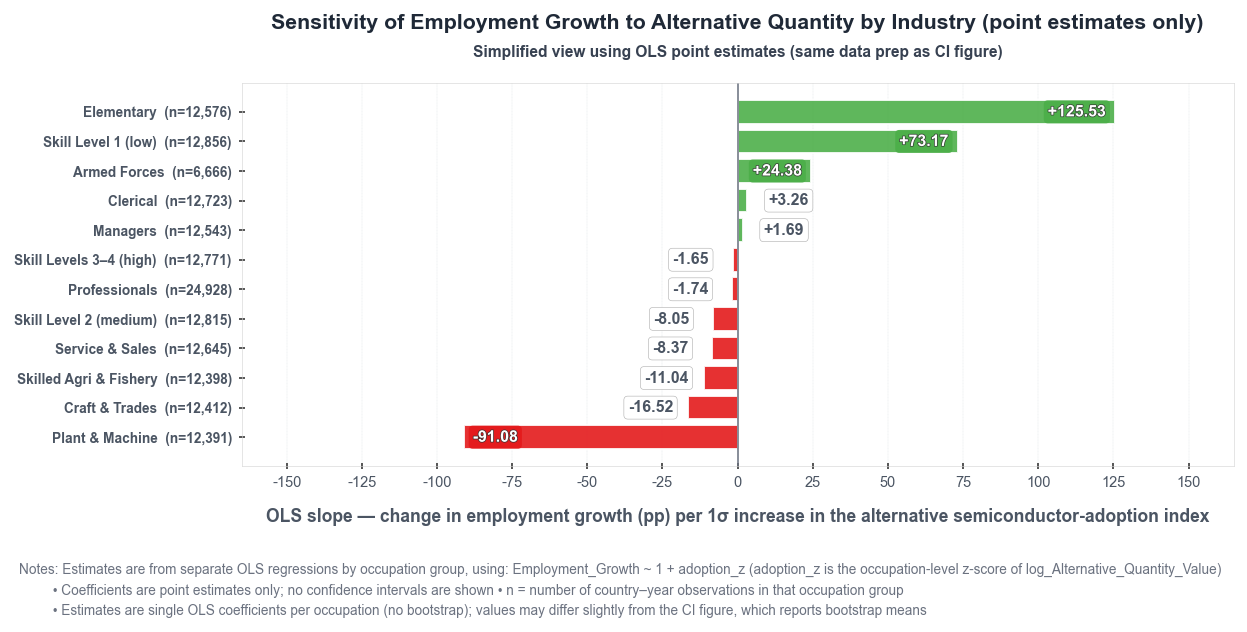

In [164]:
# -------- label helpers (adapted to your bar colors) --------
def _inside_pill(ax, x, y, text, fc, fs=8.0):
    """
    White label drawn INSIDE the bar, right-aligned, on top of a rounded
    pill that uses the bar color `fc`.
    """
    ax.text(
        x, y, text,
        va="center", ha="right",
        color="white", fontsize=fs, weight= "semibold", zorder=5,
        path_effects=[
            pe.Stroke(linewidth=0.8, foreground="#323232", alpha=0.85),
            pe.Normal(),
        ],
        bbox=dict(
            boxstyle="round,pad=0.25",
            fc=fc,
            ec="none",
            alpha=0.95,
        ),
    )

def _outside_box(ax, x, y, text, fs=8.0):
    """
    Black label drawn just OUTSIDE the bar, in a white rounded box.
    Use this for very short bars.
    """
    ax.text(
        x, y, text,
        va="center", ha="left",
        color= AXIS_TEXT_CLR, weight = "semibold", fontsize=fs, zorder=6,
        bbox=dict(
            boxstyle="round,pad=0.25",
            fc="white",
            ec="#B0B0B0",
            lw=0.3,
        ),
    )

# ============================================================
# plotting code
# ============================================================

# Build slopes quickly (no bootstrap, just point estimates)
rows = []
for g, d in df.groupby(IND_COL):
    n = len(d)
    if n < MIN_N or d["_adopt_z"].std(ddof=1) == 0:
        continue
    x = d["_adopt_z"].to_numpy(float)
    y = d[YCOL].to_numpy(float)
    beta = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)  # OLS slope
    rows.append({"industry": g, "beta": beta, "n": n})

# Sort and prepare visuals
slopes = pd.DataFrame(rows).sort_values("beta").reset_index(drop=True)
colors = np.where(slopes["beta"] >= 0, "#4daf4a", "#e41a1c")  # green/red

# --- Build y tick labels with counts ---
yticklabels = [f"{ind}  (n={n:,})"
            for ind, n in zip(slopes["industry"], slopes["n"])]

fig, ax = plt.subplots(figsize=(9, 4))
ypos = np.arange(len(slopes))

bars = ax.barh(ypos, slopes["beta"], color=colors, alpha=0.9)

ax.set_yticks(ypos)
ax.set_yticklabels(yticklabels, fontsize=7, color=AXIS_TEXT_CLR, weight="semibold")

ax.set_xlabel(
    "OLS slope — change in employment growth (pp) per 1σ increase in the alternative semiconductor-adoption index",
    fontsize=9, color=AXIS_TEXT_CLR, weight="semibold", labelpad=9
)

# max abs slope in *percentage points*
max_abs_beta = float(np.abs(slopes["beta"]).max())

# if it's extremely small (all ~0), fall back to something tiny
if max_abs_beta < 0.5:
    max_abs_beta = 0.5

# add headroom, and make it symmetric so 0 stays centered
headroom = 0.10  # 10%
half_range = max_abs_beta * (1 + headroom)
ax.set_xlim(-half_range, half_range)


# --- Titles ---
plt.suptitle("Sensitivity of Employment Growth to Alternative Quantity by Industry (point estimates only)",
            x=0.59, y= 0.95, color=TITLE_CLR, fontsize=11, weight="bold")
ax.set_title("Simplified view using OLS point estimates (same data prep as CI figure)",
            fontsize=8, color=SUBTITLE_CLR, pad=13)
plt.figtext(
    0.02, -0.03,
    "Notes: Estimates are from separate OLS regressions by occupation group, using: Employment_Growth ~ 1 + adoption_z "
    "(adoption_z is the occupation-level z-score of log_Alternative_Quantity_Value)\n"
    "         • Coefficients are point estimates only; no confidence intervals are shown"
    " • n = number of country–year observations in that occupation group\n"
    "         • Estimates are single OLS coefficients per occupation (no bootstrap); values may differ slightly from the CI figure, which reports bootstrap means",
    ha="left", va="top", fontsize=7, color=FOOTNOTE_CLR, linespacing=1.6
)

# Find the largest absolute slope (in percentage points)
max_abs = float(np.abs(slopes["beta"]).max())
# Round it up to a nice multiple of 25 (you can use 10 if your numbers are smaller)
tick_step = 25
xmax = np.ceil(max_abs / tick_step) * tick_step
#Add slight headroom (10% of range)
pad = 0.10 * xmax
x_left, x_right = -(xmax + pad), (xmax + pad)
# Apply the new limits
ax.set_xlim(x_left, x_right)
# Build evenly spaced ticks
xticks = np.arange(-xmax, xmax + tick_step, tick_step)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:.0f}" for x in xticks],
        fontsize=7.5, color=AXIS_TEXT_CLR)
# Draw a clean zero line
ax.axvline(0, color=FOOTNOTE_CLR, lw=0.8, zorder=1)

# --- Annotate bars using helpers ---
INSIDE_THR = 20  # if |beta| >= this -> try to put inside

for i, (bar, beta, col) in enumerate(zip(bars, slopes["beta"], colors)):
    y = bar.get_y() + bar.get_height() / 2
    txt = f"{beta:+.2f}"
    if abs(beta) >= INSIDE_THR:
        # put INSIDE, slightly inset from bar end
        # for positive bar, text near right edge; for negative, mirror
        if beta > 0:
            x = beta - 3  # small inset
        else:
            x = beta + 18
        _inside_pill(ax, x, y, txt, fc=col, fs=8.2)
    else:
        # bar is too short -> OUTSIDE on the correct side
        if beta > 0:
            x = beta + 7
        else:
            x = beta - 20  # for very small negative, you may want +0.02 and ha='right'
        _outside_box(ax, x, y, txt, fs=8.2)

plt.tight_layout()

**Visualization: Employment Growth by Industry and Semiconductor Shipment Intensity (Net/Gross Weight)**

* *Research Question:*

    **How does employment growth differ between industries with high and low semiconductor shipment intensity, and does this relationship vary when measured by net versus gross shipment weight?**

* *Rationale:*

    This visualization compares average employment growth between industries with high and low semiconductor shipment intensity, using both net and gross weights as alternative exposure measures. By contrasting these splits, it reveals whether greater semiconductor trade intensity is linked to stronger or weaker employment growth across sectors.

* **Methodology:**

    This figure compares **employment growth** between **“High” and “Low” semiconductor-shipment intensity** groups **within each occupation**, for both net and gross weight measures. Starting from country–year microdata with Occupation_Group, Employment_Growth_pp, and the log of net/gross shipment weight, we drop missing/±∞ values and retain occupations with at **least 25 observations**. For each occupation separately, we z-score the chosen weight measure and split observations at the **within-occupation median** into **High** (above median) and **Low** (at or below). **Employment growth** (in percentage points per year) is then **averaged within each occupation×group**, and **95% bootstrap confidence intervals** are computed from **1,000 resamples** using a common random seed for reproducibility. To make panels directly comparable, **occupations** are ordered by the **High-group mean** and a common ordering and shared y-axis limit are applied across the net and gross charts. Bars (**gray = Low, green = High**) display **group means with error bars for CIs**, value labels above each bar, and a badge reporting the average High–Low difference across occupations. Interpreting the chart: within each occupation, a **larger High than Low bar** indicates **faster employment growth** when semiconductor-shipment intensity is higher; overlapping CIs signal greater uncertainty.

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\2253661669.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  z = df.groupby(IND_COL)[weight_col].transform(
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\2253661669.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out["Weight_Group"] = out.groupby(IND_COL)["_z"].transform(
C:\Users\Cursist\AppData\Local\Temp\ipykernel_15640\2253661669.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

<function matplotlib.pyplot.show(close=None, block=None)>

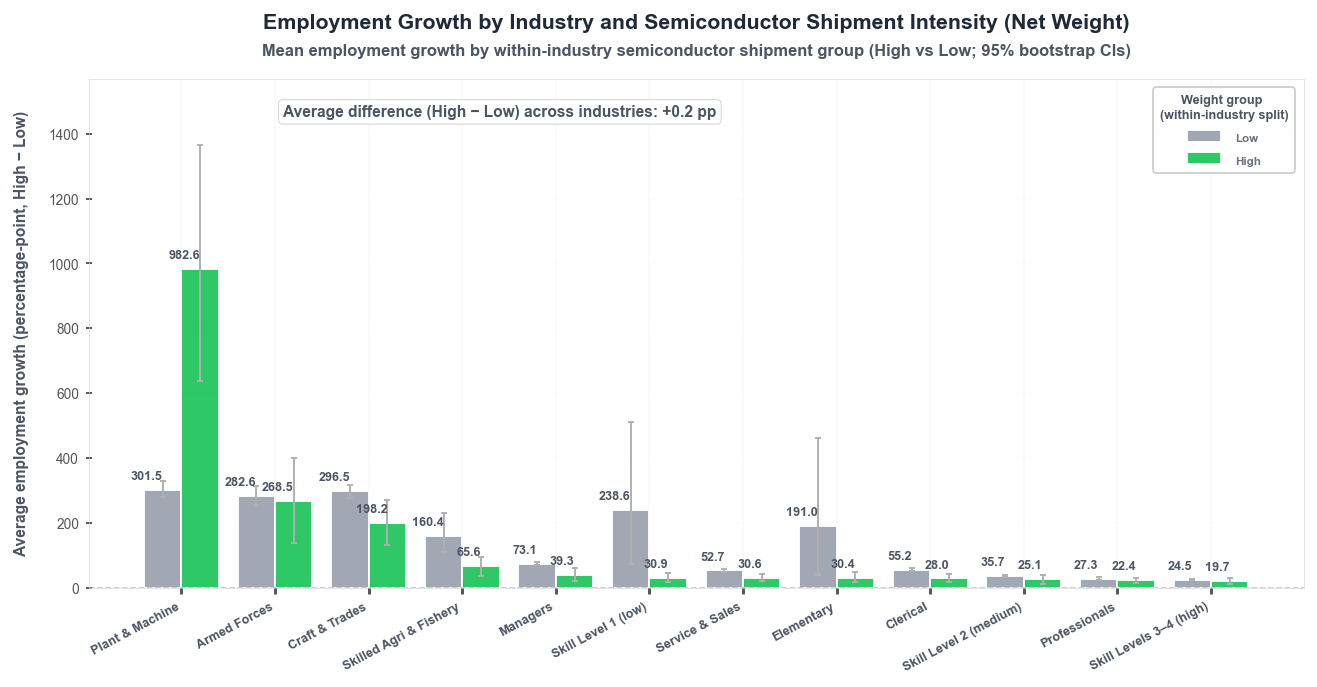

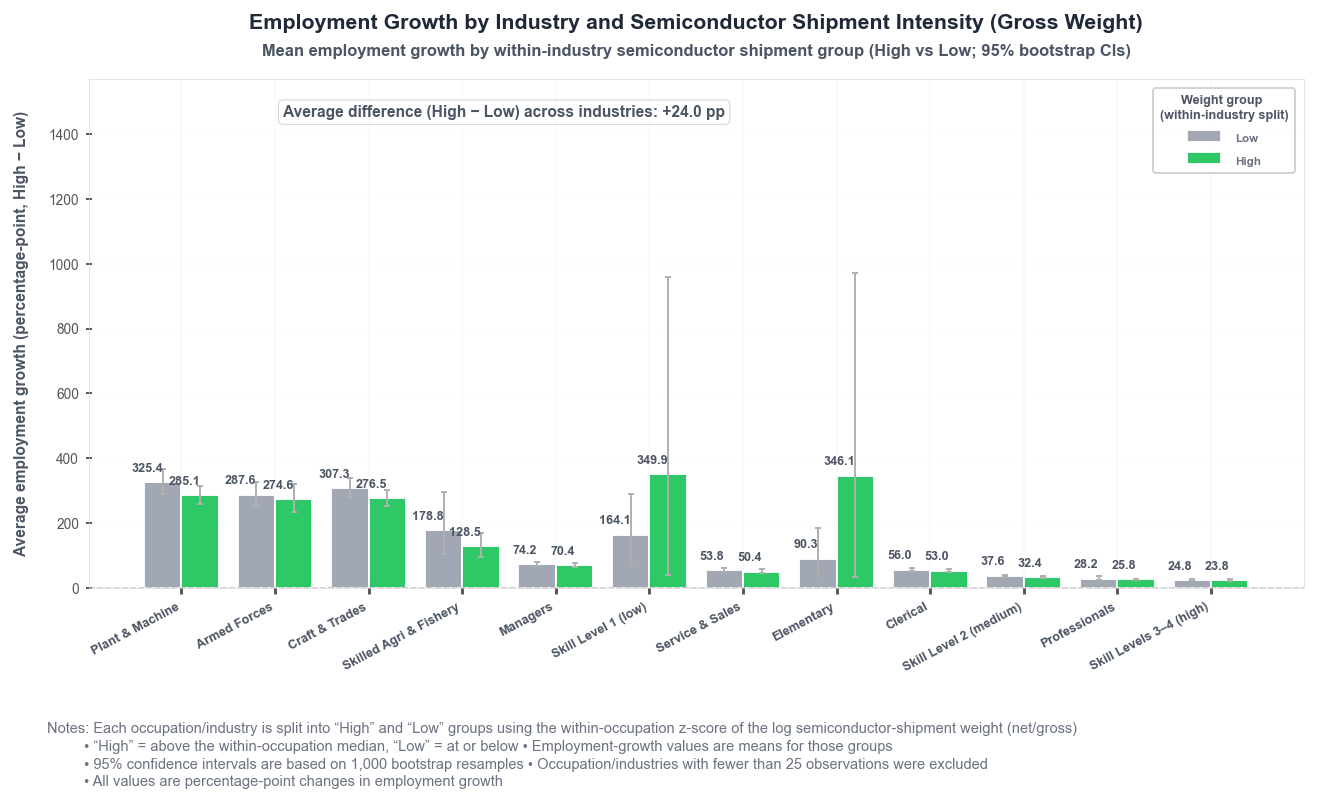

In [166]:
# ============================================
# Employment Growth by Industry: High vs Low shipment weights (Net & Gross)
# ============================================
# ---------------- CONFIG ----------------
IND_COL   = "Occupation_Group"
YCOL      = "Employment_Growth_pp"
NET       = "log_Net_Weight_Estimated"
GROSS     = "log_Gross_Weight_Estimated"

MIN_N     = 25
N_BOOT    = 1000
BAR_WIDTH = 0.40
COLORS    = {"Low": "#9ca3af", "High": "#22c55e"}    # gray vs green
CI_COLOR  = "#B0B0B0"
YLIM_MAX  = None  # set to e.g. 14 if you want to hard-lock both charts

# ---------------- HELPERS ----------------
def within_industry_split(df, weight_col):
    """
    Standardize weight within industry, then make a within-industry High/Low
    split by the within-industry median.
    """
    z = df.groupby(IND_COL)[weight_col].transform(
        lambda s: (s - s.mean()) / s.std(ddof=1)
    )
    out = df.assign(_z=z).dropna(subset=["_z", YCOL]).copy()

    # median split within industry
    out["Weight_Group"] = out.groupby(IND_COL)["_z"].transform(
        lambda s: np.where(s > s.median(), "High", "Low")
    )

    # keep industries with enough obs
    keep_counts = out.groupby(IND_COL)[YCOL].size()
    valid_inds = keep_counts[keep_counts >= MIN_N].index
    out = out[out[IND_COL].isin(valid_inds)].copy()
    return out

def mean_ci(x, n_boot=N_BOOT, rng=None):
    """
    Bootstrap 95% CI for the mean.
    IMPORTANT: rng must be passed from caller so different groups
    don't all start from the same seed.
    """
    if rng is None:
        raise ValueError("mean_ci expects an RNG from caller.")
    x = np.asarray(x, float)
    x = x[~np.isnan(x)]
    n = len(x)
    idx = rng.integers(0, n, size=(n_boot, n))
    boots = x[idx].mean(axis=1)
    lo, hi = np.percentile(boots, [2.5, 97.5])
    return float(x.mean()), float(lo), float(hi)

def summarize_growth(df_split):
    """
    Return aggregated KPIs (mean + CI) and an industry order (by High mean).
    """
    rows = []
    rng = np.random.default_rng(7)   # one RNG for all industries/groups here

    for (occ, grp), d in df_split.groupby([IND_COL, "Weight_Group"]):
        m, lo, hi = mean_ci(d[YCOL].to_numpy(), rng=rng)
        rows.append({
            "industry": occ,
            "Weight_Group": grp,
            "mean": m,
            "lo": lo,
            "hi": hi,
            "n": len(d),
        })

    agg = pd.DataFrame(rows)

    # order industries by the High group’s mean (descending)
    order = (
        agg[agg["Weight_Group"] == "High"]
        .sort_values("mean", ascending=False)["industry"]
        .tolist()
    )
    return agg, order

def reorder_to_common(agg, common_order):
    """
    Force a common industry order across Net and Gross panels.
    """
    agg = agg.copy()
    agg["industry"] = pd.Categorical(
        agg["industry"],
        categories=common_order,
        ordered=True
    )
    agg = agg.sort_values(["industry", "Weight_Group"])
    return agg

def plot_high_low_bars(agg, order, title, subtitle, ylim_max=None, annotate_summary=True):
    fig, ax = plt.subplots(figsize=(9.5, 5))

    inds  = agg["industry"].cat.codes.values
    uinds = np.unique(inds)

    # ---- draw bars for Low & High
    for j, grp in enumerate(["Low", "High"]):
        sub = agg[agg["Weight_Group"] == grp]
        x = sub["industry"].cat.codes.values + (j - 0.5) * BAR_WIDTH

        ax.bar(
            x, sub["mean"],
            width=BAR_WIDTH,
            color=COLORS[grp],
            label=grp,
            alpha=0.95
        )

        # CIs
        err_lo = sub["mean"] - sub["lo"]
        err_hi = sub["hi"] - sub["mean"]
        ax.errorbar(
            x, sub["mean"],
            yerr=[err_lo, err_hi],
            fmt="none", ecolor=CI_COLOR, elinewidth=1.0, capsize=1.5, capthick=1, zorder=3)
                                
        # KPI labels
        for xi, m in zip(x, sub["mean"]):
            yrange = (ylim_max if ylim_max is not None else ax.get_ylim()[1]) - 0
            offset = yrange * 0.015
            ax.text(
                xi, m + offset,
                f"{m:.1f}",
                ha="right", va="bottom", fontsize=6.5, color=AXIS_TEXT_CLR, weight="bold")
                                
    # ---- x ticks (centered on industry)
    ax.set_xticks(uinds)
    ax.set_xticklabels(
        [order[i] for i in range(len(uinds))],
        rotation=28, ha="right", fontsize=6.5, color=AXIS_TEXT_CLR, weight="semibold"
    )

    # ---- y-limits
    if ylim_max is not None:
        ax.set_ylim(0, ylim_max)
    else:
        ymax = max(agg["hi"].max(), 0) * 1.05
        ax.set_ylim(0, ymax)

    ax.tick_params(axis="x", length=6, width=1.5)

    # baseline & grid
    ax.axhline(0, color="#999", lw=0.8, ls="--", alpha=0.6)
    ax.grid(axis="y", alpha=0.2)

    # titles and legend
    ax.set_ylabel(
        "Average employment growth (percentage-point, High − Low)",
        color=AXIS_TEXT_CLR,
        fontsize=8,
        labelpad=10,
        weight="semibold"
    )
    ax.set_title(title, fontsize=11, color=TITLE_CLR, weight="bold", pad = 26)
    ax.text(
        0.5, 1.04, subtitle, transform=ax.transAxes, fontsize=8.5, color=AXIS_TEXT_CLR, weight="semibold",
        ha="center", va="bottom")
    leg = ax.legend(
        title="      Weight group\n(within-industry split)",
        frameon=True,
        loc="upper right"
    )

    # legend title style
    leg.get_title().set_fontsize(6.5)
    leg.get_title().set_weight("semibold")
    leg.get_title().set_color(AXIS_TEXT_CLR)

    # legend label style
    for text in leg.get_texts():
        text.set_fontsize(6)
        text.set_color(FOOTNOTE_CLR)
        text.set_weight("semibold")

    # ---- summary annotation: avg (High − Low)
    if annotate_summary:
        wide = agg.pivot(index="industry", columns="Weight_Group", values="mean")
        if {"High", "Low"}.issubset(wide.columns):
            avg_diff = float((wide["High"] - wide["Low"]).mean())
            ann = f"Average difference (High − Low) across industries: {avg_diff:+.1f} pp"
            ax.text(
                0.16, 0.95,
                ann,
                transform=ax.transAxes,
                ha="left", va="top",
                fontsize=8,
                color=AXIS_TEXT_CLR,
                weight="semibold",
                bbox=dict(
                    boxstyle="round,pad=0.3",
                    fc="white",
                    ec="#d0d0d0",
                    lw=0.5,
                    alpha=0.95,
                ),
            )
    plt.tight_layout()

# ---------------- BUILD DATA ----------------
use_cols = [IND_COL, YCOL, NET, GROSS]
df_w = (
    df0[use_cols]
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
    .copy()
)

# Net & Gross splits and summaries
df_net_split   = within_industry_split(df_w, NET)
df_gross_split = within_industry_split(df_w, GROSS)

agg_net,   order_net   = summarize_growth(df_net_split)
agg_gross, order_gross = summarize_growth(df_gross_split)

# make a common industry order so both charts line up
common = [i for i in order_net if i in order_gross]
common += [i for i in order_gross if i not in common]

agg_net_c   = reorder_to_common(agg_net, common)
agg_gross_c = reorder_to_common(agg_gross, common)

# shared y-limit for both charts
if YLIM_MAX is None:
    shared_max = max(agg_net_c["hi"].max(), agg_gross_c["hi"].max()) * 1.15
else:
    shared_max = YLIM_MAX

# ---------------- PLOT BOTH ----------------
plot_high_low_bars(
    agg_net_c,
    common,
    title="Employment Growth by Industry and Semiconductor Shipment Intensity (Net Weight)",
    subtitle="Mean employment growth by within-industry semiconductor shipment group (High vs Low; 95% bootstrap CIs)",
    ylim_max=shared_max,
    annotate_summary=True,
)

plot_high_low_bars(
    agg_gross_c,
    common,
    title="Employment Growth by Industry and Semiconductor Shipment Intensity (Gross Weight)",
    subtitle="Mean employment growth by within-industry semiconductor shipment group (High vs Low; 95% bootstrap CIs)",
    ylim_max=shared_max,
    annotate_summary=True,
)

foot = ("Notes: Each occupation/industry is split into “High” and “Low” groups using the within-occupation z-score of the log semiconductor-shipment weight (net/gross)\n"
        "         • “High” = above the within-occupation median, “Low” = at or below • Employment-growth values are means for those groups\n"
        "         • 95% confidence intervals are based on 1,000 bootstrap resamples • Occupation/industries with fewer than 25 observations were excluded\n"
        "         • All values are percentage-point changes in employment growth")
plt.figtext(0.04, -0.04, foot, ha="left", va="top",
        fontsize=7.5, color=FOOTNOTE_CLR, linespacing=1.35)
plt.show

**Correlation matrix**

To explore how strongly trade value, weight, and R&D spending are related to the target - employment growth - and to each other, a correlation matrix will be used.

Text(0.5, 1.0, 'Correlation Matrix of Key Features and Employment Growth')

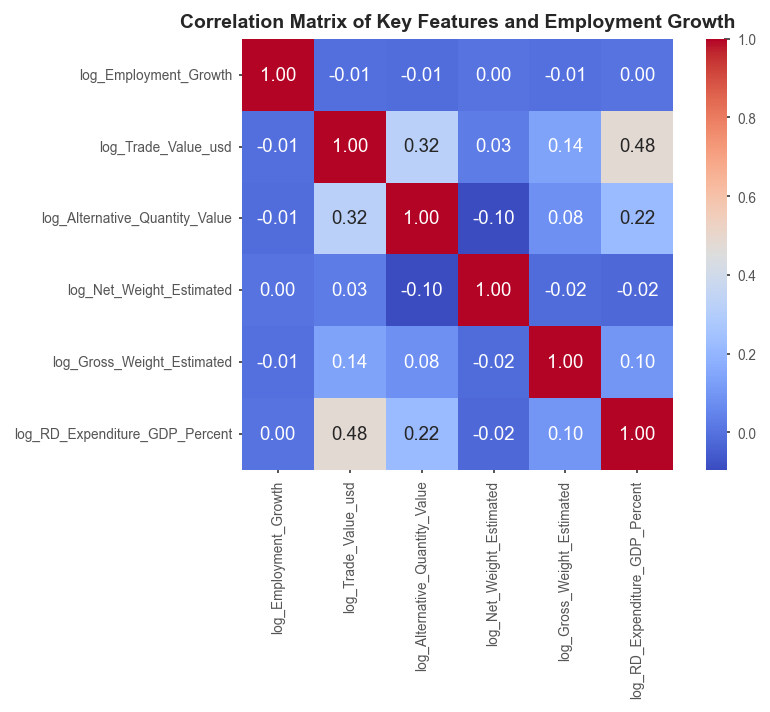

In [167]:
# Numeric featurs for correlation matrix
corr_features = [
    'log_Employment_Growth',
    'log_Trade_Value_usd',
    'log_Alternative_Quantity_Value',
    'log_Net_Weight_Estimated',
    'log_Gross_Weight_Estimated',
    'log_RD_Expenditure_GDP_Percent'
]

# Compute correlation matrix
corr_matrix = df_ml[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Key Features and Employment Growth')

All features show very weak linear correlation with the target (correlation coefficients near 0).

The strongest correlation is between log_RD_Expenditure_GDP_Percent and log_Trade_Value_usd (r = 0.48), but this is not high enough to cause multicollinearity concerns.

Weak correlation does not imply low predictive value.

Many machine learning models (e.g., Random Forest, XGBoost) can detect nonlinear or interaction effects that are not visible in a basic correlation matrix.

**Feature Engineering**

In the context of this project, some missing values are not just random gaps but may actually reflect real-world conditions.

These missing values can therefore carry informative signals about technological presence and trade behavior.

This new feature 'RD_Missing_Flag' tells the model when R&D spending data is missing.

That missing data might mean a country doesn’t invest much in research and development, which can affect how jobs are changing.

By adding this flag, the model can learn that low or missing R&D may be linked to different patterns in employment.

In [168]:
df_ml['RD_Missing_Flag'] = df_ml['RD_Expenditure_GDP_Percent'].isna().astype(int)

Missing values in Alternative_Quantity_Value may indicate high-tech or digital goods that are traded only in monetary terms, without a standard physical unit reported.

This missing data likely means the product is digital or very small, so it’s not measured in regular units like weight or quantity.

This can help show how new technology and digital products are changing jobs in some industries.

In [169]:
df_ml['AlternativeQty_Missing_Flag'] = df_ml['Alternative_Quantity_Value'].isna().astype(int)

The Year_Group feature uses 4 bins that reflect distinct phases in technological and economic change.

These time-based categories help the model learn how employment patterns shifted across major tech eras, while improving interpretability.

In [170]:
# New feature: Year_Group (Time-Based Binning)

df_ml['Year_Group'] = pd.cut(df_ml['Year'], 
                            bins=[1999, 2005, 2012, 2020, 2025], 
                            labels=['2000s', 'Early 2010s', 'Late 2010s', '2020s'])
#  Beginning from 1999 (the dataset contains data for 2000-2023 years) is a safeguard to make sure the earliest year in data (2000) is captured cleanly.

These are domain-driven bins, not just statistical. 

They roughly align with major global or technological events:

2000–2004	Early internet, pre-smartphone era

2005–2011	Rise of mobile tech, early AI growth

2012–2019	Big data, platform economy, automation focus

2020–2023	Post-COVID acceleration of digital transformation

In [172]:
df_ml.head()  # to check the first few rows of the DataFrame after adding new features

Year  Country Trade_Flow_Type Partner_Code  \
0  2010  Albania          Export           H3   
1  2012  Albania          Export           H4   
2  2012  Albania          Export           H4   
3  2012  Albania          Export           H4   
4  2012  Albania          Export           H4   

                                      Commodity_Type  \
0                     Electronic integrated circuits   
1  Diodes, transistors, similar semiconductor dev...   
2  Diodes, transistors, similar semiconductor dev...   
3                     Electronic integrated circuits   
4                     Electronic integrated circuits   

   Alternative_Quantity_Value  Net_Weight_Estimated  Gross_Weight_Estimated  \
0                       291.0                   0.0                     0.0   
1                      1354.0                   0.0                     0.0   
2                      1354.0                   0.0                     0.0   
3                        25.0                   0.0                     0.0   
4                        25.0                   0.0                     0.0   

   Trade_Valuation_Source_Code  Legacy_Estimation_Method  ...  \
0                            0                      True  ...   
1                            0                      True  ...   
2                            0                      True  ...   
3                            0                      True  ...   
4                            0                      True  ...   

   log_Trade_Value_usd  log_Alternative_Quantity_Value  \
0             7.036148                        5.676754   
1             9.876476                        7.211557   
2             9.876476                        7.211557   
3            10.828342                        3.258097   
4            10.828342                        3.258097   

   log_Net_Weight_Estimated  log_Gross_Weight_Estimated  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   log_Employment_Growth  log_RD_Expenditure_GDP_Percent Occupation_Group  \
0              -0.105422                             NaN     Armed Forces   
1              -0.279833                             NaN     Armed Forces   
2              -0.026937                             NaN     Armed Forces   
3               0.027683                             NaN     Armed Forces   
4              -0.026937                             NaN     Armed Forces   

  RD_Missing_Flag  AlternativeQty_Missing_Flag   Year_Group  
0               1                            0  Early 2010s  
1               1                            0  Early 2010s  
2               1                            0  Early 2010s  
3               1                            0  Early 2010s  
4               1                            0  Early 2010s  

[5 rows x 30 columns]

In [173]:
df_ml.info()  # new features - 'RD_Missing_Flag', AlternativeQty_Missing_Flag' and 'Year_Group' - are added into dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169985 entries, 0 to 169984
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Year                            169985 non-null  int64   
 1   Country                         169985 non-null  object  
 2   Trade_Flow_Type                 169985 non-null  object  
 3   Partner_Code                    169985 non-null  object  
 4   Commodity_Type                  169985 non-null  object  
 5   Alternative_Quantity_Value      160043 non-null  float64 
 6   Net_Weight_Estimated            169985 non-null  float64 
 7   Gross_Weight_Estimated          169985 non-null  float64 
 8   Trade_Valuation_Source_Code     169985 non-null  int64   
 9   Legacy_Estimation_Method        169985 non-null  bool    
 10  Officially_Reported_by_Country  169985 non-null  bool    
 11  Trade_Value_Is_Estimated        169985 non-null  bool    
 12  Al

In [174]:
# drop unnecessary columns
df_ml.drop(columns=['Employment_Count', 'Occupation_Group', 'Year'], inplace=True)  

In [175]:
df_ml.info()  # 3 columns are dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169985 entries, 0 to 169984
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Country                         169985 non-null  object  
 1   Trade_Flow_Type                 169985 non-null  object  
 2   Partner_Code                    169985 non-null  object  
 3   Commodity_Type                  169985 non-null  object  
 4   Alternative_Quantity_Value      160043 non-null  float64 
 5   Net_Weight_Estimated            169985 non-null  float64 
 6   Gross_Weight_Estimated          169985 non-null  float64 
 7   Trade_Valuation_Source_Code     169985 non-null  int64   
 8   Legacy_Estimation_Method        169985 non-null  bool    
 9   Officially_Reported_by_Country  169985 non-null  bool    
 10  Trade_Value_Is_Estimated        169985 non-null  bool    
 11  Alt_Quantity_Is_Estimated       169985 non-null  bool    
 12  Gr

To analyze relationships between the target variable and input features, as well as between features themselves, a correlation matrix was used.

My dataset includes both categorical and numerical features, and the relationships may be non-linear.

So, Phik correlation was chosen because it:

* Handles mixed data types (numeric, categorical, boolean)

* Captures both linear and non-linear relationships.

In [176]:
columns_to_drop_phik = ['Employment_Growth', 'Trade_Value_usd', 'Alternative_Quantity_Value', 'Net_Weight_Estimated', 'RD_Expenditure_GDP_Percent',
    'Gross_Weight_Estimated']    # it will be used Log-transformed columns instead of original ones and binned "Year_Group" instead of "Year" for correction analysis

In [177]:
df_to_phik = df_ml.drop(columns= columns_to_drop_phik)  # to drop columns that are not needed for the phik correlation analysis                                 

interval columns not set, guessing: ['Trade_Valuation_Source_Code', 'log_Trade_Value_usd', 'log_Alternative_Quantity_Value', 'log_Net_Weight_Estimated', 'log_Gross_Weight_Estimated', 'log_Employment_Growth', 'log_RD_Expenditure_GDP_Percent', 'RD_Missing_Flag', 'AlternativeQty_Missing_Flag']


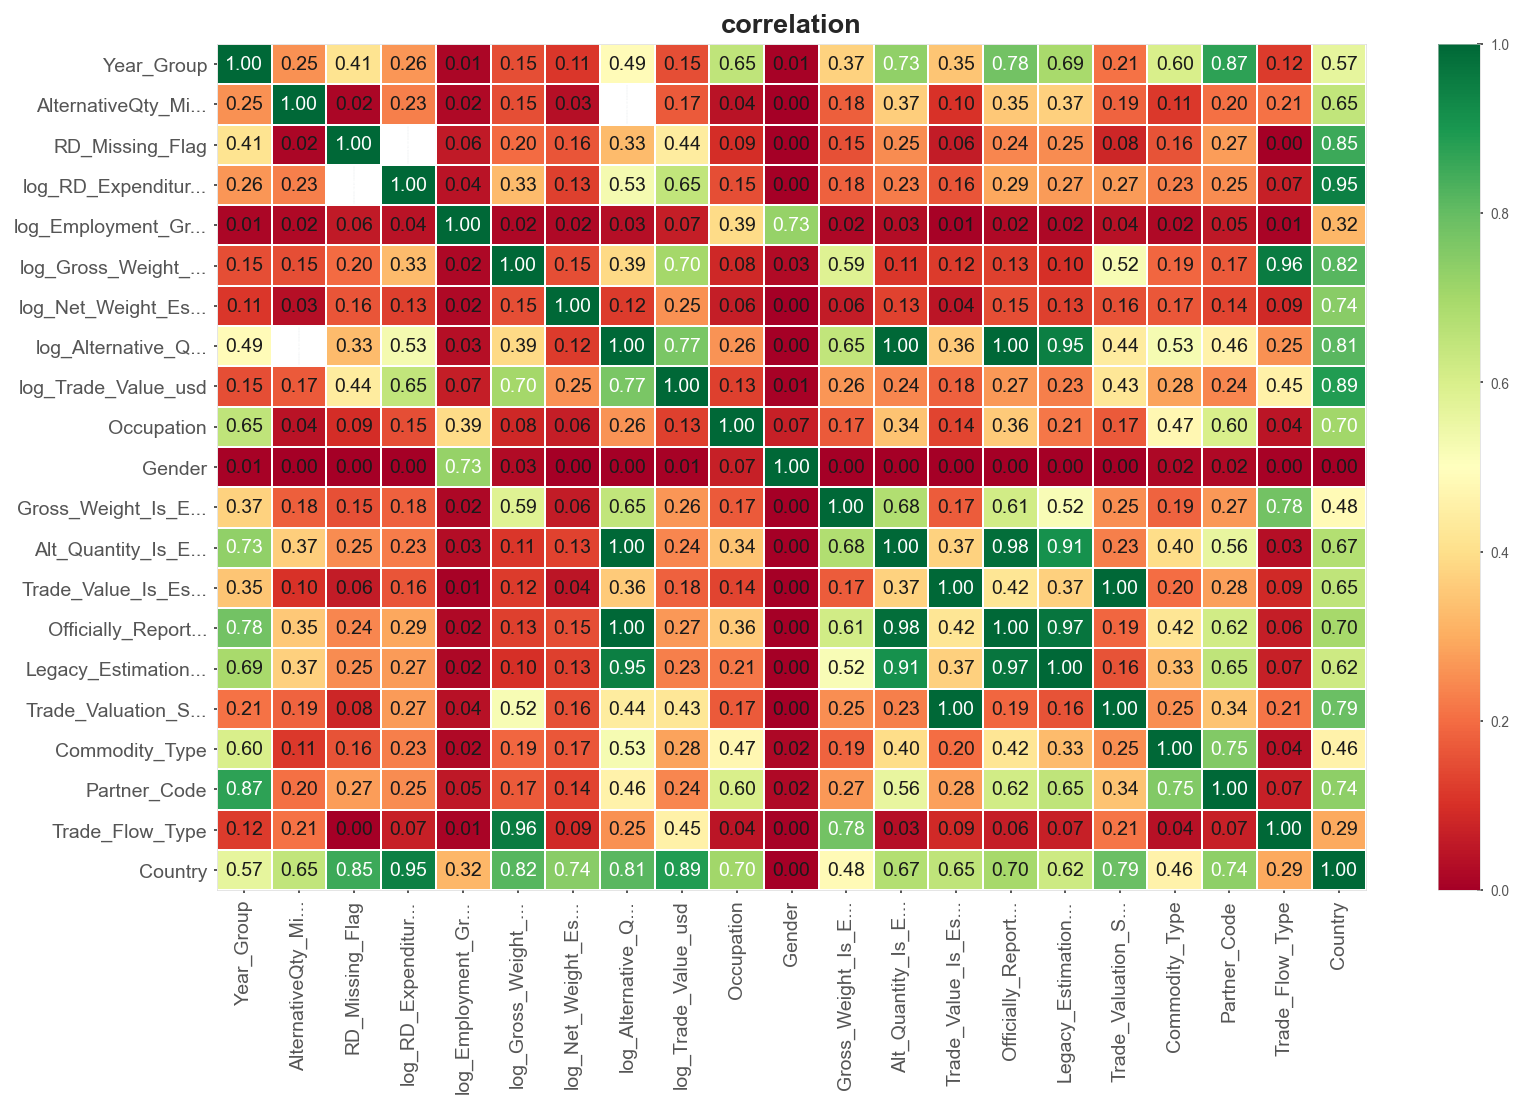

In [178]:
phik_corr = df_to_phik.phik_matrix(interval_cols=None)

plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    figsize=(12, 8),  
    vmin=0.0,
    vmax=1.0
)

In [179]:
# Sort features by correlation with the target (EG_Binned)

target_feature_corr = phik_corr['log_Employment_Growth'].drop('log_Employment_Growth').sort_values(ascending=False)  # drop self-correlation, sort by absolute value
target_feature_corr

Gender                            0.725447
Occupation                        0.391127
Country                           0.317984
log_Trade_Value_usd               0.065704
RD_Missing_Flag                   0.056793
Partner_Code                      0.051014
log_RD_Expenditure_GDP_Percent    0.042398
Trade_Valuation_Source_Code       0.036218
log_Alternative_Quantity_Value    0.033858
Alt_Quantity_Is_Estimated         0.029201
Officially_Reported_by_Country    0.021970
Commodity_Type                    0.020859
AlternativeQty_Missing_Flag       0.020626
log_Net_Weight_Estimated          0.020518
log_Gross_Weight_Estimated        0.019420
Gross_Weight_Is_Estimated         0.018888
Legacy_Estimation_Method          0.015984
Year_Group                        0.011872
Trade_Flow_Type                   0.011017
Trade_Value_Is_Estimated          0.006724
Name: log_Employment_Growth, dtype: float64

Tech-related features show limited predictive power on their own on target (0.03-0.07), but may have a stronger impact when considered alongside factors such as occupation, country, or gender. Their influence on target is likely more significant in combination with other contextual variables rather than in isolation.

Tech-related features have weak but stronger influence on occupation type (0.15-0.39). This suggests that occupation itself is not defined primarily by tech exposure, but may still be influenced by it when combined with other contextual factors like region, gender, or time period.

I would like to investigate whether similarly weak relationships between tech-features and target are observed in technologically advanced countries.

It is possible that the weak tech-feature-target relationship reflects a global trend influenced by tech-lagging countries, while a stronger relationship may be present in tech-leading countries

Phik matrix for leading tech-driven countries:

In [180]:
# Filter to leading countries only
df_leaders = df_ml[df_ml['Country'].isin(tech_countries_canon)].copy()

In [181]:
df_leaders_to_phik= df_leaders.drop(columns= columns_to_drop_phik)

interval columns not set, guessing: ['Trade_Valuation_Source_Code', 'log_Trade_Value_usd', 'log_Alternative_Quantity_Value', 'log_Net_Weight_Estimated', 'log_Gross_Weight_Estimated', 'log_Employment_Growth', 'log_RD_Expenditure_GDP_Percent', 'RD_Missing_Flag', 'AlternativeQty_Missing_Flag']


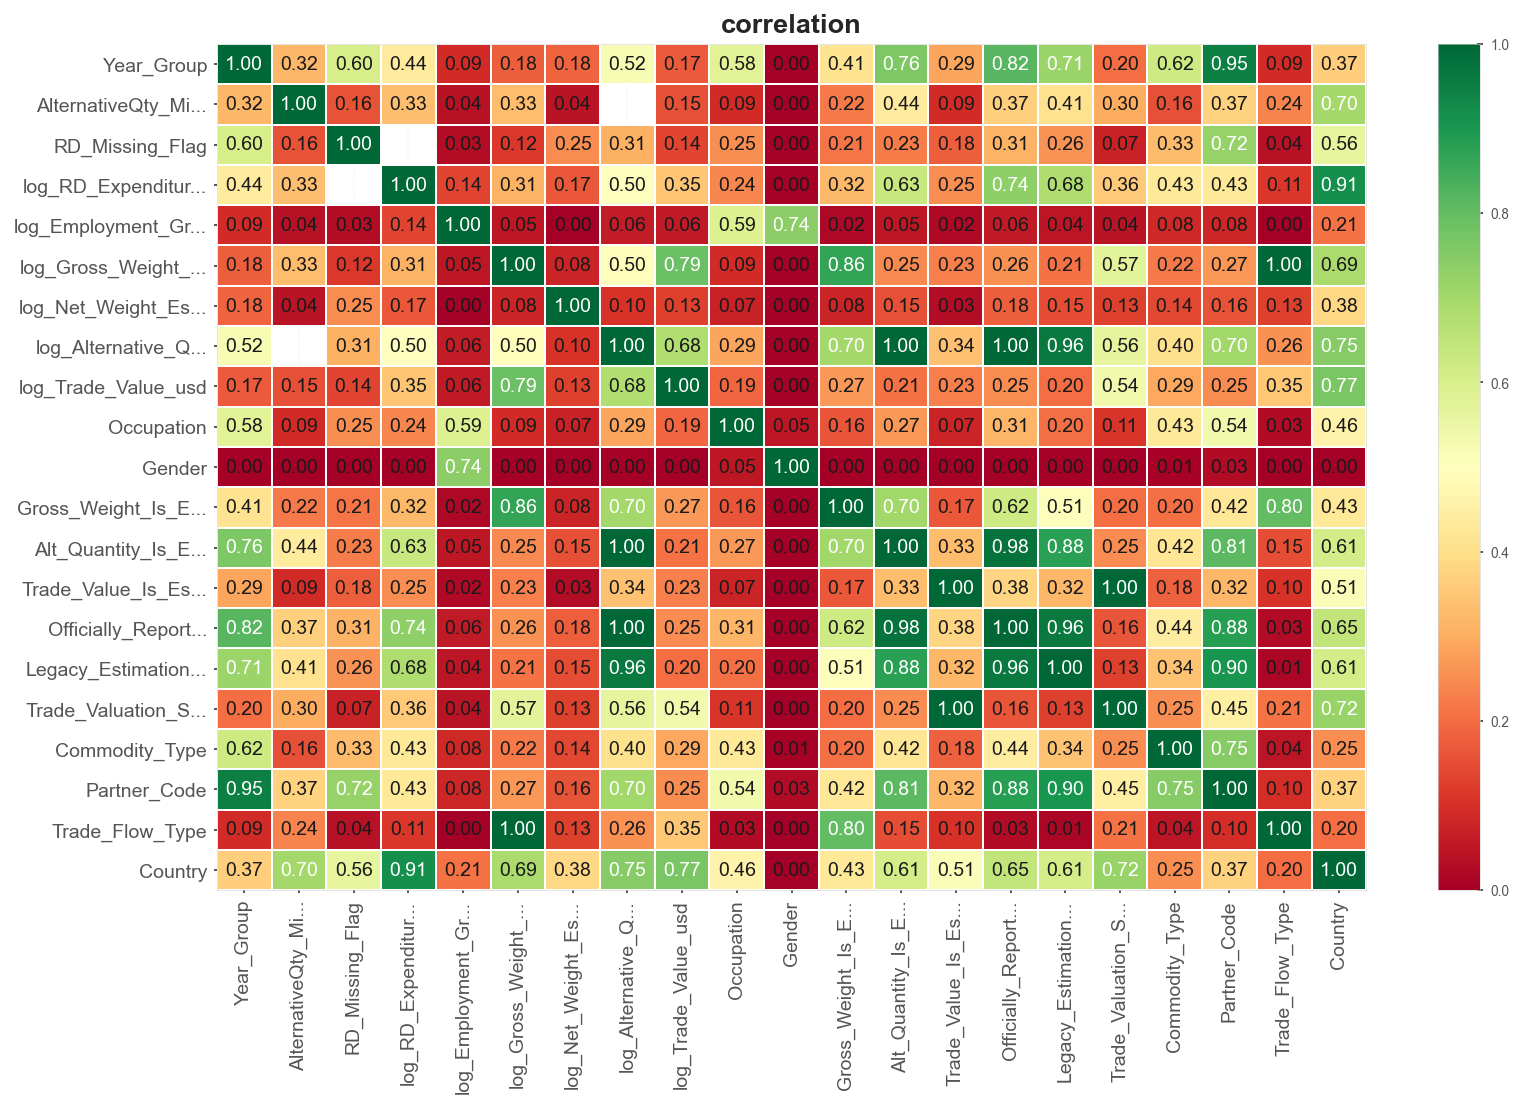

In [182]:
phik_corr_leaders = df_leaders_to_phik.phik_matrix()

plot_correlation_matrix(
    phik_corr_leaders.values,
    x_labels=phik_corr_leaders.columns,
    y_labels=phik_corr_leaders.index,
    figsize=(12, 8),
    vmin=0,
    vmax=1
)

In [184]:
target_corr_leaders = phik_corr_leaders['log_Employment_Growth'].drop('log_Employment_Growth').sort_values(ascending=False)
print("Phik correlation with Employment_Growth (Leading Countries):")
print(target_corr_leaders)

Phik correlation with Employment_Growth (Leading Countries):
Gender                            0.738514
Occupation                        0.588469
Country                           0.210277
log_RD_Expenditure_GDP_Percent    0.136391
Year_Group                        0.091536
Commodity_Type                    0.084397
Partner_Code                      0.081167
log_Alternative_Quantity_Value    0.059124
Officially_Reported_by_Country    0.057968
log_Trade_Value_usd               0.055997
log_Gross_Weight_Estimated        0.049469
Alt_Quantity_Is_Estimated         0.049419
Legacy_Estimation_Method          0.044880
Trade_Valuation_Source_Code       0.041924
AlternativeQty_Missing_Flag       0.037915
RD_Missing_Flag                   0.029014
Trade_Value_Is_Estimated          0.021122
Gross_Weight_Is_Estimated         0.017196
Trade_Flow_Type                   0.000000
log_Net_Weight_Estimated          0.000000
Name: log_Employment_Growth, dtype: float64


Comparing tech-features-target relationships:

Many features, particularly log_RD_Expenditure_GDP_Percent, log_Trade_Value_usd, log_Alternative_Quantity_Value and Officially_Reported_by_Country, show considerably higher correlation with the target (EG_Binned) in tech-leading countries.

In tech-leading countries, the higher development and consistent use of technology lead to stronger correlations between tech-related features and the target. This suggests that advanced technology environments make the relationships between variables more visible and reliable.

'log_Net_Weight_Estimated', 'log_Gross_Weight_Estimated' do not explain occupational shifts directly. 

They may hold value when combined with contextual features.

They will be kept for modeling, then after feature importance will be decided to retain them or not.

To build robust and interpretable(easy understanding what features really drive) model avoiding  unstable coefficient estimates, overfitting Multicollinearity will be detected.

In [185]:
# Sort the correlation matrix based on feature-to-feature associations.

# Drop the target from both rows and columns
phik_no_target = phik_corr.drop(index='log_Employment_Growth', errors='ignore').drop(columns='log_Employment_Growth', errors='ignore')

# Get upper triangle mask (to avoid duplicate pairs)
mask = np.triu(np.ones_like(phik_no_target, dtype=bool))
phik_upper = phik_no_target.mask(mask)

# Extract pairs with high correlation
high_phik_pairs = phik_upper.stack().loc[lambda x: x > 0.85].sort_values(ascending=False)

print(" Highly correlated feature pairs (Phik > 0.85):")
print(high_phik_pairs)


 Highly correlated feature pairs (Phik > 0.85):
Trade_Value_Is_Estimated        Trade_Valuation_Source_Code       1.000000
log_Alternative_Quantity_Value  Officially_Reported_by_Country    0.997046
                                Alt_Quantity_Is_Estimated         0.997046
Alt_Quantity_Is_Estimated       Officially_Reported_by_Country    0.984959
Officially_Reported_by_Country  Legacy_Estimation_Method          0.971843
log_Gross_Weight_Estimated      Trade_Flow_Type                   0.958552
log_Alternative_Quantity_Value  Legacy_Estimation_Method          0.950809
log_RD_Expenditure_GDP_Percent  Country                           0.948310
Alt_Quantity_Is_Estimated       Legacy_Estimation_Method          0.913551
log_Trade_Value_usd             Country                           0.888441
Year_Group                      Partner_Code                      0.873431
RD_Missing_Flag                 Country                           0.854680
dtype: float64


These results suggest that many features — especially those tied to trade estimation, reporting methods, or R&D — are highly redundant.

To avoid overfitting or model distortion, feature selection will be applied.

**Feature Set for Modeling**

In [186]:
df_ml.columns

Index(['Country', 'Trade_Flow_Type', 'Partner_Code', 'Commodity_Type',
       'Alternative_Quantity_Value', 'Net_Weight_Estimated',
       'Gross_Weight_Estimated', 'Trade_Valuation_Source_Code',
       'Legacy_Estimation_Method', 'Officially_Reported_by_Country',
       'Trade_Value_Is_Estimated', 'Alt_Quantity_Is_Estimated',
       'Gross_Weight_Is_Estimated', 'Trade_Value_usd',
       'RD_Expenditure_GDP_Percent', 'Gender', 'Occupation',
       'Employment_Growth', 'log_Trade_Value_usd',
       'log_Alternative_Quantity_Value', 'log_Net_Weight_Estimated',
       'log_Gross_Weight_Estimated', 'log_Employment_Growth',
       'log_RD_Expenditure_GDP_Percent', 'RD_Missing_Flag',
       'AlternativeQty_Missing_Flag', 'Year_Group'],
      dtype='object')

Selected features reflect technology intensity, trade activity and labor force structure, while also considering data reliability and changes over time.

In [188]:
columns_for_modeling = [
    'log_Employment_Growth',                # target

    'log_Trade_Value_usd',
    'log_Alternative_Quantity_Value',
    'log_Net_Weight_Estimated',          # Tech & Trade Intensity Indicators -  represent the intensity of technological and trade activities
    'log_Gross_Weight_Estimated',
    'log_RD_Expenditure_GDP_Percent',
        
    'Occupation',                # Occupational & Industry Indicators - capture structural and sectoral differences in employment trends
    'Country',                           # Workforce & Demographic Indicators - explain labor differences across occupations and countries 
    'Gender',


    'Partner_Code',                     
    'Commodity_Type',                    # Trade Contextual Variables - capture which international trade partners 
                                            # are linked with employment trends (individually have lower correlation.)        
    
    'Trade_Value_Is_Estimated',
    'Gross_Weight_Is_Estimated',         
    'Alt_Quantity_Is_Estimated',
    'RD_Missing_Flag',
    'AlternativeQty_Missing_Flag',       # Estimation Flags - reflect data quality or uncertainty - improve model robustness and interpretation, 
                                            # indicating where growth trends may be less reliable.
    
    'Year_Group'                         # binned time feature - reflects temporal patterns of employment growth linked to technological evolution. 
                                            # Useful for identifying shifts across decades or tech waves.
    ]   

Estimation Flags carry a small signal about data quality or process precision. So, may still slightly affect the target.

Feature set contains a combination of Linear and Non-Linear :

'RD_Expenditure_GDP_Percent', 'log_Trade_Value_usd', 'Year_Group' have Linear,

'log_Alternative_Quantity_Value', 'log_Net_Weight_Estimated', 'log_Gross_Weight_Estimated', 'Occupation', 'Country', 'Gender', 'RD_Missing_Flag', 'Estimation Flags', 'Partner_Code', 'Commodity_Type' have Non-Linear relationships with target.

For my project — which combines both Linear and Non-Linear relationships — three regression models will be used.


Ridge Regression (as a baseline) - Captures general linear trends;
For my project with multiple overlapping indicators, highly correlated features  Ridge Regression is a stronger, more realistic baselines than standard Linear Regression

Random Forest Regressor - Handles non-linear patterns and feature interactions, for robustness, interpetability via feature importance; 

Gradient Boosting - Captures complex, non-linear , also linear patterns. Handles Missing values (XGBoost, LightGBM, CatBoost). Can offer strong performance. 




In [189]:
df_ml[columns_for_modeling].info()  # checking dtypes of the DataFrame with selected features for modeling   
                                    # object dtypes should be converted to categorical before modeling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169985 entries, 0 to 169984
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   log_Employment_Growth           169985 non-null  float64 
 1   log_Trade_Value_usd             169985 non-null  float64 
 2   log_Alternative_Quantity_Value  160043 non-null  float64 
 3   log_Net_Weight_Estimated        169985 non-null  float64 
 4   log_Gross_Weight_Estimated      169985 non-null  float64 
 5   log_RD_Expenditure_GDP_Percent  131780 non-null  float64 
 6   Occupation                      169985 non-null  object  
 7   Country                         169985 non-null  object  
 8   Gender                          169985 non-null  object  
 9   Partner_Code                    169985 non-null  object  
 10  Commodity_Type                  169985 non-null  object  
 11  Trade_Value_Is_Estimated        169985 non-null  bool    
 12  Gr

In [190]:
# to check for NaN values in the DataFrame with selected features for modeling

df_ml[columns_for_modeling].isna().sum()  # 2 numeric features have NaN values
                                            # missing values of these features are informative, so they will be kept as is.                                    

log_Employment_Growth                 0
log_Trade_Value_usd                   0
log_Alternative_Quantity_Value     9942
log_Net_Weight_Estimated              0
log_Gross_Weight_Estimated            0
log_RD_Expenditure_GDP_Percent    38205
Occupation                            0
Country                               0
Gender                                0
Partner_Code                          0
Commodity_Type                        0
Trade_Value_Is_Estimated              0
Gross_Weight_Is_Estimated             0
Alt_Quantity_Is_Estimated             0
RD_Missing_Flag                       0
AlternativeQty_Missing_Flag           0
Year_Group                            0
dtype: int64

In [191]:
# Create a new DataFrame using selected features to use later for modeling
df_model = df_ml[columns_for_modeling].copy()

# Save to CSV
df_model.to_csv("df_model.csv", index=False)

In [192]:
# Create a new DataFrame using selected features to use later for modeling
df_model_full = df_ml.copy()

# Save to CSV
df_model_full.to_csv("df_model_full.csv", index=False)

**To be continued in the next notebook**